# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [33]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

## Variables globales

In [34]:
DATASETS_NAME = {
    'SEMEVAL_2019_TRAIN': '../data/semeval2019_es_train.csv',
    'SEMEVAL_2019_VAL': '../data/semeval2019_es_dev.csv',
    'SEMEVAL_2019_TEST': '../data/semeval2019_es_test.csv',
}

DATASETS_DELIMITERS = {
    'SEMEVAL_2019': '	',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### SEMEVAL 2019

In [35]:
df_semeval_train = pd.read_csv ( DATASETS_NAME['SEMEVAL_2019_TRAIN'],
        skiprows=1,
        header=None,
        names = ["id", "text", "hate_speech", "target_range", "aggressiveness"],
        delimiter=DATASETS_DELIMITERS['SEMEVAL_2019'])

----------------------------

## NER (Named-Entity Recognition)


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [36]:
df_semeval_train.head()

,id,text,hate_speech,target_range,aggressiveness
0,20001,Easyjet quiere duplicar el número de mujeres p...,1,0,0
1,20002,El gobierno debe crear un control estricto de ...,1,0,0
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0,0,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0,0,0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0,0,0


In [37]:
ner_analyzer = create_analyzer("ner", lang="es")

In [38]:
#Ejemplo de la documentacion
ner_analyzer.predict("Me voy de vacaciones a República Dominicana 😎")

TokenClassificationOutput(entities=[República Dominicana (LOC)], tokens=['Me', 'voy', 'de', 'vacaciones', 'a', 'República', 'Dominicana', ' ', 'emoji', 'cara', 'sonriendo', 'con', 'gafas', 'de', 'sol', 'emoji'], labels=['O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])

In [39]:
def analyze_named_entities(text):

    result = ner_analyzer.predict(text.lower())
    named_entities = [(ent["text"], ent["type"]) for ent in result.entities]  # Acceder como diccionario

    print(f"Texto analizado: {text}")
    print(f"Entidades encontradas: {named_entities}")

    if not named_entities:
        return {}, None, []

    entity_types = [ent_type for _, ent_type in named_entities]
    entity_type_counts = Counter(entity_types)
    total_entities = len(entity_types)
    entity_type_percentages = {ent_type: (count / total_entities) * 100 for ent_type, count in entity_type_counts.items()}

    most_referenced_entity = max(Counter([ent_text for ent_text, _ in named_entities]), key=Counter([ent_text for ent_text, _ in named_entities]).get, default=None)

    return entity_type_percentages, most_referenced_entity, named_entities



In [40]:
# Analizar Named Entities en los textos
text_data = df_semeval_train['text'].tolist()
results = [analyze_named_entities(text) for text in tqdm(text_data)]

  0%|          | 8/4450 [00:00<00:59, 74.11it/s]

Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Entidades encontradas: [('easyjet', 'ORG')]
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Entidades encontradas: [('colombia', 'LOC'), ('20-8querrán', 'TIME')]
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Entidades encontradas: []
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?
Entidades encontradas: []
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo 

  1%|          | 24/4450 [00:00<01:00, 73.26it/s]

Texto analizado: Todos: -#NoTodosLosHombres -PPK, presidente de lujo -Perú no va al mundial 2017: Já, ilusos.
Entidades encontradas: [('mundial 2017', 'EVENT')]
Texto analizado: El juez cita a declarar a la menor que denunció abusos por parte de jugadores de la #Arandina https://t.co/vD92Mxs04Q https://t.co/kbTiYIpwol
Entidades encontradas: [('arandina', 'LOC')]
Texto analizado: VAMOOOO LA PUTA MADRE SE LO MERECÍA TANTO ESFUERZO Y HABER PASADO TANTOS TELÉFONOS NECESITÁBAMOS ESTE DESCANSO #SoltarteNoEstáEnMisPlanesMica
Entidades encontradas: []
Texto analizado: Pd a ver si cierran de una puta vez Tv3 que no sé todavía qué servicio público ofrece para que merezca dinero de nuestros impuestos o solo hace daño que roben unos?
Entidades encontradas: [('tv3', 'ORG')]
Texto analizado: Yo estaba claro que esta vida de trabajador inmigrante fundido máquina iba a ser difícil. Y es verdad, es difícil jajaja
Entidades encontradas: []
Texto analizado: Mira de vd estoy hasta la polla ya, no aguanto 

  1%|          | 39/4450 [00:00<01:03, 68.98it/s]

Texto analizado: Es un gran regalo???? Y una polla un regalo, aquí no le han regalado nada. Se lo ha currado muchísimo, ya vale con las tonterías #OTGala8
Entidades encontradas: []
Texto analizado: me saqué un 9 en el final de biología para vos hija de puta q no me quisiste promocionar por unas centésimas EN TU CARA Y EN TU CANCHA
Entidades encontradas: []
Texto analizado: @ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.
Entidades encontradas: [('@valentinaacruz', 'USER')]
Texto analizado: @PatonGuzman eres una verdadera cagada, puto, mierda entre la mierda, por eso a los putos argentos, sudakas miserables, se le aborrece, por escorias como mico sorete mal parido
Entidades encontradas: [('@patonguzman', 'USER'), ('argentos', 'OTHER'), ('sudakas', 'OTHER'), ('mico', 'PER')]
Texto analizado: I added a video to a @YouTube playlist https://t.co/lWXlQnkxyQ El Güero Bastidas - Enigma Norteño (2011)
Entidades encontradas: [('@youtube', 'U

  1%|▏         | 56/4450 [00:00<00:59, 74.11it/s]

Texto analizado: Guyana recibirá $30 mil de Unicef para atender a refugiados venezolanos -  https://t.co/QAT9EZivVW https://t.co/8JM5ezcITq
Entidades encontradas: [('guyana', 'LOC'), ('unicef', 'ORG')]
Texto analizado: Cómo cuando estás bien prietita y te dicen güera jajaja
Entidades encontradas: []
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: Inmigrantes intentan fugarse de Ceuta escondidos en un ferry https://t.co/PzsYXikVuh vía
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Entidades encontradas: [('@proctologo', 'USER')]
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Entidades encontradas: [('@mirandalanda22', 'USER')]
Texto analizado: A ver quién paga la factura y cómo se reparten el marrón de dejar

  2%|▏         | 72/4450 [00:00<00:58, 74.40it/s]

Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño que callados estáis 😂😂😂😂😂
Entidades encontradas: [('@principevaron', 'USER'), ('@_brix', 'USER'), ('@re152005', 'USER'), ('@barbijaputa', 'USER'), ('@yiyefly', 'USER')]
Texto analizado: alguien me puede avisar donde consigo un teclado en arabe-
Entidades encontradas: []
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Entidades encontradas: []
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Entidades encontradas: [('@agaxiolag', 'USER'), ('exatlonmx', 'TITLE')]
Texto analizado: Mercedes y Vodafone se lían en la polémica del futbolista Özil sobre el racismo en Alemania: “Soy alemán cuando ganamos, pero un inmigrante cuando perdemos” https://t.co/imSYwzFHeB vía @eldiarioes
Entidades encontradas: [('mercedes', 'ORG'), ('vodafone', 'ORG'), ('özil', 'PER'), ('alemania', 'LOC'), ('@eldiarioes', 'USER')]
Texto anali

  2%|▏         | 90/4450 [00:01<00:55, 78.19it/s]

Texto analizado: Eso, incompatible con ser moromierda, o musulmono. https://t.co/AMyOfhQVQy
Entidades encontradas: []
Texto analizado: Este güero anotando para mi pick de +375. Viva Dinamarca carajo https://t.co/hHVyeWIGcO
Entidades encontradas: [('dinamarca', 'LOC')]
Texto analizado: no entiendo eso de enseñarle la polla a cualquiera de verdad, no le encuentro el sentido
Entidades encontradas: []
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 https://t.co/8SHYnivgXa
Entidades encontradas: []
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Entidades encontradas: [('@darkgraphics_yt', 'USER'), ('@istekogfx', 'USER'), ('@kanouraa', 'USER')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Entidades encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER')]
Texto analizado:

  2%|▏         | 106/4450 [00:01<00:57, 75.53it/s]

Texto analizado: Ayer me estaba muriendo de una perra infección en la garganta y hoy me la peló, ya estoy mejor. 😎
Entidades encontradas: []
Texto analizado: @fxbianna Y tu eres la amiga perra que me lo va mamar a espaldas de ella, estupida
Entidades encontradas: [('@fxbianna', 'USER')]
Texto analizado: JODER ME CAGO EN LA PUTA QUE ROBO RAOUL SE LO MERECÍA JODER #OTGala8
Entidades encontradas: [('raoul', 'PER')]
Texto analizado: Se lo ha ganado a pulso, y ha sido muy comedido. Ese musulmono o se lo piensa la próxima vez. O le dan otra mayor. https://t.co/1NTIxMR11P
Entidades encontradas: []
Texto analizado: Así que tú eres el hijo de puta que se está comiendo todos los ñus... Vente que vamos a hablar https://t.co/E7H7lsvFic
Entidades encontradas: []
Texto analizado: #Repost @analorenasm with get_repost ・・・ 🌊💃🏽 besos de mezcal pa’ el Güero. ¡feliz viernes! https://t.co/mNwsnjtSlZ
Entidades encontradas: [('@analorenasm', 'USER')]
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es

  3%|▎         | 123/4450 [00:01<00:56, 76.76it/s]

Texto analizado: Buenos dias, a trabajar en la fabrica para pagar a los refugiados y demas... gracias Sánchez por ser tan hijo de puta.
Entidades encontradas: [('sánchez', 'PER')]
Texto analizado: Mirna, para algunas feministas celebrarle un vestido a una mujer es acoso, ojo ahí #pautab @adnradiochile @mirnaschindler
Entidades encontradas: [('mirna', 'PER'), ('pautab', 'ORG'), ('@adnradiochile', 'USER'), ('@mirnaschindler', 'USER')]
Texto analizado: @alejitacoll ... habemos muchos hombres en contra del acoso; eso sí, no todos lo expresamos desde el prejuicio sexista. Su respuesta se ganará aplausos y likes de los bienpensantes 'pero en ciertos pasajes no representa más que el extremo opuesto de la desastrosa columna de Caballero.'
Entidades encontradas: [('@alejitacoll', 'USER')]
Texto analizado: -Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!
Entidades encontradas: []
Texto analizado: @mariajoarga @Paugalindo Ay cállate perra.
Entidade

  3%|▎         | 139/4450 [00:01<00:55, 78.14it/s]

Texto analizado: EL ORGULLO QUE SIENTO🏼ES INMENSO, SOS ÚNICO💙 Te lo re mereces porque sos un actorazo de la puta madre https://t.co/Q4FEJabwVX
Entidades encontradas: []
Texto analizado: AMIGOS CON TODO EL RESPETO Y CON MAS HUMOR, LES COMPARTO ESTA PUBLICIDAD DE TACOS ÁRABES Y MAS, UBICADO EN CAMINO VIEJO A LA VENTOSA, DONDE ENCONTRARA: TACOS ÁRABES TACOS ORIENTALES, TACOS DE BISTEC QUESADILLAS TLAYUDAS &lt;3 &lt;3 &lt;3 NO DEJE DE PROBARLOS.... https://t.co/OSytInAlNX
Entidades encontradas: [('árabes', 'PROD'), ('árabes', 'PROD'), ('orientales', 'LOC')]
Texto analizado: La policía británica permitió la violación de 1.000 niñas pobres por parte de árabes https://t.co/2uRICNLjO9 via @laotracara_co
Entidades encontradas: [('árabes', 'OTHER'), ('@laotracara_co', 'USER')]
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que no tienes ni idea aquí en España sigue estando la misma puta dictadura solamente que adornad

  3%|▎         | 155/4450 [00:02<00:55, 76.71it/s]

Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Entidades encontradas: [('@jordiwild', 'USER')]
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Entidades encontradas: [('@lucasspadafora', 'USER'), ('lucas', 'PER')]
Texto analizado: Cómo me atraen las güeras 🤤
Entidades encontradas: []
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Entidades encontradas: [('agustina', 'PER')]
Texto analizado: @edward18jgm @PunishedLivinx Tu eres el gilipollas que no has tocado un libro de historia en tu puta vida y vas de listo sin saber de lo que hablas
Entidades encontradas: [('@edward18jgm', 'USER'), ('@punishedlivinx', 'USER')]
Texto analizado: ¿Esto podría explicar el brutismo caribeño y el subsahariano? ¿Habrá correlación?  Extreme heat linked with reduced cognitive performance amon

  4%|▍         | 171/4450 [00:02<00:56, 75.85it/s]

Texto analizado: @Micaela2907 JAJAJAJAJAJA callate Mica zorra
Entidades encontradas: [('@micaela2907', 'USER'), ('mica', 'PER')]
Texto analizado: @bot_11109 @elchiringuitotv @Borjamazarro8 Uno mas imbécil dirás,hasta la polla ya estaba la gente con las payasadas de Alves y neymar...
Entidades encontradas: [('@bot_11109', 'USER'), ('@elchiringuitotv', 'USER'), ('@borjamazarro8', 'USER'), ('alves', 'PER'), ('neymar', 'PER')]
Texto analizado: Si Dios maldijo a Eva porque se comió una manzana, imagínense lo que va a hacer cuando se entere de que andan de "borrachas" y de "putas" todos los fines de semana.  LAMENTABLE.
Entidades encontradas: [('dios', 'PER'), ('eva', 'PER')]
Texto analizado: @NickAsio1 como estáis tan evolucionados culturalmente le recordais a cualquiera cuales son las normas cívicas. Españoles, negros y árabes sin excepcion, yo no he visto españoles poniendo pies en asientos. Negros y árabes bastantes.
Entidades encontradas: [('@nickasio1', 'USER')]
Texto analizado: QUE NO

  4%|▍         | 187/4450 [00:02<00:58, 72.86it/s]

Texto analizado: Hablemos de la paliza al turista americano por manteros subsaharianos , esos que entran echando cal viva a la guardia civil  ... no mejor volvemos a lo de Franco que fue muy malo y evitó muchas checas y gulags si no llega a levantarse en esa anárquica España #l6nveranofranco
Entidades encontradas: [('americano', 'OTHER'), ('franco', 'PER')]
Texto analizado: @YazElias Callate que vos ni rollos tienes che puta
Entidades encontradas: [('@yazelias', 'USER')]
Texto analizado: Quieroite un lomito arabe com salsa de ajo
Entidades encontradas: []
Texto analizado: La introducción de los discursos de disculpa de los acusados de acoso sexual este año: https://t.co/RMiRzxmb0Z
Entidades encontradas: []
Texto analizado: En este país, lo que hay que hacer de una puñetera vez, es que todo ilegal (sin papeles) sea deportado a su país de una vez. Ya vale de tanto buenismo y ayudas a inmigrantes antes que a los propios Españoles. https://t.co/yqWoWe40ae
Entidades encontradas: []
Texto an

  5%|▍         | 203/4450 [00:02<00:59, 71.50it/s]

Texto analizado: @lopezdoriga @dparamooficial Cállate zorra priista
Entidades encontradas: [('@lopezdoriga', 'USER'), ('@dparamooficial', 'USER')]
Texto analizado: Mira @chandlerriggs en un futuro busca trabajos en los que te quieran pORQUE NO MERECES ESTA PUTA MIERDA DE TRATO
Entidades encontradas: [('@chandlerriggs', 'USER')]
Texto analizado: Transparencia Venezuela Cuando un indocumentado pasa de reposero y chocador de autobuses del metro a "manejar" la política económica del país que hugo chávez ya había destruido, tenemos el resultado de la Vzla completamente destruida.
Entidades encontradas: [('venezuela', 'LOC'), ('hugo chávez', 'PER')]
Texto analizado: Ultra pendeja este ciudadano común, teatro le bajo pelotudis, esposelo y 6 horas al calabozo..   Vago indocumentado... https://t.co/MhD226N2rT
Entidades encontradas: []
Texto analizado: Brigada humanitaria lleva agua a inmigrantes que cruzan desierto https://t.co/JFm9rAZZPl
Entidades encontradas: []
Texto analizado: Muchas person

  5%|▍         | 220/4450 [00:02<00:54, 76.95it/s]

Texto analizado: No puedo con lo que dice la canción de ‘que perra mi amiga’: y tú eres perra, ládrame 😂
Entidades encontradas: []
Texto analizado: @FakuuFlores No todos tenemos tus mañas zorra
Entidades encontradas: [('@fakuuflores', 'USER')]
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Entidades encontradas: [('@heavenskaria', 'USER')]
Texto analizado: Joder Nagore cállate de una puta vez pesada de los cojones ay dios la odio por qué tan tonta diooos espero que no me denuncie y vaya a la cárcel por esto Nagore vete a llorar al Deluxe por tu nariz #myhyv
Entidades encontradas: [('nagore', 'PER'), ('nagore', 'PER'), ('deluxe', 'LOC'), ('myhyv', 'TITLE')]
Texto analizado: Pregunta para la izquierda. Esta es para nota.  Si abrimos las fronteras indiscriminadamente y sin control, y un inmigrante agrede a una mujer, inmigrante también, con la que está en una relación sentimental, ¿cómo se le localiza para citarle a juicio después de la agresión?
Entidades encontradas: []

  5%|▌         | 238/4450 [00:03<00:53, 79.04it/s]

Texto analizado: La falsa portada de la falsa revista dice Pop Singer. Puta, ¿no hubo imaginación ni para inventarse un nombre que rimara con Britney Spears? ¿Linsdsay Steers, Whitney Beers, Shitney Shits?
Entidades encontradas: [('pop singer', 'GROUP'), ('britney spears', 'PER'), ('steers', 'PROD'), ('whitney beers', 'PER'), ('shitney shits', 'PER')]
Texto analizado: Msdossary CAMPEÓN del Mundo de FIFA 2018. Stefano Pinna no pudo hacer nada ante el árabe. Resultado totalmente merecido. #FIFAeWorldCup
Entidades encontradas: [('msdossary', 'PER'), ('mundo', 'EVENT'), ('fifa 2018', 'PROD'), ('stefano pinna', 'PER'), ('árabe', 'GROUP'), ('fifaeworldcup', 'EVENT')]
Texto analizado: ¿Qué actor pudo ser un gran #Aquaman güero en el Universo Extendido de DC? Checa nuestro video y entérate de nuestras opciones 📺🎬🎞️:https://t.co/BkJqSPu3Bv https://t.co/bdHVF5wsgw
Entidades encontradas: [('aquaman', 'TITLE'), ('dc', 'ORG')]
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo

  6%|▌         | 255/4450 [00:03<00:52, 79.71it/s]

Texto analizado: @bichoscristo Ya ni me hables de esa escoria, aunque no todos son malos.
Entidades encontradas: [('@bichoscristo', 'USER')]
Texto analizado: @drawman675 @Otrafachamas1 @ForretsGump Tu no te mereces q yo me esfuerce en poner ni una #puta coma para q te ahogues al leer #bastardo
Entidades encontradas: [('@drawman675', 'USER'), ('@otrafachamas1', 'USER'), ('@forretsgump', 'USER')]
Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Entidades encontradas: [('@ronuevo', 'USER'), ('@fcbarcelona_es', 'USER'), ('messi', 'PER')]
Texto analizado: @asukasexual comemela tu a mi mamon XDDDD
Entidades encontradas: [('@asukasexual', 'USER')]
Texto analizado: La mina también bastante puta. Onda, la que esta de novia es ella no el 🙆🙆 https://t.co/cBYGWb6nty
Entidades encontradas: []
Texto analizado: Me voy de viaje con unos tíos de mi papá y solo hablan en árabe😴😴😴😴😴😴
Entidades encontradas: [('árabe', 'O

  6%|▌         | 263/4450 [00:03<00:56, 74.59it/s]

Texto analizado: @Raviolsquad callate se me ve perfecta perra
Entidades encontradas: [('@raviolsquad', 'USER')]
Texto analizado: @SamuBoldrini @CRFCaetano @Atilafla @CONMEBOL Callate, hijo da puta
Entidades encontradas: [('@samuboldrini', 'USER'), ('@crfcaetano', 'USER'), ('@atilafla', 'USER'), ('@conmebol', 'USER')]
Texto analizado: Retweeted La Silla Rota (@lasillarota):  "Atendía sexualmente a 30 hombres al día, entre ellos policías y militares" Esta es la #Historia de "La Güera" #Video https://t.co/fvfQhtS0er
Entidades encontradas: [('@lasillarota', 'USER')]
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Entidades encontradas: [('@srtoadrigh', 'USER')]
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Entidades encontradas: []
Texto analizado: Os habéis dado cuenta de que podríais pintarle una polla en la cara a un vampiro dormido y se pasaría meses con ella?
Entidades encontradas: []
Texto analizado: Tengo muy claro q el Perú es

  6%|▋         | 279/4450 [00:03<00:56, 74.16it/s]

Texto analizado: Un Guardia Civil asumirá el mando único de la inmigración https://t.co/M1BLupdV38
Entidades encontradas: []
Texto analizado: @moillorens Como escuece perro. Vete a chuparla a Artur Más o a tu Puta madre ya y callate.
Entidades encontradas: [('@moillorens', 'USER'), ('artur más', 'PER')]
Texto analizado: Cuando Albiol deje la política le pueden contratar como director de Okdiario porque lo de inventarse cosas y difamar se le da de puta madre.
Entidades encontradas: [('albiol', 'PER'), ('okdiario', 'ORG')]
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun sitio de tu cuerpo se tiene que acumular
Entidades encontradas: []
Texto analizado: #AñoNuevoEnCombate zorra callateeedd 😡😡😡😡😡👿👿👿👿👿👿👿😛😛😛😛😛😺😺😺😺😺😺
Entidades encontradas: []
Texto analizado: @bebesymas Pelotuda deberiar juzgarte x abandononde persona. Hija de puta no mereces tener hijos. Ojala siga

  7%|▋         | 296/4450 [00:03<00:54, 76.84it/s]

Texto analizado: Mi hermana está escuchando la puta BSO de Guardianes de la Galaxia, cuando vence Star Lord a Ronan. LA ESTOY ENSEÑANDO BIEN.
Entidades encontradas: [('guardianes de la galaxia', 'TITLE'), ('star lord', 'TITLE'), ('ronan', 'PER')]
Texto analizado: Por violación y Acoso sexual https://t.co/TSRoNVRY22
Entidades encontradas: []
Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Entidades encontradas: [('@vmoulian', 'USER'), ('@baradit', 'USER'), ('@baradit', 'USER')]
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Entidades encontradas: [('@pilarbertolo', 'USER'), ('@el_pais', 'USER')]
Texto analizado: Te amamos pinche güero de mierda! https://t.co/K3ad6e5Bhv
Entidades encontra

  7%|▋         | 313/4450 [00:04<00:52, 79.50it/s]

Texto analizado: l #InformateEnHolaChile LOS RESEPONSABLES DEL INGRESO AL PAIS DE TANTOS INMIGRANTES DEBEN HACERSE CARGO DEL LOS PROBLEMAS DE SALUD DE ELLOS PORQUE ACTUALMENTE HAN VENIDO A AUMENTAR EL GRAVE PROBLEMA DE ATENCION MEDICA DE  CHILENOS ,OCUPANDO LAS POCAS HORAS DE ATENCION Y RECURSOS
Entidades encontradas: []
Texto analizado: Cuando un hombre mata a una mujer es un hijo de puta pero cuando una mujer mata a un hombre le tiran alagos solo por ser mujer y tener un buen cuerpo
Entidades encontradas: []
Texto analizado: @VicenteFoxQue Ahora si que parafraseando, ya callate maldito animal, pendejo, viejo hijo de puta, arrastrado, viejo pedorro, mequetrefe, gorrino, cagada, víbora prieta, tepocata, y de nueva cuenta, TU CHINGADA MADRE ESCORIA, SE TE VA A QUITAR LA PENSIÓN,
Entidades encontradas: [('@vicentefoxque', 'USER')]
Texto analizado: @hydrasitoo Mira hydrox de los cojones se me está inflando la puta panocha ya cállate un puto mes cabezabunque
Entidades encontradas: [('@hydr

  7%|▋         | 331/4450 [00:04<00:51, 80.17it/s]

Texto analizado: @Everfetts Cállate y respóndeme perra
Entidades encontradas: [('@everfetts', 'USER')]
Texto analizado: Lo vuelvo a mencionar porque es que me cabrea mucho que por gilipollas que tienen que hacer putas tonterías, se mueran animales sin necesidad y las familias tengan que pasar por eso; porque es que le pasa a mi perra y os pego yo el petardazo en la cara hijos de puta. https://t.co/hQV68mqHiX
Entidades encontradas: []
Texto analizado: No hay suficientes médicos españoles aqui en españa, que tienen que venir sudacas aquí a trabajar manda cojones..
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @pprecuero @EdGrimaldo Ni tas trabajando perra callate.
Entidades encontradas: [('@pprecuero', 'USER'), ('@edgrimaldo', 'USER')]
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton_No La escoria de la ciudad son los puestos ya no son ambulantes ya estan fijos los imbéciles.
Entidades encontradas: [('@ucs_cdmx', 'USER'), ('@777jcd', 'USER'), ('@ecoparq', 'USER'), ('@pea

  8%|▊         | 348/4450 [00:04<00:52, 77.73it/s]

Texto analizado: @MicaViciconte SIEMPRE dijiste lo que pensabas, nunca fuiste por atrás, tenes una humildad de la puta madre, sos increíble y te lo merecias❤
Entidades encontradas: [('@micaviciconte', 'USER')]
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Entidades encontradas: [('@__wangpuppy', 'USER')]
Texto analizado: @InfobaeAmerica Cobarde !! Con un arma se cree poderoso!! Imbécil,Ojalá te metan preso!! Escoria humana !!
Entidades encontradas: [('@infobaeamerica', 'USER')]
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Entidades encontradas: [('harassand', 'PER'), ('pepe', 'PER')]
Texto analizado: ¿Sabes lo que va a pasar? Yo lo veo muy claro. Pagaremos el pato los de abajo. Como sardinas de lata en la seguridad social. Las ayudas y becas colapsadas. Los manteros competencia desleal. Ya no tendremos sitio ni para recoger en las basuras.  https://t.co/MhFFHLYOIU
Entidades encontradas: []
T

  8%|▊         | 365/4450 [00:04<00:51, 79.00it/s]

Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Entidades encontradas: [('@_gxbxh', 'USER'), ('@dianbanana', 'USER')]
Texto analizado: QUE ASCO VER LA @LIGABancomerMX  SIN "TRAPOS", CON ESTADIOS VACÍOS Y EQUIPOS LLENOS DE SUDACAS PETARDOS.....
Entidades encontradas: [('@ligabancomermx', 'USER'), ('sudacas', 'OTHER')]
Texto analizado: Va una mujer tonta, valga la redundancia.
Entidades encontradas: []
Texto analizado: En Mierditerráneo Digital andan un poco obsesionados con las violaciones. Las ficticias. Denunciar que un GC y un militar violaron a una cría de 18 años no queda muy patriota... Gays y un marroquí. ¿Serán gays negros, sudacas o moros? https://t.co/vyb7wrsJbw
Entidades encontradas: [('mierditerráneo digital', 'ORG'), ('sudacas', 'OTHER')]
Texto analizado: NO huyen de ninguna guerra, cuando huyes de una guerra no vuelves a tu país de "vacaciones" con las ayudas del estado español. Pero que no es nada nuevo, casi la totalidad de las mujeres "sirias

  9%|▊         | 382/4450 [00:05<00:51, 79.49it/s]

Texto analizado: Más de 600 inmigrantes de origen subsahariano accedieron a territorio español a primera hora de la mañana del jueves cruzando la valla en Ceuta https://t.co/1V3ku8Nf2V
Entidades encontradas: [('subsahariano', 'OTHER'), ('jueves', 'TIME'), ('ceuta', 'LOC')]
Texto analizado: Legisladores intentan dar juguetes a niños inmigrantes El congresista federal Carlos Curbelo, junto a los senadores  https://t.co/RvGNbF3Ywj
Entidades encontradas: [('carlos curbelo', 'PER')]
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: En un descuido y los güeros estén detrás de todo esto! https://t.co/p8IiBPxtHd
Entidades encontradas: []
Texto analizado: Para todos ustedes, los que votaron a este hijo de puta, por odio. Espero que reciban lo que merezcan. Porque ustedes son tan soretes como él
Entidades encontradas: []
Texto analizado: Y los españoles que no tienen dinero ni t

  9%|▉         | 400/4450 [00:05<00:50, 80.38it/s]

Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Entidades encontradas: []
Texto analizado: @trafficGUAYANA Atentos inmigrantes https://t.co/uwGO4AgFwB
Entidades encontradas: [('@trafficguayana', 'USER')]
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Entidades encontradas: []
Texto analizado: Jugamos de polla, no tenemos arriba a nadie que remate una pinche bola y nos vienen diciendo que es culpa de los árbitros y de que no quiere entrar. Mira yo me cago en vuestros putos muertos desgraciaos
Entidades encontradas: []
Texto analizado: Fuimos a un local de comida árabe. Nos gustó. Echaba de menos probar el falafel 😋
Entidades encontradas: []
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Entidade

  9%|▉         | 418/4450 [00:05<00:49, 82.22it/s]

Texto analizado: Ayer fui a un chante de Falafel y todos los maes que atendían me hablaron en árabes y yo #nohaydineros https://t.co/RYPOuyHxeK
Entidades encontradas: []
Texto analizado: esta muy generalizada la idea de “puta” por enseñar el cuerpo en redes sociales cuando puta es ofrecer sexo a cambio de dinero y enseñar el cuerpo porque se me da la gana se llama MUJER LIBRE Y SEGURA DE SI MISMA https://t.co/iywvOXw75I
Entidades encontradas: []
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Entidades encontradas: []
Texto analizado: @SergioMassa: Callate muerto político. Todo el mundo tiene tan claro la clase de escoria q sos ahora y cdo fuiste director de AnSes q NI TU FAMILIA TE VOTÓ. Se q Te es muy difícil pero trata de tener un poquito de dignidad! https://t.co/6q9l7BYvV7
Entidades encontradas: [('@sergiomassa', 'USER'), ('anses', 'ORG')]
Texto analizado: @Axioma_649 Si, lo sé! Bueno hij

 10%|▉         | 436/4450 [00:05<00:50, 79.50it/s]

Texto analizado: @IhyAlex_ @xxxeyeless Hasmelo a mi el es mi perra le estoy enseñando apenas pvp
Entidades encontradas: [('@ihyalex', 'USER'), ('@xxxeyeless', 'USER')]
Texto analizado: Pero que coño le pasa esta puta noche a la naranjo!!??? Eres consciente de las tonterías que has soltado hoy por tu boca!??
Entidades encontradas: [('naranjo', 'PER')]
Texto analizado: mi mama esta escuchando el nuevo tema de ecko jajajaj esta en modo arabe la loca
Entidades encontradas: [('ecko', 'PER'), ('arabe', 'OTHER')]
Texto analizado: yo - me picó un animal wey. mi hermana - te lo mereces por zorra.
Entidades encontradas: []
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Entidades encontradas: [('@alba_fcb14', 'USER')]
Texto analizado: 5 moros comprando reguladores de bombonas de butano, cinta, cuchillo y un hacha y a nadie de la tienda le saltó la alarma? Putos buenismos... #HechosReales
Entidades encontradas: []
Texto analizado: @MaviMartinezok Callate la boca perra desgraciada
Entidade

 10%|█         | 445/4450 [00:05<00:50, 79.70it/s]

Texto analizado: Cara Delevigne, acusada de fomentar el acoso y la violación en su nuevo anuncio https://t.co/GnNzMoVl7a https://t.co/pHRb7OWg97
Entidades encontradas: [('cara delevigne', 'PER')]
Texto analizado: Cuando veais a los pobres muslims, acordaron que ademas de sangraros gracias a las ayudas y subvenciones que nuestros mayores no reciben, se llevan el dinero a traves de mezquitas y locutorios... https://t.co/zX6FtMmLbc
Entidades encontradas: []
Texto analizado: SI SOLO ME DESPERTARON PARA PROVOCARME UN PUTO ATAQUE DE ANSIEDAD MEJOR ME HUBIERAN ASFIXIADO CON LA PUTA ALMOHADA
Entidades encontradas: []
Texto analizado: @fidgetspintana callate perra tonta
Entidades encontradas: [('@fidgetspintana', 'USER')]
Texto analizado: Debe ser la polla ser impermeable a la ironía, caminar por la puta calle diciendo tonterías, que te las rebatan y te atrevas a discutir la fuente con cuatro pamplinas altisonantes.
Entidades encontradas: []
Texto analizado: @Slutty_Bowser No es porque piense q

 10%|█         | 463/4450 [00:06<00:49, 80.47it/s]

Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Entidades encontradas: [('@anadargallo', 'USER'), ('@imma0142', 'USER'), ('@hermo46572739', 'USER'), ('@m_brokenleg', 'USER'), ('@omnium', 'USER'), ('@ppopular', 'USER')]
Texto analizado: @juliesart0rio JAJAJAJAJAJA cállate puta
Entidades encontradas: [('@juliesart0rio', 'USER')]
Texto analizado: inventarse espías de amlo para montarte todo un show de acoso y persecusión q acaba de guardanalgas por los celos de un afiliado blandengue mocho es pretexto p pedir 💰a la sectayunquera o al partido
Entidades encontradas: [('amlo', 'PER')]
Texto analizado: @AldoGarFer Tu eres mi perra en beer pong
Entidades encontradas: [('@aldogarfer', 'USER')]
Texto analizado: Horrible el tema arabe.
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: mi papá es un hijo de puta, mi mamá no se merecía una mierda así tantos años y el día que se separen me chupa un huevo l

 11%|█         | 481/4450 [00:06<00:49, 80.26it/s]

Texto analizado: Trabajador limpia ventanas en el Burj Khalifa, un rascacielos ubicado en Dubái, Emiratos Árabes Unidos, con 828 metros de altura. https://t.co/vwQjhKSHxz
Entidades encontradas: [('burj khalifa', 'LOC'), ('dubái', 'LOC'), ('emiratos árabes unidos', 'LOC')]
Texto analizado: Buenos días JM desde Huelva un cordial saludo. casado y Rivas no dicen no a la invasión  de ilegales. pero ese sociata o podemista acogiese un subsahariano , se acaban el problema que solo son solidarios con el dinero de los demás. https://t.co/C7E16dqw23
Entidades encontradas: [('jm', 'PER'), ('huelva', 'LOC'), ('casado', 'PER'), ('rivas', 'PER'), ('subsahariano', 'OTHER')]
Texto analizado: Telediario de las 15 h: - alemanes siembran el pánico en metro de Valencia. - rumanas carteristas en metro de Barcelona. - árabes agreden a turistas en Barcelona. Racismo? NO
Entidades encontradas: [('alemanes', 'OTHER'), ('metro', 'ORG'), ('de', 'LOC'), ('valencia', 'LOC'), ('rumanas', 'OTHER'), ('metro', 'ORG'),

 11%|█         | 499/4450 [00:06<00:48, 81.25it/s]

Texto analizado: Te odio Lidia, no te mereces a Francisco, #perra #LasChicasDelCable2
Entidades encontradas: [('lidia', 'PER'), ('francisco', 'PER')]
Texto analizado: @XxkirtsxX @keepingaIex callate la puta boca pesado
Entidades encontradas: [('@xxkirtsxx', 'USER'), ('@keepingaiex', 'USER')]
Texto analizado: Lugares indocumentados EE.UU corren riesgo ser arrestados https://t.co/4KrT6n6TqI https://t.co/2LbhPisVrB
Entidades encontradas: [('ee.uu', 'LOC')]
Texto analizado: @Juanmaherrera27 @YouTube a saber que hijo de puta te la enseñaria
Entidades encontradas: [('@juanmaherrera27', 'USER'), ('@youtube', 'USER')]
Texto analizado: @LeticiaDolera Pues una puta mierda
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: #EsMuyDeProVida rezar frente al congreso. No nos olvidemos que marchar es de negro indocumentado
Entidades encontradas: []
Texto analizado: Ya nos hemos pasado si el simple echo de guiñarle un ojo a una mujer es acoso ¡¡¡¡¡¡ DOS MIO QUE ALGUIEN ME DIGA COMO SE

 12%|█▏        | 516/4450 [00:06<00:53, 73.82it/s]

Texto analizado: Gracias a dios no fui güera. Sí prieta soy bien mamona, imagínate que fuera güera
Entidades encontradas: []
Texto analizado: No volverá a responder a la palabra Gabacha. Así que ahí se queda. Con uno tuvo suficiente.
Entidades encontradas: []
Texto analizado: Ojalá que te vuelva toda la mierda que tiras negra conchuda y la re puta madre que te re parió. Te mereces que re rompan la cabeza
Entidades encontradas: []
Texto analizado: @verobecker Por la violacion de la democracia en Centro y Sur América. .. donde la escoria de izquierda quiere imponer su fracaso.
Entidades encontradas: [('@verobecker', 'USER'), ('centro', 'LOC'), ('sur américa', 'LOC')]
Texto analizado: Y mis primas calladas pq saben que aquí la perra de la familia soy yo y que con un mensaje les arruino la vida perfecta que aparentan, a parte las dos me caen bien 🙄
Entidades encontradas: []
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Entidades encontradas: [('@agusbenve10', 'USER')]


 12%|█▏        | 524/4450 [00:06<00:59, 66.07it/s]

Texto analizado: Estos son los que nos están invadiendo y nosotros acogiendo como refugiados y regalandoles todos nuestros servicios sociales https://t.co/iRPOROgtwW
Entidades encontradas: []
Texto analizado: Wey, soñé que era güera again. ¡Qué perro asco!
Entidades encontradas: []
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Entidades encontradas: [('@tiafeminazi', 'USER')]
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Entidades encontradas: [('@d3str0', 'USER'), ('@fcbarcelona_es', 'USER')]
Texto analizado: @RafaeIRamosV es posible q el Vasco logre q le entiendan su idea en árabe más fácil q lo q le entendieron a Osorio los mexicanos aún hablando el mismo idioma?
Entidades encontradas: [('@rafaeiramosv', 'USER'), ('vasco', 'PER'), ('árabe', 'OTHER'), ('osorio', 'PER'), ('mexicanos', 'OTHER')]
Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La 

 12%|█▏        | 538/4450 [00:07<01:01, 63.60it/s]

Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Entidades encontradas: []
Texto analizado: @CamiTala Jajajajaja cállate imbécil, tu perra casi se come a la mía 😥
Entidades encontradas: [('@camitala', 'USER')]
Texto analizado: Se pensaron que me iba a quedar callada y les di con todo a los hijos de puta estos, siempre una historia nueva
Entidades encontradas: []
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Entidades encontradas: []
Texto analizado: De mis punterías. Tu eres la puta mayor
Entidades encontradas: []
Texto analizado: @Albert_Rivera El gorrilla (aparcachoches) que es de toda la vida los multan y ahora viene un gorrilla subsahariano y no pasa nada
Entidades encontradas: [('@albert_rivera', 'USER')]
Texto analizado: SALES EN FOTO ENSEÑANDO PERO NO ME PASAS NUDE. SO PUTA. FEMINISTA DE MIERDA. TE REPORTO. Os juro que me lo creo 100%
Entidades

 12%|█▏        | 552/4450 [00:07<01:01, 62.98it/s]

Texto analizado: @Guayabeirho @Uber_MEX tendría que ser responsable en el caso que se les acusa a sus choferes de violación y acoso.
Entidades encontradas: [('@guayabeirho', 'USER'), ('@uber_mex', 'USER')]
Texto analizado: si el Leonel hijo de puta no me quiere enseñar a tocar la guitarra lo voy hacer sola, y ni pija le pienso pagar al rata de mi tío
Entidades encontradas: [('leonel', 'PER')]
Texto analizado: @MichelGonzalez jodete!!!!estás donde mereces, EN LA PUTA CALLE
Entidades encontradas: [('@michelgonzalez', 'USER')]
Texto analizado: @bbcmundo Lamentablemente ahora a todo le quieren llamar acoso, eso provocará radicalismo y falta de atención a casos reales que requerirán intervención penal, no caigamos en el juego de feminazis
Entidades encontradas: [('@bbcmundo', 'USER')]
Texto analizado: @_Martinowo_ Cállate tonto pasemos un buen año que seguro que nos va de puta madre hazte caso
Entidades encontradas: [('@_martinowo', 'USER')]
Texto analizado: Pues francamente sería raro.  Co

 13%|█▎        | 566/4450 [00:07<01:04, 60.38it/s]

Texto analizado: @LVidegaray #Urgente parar inmigracion legal o ilegal a Mexico donde Criminales y Terroristas de otros paises , toman al Pais como Refugio de su criminalidad #RevolucionIndestructible
Entidades encontradas: [('@lvidegaray', 'USER'), ('mexico', 'LOC')]
Texto analizado: Que les pasa a todos que me quieren hacer usar turbante de arabe, soy negro pero tampoco para tanto
Entidades encontradas: []
Texto analizado: @Vadushi @Phantanium_ cállate zorra estupida y no te metas en mis zorreos
Entidades encontradas: [('@vadushi', 'USER'), ('@phantanium', 'USER')]
Texto analizado: Cambio de junta directiva club activo 20-30 Colon Sur en Club Árabe https://t.co/9mMMS82eH9
Entidades encontradas: [('colon', 'GROUP'), ('sur', 'LOC'), ('árabe', 'OTHER')]
Texto analizado: A mí querido Ex, ese que me puso el cuerno y embarazó una chola puta:  Felicidades por tu compromiso! Espero seas muy feliz con la prieta "güera" esa. Mis mejores deseos Babe!💜  - Besitos con cariño siempre 💋  #LEL #YouN

 13%|█▎        | 580/4450 [00:07<01:01, 62.61it/s]

Texto analizado: Hijos de puta! periodismo de mierda diciendo que la policia esta sobrepasada, ayer “mucha policía es provocación” porque no se van un poco a la mierda!
Entidades encontradas: []
Texto analizado: Legendario productor de hip-hop es acusado de acoso sexual y violación https://t.co/AgkVh50UPU https://t.co/dfhHkSV1JU
Entidades encontradas: []
Texto analizado: Ya me joderia demostrar que soy racista, etnocentrista, machito y frivolizar con el acoso y la violacion en 4 lineas. Que miedo da perder privilegios eh https://t.co/jdrs9wOsZn
Entidades encontradas: []
Texto analizado: @Rockefort100 Hahaha, me das risa. Mejor cállate y no te metas donde no te mencionan, perra llorona.
Entidades encontradas: [('@rockefort100', 'USER')]
Texto analizado: @diegocruzva @SiletiumNaturae De hombre a hombre: Cállate de una puta vez que no tienes ni puta idea
Entidades encontradas: [('@diegocruzva', 'USER'), ('@siletiumnaturae', 'USER')]
Texto analizado: @LuciaAvelino3 pero cállate vos perra (

 13%|█▎        | 594/4450 [00:08<01:00, 64.00it/s]

Texto analizado: @CorpoRosaBlanca @paulitagarciag @BluRadioCo Alias el paisa, te mereces es una carcel debajo de la tierra. Hijo de perra, chanda.
Entidades encontradas: [('@corporosablanca', 'USER'), ('@paulitagarciag', 'USER'), ('@bluradioco', 'USER'), ('el paisa', 'PER')]
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Entidades encontradas: [('@armadaespaola', 'USER')]
Texto analizado: me he despertado con muchísimas ganas de: pedirme un happy meal y de pegarle a alguien en la cara o en la polla
Entidades encontradas: []
Texto analizado: Y el inmigrante recibe ayuda del rico Estado ladrón, que se olvida de los nacionales, mientras nos viola y mata. Pintada con una verdad a medias. https://t.co/4icBlhB3j9
Entidades encontradas: []
Texto analizado: Vaya joyota el gabacho https://t.co/XD4zH1nwfI
Entidades encontradas: []
Texto analizado: Arabia Saudí, Kuwait y Emiratos Árabes Unidos están dispuestos a suministrar energía eléctrica a Irak y así sustituir a Irán en este 

 14%|█▎        | 601/4450 [00:08<01:04, 60.11it/s]

Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Entidades encontradas: []
Texto analizado: Vergüenza da cerrar el 2017 con el asesinato de Diana Quer, la violación de los San Fermines y el acoso que aun hay, ya es hora de pararlo, mujeres y hombres por el feminismo, por la IGUALDAD, porque locos hay pocos, pero han causado demasiada desgracia ya #noalaviolenciamachista
Entidades encontradas: [('diana quer', 'PER'), ('san fermines', 'EVENT')]
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Entidades encontradas: [('twitter', 'PROD'), ('facebook', 'PROD')]
Texto analizado: @skrrrcuest___ @nizar8_cr @XcuestCR @DisjokersHD @david_gutty Ea tío pues deja de insultar y callate la puta boca y por lo menos argumentame como estoy haciendo yo
Entidades encontradas: [('@skrrrcuest', 'USER'), ('@nizar8_cr', 'USER'), ('@xcuestcr', 'USER'), ('@disjokershd', 'USER'), ('@david_gutty', 'USE

 14%|█▍        | 615/4450 [00:08<01:05, 58.68it/s]

Texto analizado: Ojalá vengan más refugiados e inmigrantes subsaharianos, y ya verás como los maricas tienen que quedarse en el armario por mied... — Ahora dilo sin llorar https://t.co/KwI2bfI6nM
Entidades encontradas: []
Texto analizado: @mikaelamattio cállate zorra bien que bailas te al lado de este tincho anoche
Entidades encontradas: [('@mikaelamattio', 'USER')]
Texto analizado: Como siempre las subvenciones serán para inmigrantes. https://t.co/tPPIi60EgN
Entidades encontradas: []
Texto analizado: Mierda para aquellos que saltan la valla de Melilla y Ceuta. Cabrones que solo queréis venir a violar y pasaríamos pipa! Quedaros allí y no queréis más a las fuerzas del estado con cal viva! No soy racista pero si persona y ya estamos artos!!!
Entidades encontradas: [('melilla', 'LOC'), ('ceuta', 'LOC')]
Texto analizado: Estoy un poco hasta la polla de que chaval nuevo que viene, chaval al que tengo que enseñar. Para que luego haga lo que quiera y pase de lo que le he dicho.
Entidades enc

 14%|█▍        | 627/4450 [00:08<01:11, 53.18it/s]

Texto analizado: #mvtenlafrontera Por cierto, lo del millón de Subsaharianos esperando lo dijo el Gobierno Marroquí.. de nada...
Entidades encontradas: [('subsaharianos', 'OTHER'), ('marroquí', 'OTHER')]
Texto analizado: Pues este año, aparte del montón de moros de siempre, he visto una jartá de árabes
Entidades encontradas: []
Texto analizado: @GastonE58 Callate, no te metas con mi perra 😑
Entidades encontradas: [('@gastone58', 'USER')]
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que leer.
Entidades encontradas: []
Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra, que es la cuenta B de arrimadas?? 😱😱
Entidades encontradas: [('@sombrixx', 'USER'), ('@aixinooo', 'USER'), ('@inesarrimadas', 'USER'), ('arrimadas', 'PER')]
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Entidades encontradas: [('@karenlovenow', 'USER')]
Texto analizad

 14%|█▍        | 642/4450 [00:08<01:03, 60.10it/s]

Texto analizado: #SNInternacional  Más de 40 muertos y decenas de heridos dejó ataque de la coalición árabe contra Al Hudaida https://t.co/0iBW05Shgg
Entidades encontradas: [('sninternacional', 'ORG'), ('coalición árabe', 'GROUP'), ('al hudaida', 'PER')]
Texto analizado: VAMOS FLOR LA PUTA MADRE, TE LO RE MERECES GROSA!!!! @flor_vigna
Entidades encontradas: [('flor', 'PER'), ('@flor_vigna', 'USER')]
Texto analizado: Quieres conocer tu futuro..? Si no te gusta, puedes cambiarlo. DESTINO SUDACA  https://t.co/kjZAPl2k3n
Entidades encontradas: []
Texto analizado: #elcascabel06a oye, pavo agredido en Barcino por los negratas, menudo discurso político antipodemos te marcas siempre y menuda pinta como de entre exiliado en Miami y portero discoteca....turista o no, mira a ver si no formas parte de algún tipo de trama organizada o algo XDXDXD
Entidades encontradas: [('elcascabel06a', 'TITLE'), ('negratas', 'OTHER'), ('miami', 'LOC')]
Texto analizado: @JordiWild @Frank_Cuesta Anda cállate la put

 15%|█▍        | 660/4450 [00:09<00:52, 72.19it/s]

Texto analizado: Démosle papeles a todos, sanidad, pagas, que vendan sin problema productos falsificados (para el beneficio de mafias) y quejemonos la las siguientes subidas de impuestos. España, ser cool es caro
Entidades encontradas: []
Texto analizado: @TRANQUlLlTA Oye callate que si te molesta pues no mires el chat y deja ya de llamar la atención guarra, mi Instagram es trussypussy25 chavales
Entidades encontradas: [('@tranqulllta', 'USER'), ('instagram', 'PROD')]
Texto analizado: @joakosinnervios Hablo y digo lo que quiero y si no tenes la más puta idea de lo que hablo mejor cállate, siempre viví como quise y no gracias a él.
Entidades encontradas: [('@joakosinnervios', 'USER')]
Texto analizado: Quería reírme, puse Riaño en Netflix, lo toleré hasta el minuto 18, bromas sobre acoso, violación y estereotipos femeninos.
Entidades encontradas: [('netflix', 'PROD')]
Texto analizado: @BamAlondra ya cállate perra loca, no son los nervios. Sólo no se me da ser cursi. #perroanimal
Entidade

 15%|█▌        | 678/4450 [00:09<00:48, 78.20it/s]

Texto analizado: Esto es lo que he encontrado.   https://t.co/DWXDTLmP2j vía @Confidencial Digital
Entidades encontradas: [('@confidencial', 'USER')]
Texto analizado: Del contrato sin firma del Triplex a los cuadernos quemados del chófer (a.k.a. 🕵️👮)... Qué flojita de papeles (y direccionada) viene la cosa #Lawfare
Entidades encontradas: [('triplex', 'ORG')]
Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Entidades encontradas: []
Texto analizado: La güera ya ‘’sabe’’ decir su nombre y dice que se llama Pami ✨❤️
Entidades encontradas: [('pami', 'PER')]
Texto analizado: Bruselas dice que teme que la inmigración en España desate el populismo. Igual deberían preocuparse de que en parte de Europa gobierne el fascismo directamente.
Entidades encontradas: [('bruselas', 'ORG'), ('españa', 'LOC'), ('europa', 'LOC')]
Texto analizado: #EXCLUSIVA:  Pablo Casado propone colgar jamones, morcillas y salchichones en la valla de

 15%|█▌        | 687/4450 [00:09<00:46, 80.61it/s]

Texto analizado: All I want for Xmas is yoQUE TE CALLES DE UNA PUTA VEZ, LOQUER, CÁLLATE YA
Entidades encontradas: [('xmas', 'TIME')]
Texto analizado: Mi hermana me mando lo de Hey Fonsi y lo hice bien, jaja en tu cara zorra 😎
Entidades encontradas: [('fonsi', 'PER')]
Texto analizado: #Pendejos  Don't call me gringo You fuckin beaner Stay on your side Of that goddamn river Don't call me gringo You beaner  No me digas beaner Mr. puñetero Te sacaré un susto Por racista y culero No me llames frijolero Pinche gringo puñetero
Entidades encontradas: []
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Entidades encontradas: [('@gladisdiputada', 'USER'), ('@almagro_oea2015', 'USER'), ('@oea_oficial', 'USER')]
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Entidades encontradas: [('@candeelucero', 'USER'), ('@mlauttaro', 'USER')]
Texto analizado: La nueva generación de indocumentados.
Entidades encontradas: []
Texto

 16%|█▌        | 705/4450 [00:09<00:45, 81.71it/s]

Texto analizado: Miles d españoles licenciados q se han ido, o se han quedado, y se dedican a servir cafés a extranjeros ni 1 página  Al único negro q parece q no quiere dedicarse robar, vender droga, violar y vivir d paguitas titular a toda página  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Entidades encontradas: []
Texto analizado: ¡¡NUESTROS POBRES PRIMERO!! DEMAGOGIA CONTRA LA #INMIGRACIÓN ¡no te dejes engañar! https://t.co/Az7MY2mPpm https://t.co/MlVVNrU7HK
Entidades encontradas: []
Texto analizado: @Sucubo25 Ven ami MD, te enseñaré lo que es placer puta
Entidades encontradas: [('@sucubo25', 'USER')]
Texto analizado: Ejemplo perfecto de cómo NO hay que diseñar un cuestionario, me lo guardo xa mis alumnos #periodismo #opinionpublica :/ :/ @UCMccinf #encuestas #metodologia #ccss #inmigracion https://t.co/cpkuQeMDfr
Entidades encontradas: [('@ucmccinf', 'USER')]
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora 

 16%|█▌        | 723/4450 [00:09<00:45, 81.07it/s]

Texto analizado: Esto es provocación. Hijo de puta. https://t.co/wkLpJPDiCq
Entidades encontradas: []
Texto analizado: ............  LES   ARABES      EN  AFRIQUE     ............. . https://t.co/hyZ1VT0510
Entidades encontradas: [('arabes', 'OTHER'), ('afrique', 'OTHER')]
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia abc.vete tu eres la peor delincuente, corrupta ratera, asesina , mierda, chorrillo, de la mierda llamada calderrata y de todos los- delincuentes quevte rodean-solo- caca- tienes en tu asqueroso 
Entidades encontradas: [('@mzavalagc', 'USER'), ('abc.vete', 'LOC'), ('calderrata', 'PER')]
Texto analizado: Aprovechando el aniversario vendrán las acusaciones de violacion y acoso. Veamos quien cae. 🤔 https://t.co/Bxf9V5kcMt
Entidades encontradas: []
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Entidades encontradas: [('@luciia1906', 'USER'), ('@iferryuhc', 'USER')]
Texto analizado: @passion_vigna Igual lei que le deci

 17%|█▋        | 741/4450 [00:10<00:45, 81.47it/s]

Texto analizado: Lo mismo que el problema de la inmigración no es por las políticas del Gobierno de Pedro @sanchezcastejon tampoco la "mejora" de la situación económica es por sus decisiones en 60 días 60.  "Ha supuesto un cambio de época en la política española" @20m https://t.co/IzaB9N5Bp0
Entidades encontradas: [('pedro', 'PER'), ('@sanchezcastejon', 'USER'), ('@20', 'USER')]
Texto analizado: me: ay el peor enemigo de una mujer es otra mujer also me: esa vieja es bn zorra me again: deberíamos respetarnos entre nosotras
Entidades encontradas: []
Texto analizado: Los supermercados de Argentina,son una burla y una afrenta,por mas sudaca,q sea su público,la calidad de los productos,es ofensiva,y los precios de esa basura,es como cachetear a la gente.Entrenamiento para la Venezuela pos Macri?Hablo de los super que en Peronia, consideran top.
Entidades encontradas: [('argentina', 'LOC'), ('venezuela', 'LOC'), ('macri?hablo', 'PER'), ('peronia', 'LOC')]
Texto analizado: @sonoeduardo no sea

 17%|█▋        | 759/4450 [00:10<00:48, 76.29it/s]

Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Entidades encontradas: [('@eugravano', 'USER')]
Texto analizado: VOX: "Nuestros refugiados son nuestros jóvenes que se han tenido que marchar forzosamente fuera de España a trabajar. Para VOX ellos son los primeros." 👏👏 https://t.co/WG5RBjZUnu
Entidades encontradas: [('vox', 'PER'), ('españa', 'LOC')]
Texto analizado: @ddm_oficial #Bremer=Brancatelli sos un hijo de mil puta.... y cállate la boca se te nota lo peroncho
Entidades encontradas: [('@ddm_oficial', 'USER'), ('bremer', 'PER'), ('brancatelli', 'PER')]
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Entidades encontradas: [('@facundov', 'USER'), ('@imsitx', 'USER')]
Texto analizado: en nombre del pueblo venezolano manuel bartual callate la puta boca ya imbecil
Entidades encontradas: [('manuel bartual', 'PER')]
Texto analizado: @showproblemaC9 YO CREO KE LA MUJER E

 17%|█▋        | 776/4450 [00:10<00:47, 77.20it/s]

Texto analizado: QUE haces con cc mogolica pili — Puta tomi callate https://t.co/1ceUx5zHuc
Entidades encontradas: [('cc', 'PER'), ('pili', 'PER'), ('tomi', 'PER')]
Texto analizado: Después de 2 años logré deshacerme de mis puntas güeras cortándome el cabello 1,000 veces. Y ahora que creen? Pues obvio estoy pelona y me lo quiero volver a pintar, POR QUÉ SOMOS ASÍ LAS MUJERES!!!!! 😩😭
Entidades encontradas: []
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Entidades encontradas: [('@inesvelo', 'USER'), ('twitter', 'PROD')]
Texto analizado: @YazminCantuT @ClubAmerica @eduardoushito Cállate perra
Entidades encontradas: [('@yazmincantut', 'USER'), ('@clubamerica', 'USER'), ('@eduardoushito', 'USER')]
Texto analizado: Mi cuñado quiso tomar a la par de los otros y bueno aca esta hablado árabe JAJAJAJA
Entidades encontradas: []
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Entidades encontradas: [('@c

 18%|█▊        | 793/4450 [00:10<00:46, 78.01it/s]

Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo son x no tener inmigrantes dentro d la valla d Moncloa o d La Navata https://t.co/VCITOyMvuT
Entidades encontradas: [('casado', 'PER'), ('rivera', 'PER'), ('ceuta', 'LOC'), ('sánchez', 'PER'), ('iglesias', 'PER')]
Texto analizado: @abc_es Una puta mierda!!!! Luego hablan de democracia y de tonterías!!!! Se lo montan bien!!! Eso tendría que estar prohibido!!! Y mientras españoles jubilados muriéndose d hambre
Entidades encontradas: [('@abc_es', 'USER')]
Texto analizado: @RosselynGonzal2 Marico eso era lo único que merecía la puta esa, me paso la tesis con 10 webon y me iba a raspar solo que Elio metió la mano por mi (la tesis no estaba mala, solo estaba esperando la tesis para hacerme sufrir todo lo que yo la hice sufrir
Entidades encontradas: [('@rosselyngonzal2', 'USER'), ('elio', 'P

 18%|█▊        | 810/4450 [00:10<00:45, 79.32it/s]

Texto analizado: Mientras los manteros atacan a turistas y hay reyertas en el Raval, Ada Colau ha visitado el pueblo italiano de Riace, repoblado dando casas a inmigrantes y refugiados, un "ejemplo de acogida, integración y lucha contra la xenofobia". Pues que se quede allí. Indefinidamente.
Entidades encontradas: [('raval', 'LOC'), ('ada colau', 'PER'), ('italiano', 'OTHER'), ('riace', 'LOC')]
Texto analizado: Gorda chaconda.. tu eres por mi polla la mujer perfecta.. quiero ver todo el tuyo cuerpo da BBW mueverse sobra de mi.. 😍@SamyBBW
Entidades encontradas: [('@samybbw', 'USER')]
Texto analizado: @ppkamigo tu eres la escoria del país maldito ladrón vete s tu país pero no t lleves nada de dinero q has hecho en mi país a causa d corrupt
Entidades encontradas: [('@ppkamigo', 'USER')]
Texto analizado: Difundamos Movimiento SEMEN! @CaptainPingas Un RT de ayuda!
Entidades encontradas: [('@captainpingas', 'USER')]
Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra


 19%|█▊        | 827/4450 [00:11<00:44, 80.63it/s]

Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Entidades encontradas: [('@erreleny', 'USER'), ('@fel_blan', 'USER')]
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Entidades encontradas: [('@come_hombres', 'USER')]
Texto analizado: Los traficantes de inmigrantes Proactiva Open Arms están dando vueltas entre Cerdeña y Túnez con 87 inmigrantes.Malta e Italia no les dan permiso para desembarcar y otra vez quiere venir a España.Que los desembarque en Túnez,Libia, Egipto...que Europa está llena.Sobran la mayoría
Entidades encontradas: [('open arms', 'ORG'), ('cerdeña', 'LOC'), ('túnez', 'LOC'), ('italia', 'LOC'), ('españa.que', 'LOC'), ('túnez', 'LOC'), ('libia', 'LOC'), ('egipto', 'LOC'), ('europa', 'LOC')]
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.

 19%|█▉        | 845/4450 [00:11<00:44, 80.13it/s]

Texto analizado: @__Vaxure Te estoy dando una casa para que te mejores y no dejas de poner pegas. Cállate de una vez la puta boca, primer aviso. —Ya le estaba tocando la moral con tantos impedimentos, se notaba perfectamente cuando Nozomu acababa cabreándose y no daba pre
Entidades encontradas: [('@__vaxure', 'USER'), ('nozomu', 'PER')]
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Entidades encontradas: [('@hanzohattori23', 'USER'), ('@eldiarioes', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: @kiarafloor callate puta de mierda lo dijiste por mi pelotuda olor a culo cara de culo culo en los pies culo con cara concha de culo olor a culo te llama tu mama la culo sabes culo
Entidades encontradas: [('@kiarafloor', 'USER')]
Texto analizado: Este chamo es de Caigüire Abajo, del barrio 'Las Pepitonas'. Desde que está triunfando en los Emiratos Árabes n

 19%|█▉        | 854/4450 [00:11<00:46, 78.11it/s]

Texto analizado: Te mereces todo lo mejor Pero no en esta Vida pinche puta.
Entidades encontradas: []
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Entidades encontradas: [('raoul', 'PER'), ('cepeda', 'PER')]
Texto analizado: @jxrkthixf Nathan Drake es un buen polvo y tu eres una puta paja. -dicho eso escupió cerca de sus pies con em ceño fruncido-. Ojalá la avaricia acabe contigo, Rafe. -dicho eso le dio la espalda, haciendo amago de irse-.
Entidades encontradas: [('@jxrkthixf', 'USER'), ('nathan drake', 'PER'), ('rafe', 'PER')]
Texto analizado: @patty_m_i Jajajajajaja que perra cállate // resolución de 2018 poner atención
Entidades encontradas: [('@patty_m_i', 'USER')]
Texto analizado: @vanesatrz94 Las mujeres son pendejas aquí y en Francia. Una cosa es el ligue y otra el acoso sexual salu2
Entidades encontradas: [('@vanesatrz94', 'USER'), ('francia', 'LOC')]
Texto analizado: @magerbon NO PODÉS SER TAN FOR

 20%|█▉        | 871/4450 [00:11<00:46, 76.90it/s]

Texto analizado: @MrKalimotxo @DisorientedDuck @DayoScript Si, pero el acoso y asesinato por resistirse a una violación es mucho más grande en la población femenina que en la masculina. A las mujeres se les mata más por el simple hecho de que aún existen enfermos que sólo
Entidades encontradas: [('@mrkalimotxo', 'USER'), ('@disorientedduck', 'USER'), ('@dayoscript', 'USER')]
Texto analizado: Nada te pidió tu puta opinión cállate alv. -Yo, cuando me dan una opinión que no pedí.
Entidades encontradas: []
Texto analizado: Me e marcado un gazpacho (gitano sevillano) que se bebe un vaso un subsahariano se vuelve a su tierra se pone a trabajar y levanta el solo el pais
Entidades encontradas: [('gitano', 'OTHER'), ('sevillano', 'OTHER'), ('subsahariano', 'OTHER')]
Texto analizado: Ya que tú eres de mucha indirecta te voy a decir una cosa. A ti nunca te van a coger para serio, eres puta y la que es puta nadie la respeta. No esperes más de lo que tú no das. Metete con alguien que sea igual que 

 20%|█▉        | 888/4450 [00:11<00:45, 78.62it/s]

Texto analizado: @flasherius callate zorra del orto estoy en wilde dame bola
Entidades encontradas: [('@flasherius', 'USER'), ('wilde', 'LOC')]
Texto analizado: No es idéntica, pero se parece en q gana el mejor; también se parece en q aunque tu rival sea escoria, si tu eres mas escoria q el pierdes. https://t.co/9xge9ViyH5
Entidades encontradas: []
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Entidades encontradas: [('@troyanovichd', 'USER')]
Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Entidades encontradas: []
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Entidades encontradas: [('@hangrylesbian', 'USER'), ('alicia', 'PER')]
Texto analizado: Ains... ya no queda buen machismo como el de antes...
Entidades encontradas: []
Texto analizado: ¡¡SEMEN!! Movimiento machista internacional. Únete.
Entidades encontradas: []
Texto analizado: @Franciscodags

 20%|██        | 904/4450 [00:12<00:46, 76.54it/s]

Texto analizado: Para colmo le soplan puras estupideses... 'shhiii cállate... haste el tonto... nooo won no digas eso... puta q la cagaste...' https://t.co/b7bbk5rGfV
Entidades encontradas: []
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Entidades encontradas: []
Texto analizado: Desde siempre y para siempre 👑❤♾ #OV7 #LidiaAvila #ErikaZaba #China #Güera #Days #Holly https://t.co/RNBTpA0XC4
Entidades encontradas: [('corona', 'LOC'), ('lidiaavila', 'PER'), ('erikazaba', 'PER'), ('china', 'LOC')]
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Entidades encontradas: [('@daleonardi', 'USER')]
Texto analizado: @FacuPonce05 cállate y deja d decir puta
Entidades encontradas: [('@facuponce05', 'USER')]
Texto analizado: Asi es nuestro periodismo! Dais asco!No mereceis q os llamen profesionales! “Golfa, perra”: el último testimonio pone al padre de Diana en el disparadero //www.esdiario.com

 21%|██        | 920/4450 [00:12<00:46, 75.78it/s]

Texto analizado: Los 5 minutos d gloria de una asociación gracias a #TVE. 2 ediciones del #telediario ofrecieron amplia cobertura a la #denuncia contra los #inmigrantes del salto de la #valla de #Ceuta interpuesta x una asociación fantasma con conexiones #ultraderechistas https://t.co/kTrPg40rH2
Entidades encontradas: [('tve', 'ORG'), ('ceuta', 'LOC')]
Texto analizado: 🌹 “El Gobierno ha reforzado el sistema nacional de protección internacional y de acogida al aprobar una oferta de empleo público extraordinaria y adicional de 323 plazas destinadas a mejorar la atención a los solicitantes y beneficiarios de protección...” https://t.co/YwfKM4sc9J
Entidades encontradas: []
Texto analizado: Pura locura estos arabes! #garage507 #drift #sports #carlife #carvideo #4x4 #toyota #crazy #stunts #panama https://t.co/yNJFXjkslq
Entidades encontradas: [('arabes', 'OTHER'), ('garage507', 'PROD'), ('toyota', 'PROD'), ('panama', 'LOC')]
Texto analizado: @Hdeftz @SPAINonymous @DieAntfood @Lionconk Sería 

 21%|██        | 936/4450 [00:12<00:46, 76.24it/s]

Texto analizado: @salvameoficial @fabricatele Os merecéis que la fiscalía actúe de oficio por un delito de acoso laboral. Algún día ese tipo de actos os pasará factura. Alberto (director de hoy) pensé que eras más profesional, pero eres tan indecente y grosero como los ot
Entidades encontradas: [('@salvameoficial', 'USER'), ('@fabricatele', 'USER'), ('alberto', 'PER')]
Texto analizado: @TehSinapsis Suele pasar, te tengo que enseñar uno donde 600 comentarios de 700 me dicen lo mismo, qué puta risa!!
Entidades encontradas: [('@tehsinapsis', 'USER')]
Texto analizado: Me encanta mi vestido de mujerzuela zorra suripanta. No se los voa enseñar…aún.
Entidades encontradas: []
Texto analizado: Ya por fin con 98% libre de puntas güeras https://t.co/BduFMrM6GF
Entidades encontradas: []
Texto analizado: Antojada de dulces árabes. .. Baklava te pienso... https://t.co/sSKAhDBzRd
Entidades encontradas: [('árabes', 'OTHER'), ('baklava', 'LOC')]
Texto analizado: @LTGarlic Nos turnamos para enseñarle la

 21%|██▏       | 952/4450 [00:12<00:46, 74.58it/s]

Texto analizado: La Opinión: ¿Por qué la industria agrícola no defiende a los trabajadores indocumentados que tanto depende?. https://t.co/LQvTszqbzz  a través de @GoogleNews
Entidades encontradas: [('@googlenews', 'USER')]
Texto analizado: @AlanGarciaPeru DIRAS AHORA Q ES UNA PATRAÑA Q TU ERES UN DIOS Q ERES INCORRUTIBLE CPNCHA DE TU PUTA MADRE LADRON PRESO TU KEIIKO Y PPK https://t.co/MQOqxNqktp
Entidades encontradas: [('@alangarciaperu', 'USER'), ('keiiko', 'PER'), ('ppk', 'PER')]
Texto analizado: Alemania. Chulo inmigrante musulmán ya sabe que es el fuerte en un país que ha claudicado. Pronto levantarán a tu madre, a tu abuela, a tu hija del autobús que han pagado. ¿Por qué no tenemos sangre, ya? Despierta, España! Wake up, Europe! #stopislam #stopinvasion #banislam https://t.co/p7jSwuavqi
Entidades encontradas: [('alemania', 'LOC'), ('musulmán', 'OTHER'), ('españa', 'LOC'), ('europe', 'LOC')]
Texto analizado: Una mujer denuncia acoso, abuso o violación y la mandan a la casa. Despu

 22%|██▏       | 969/4450 [00:13<00:44, 77.42it/s]

Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Entidades encontradas: []
Texto analizado: @sellanesxsmile ABU LA PUTA AMDEW FELICIDADES TE LO MERECES MUCHISIMO
Entidades encontradas: [('@sellanesxsmile', 'USER')]
Texto analizado: Caricachupas 👏🏼👏🏼 Presenta 👏🏼👏🏼 Nombres de 👏🏼👏🏼 Taquerías chidas👏🏼👏🏼 Por ejemplo 👏🏼👏🏼 De cochinada 👏🏼👏🏻 Los cocuyos👏🏼👏🏻 Güeros Boturini👏🏼👏🏻 Abanicos👏🏼👏🏻 Ramiro Tepito👏🏼👏🏻 De milanesa 👏🏼👏🏻 El Papi 👏🏼👏🏻 El paisa👏🏼👏🏻 Cuñaó 👏🏻👏🏻
Entidades encontradas: []
Texto analizado: @IU_Madrid Que panda de hijos de puta estáis hechos. El único sitio en el que merecía estar es entre rejas.
Entidades encontradas: [('@iu_madrid', 'USER')]
Texto analizado: Puta escoria es quien te hace sentir así de mal porque no te mereces sentirte así de mal. https://t.co/hQrn2h0fIA
Entidades encontradas: []
Texto analizado: @HeraldOfNight En tu culo. Es mi polla.
Entidades encontradas: [('@heraldofnight', 'USER')]
Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállat

 22%|██▏       | 985/4450 [00:13<00:45, 76.63it/s]

Texto analizado: Yo cuando alguien me dice güera? https://t.co/24AYSlKT2d
Entidades encontradas: []
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Entidades encontradas: []
Texto analizado: Vivir a la defensiva en un bello lugar....que todos podrían disfrutar, árabes e israelíes https://t.co/Zpm9dA6Qk7
Entidades encontradas: [('árabes', 'OTHER'), ('israelíes', 'OTHER')]
Texto analizado: Internet se nos fue de las manos y muchas vidas la están pagando ahora. Suicidios, acoso, violación a la privacidad, exposiciones innecesarias, robo de identidad... y no se está hablando mucho de ello. No como deberíamos hacerlo. https://t.co/0IhzzOlSrt
Entidades encontradas: []
Texto analizado: @gabrielrufian @perezreverte @AdaColau Tú,como siempre, dices tonterías. Lo del acoso escolar lo habéis mencionado vosotros. Manipular se te da bien. Y tonto, eres, mucho. Renuncia a tu acta de diputado del parlamento

 23%|██▎       | 1002/4450 [00:13<00:44, 77.80it/s]

Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Entidades encontradas: []
Texto analizado: Eres la puta ama — Por eso soy tú esposa, porqué tu eres el puto amo. https://t.co/Cr2RVekPUO
Entidades encontradas: []
Texto analizado: Apuesto que eres tan zorra que si alguien se acuesta contigo adquiere una ETS — Yo soy casi virgen asi que cállate https://t.co/XGUf0fGfQc
Entidades encontradas: []
Texto analizado: @karlishgs No, tu eres puta y casta
Entidades encontradas: [('@karlishgs', 'USER')]
Texto analizado: Europa ni se ha enterado ni se quiere enterar de la inmigración masiva ni de la colonización musulmana, hasta que sea demasiado tarde... En cuanto a Marruecos un pais chantajista y lo estamos viendo despues de haber violado nuestras fronteras esta horda de subsaharianos...
Entidades encontradas: [('europa', 'LOC'), ('marruecos', 'LOC')]
Texto analizado: Y me pongo árabe cuando tomooo
Entidades encontradas: []
Texto anal

 23%|██▎       | 1018/4450 [00:13<00:44, 76.69it/s]

Texto analizado: Infeliz no seria un termino que el se merezca... No soy Dios para juzgar, pero este hijo de puta merece el infierno en tierra. https://t.co/lOB3PT6aRG
Entidades encontradas: []
Texto analizado: @andahazi Rata ya te va a tocar y en tu familia una enfermedad lenta y cruel es lo que te mereces hijo de una perra porque de ahí venís,nada dura para siempre Divertite ahora ya llegará la hora...
Entidades encontradas: [('@andahazi', 'USER')]
Texto analizado: Joooooloooovvvv soy una mancha negra en una escuela de güeros.
Entidades encontradas: []
Texto analizado: La extrema derecha no engaña ya a nadie y menos a los que trabajan en ordenar la identificación, traslado ...  Guardias civiles de la valla de Ceuta sospechan que Rivera y Casado visitan la frontera sur solo para “hacerse la foto”  https://t.co/qBTDskn3zS vía @diario_16
Entidades encontradas: [('ceuta', 'LOC'), ('rivera', 'PER'), ('casado', 'PER'), ('@diario_16', 'USER')]
Texto analizado: @_E_Villalva Jajajajajajajajaj

 23%|██▎       | 1035/4450 [00:13<00:45, 75.00it/s]

Texto analizado: @JLozanoA @IIJONGUI Cállate Pendejo. Pinche zángano vividor del pueblo. Nos jodes con su puta #LeyDeSeguirdadInterior y todavía vienes y nos regañas. No eres más que un hijo de reputisima madre
Entidades encontradas: [('@jlozanoa', 'USER'), ('@iijongui', 'USER')]
Texto analizado: Aún tengo mis dudas porque dicen que un hombre es puto por estar con hombres, entonces, ¿una mujer es puta por estar con mujeres?
Entidades encontradas: []
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
Entidades encontradas: [('@exponatumachomx', 'USER')]
Texto analizado: España tiene presupuesto para enviar patrulleras de la Armada a recoger subsaharianos y magrebíes a las costas de Marruecos, pero ni un duro para poner guardias civiles y material antidisturbios en Ceuta y Melilla. Qué raro, ¿verdad?
Entidades encontradas: [('españa', 'LOC'), ('subsaharianos', 'OTHER'), ('magrebíes', 'OTHER'), ('marruecos', 'LOC'), ('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: El 

 24%|██▎       | 1052/4450 [00:14<00:43, 77.76it/s]

Texto analizado: @todonoticias Callate hdp q vos con tus simios kk p o.pj ykk son la escoria rentada de este pais de cuarta gracias mugriento charlatan.segui cobrando 200 lucas y manda a los negros violentos a la calle
Entidades encontradas: [('@todonoticias', 'USER')]
Texto analizado: @onfirespos Le decía CÁLLATE LA PUTA QUE TE PARIÓ, INVITAME A CANTAR CON VOS, NO TE DAS CUENTA QUE TE AMO? DALE PORQUE YOOOO NO QUIERO SER TU NOVIAAA, Y LAS PALMAS ARRIBA BIEN ARRIBA BIEN ARRIBAAAA NO ME IMPORTA TU HISTORIA ASBSBDISA EEEEE WACHO LA BIRRA,
Entidades encontradas: [('@onfirespos', 'USER')]
Texto analizado: Matt Damon critica campaña contra el acoso y la violación sexual - La Prensa de Honduras https://t.co/GYtXQtZoj0
Entidades encontradas: [('matt damon', 'PER'), ('honduras', 'LOC')]
Texto analizado: @juandiegozelaya CALLATE, son la peor escoria... Malditos vos y tu partido ojalá ocupes rivotril para dormir porque no tenes una glándula que los HDP no tienen que es conciencia.
Entidades enco

 24%|██▍       | 1069/4450 [00:14<00:42, 78.76it/s]

Texto analizado: 🗞 Leer a Sami Naïr para entender mejor a Europa:   "El temor delante de la inmigración no es producto de una xenofobia congénita [...] sino el precio que se paga por la profunda crisis social provocada por la gestión ultraliberal de la economía europea" https://t.co/HHFLWZhdpy
Entidades encontradas: [('sami naïr', 'PER'), ('europa', 'LOC')]
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Entidades encontradas: []
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Entidades encontradas: [('@la_gr0sera', 'USER')]
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: Yo tenia un folio lleno de mapas que mis hermanas no usaron y me quedab

 24%|██▍       | 1085/4450 [00:14<00:43, 77.59it/s]

Texto analizado: @AmericaMirandaR Puta, tantos años de ser bff y ni sabes que perfectamente yo te puedo enseñar. 😒
Entidades encontradas: [('@americamirandar', 'USER')]
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/aUa4gDQJqf - CAILLOU ENTRA EN LA MATRIX (Episodio 5) Español sudaca HD).
Entidades encontradas: [('@youtube', 'USER'), ('caillou', 'PER'), ('la matrix', 'TITLE'), ('español', 'OTHER'), ('sudaca', 'OTHER')]
Texto analizado: @joeldavid26 On tu eres muy perra
Entidades encontradas: [('@joeldavid26', 'USER')]
Texto analizado: @nayibha @proxydelKremlin @francesc112233 Tú apoyas a la escoria terrorista del estado español puto imbécil
Entidades encontradas: [('@nayibha', 'USER'), ('@proxydelkremlin', 'USER'), ('@francesc112233', 'USER')]
Texto analizado: De repente me siguieron 3 cuentas verificadas arabes, help no quiero morir
Entidades encontradas: []
Texto analizado: @As_TomasRoncero @elchiringuitotv Cállate la boca gordo hijo de puta
Entidades encontradas: [

 25%|██▍       | 1094/4450 [00:14<00:42, 78.70it/s]

Texto analizado: Les arabes 😭 https://t.co/C74kOciSi6
Entidades encontradas: [('arabes', 'OTHER')]
Texto analizado: @lortegadiaz Coño eh tu madre maldita perra pudrete mamagueba Tu eres culpable
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: @Asensifc Pasa buenas fiestas con tu familia tu que puedes. #EseEsElMensaje y callate la puta boca. #nimurcianasnihostias. Y las hostias q te deberian dar a ti por puto bocaza.
Entidades encontradas: [('@asensifc', 'USER')]
Texto analizado: @Noe_Urdangaray @pilar_diz Aunque no todos seamos violadores, no la culpo en absoluto. Si no eres como esa escoria no hay por qué sentirse ofendido.
Entidades encontradas: [('@noe_urdangaray', 'USER'), ('@pilar_diz', 'USER')]
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Entidades encontradas: [('@droidcraft_yt', 'USER'), ('@criistiandraw', 'USER'), ('@httpsjoao', 'USER'), ('@la_avionetah', 'USER')]
Texto analizado: #MeToo Escándalos de

 25%|██▍       | 1111/4450 [00:14<00:43, 76.53it/s]

Texto analizado: Acabas en los calabozos t desahucian d tu casa y si t atreves a protestar, t denuncian por ser una sin papeles y t mandan d vuelta a tu pais de origen por ilegal.Vamos lo mismo que si entras en España ilegalmente. Ahhh no q aquí t dan papeles y una paga. Seran Fachas en España. https://t.co/VsAnkVIKIY
Entidades encontradas: []
Texto analizado: Buenos días Güera, solo pasó a desearte u lindo fin de semana en compañía de tú Príncipe. Qué se diviertan mucho y disfruten.😘😘❤️❤️ Besitos. https://t.co/RIOvnfFL0n
Entidades encontradas: []
Texto analizado: ¿Hipocresía de Estados Unidos frente al conflicto nicaragüense? https://t.co/pJDIYMmXEn vía @cnnee
Entidades encontradas: [('estados', 'GROUP'), ('unidos', 'LOC'), ('nicaragüense', 'OTHER'), ('@cnnee', 'USER')]
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Entidades encontradas: [('@cualquiercositv', 'USER'), ('@elonmusk', 'USER')]
Texto analizado: Mecagontodo 2 tíos en clase aprueban y l

 25%|██▌       | 1128/4450 [00:15<00:42, 78.26it/s]

Texto analizado: Lo mejor que le paso a Florida fue que hubiera competencia de Sudaca , porque ahora todos meten buenas ofertas 😏
Entidades encontradas: [('florida', 'LOC'), ('sudaca', 'OTHER')]
Texto analizado: @candezds Callate puta si vos te tomas hasta el agua de la zanja
Entidades encontradas: [('@candezds', 'USER')]
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Entidades encontradas: []
Texto analizado: Siento que mi güera @_elan_ vino a rompernos el estereotipo de la tía que se la pasa cuidando a sus chingos de plantas en su casa y a sus gatos.
Entidades encontradas: [('@_elan', 'USER')]
Texto analizado: No soy racista pero QUE ASCO DAN LOS PUTOS MOROS. COMO DEPENDIESE DE MI QUE ENTRASEN EN ESPAÑA LO LLEVABAN CLARO ESTOS IMPRESENTABLES GUARROS Y MAL OLIENTES
Entidades encontradas: []
Texto analizado: Y hoy sábado también se trabaja! Porque tocó ser linda pero 

 26%|██▌       | 1145/4450 [00:15<00:41, 79.07it/s]

Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Entidades encontradas: []
Texto analizado: @ladivaza Vamos DIVAZA TU PUEDES 💝👑 TU ERES LA MAS PERRA ❤🎆👑
Entidades encontradas: [('@ladivaza', 'USER'), ('divaza', 'PER')]
Texto analizado: a VER SI ES VERDAD Y, dejando de ser un bulo, se impone un poco de cordura en Europa . https://t.co/J3MmINOPzj
Entidades encontradas: [('europa', 'LOC')]
Texto analizado: @CamiIa_CabeIIof Me olvidé un millón de cosas, pero bueno, tu novia es muy doris. TE AMO MUCHO, ZORRA. ME ENCANTAS DEMASIADO.
Entidades encontradas: [('@camiia_cabeiiof', 'USER'), ('doris', 'PER')]
Texto analizado: @VictoriaChi_ Puta que sad callate
Entidades encontradas: [('@victoriachi', 'USER')]
Texto analizado: Ya si eso, después de los negros, moros, sudacas, chinos y demás, ya si eso, nos centramos en ayudar a españoles en ESPAÑA. Hijo de puta traidor. https://t.co/bj0wloOTzm
Entidades encontradas: [(

 26%|██▌       | 1162/4450 [00:15<00:41, 79.13it/s]

Texto analizado: @La_SER @SERCatalunya Callate cara de culo y jodete en la puta cárcel
Entidades encontradas: [('@la_ser', 'USER'), ('@sercatalunya', 'USER')]
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Entidades encontradas: [('@philipmarlowe10', 'USER'), ('@quimforn', 'USER')]
Texto analizado: NADA COLAU @AdaColau⁩ la protectora de moromierdas delincuentes y violadores tapa otra reyerta de #Manteros en #Barcelona https://t.co/VUhdoAYmIy  Compartido desde tu tablón de Google
Entidades encontradas: [('colau', 'PER'), ('@adacolau\u2069', 'USER'), ('barcelona', 'LOC'), ('google', 'PROD')]
Texto analizado: Y muchas de esas Miles de violaciones son de parte de tus queridos refugiados. Por cierto estafador ponte a trabajar como las personas https://t.co/bgiV5GdMv5
Entidades encontradas: []
Texto analizado: HAY COSAS QUE POR SABID

 26%|██▋       | 1179/4450 [00:15<00:41, 79.37it/s]

Texto analizado: M.Rajoy en los papeles de Barcenas, NO es Mariano Rajoy  Pablo Casado aprueba el master sin ir a clase, sin hacer exámenes y convalidando 18 de 22 asignaturas  2 casos que millones de ciudadanos vemos claro pero los jueces NO  #CasadoDimision #MasterCasado https://t.co/XatDTWK1qf
Entidades encontradas: [('m.rajoy', 'PER'), ('barcenas', 'PER'), ('mariano rajoy', 'PER'), ('pablo casado', 'PER'), ('casadodimision', 'PER'), ('mastercasado', 'PER')]
Texto analizado: @FilmusDaniel Callate hijo de puta. Fuiste una mierda y vas a terminar tu vida siendo una mierda.
Entidades encontradas: [('@filmusdaniel', 'USER')]
Texto analizado: Pásame la receta. Si son empanadas árabes me como una docena https://t.co/mraWpDDIys
Entidades encontradas: []
Texto analizado: @OmarPrietoGob Omar Prieto: “Extranjero sin identificación será puesto en la frontera”ENVÍA AL EJERCITO A TOMAR CONTROL DE LAS PULGAS PLATANEROS Y CURVA DE AHÍ PARA QUE VEAS COMO HAY COLOMBIANOS INDOCUMENTADOS COMO MONTE AH

 27%|██▋       | 1196/4450 [00:15<00:40, 79.82it/s]

Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Entidades encontradas: [('@diarioas', 'USER')]
Texto analizado: El Partido Popular considera contradictorio el anuncio del PSOE de que retirará las concertinas de Ceuta y Melilla porque "las pusieron ellos"  https://t.co/EDk8c8AKgb
Entidades encontradas: [('partido', 'ORG'), ('popular', 'GROUP'), ('psoe', 'ORG'), ('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: La feminidad busca igualdad, el feminismo sólo el poder' https://t.co/qVgvNGne1H
Entidades encontradas: []
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Entidades encontradas: [('@yolandaruizrcn', 'USER'), ('@elespectador', 'USER')]
Texto analizado: @AixaGimenez18 Callate puta y anda a dormir
Entidades encontradas: [('@aixagimenez18', 'USER')]
Texto analizado: @Jaime_Parejo Has visto a Adán decir 'mi novia es sevillista y es una p

 27%|██▋       | 1213/4450 [00:16<00:40, 79.03it/s]

Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Entidades encontradas: [('ebay', 'ORG'), ('nintendo switch', 'PROD'), ('super mario', 'PROD')]
Texto analizado: Siempre me cargó ese cuico culiao aspiracional, súperalo amigo, eres sudaca y gay.
Entidades encontradas: []
Texto analizado: La #sanidaduniversal en #España consiste en que a tus hijos les tienes que comprar las vacunas tú, xo a los inmigrantes ilegales se las ponemos gratis 👍👍👍👍
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Con tantos casos de violacion y acoso sexual, vamos a concluir que el mas sanito de todos era Michael Jackson
Entidades encontradas: [('michael jackson', 'PER')]
Texto analizado: Un día me dieron un consejo muy bueno: si no vas a decir nada inteligente, CÁLLATE LA PUTA BOCA. Aplicároslo porfa.
Entidades encontradas: []
Texto analizad

 28%|██▊       | 1229/4450 [00:16<00:43, 73.41it/s]

Texto analizado: @Anita_Romi Cállate la puta boca challenge no eres una mierda de persona y si te draggean pues las cogemos y las matamos https://t.co/uZThUJRoPD
Entidades encontradas: [('@anita_romi', 'USER')]
Texto analizado: este tipo es un complice d todos estos años d bobolucion robolucion ahora ve al corrupto andres Izarra y no ve todos con los q anda desde los q estan en VTV y telesur q se robaron las antenas de RCTV toda familia d chavez maduro la cuerda arabes hijo de putas q controlan el pais https://t.co/HfNC7leler
Entidades encontradas: [('andres izarra', 'PER'), ('vtv', 'ORG'), ('telesur', 'ORG'), ('rctv', 'PROD'), ('chavez maduro', 'PER')]
Texto analizado: Lo de los bolardos obstaculizando las entradas del zoco árabe año tras año es de traca... Como para tener que salir corriendo!!! O con silla!!! @vitoriagasteiz https://t.co/1qlkvETBgp
Entidades encontradas: [('zoco árabe', 'EVENT'), ('@vitoriagasteiz', 'USER')]
Texto analizado: La forma que se me pegó la base de Arabe, 

 28%|██▊       | 1246/4450 [00:16<00:43, 73.82it/s]

Texto analizado: DEJUS CENTER apoya a los inmigrantes a través de talleres educativos y asesoramiento en Brentwood y Hempstead https://t.co/HJcZDnPebg
Entidades encontradas: [('dejus center', 'ORG'), ('inmigrantes', 'OTHER'), ('brentwood', 'LOC'), ('hempstead', 'ORG')]
Texto analizado: Violencia machista, acoso escolar, violación de derechos humanos, privación de libertades, homofobia, racismo, precariedad, corrupción ... Que en 2018 avancemos para terminar con todo esto. Salud y felicidad 😘❤️
Entidades encontradas: []
Texto analizado: como puede ser que justifiquen un acoso o una violación porque 'estaba borracho' loco yo también el finde estaba borracha y no por eso viole a una mina DEJEN DE JUSTIFICAR MACHITOS
Entidades encontradas: []
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de perra, para lo unico que sirven es para provocar y seguir haciendo mierda el país. Nunca van a gobernarnos en su puta y reventada vida. Queremos vivir en Paz, si no les gus

 28%|██▊       | 1254/4450 [00:16<00:42, 74.92it/s]

Texto analizado: @Ale_rocking Tu eres el Ale que dice que me quiere y tal de vez en cuando no?? Vaya ataque más gratuito perra
Entidades encontradas: [('@ale_rocking', 'USER')]
Texto analizado: @va6796678 callate zorra no me hagas sentir mal sabes xq no fui 😔
Entidades encontradas: [('@va6796678', 'USER')]
Texto analizado: La gente inmigrante que ha entrado en España de modo legal y se integran en nuestra sociedad se les llama personas de color.  Los ilegales que entran por la valla atacando a nuestros agentes, delinquiendo y agrediendo a nuestros ciudadanos son NEGROS  e islamistas sin adornos!!!
Entidades encontradas: []
Texto analizado: @NicoleNogueraSC @Brisamedinaa_ JAJAJAJAJJAJAJAJAJAJJAJA CÁLLATE PUTA
Entidades encontradas: [('@nicolenoguerasc', 'USER'), ('@brisamedinaa', 'USER')]
Texto analizado: Por puta te mereces tremenda paliza, nadie te quiere mijaa
Entidades encontradas: []
Texto analizado: Echenle un ojo a este especial que armé para @PlayCamCine   ¿Hubiera sido bueno re

 29%|██▊       | 1271/4450 [00:16<00:41, 76.23it/s]

Texto analizado: Me perturba que #Jinyoung no tenga foto de perfil en IG. Es como si estuviese indocumentado en las redes sociales. A ver si activas una foto de perfil wacho! 😂  #GOT7 #갓세븐 #EyesOnYou #GOT7WorldTour @GOT7Official 💚👑🐥
Entidades encontradas: [('jinyoung', 'PER'), ('ig', 'PROD'), ('@got7official', 'USER')]
Texto analizado: @Slut_Of_Paals @DxddySR Si ya de por si me lo paso bien, imagínate con otra polla en tu culo.
Entidades encontradas: [('@slut_of_paals', 'USER'), ('@dxddysr', 'USER')]
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seguro eres una muerta de hambre.
Entidades encontradas: [('@jenniferhaythes', 'USER'), ('@actualidadrt', 'USER')]
Texto analizado: @afrikaner Y está perfecto, hay muchos feminismos, pero se están peleando con la nada denunciando que violación no es lo mismo que acoso.
Entidades encontradas: [('@afrikaner', 'USER')]
Texto analizado: Lógica de izquierdas? Suprimen religión e imponen árabe y cultura marroquí

 29%|██▉       | 1289/4450 [00:17<00:39, 80.06it/s]

Texto analizado: Me enseñaron todos los modales habidos y por haber, PERO TENGO MIOPIA LA PUTA QUE TE PARIO. https://t.co/oZP0fYVpPn
Entidades encontradas: []
Texto analizado: MILITARES sin honor q rendían honores ayer hicieron lo q saben hacer, salir corriendo en desbandada. Solo guardaespaldas cubanos cubrieron a obeso dictador con paneles antibalas, dejando a Cilia sin protección. Ayyy Cilia, te acuerdas cuando asaltaban bancos con el indocumentado? https://t.co/ePPLBSUGfF
Entidades encontradas: [('cilia', 'PER'), ('cilia', 'PER')]
Texto analizado: Estamos en un Estado de igualdad, no? Para cuando la escena de un hombre que diga, 'busco a una guarra para poder fornicar como un loco despechado hasta nuevo año'? No es esto una descarada y funesta forma de incitar el incorrectismo coyuntural y los falsos modales? https://t.co/MXq3X8JFrD
Entidades encontradas: []
Texto analizado: @juanma_rguez pues blokea a quien te de la gana comepollas de florentino gordo q no ves la puta realidad cal

 29%|██▉       | 1307/4450 [00:17<00:39, 79.92it/s]

Texto analizado: Si ella me quiere enseñar las tetas? pues vale no voy a ver nada nuevo puta❌ Si ella me quiere enseñar el cerebro? pues de puta madre podemos hablar de los microorganismos del funcionamiento de las moléculas ✅ PD: EL culo y las tetas se caen date a girl with cerebro es eterno
Entidades encontradas: []
Texto analizado: Uno de las recetas que mas me gustan. https://t.co/N2gdrH55LE
Entidades encontradas: []
Texto analizado: 200 de Magna güero y las llantas a 32 https://t.co/SV7utovhwS
Entidades encontradas: []
Texto analizado: Porque sos tan puta me tenes cansada ya ojo de chivo estraviado — Cállate anda a buscar a nemo abajo de la cama chiva degollada https://t.co/P0uNirwYHk
Entidades encontradas: [('nemo', 'PER')]
Texto analizado: Y ahora con la diáspora venezolana y maduro infiltrado sus malandros entre ellos cubanos de mierda; árabes y cuanta porquería sea, tendrán más posibilidades de ataques de cualquier índole https://t.co/Q8HTEEcIKf
Entidades encontradas: [('venez

 30%|██▉       | 1325/4450 [00:17<00:38, 80.33it/s]

Texto analizado: Norteamericanos indocumentados viven en Tijuana y trabajan en San Diego. https://t.co/qgtD06rHyG
Entidades encontradas: [('tijuana', 'LOC'), ('san diego', 'LOC')]
Texto analizado: SEMEN. Difundamos un movimiento necesario. http://t.co/P6hfGRZ0Tm
Entidades encontradas: []
Texto analizado: @gabrielrufian @jcvelez Tipejo, callate, de una puta vez Y si estas tan desconteto , no cobres nada de Espańa, Capullo
Entidades encontradas: [('@gabrielrufian', 'USER'), ('@jcvelez', 'USER'), ('espańa', 'PROD')]
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Entidades encontradas: [('@claudiabavel', 'USER'), ('@amarnamiller', 'USER')]
Texto analizado: @Marti_Navarro16 @Liiila_lu Cállate no nos saludaste por que tenías un pedo pedo de la puta madre
Entidades encontradas: [('@marti_navarro16', 'USER'), ('@liiila_lu', 'USER')]
Texto analizado: @juantaverash El acoso en la mujer es tan solo c

 30%|███       | 1343/4450 [00:17<00:38, 81.25it/s]

Texto analizado: Santos firma un decreto que regulará a 400.000 venezolanos indocumentados su situación en Colombia https://t.co/DKDPtbjynt via @notimerica
Entidades encontradas: [('santos', 'PER'), ('colombia', 'LOC'), ('@notimerica', 'USER')]
Texto analizado: Le dije a una chica que tengo rasgos arabes por la familia de mi papá y está fangirleando a full y no entiendo por qué
Entidades encontradas: []
Texto analizado: Antena 3 saca de seguido noticias de manteros peleando, el vídeo los terroristas de Cambrils y el flujo de inmigración. ¿Nos querrán dar algo a entender? 🤔 #Antena3noticias
Entidades encontradas: [('antena 3', 'ORG'), ('cambrils', 'LOC'), ('antena3noticias', 'ORG')]
Texto analizado: @vickybarrios07 Callate zorra, que seguro tampoco sabes
Entidades encontradas: [('@vickybarrios07', 'USER')]
Texto analizado: @ArabelMarcelo Callate hijo de mil puta anda a la plaza a hacer quilombo raro que no estas ahi con todos tus amiguitos
Entidades encontradas: [('@arabelmarcelo', 'USE

 31%|███       | 1361/4450 [00:18<00:38, 79.67it/s]

Texto analizado: Hay que hacer las cosas callada la boca la puta madre.
Entidades encontradas: []
Texto analizado: @Orii_zapata Callateeeee, Si serás hermosa la puta madre!!!! Te amamos
Entidades encontradas: [('@orii_zapata', 'USER')]
Texto analizado: Me da 1 puta rabia q me digan lo que tengo que hacer uf cállate dos siglos nen
Entidades encontradas: []
Texto analizado: ¿Sabias qué?  Randy Ebright baterista de @MolotovBanda escribió "Frijolero".  En un viaje qué tuvo hacia Houston, Texas su hija sufrió discriminación en el aeropuerto lo que llevo a Randy a componer Frijolero.   https://t.co/SrFsWbsTO2 https://t.co/l9DEt7OoEm
Entidades encontradas: [('randy ebright', 'PER'), ('@molotovbanda', 'USER'), ('frijolero', 'OTHER'), ('houston', 'LOC'), ('texas', 'LOC'), ('aeropuerto', 'LOC'), ('randy', 'PER'), ('frijolero', 'OTHER')]
Texto analizado: Sanidad universal para todos, techo, comida, una paguita ...  No entiendo nada.  ¿Habremos cedido nuestra soberanía a Europa y nadie dice nada? 

 31%|███       | 1378/4450 [00:18<00:38, 80.12it/s]

Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Entidades encontradas: []
Texto analizado: @nazaretfuertes callate no quiero cumplir 20 😭😭😭😭😭😭😭😭😭😭 dejame disfrutar este año guarra🤫
Entidades encontradas: [('@nazaretfuertes', 'USER')]
Texto analizado: Gracias a ⁦@AdaColau⁩ nos están, LES ESTÁN más bien poniendo finos en la prensa internacional y en concreto estadounidense. 👉 “Un moromierda ilegal ha tratado de matar un turista americano cortándole la femoral con la hebilla de un cinturón”. OLE!!  https://t.co/jvIP49ce4c
Entidades encontradas: [('moromierda', 'OTHER')]
Texto analizado: #LoMásLeído MIGRACIÓN: De acuerdo con la Unidad de Política Migratoria de la Secretaría de Gobernación, la detención en México de menores migrantes indocumentados se ha vuelto a disparar en 2018. https://t.co/CHBB8QdW4R
Entidades encontradas: [('méxico', 'LOC')]
Texto analizado: @tinaletina Ojalá no f

 31%|███▏      | 1396/4450 [00:18<00:38, 79.72it/s]

Texto analizado: La rompe arabe de papichamp y ecko
Entidades encontradas: [('arabe', 'TITLE'), ('papichamp', 'PER'), ('ecko', 'PER')]
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Entidades encontradas: [('@mzavalagc', 'USER'), ('@felipecalderon', 'USER')]
Texto analizado: WhatsApp: la nueva "herramienta" de los polleros https://t.co/siY90aIvLW
Entidades encontradas: [('whatsapp', 'PROD')]
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a quedar tuerta!!! Jajajajajajaj
Entidades encontradas: [('ig', 'PROD')]
Texto analizado: tu conoces al niño polla? y no hablo de jordi — xd estais tocaisimos quién a ver https://t.co/UsPceGCxUl
Entidades encontrada

 32%|███▏      | 1412/4450 [00:18<00:38, 78.99it/s]

Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Entidades encontradas: [('@jxstanangel', 'USER')]
Texto analizado: “Yzur, el mono que habla” es la nueva revista literaria y cultural del dpto de Español en Rutgers. Gracias por acogerme con una nota sobre #Güeros, de Ruizpalacios. #Rutgers #Yzur #Literaruta #Cine —&gt; https://t.co/IpUeJxkPbF
Entidades encontradas: [('yzur', 'OTHER'), ('el mono que', 'TITLE'), ('dpto', 'ORG'), ('español', 'OTHER'), ('rutgers', 'LOC'), ('güeros', 'OTHER'), ('ruizpalacios', 'PER'), ('rutgers', 'PER'), ('yzur', 'OTHER')]
Texto analizado: Chesee in the trap 🧀 In Ho la merecia mas La hermana de In Ho una perra pero igual la amaba JAJA No me gusto el prota, era viejo y feo Era muy estúpida la prota, igual me gustaba su estilo Los ost 100/100 La pareja de amigos mejor que la principal Final kk 5/10 https://t.co/Cntq7GZkJ7
Entidades encontradas: [('chesee', 'PER'), ('in ho', 'PER')]
Texto analiz

 32%|███▏      | 1420/4450 [00:18<00:40, 74.22it/s]

Texto analizado: Decirle 'zorra', ' perra', 'puta' a otra mujer es tan de inquilinato del centro de Bogotá. Gas 💅
Entidades encontradas: [('bogotá', 'LOC')]
Texto analizado: Siria invita a Venezuela, como un país que ha ayudado en la lucha antiterrorista, a invertir en la reconstrucción del país árabe.@ConexiontlSUR
Entidades encontradas: [('siria', 'LOC'), ('venezuela', 'LOC'), ('árabe.@conexiontlsur', 'OTHER')]
Texto analizado: @DrodriguezVen @mauriciomacri Callate perra mona que aquí uds no respetan nada ni siquiera el hambre qu pasa el pueblo sucia malparia
Entidades encontradas: [('@drodriguezven', 'USER'), ('@mauriciomacri', 'USER')]
Texto analizado: Ori, tu eres la excepción que cumple la regla, eres un hijo de puta y no hay mas (<3)
Entidades encontradas: [('ori', 'PER')]
Texto analizado: @erickorni0 Cállate perra. Jajaja Lera. No. Aún no se la parto. Digo la partimos. 🙊
Entidades encontradas: [('@erickorni0', 'USER'), ('lera', 'PER')]
Texto analizado: #MuyRicoMuyRicoPero pues 

 32%|███▏      | 1435/4450 [00:19<00:49, 60.41it/s]

Texto analizado: @bbongiov Ay pero si sos la mas perra callate
Entidades encontradas: [('@bbongiov', 'USER')]
Texto analizado: @ever_ferreyra Jajajaja callate perra incada
Entidades encontradas: [('@ever_ferreyra', 'USER')]
Texto analizado: Que pinche naco decirle Estados Unidos al Gabacho
Entidades encontradas: [('estados', 'OTHER'), ('unidos', 'LOC')]
Texto analizado: @Shrlttw Callate puta sidosa de mierda
Entidades encontradas: [('@shrlttw', 'USER')]
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas que tienes perra rica
Entidades encontradas: [('@mraubreygrey', 'USER'), ('@sweetskipp', 'USER')]
Texto analizado: @bencomo_sergio Puta madre coño cállate !
Entidades encontradas: [('@bencomo_sergio', 'USER')]
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: Estoy en una cena con viejos y estan JUSTIFICANDO LA VI

 32%|███▏      | 1442/4450 [00:19<00:51, 58.56it/s]

Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Entidades encontradas: [('@bebevitareal', 'USER'), ('@bebemiloyt', 'USER')]
Texto analizado: #BarrioPatronato #Hoy #descuentos del 50,60 % además juegos para l@s niñ@s #Ropa d #Novias #Fiesta #Graduación #Accesorios #Carteras #Zapatos #RopaInterior #Peluquerías #Comida #Árabe #Chilena #Japonesa #Coreana #Peruana #Shawarma #Transfer #EstampadosYBordados #Veterinarias https://t.co/BX0CIAgMWm
Entidades encontradas: [('árabe', 'OTHER'), ('japonesa', 'OTHER'), ('coreana', 'OTHER'), ('peruana', 'OTHER')]
Texto analizado: Toros agredidos, mujeres abusadas, inmigrantes abandonados, viandantes atropellados....víctimas a ojos de demagogos populistas únicamente en función de su utilidad circunstancial para atacar al Estado y alentar la secesión. https://t.co/IEfymWKoCM
Entidades encontradas: []
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan

 33%|███▎      | 1455/4450 [00:19<00:51, 58.47it/s]

Texto analizado: Pero ¿que puta mierda de muerte le habéis hecho a Glenn? el se merecía lo mejor y sobretodo una muerte digna ¿qué os pasa en la cabeza?
Entidades encontradas: [('glenn', 'PER')]
Texto analizado: Wey eres más puta que tu bato mejor callate
Entidades encontradas: []
Texto analizado: @Maridolvers Perra te lo merecías! 😎
Entidades encontradas: [('@maridolvers', 'USER')]
Texto analizado: Lo que está Ecko en el vídeo de Árabe aaaaaa
Entidades encontradas: [('ecko', 'PER'), ('árabe', 'OTHER')]
Texto analizado: VIERNES EN #Bailahoraocallaparasiempre ARABE NIÑOS DE 18:30 A 19:30 HS Veni a conocernos!  Av. Medrano 311 caba tel: 4958-6492  contacto@bailahora.com // Insta: bailahora_o_calla_para_siempre #Arabe #parachicos #agosto2018 #bailahora #clases #Baila #Danza https://t.co/GHZgxuvo84
Entidades encontradas: [('viernes', 'TIME'), ('arabe', 'OTHER'), ('av. medrano 311 caba', 'LOC'), ('arabe', 'OTHER'), ('agosto2018', 'TIME')]
Texto analizado: @GustavoOrozcoH No le enseñaron mod

 33%|███▎      | 1468/4450 [00:19<00:50, 59.19it/s]

Texto analizado: @DanielUrresti1 IMBECERRIL KENYI TE LA METIO SECO Y CON ARENA Y.. TE LO MERECES PUES IMBECIL DE MRD TARADO, IGNOTO, FUJIRRATA HIJO DE PUTA.
Entidades encontradas: [('@danielurresti1', 'USER'), ('imbecerril', 'PER'), ('kenyi', 'PER')]
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Entidades encontradas: [('@joseameadek', 'USER')]
Texto analizado: Supongo que te mereces mi polla, zorra viciosa https://t.co/dVmqxExb5O
Entidades encontradas: []
Texto analizado: Hermosa la clase de danzas árabes de las adolescentes y adultas lunes y jueves 19hs. Te esperamos!! — at Escuela de Danzas Soraya - Malvinas Argentinas https://t.co/RJoNcXtgpz
Entidades encontradas: [('árabes', 'OTHER'), ('lunes', 'TIME'), ('jueves', 'TIME'), ('escuela de', 'ORG'), ('soraya', 'ORG'), ('malvinas argentinas', 'LOC')]
Texto analizado: Güero, nunca lo sabrás pero hablar contigo era flipar en colores 😎
Entidades encontradas: []
Texto analizado: K pesao eres hostia puta no ves

 33%|███▎      | 1482/4450 [00:19<00:48, 60.91it/s]

Texto analizado: Por que me caen verga las dictaduras sudacas? Porque oprimen a la juventud idealista. En lugar de darles guerra al narcotrafico, delincuencia organizada y común.
Entidades encontradas: []
Texto analizado: Este señor es un buenista. Inmigración, solo la necesaria para cubrir la producción con retorno al término de contrato, y punto. https://t.co/ShpXaK30Jd
Entidades encontradas: []
Texto analizado: Árabes y judíos. Judíos y árabes. One love. https://t.co/zpYeceQOJV
Entidades encontradas: []
Texto analizado: perdón hicimos la bandera y el logotipo de su equipo en el refugio en el campo de refugiados. esta es la ubicación de la evacuación de los residentes en la ubicación del terremoto en Lombok Indonesia cc. @FCBarcelona @fcbarcelona_id https://t.co/R3brn54hiO
Entidades encontradas: [('lombok indonesia', 'LOC'), ('@fcbarcelona', 'USER'), ('@fcbarcelona_id', 'USER')]
Texto analizado: @SoyPutoImbecil @AngiieNinja HAHAHAHAHAHAHAA, con olerlo se pone to siega la tia sabes, l

 34%|███▎      | 1495/4450 [00:20<00:50, 58.44it/s]

Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Entidades encontradas: [('@yamiii_31', 'USER'), ('@itsjoelpimentel', 'USER')]
Texto analizado: El efecto llamada existe. Es una llamada de verdad. Telefónica. Un inmigrante indocumentado que comparte un cuartucho con otros diez en Madrid y corre ante la policía para poner a salvo las imitaciones baratas de bolsos de moda,… https://t.co/KdauywrZ9i https://t.co/Q0frk5WYZn	1	0	0
21708	@AlvaroUribeVel Pa’ pegarte en la cara MARICA.	0	0	0
21709	@nestorpitrola pedazo de hijo de remil puta mira lo que provocaron este ´policía lo están operando esta en estado reservado mal parido la violencia que generaron https://t.co/QpJmNeP5Ku	0	0	0
21710	@hectorbecerrilr Conchudo no tienes sangre en la cara la escoria eres tú no avanzamos por personas que no suman entre ellas estás tú!	0	0	0
21711	Necesito salir al boliche y bailar Arabe de Ecko	0	0	0
21712	@MissHedone La han llevado para decirle CÁLLATE LA PUTA BOCA FEMINISTA 

 34%|███▍      | 1507/4450 [00:20<00:54, 54.42it/s]

Texto analizado: No todos los inmigrantes que llegan son asesinos, pero es cierto que el islam y el 100% de seguidores no toleran la homosexualidad, que las mujeres que se perfuman son unas putas, que la mujer no tiene los mismos derechos...@sanchezcastejon pero los radicales somos los demás.....
Entidades encontradas: [('@sanchezcastejon', 'USER')]
Texto analizado: Definitivamente tu eres una perra 😍😍😍🔥🔥🔥🔥👑 https://t.co/KKoYbYASQJ
Entidades encontradas: []
Texto analizado: Como que me siguieron un montón de árabes juntos .. me siento invadido jajaja que pasó
Entidades encontradas: []
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Entidades encontradas: [('@yoconyunes', 'USER'), ('obrador', 'PER')]
Texto analizado: A nuestro país llegan ya no solamente los migrantes “tradicionales” desde la fachada noroccidental africana. Ahora proceden de toda África y de Asia. Somos la plataforma eu

 34%|███▍      | 1513/4450 [00:20<00:55, 52.75it/s]

Texto analizado: Datos de @MigracionCol muestran que los departamentos del Norte de Santander y La Guajira son quienes más reciben migrantes venezolanos. Ellos son vulnerables a la violencia y reclutamiento de grupos armados ilegales. Detalles en informe de @WOLA_org https://t.co/Hs8qDywb3s #OVCS
Entidades encontradas: [('@migracioncol', 'USER'), ('norte de', 'LOC'), ('santander', 'LOC'), ('guajira', 'LOC'), ('@wola_org', 'USER')]
Texto analizado: Zapatero, el hijo de puta que incluía Canarias en un mapa como si perteneciera a Marruecos, habla con su amigo Mohamed VI, el rey de los moromierdas, para ultimar la visita oficial del traidor y okupa monclovita ⁦@sanchezcastejon⁩ a Morilandia. https://t.co/Wm7yeQgvXD
Entidades encontradas: [('zapatero', 'PER'), ('canarias', 'LOC'), ('marruecos', 'LOC'), ('mohamed vi', 'PER'), ('moromierdas', 'OTHER'), ('monclovita', 'PER'), ('morilandia', 'LOC')]
Texto analizado: Esta mujer es puta ama... las cosas como son https://t.co/RWvUjPdynp
Entidades 

 34%|███▍      | 1525/4450 [00:20<00:56, 51.42it/s]

Texto analizado: Soy de esos pinches cursis que cuando la mujer amada no se acaba sus tacos árabes, se sacrifica por amor y los termina por ella.  Ya lo se, no tengo remedio.
Entidades encontradas: [('tacos', 'PROD'), ('árabes', 'OTHER')]
Texto analizado: @reginabisex Unmnmnn imagino q tú eres así ó más puta
Entidades encontradas: [('@reginabisex', 'USER')]
Texto analizado: Gostei de um vídeo @YouTube https://t.co/SHJvXIwFYC VOCALES EN ARABE, AL SOKUN Y EL TANUIN
Entidades encontradas: [('@youtube', 'USER'), ('arabe', 'OTHER'), ('sokun', 'PER'), ('tanuin', 'PER')]
Texto analizado: Los de la Under le pasaron todo su pene por la cara a Sudaca en traer al gran papacho
Entidades encontradas: [('papacho', 'PER')]
Texto analizado: Peña llamando zorra a Hyuna por hacer un MV moviendo el culo y enseñando canalillo menos mal que los coreanos no son machistas ni nada
Entidades encontradas: [('hyuna', 'PER')]
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te muer

 35%|███▍      | 1537/4450 [00:20<00:54, 53.25it/s]

Texto analizado: MALDITOS INMIGRANTES,  SOLO VIENEN A ROBAR, dijo un inmigrante indignado. https://t.co/BLSXAmbZeo
Entidades encontradas: []
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Entidades encontradas: []
Texto analizado: Hubieran cambiado la historia Mary no merecía morir puta madre 😭😭😭😭😭😭
Entidades encontradas: [('mary', 'PER')]
Texto analizado: Ojalá haber grabado a todas las señoras que me han mirado mal en el bus y me han hecho pasar momentos incómodos. Sobre todo a esa señora que todo el camino vino diciendo en voz alta: "Las sudacas consiguen lo que quieren en España a cambio de sexo", claramente refiriéndose a mi. https://t.co/dsWOStfuB3
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @Cynntuu @Pipo_gabriela @AlejandroPicart @Antonellapicart Callate que a vos no te llego ni a los talones. Puta
Entidades encontradas: [('@cynntuu', 'USER'), ('@pipo_gabriela', 'USER'), ('@alejandropicart', 'USER'), ('@antonellapicar

 35%|███▍      | 1553/4450 [00:21<00:44, 64.68it/s]

Texto analizado: Los bailes sexis de mi primo se van a la mierda cuando empieza a cantar: 'tu novia es puta con mi pingo se ahoga y vos no decis nada porque sos un toga' 😂😂😂😂😂
Entidades encontradas: []
Texto analizado: #GHDirecto hostia puta, que mala madre e sido. No sabia que ser madre era estar sentada, callada y no poder cantar,bailar y pasarlo bien. Dios que he exo!? Mis hijos ahora serán unos delincuentes asesinos.
Entidades encontradas: []
Texto analizado: #LoteriaNavidad si no te toca es una puta mierda, lo de la salud y lo demás son tonterías
Entidades encontradas: []
Texto analizado: Qué hace una mujer cuando llega y.. Bah, a quién coño le importa? Si es una mujer...
Entidades encontradas: []
Texto analizado: Pablo Casado acusa a los inmigrantes de las altas temperaturas porque "el negro atrae el calor" https://t.co/IeP9iB0gt7
Entidades encontradas: [('pablo casado', 'PER')]
Texto analizado: Dende Marrocos, o poeta, crítico de cine e activista Mohamed Abid. Acompañaranos nest

 35%|███▌      | 1571/4450 [00:21<00:39, 73.39it/s]

Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: @anasilvera06 Jajajajaja cállate perra!! es alguito nomas 😏😂😂😂😂
Entidades encontradas: [('@anasilvera06', 'USER')]
Texto analizado: @nahey312 mera cabron callate la puta boca, porque me encojono
Entidades encontradas: [('@nahey312', 'USER')]
Texto analizado: El Arabe es un flojo
Entidades encontradas: []
Texto analizado: @LeticiaDolera @garrido_aura No puedo creer que esto sea verdad. No entiendo que coño pasa en el mundo
Entidades encontradas: [('@leticiadolera', 'USER'), ('@garrido_aura', 'USER')]
Texto analizado: Segundo dia y quierooo comer empanadas árabes sss la puta que los mierdaaaa 😒😢
Entidades encontradas: []
Texto analizado: Cuando había algo escrito en árabe entre los trending topic y pensábamos que nos iba a atacar el ISIS x dios https://t.co/hovaaBwmCk
Entidades encontradas: [('árabe', 'OTHER'), ('isis', 'OTHER')]
Texto analizado: #LasMalcriadas @La

 36%|███▌      | 1588/4450 [00:21<00:38, 74.76it/s]

Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Entidades encontradas: [('@valecmn', 'USER'), ('@mauroveneno24', 'USER')]
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Entidades encontradas: [('benzema', 'PER'), ('zidane', 'PER')]
Texto analizado: @Edrick_ntz Tú eres mi puta.
Entidades encontradas: [('@edrick_ntz', 'USER')]
Texto analizado: INVASION de #Moromierdas Así pararon los vecinos de #Motril un CIE para 400 inmigrantes. Ellos prefieren tenerlos sueltos, pululando por el pueblo sin nada que hacer, ocupando y ensuciando plazas y parques e insultando sexualmente a las mujeres. https://t.co/FyWFNNqg9e
Entidades encontradas: [('motril', 'LOC')]
Texto analizado: Como cuando te dicen que tu hijo va a nacer con ojos güeros 🤦🏼‍♂️#nosemamen
Entidades encontradas: []
Texto analizado: @carmeladp07 POR FAVOR NO PROMETAS ESO ☹️😢 tú

 36%|███▌      | 1605/4450 [00:21<00:36, 77.80it/s]

Texto analizado: @gaticolonx CALLATE PUTA
Entidades encontradas: [('@gaticolonx', 'USER')]
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Entidades encontradas: [('@salvameoficial', 'USER')]
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Entidades encontradas: [('@mascotasdecalle', 'USER'), ('@terannathalie', 'USER')]
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Entidades encontradas: [('@salvameoficial', 'USER'), ('@belenestebanm', 'USER'), ('belenestebanm', 'PER')]
Texto analizado: Cuento las horas para ver a mi mamá y a mi güero.
Entidades encontradas: []
Texto analizado: Pero, no tantos ni tan maleducados, como son ahora los inmigrantes ("latinos", rumanos, africanos, árabes, chinos,...) https://t.co/xpdRsEGgos
En

 36%|███▋      | 1621/4450 [00:22<00:37, 76.45it/s]

Texto analizado: osea si quieres enseñar el culo lo haces y eso no te convierte en un prostituta o en una puta vaya
Entidades encontradas: []
Texto analizado: Dos #refugiados que llegaron en el #Aquarius relatan desde #Mallorca los horrores vividos en #Libia y porqué salieron de sus países, #Sudán y #Camerún.   https://t.co/RCoP7nJJRH
Entidades encontradas: [('aquarius', 'LOC'), ('mallorca', 'LOC'), ('libia', 'LOC'), ('sudán', 'LOC'), ('camerún', 'LOC')]
Texto analizado: Con lo bien que le quedaba "Lucas" y no solo se pone "Hernández" sino que además lo deja sin tilde en homenaje a los analfabetos gabachos que no se la pusieron en el Mundial. https://t.co/fpuiTPhuyT
Entidades encontradas: [('lucas', 'PER'), ('hernández', 'PER'), ('mundial', 'EVENT')]
Texto analizado: @marita_hidalgo CALLATE VOS PUTA DE MIERDA
Entidades encontradas: [('@marita_hidalgo', 'USER')]
Texto analizado: Me encanta que la gente piense que soy árabe
Entidades encontradas: []
Texto analizado: @Fukensito Y por que 

 37%|███▋      | 1638/4450 [00:22<00:35, 78.95it/s]

Texto analizado: @montcavazos tu eres mi hermana perra
Entidades encontradas: [('@montcavazos', 'USER')]
Texto analizado: James majestad haciendo como que va a enseñar la polla pero al final no https://t.co/m3vn204qyZ
Entidades encontradas: [('james', 'PER')]
Texto analizado: @Nazaariverplate me va a durar todo lo que yo quiera, callate zorra
Entidades encontradas: [('@nazaariverplate', 'USER')]
Texto analizado: Cuarto. Tienes 13/14 años ¿por qué aún piensas de esa forma? DEJA DE PENSAR QUE UNA MUJER ES UNA GUARRA POR ENSEÑAR SU CUERPO. Empieza a echar cabeza cielo, porque el mundo se te come.
Entidades encontradas: []
Texto analizado: Me parece muy bien, a ver si se ceeen q nos vamos ha amedrentar estos  catalufos de habas... https://t.co/zq6xCMNI7V
Entidades encontradas: []
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de 

 37%|███▋      | 1654/4450 [00:22<00:35, 78.98it/s]

Texto analizado: cuando el youxo habla en arabe me lo imagino hablando del reves pero en plan  q la vida le va hacia atras
Entidades encontradas: [('youxo', 'PER')]
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Entidades encontradas: [('@madeleine_ng14', 'USER'), ('@dagmarrmuniz', 'USER')]
Texto analizado: Atendían terroristas con todo. Al tiempo asesinaban niños palestinos menores d 15 años por docenas, a cientos d metros, con francotiradores, sobre seguro. ESE ES EL HUMANISMO DEL SIONISMO. Ahora quitan ciudadanía israelí a quien no sea Judio; Drusos-Árabes-palestinos - su idioma. https://t.co/6IEbmJjV6E
Entidades encontradas: [('israelí', 'OTHER')]
Texto analizado: ¿Desde cuando una chica es zorra por el simple hecho de tener amistades con pene? Las mujeres podemos tener amigos hombres sin necesidad de que haya algo más que una simple amistad, que triste que ella no pueda tener amigos famosos sin que la tachen de zorra y robafama https://t.co/arYrEY8Lhy
Entida

 38%|███▊      | 1671/4450 [00:22<00:34, 80.00it/s]

Texto analizado: Las voces de las mujeres son mi puta debilidad 😍 ( Obvio que no cualquiera )
Entidades encontradas: []
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://t.co/mrJEAFymx1
Entidades encontradas: [('cambiemos', 'GROUP')]
Texto analizado: Insisto, maldita la hora en la que, por culpa de los propios peruanos, tengamos un Congreso lleno de escoria. Al... https://t.co/KCJ4uZDEmL
Entidades encontradas: []
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Entidades encontradas: [('@javi_nolasquez', 'USER')]
Texto analizado: Todas las cosas son posibles para los que creen . . . . . . .  #ABOGADO #immigration #immigrants #inmigrantes #inmigracion #inmigración #jorgerivera #abogadodeinmigracion #casosdeinmigración #indocumentados #daca #tps #visa #deportadosentijuana  #deporta… https://t.co/3iHJZywG02 https://t.co/nLnASIMeJL

 38%|███▊      | 1689/4450 [00:22<00:33, 81.94it/s]

Texto analizado: Quieres ver mi polla dura y sucia? — Si tu deseas enseñarla, claro 😘 https://t.co/SpxvczSY9b
Entidades encontradas: []
Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Entidades encontradas: []
Texto analizado: @ertenembaum Cállate hijo de tres mil puta .vos sos también responsable de lo que pasa,vos tenes micrófono y defendes esto..
Entidades encontradas: [('@ertenembaum', 'USER')]
Texto analizado: Vamos que el PP les ha llevado en autobús desde Senegal, Mauritania Argelia, los ha dejado en Marruecos y ale a saltar o a la patera, RUINES  Valerio pide "colaboración" pero culpa al PP de la avalancha de inmigrantes: "No hizo los deberes" https://t.co/6voOMcLJ87
Entidades encontradas: [('senegal', 'LOC'), ('mauritania', 'LOC'), ('marruecos', 'LOC'), ('valerio', 'PER')]
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha tenido al país en la miseria por décadas

 38%|███▊      | 1707/4450 [00:23<00:34, 80.10it/s]

Texto analizado: Los eternos indocumentados, los hacelotodo, los vendelotodo, los comelotodo, los primeros en sacar el cuchillo, los tristes más tristes del mundo, mis compatriotas, mis hermanos. https://t.co/5W8Q6zNqIT
Entidades encontradas: []
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Entidades encontradas: []
Texto analizado: @raticorns @La_Malina callate puta. gracias
Entidades encontradas: [('@raticorns', 'USER'), ('@la_malina', 'USER')]
Texto analizado: @lamambanegra17 @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Pinche estupida,pendeja y tu eres buena para ser puta😂😡
Entidades encontradas: [('@lamambanegra17', 'USER'), ('@breendlp', 'USER'), ('@chumeltorres', 'USER'), ('@juandedios_p', 'USER'), ('@kimberlyloaiza', 'USER')]
Texto analizado: Un tio de 26 años de Camerún (pais en guerra, espero que note la ironia). Con dos hijos que no puede mantener (como la mitad de los africanos). Que dice que se ha dedicad

 39%|███▉      | 1725/4450 [00:23<00:33, 82.00it/s]

Texto analizado: @JuliGts96 @elperiodico @jordievole Pues comemela
Entidades encontradas: [('@juligts96', 'USER'), ('@elperiodico', 'USER'), ('@jordievole', 'USER')]
Texto analizado: Puta mereces ser venezolana ,por tu vida pasada de excesos con la britni y la linsy. https://t.co/YFXDUTBvSu
Entidades encontradas: [('britni', 'PER'), ('linsy', 'PER')]
Texto analizado: Exclusivas #Túnicas #Arabes de Hombre. Con detalles de #Altacostura #Thawb #Jalabiya #Jubah #Gandura Talles del ... https://t.co/16bTa34hqw
Entidades encontradas: []
Texto analizado: Cuando mi crush dice que esta buscando novia es como 'la puta madre mirame a mi aki estoy yo mi amor, donde tengo q anotarme'
Entidades encontradas: []
Texto analizado: Más de 40.000 invasores negros africanos se preparan para invadir España en los próximos meses. Sólo el uso contundente de armas en las fronteras españolas podrá detener y revertir este efecto llamada creado por el gobierno de Pedro Sánchez. https://t.co/KZisJkW3P8
Entidades en

 39%|███▉      | 1734/4450 [00:23<00:33, 82.25it/s]

Texto analizado: Tú los traes por tus santos ovarios y luego pretendes cargárselos a otros. Anda y vete a la m... 🤬 https://t.co/RmyBnjGnJn
Entidades encontradas: []
Texto analizado: @AlwaysCCamila Se justifica sino tenes pruebas e inventas una violación o acoso. para dejar mal parada a la otra parte, hoy es fácil hacer eso.
Entidades encontradas: [('@alwaysccamila', 'USER')]
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Entidades encontradas: [('@error14501', 'USER'), ('@bizarroman09', 'USER')]
Texto analizado: @Maxxx_Powerr @HormingAtomica @SoyDeLimon O en el de las mujeres, con sus historiales de acoso y/o violación a cuestas que se encuentran a una señora con barba y pene en el vestuario
Entidades encontradas: [('@maxxx_powerr', 'USER'), ('@hormingatomica', 'USER'), ('@soydelimon', 'USER')]
Texto analizado: Japón entreabre la puerta a la inmigración apremiado por la escasez laboral https://t.co/nIPZKVXnUh
Entidades encontradas: [('japón', 'LOC')]
Texto analizado: @R

 39%|███▉      | 1752/4450 [00:23<00:33, 80.26it/s]

Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Entidades encontradas: []
Texto analizado: Hecho: Colombia es una especie de país perteneciente a SUDACA (sudados sudamericanos) donde hablan muy lento con un acento espantoso e incomprensible, piensan aún mas lento y siembran cocaína en las maletas de los turistas extranjeros en sus aeropuertos.
Entidades encontradas: [('colombia', 'LOC'), ('sudaca', 'OTHER'), ('sudamericanos', 'OTHER')]
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una pateadura.
Entidades encontradas: [('@sandrita_ank', 'USER'), ('@uber_chile', 'USER')]
Texto analizado: el indocumentado marica donde está? https://t.co/2lvCsBucAw
Entidades encontradas: []
Texto analizado: @YoSoyAntrax el juego de puta madre tio te lodigo y el video la risa te tendria que enseñaryoajjaja mentira <3 cuidate bro
Entidades encontradas: [('@yosoyantrax', 'USER'

 40%|███▉      | 1770/4450 [00:23<00:32, 81.77it/s]

Texto analizado: Hamman Al Aldalus | Baños árabes de relajación https://t.co/MHeGHYA6Df
Entidades encontradas: [('hamman', 'PROD'), ('al', 'ORG'), ('aldalus', 'OTHER'), ('árabes', 'OTHER')]
Texto analizado: No estas mal solo por mi, otras cosas también te tienen mal' 'viste, te digo que te calles y seguis' 'gran puta, estas loca vos' jajajajajaja basta https://t.co/Bft6X7ZQpe
Entidades encontradas: []
Texto analizado: @NereeAilen Cállate, vos porque sos mas zorra que la china Suárez
Entidades encontradas: [('@nereeailen', 'USER'), ('china suárez', 'PER')]
Texto analizado: Trump urge al Congreso aprobar recursos para construir el muro “más rápido”. Pues que contraten mexicanos indocumentados para levantarlo... y al final que los deporten.
Entidades encontradas: [('trump', 'PER')]
Texto analizado: @gonzozaqw @_piturros tu callate un mes perra
Entidades encontradas: [('@gonzozaqw', 'USER'), ('@_piturros', 'USER')]
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia 

 40%|████      | 1788/4450 [00:24<00:33, 79.84it/s]

Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Entidades encontradas: [('@mausagus', 'USER')]
Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Entidades encontradas: [('@edbatipoeta', 'USER')]
Texto analizado: #En8Años vendió el país a los árabes, le dio la espalda a la paz... sigo? @JuanManSantos
Entidades encontradas: [('árabes', 'OTHER'), ('@juanmansantos', 'USER')]
Texto analizado: cuando camila le grita callate a la perra me estallo
Entidades encontradas: [('camila', 'PER')]
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Entidades encontradas: [('camkla', 'PER')]
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Entidades encontradas: []
Texto analizado: Putos moros y negros que vienen a invadir España!!! https:/

 41%|████      | 1806/4450 [00:24<00:33, 79.03it/s]

Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dron – Cállate de una puta vez, niño de papá y vete con él a la cárcel que es donde debería estar
Entidades encontradas: [('taburete', 'PER'), ('dron', 'PER'), ('dron', 'PER'), ('dron', 'PER')]
Texto analizado: @santibarbagela1 Callate chapa la puta madre te voy a vomitar el farol
Entidades encontradas: [('@santibarbagela1', 'USER')]
Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo no busco ser juguetona ^^ https://t.co/k8D4HmBwzb
Entidades encontradas: []
Texto analizado: @MXDXDXXBLX @bvtryed Cállate, es mi mejor amigo, zorra
Entidades encontradas: [('@mxdxdxxblx', 'USER'), ('@bvtryed', 'USER')]
Texto analizado: Yo justo cambiando la contraseña de facebook y me empieza a salir toda la hueá en árabe y yo¿¿¿¿
Entidades encontradas: [('facebook', 'PROD'), ('árabe', 'OTHER')]
Texto analizado: Ay una chica e

 41%|████      | 1824/4450 [00:24<00:32, 79.88it/s]

Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Entidades encontradas: [('@tnfamosos', 'USER'), ('maju', 'PER')]
Texto analizado: @pnique Inmigrante motorizado,eres una rata de cloaca.
Entidades encontradas: [('@pnique', 'USER')]
Texto analizado: Arabe la va a re romper este verano🔥
Entidades encontradas: [('arabe', 'PER'), ('verano', 'TIME')]
Texto analizado: @mxnredrose Callate perra que te extraño
Entidades encontradas: [('@mxnredrose', 'USER')]
Texto analizado: Muchísimas gracias!!! Además, con la inmigración de los africanos, nos vais a llenar las calles de heroína y comercio ilegal... Gracias de todo corazón! Además de acortar nuestras listas de espera en la sanidad, gracias a la sanidad pública universal. 👍 https://t.co/7rm0mAai4C https://t.co/gY6bTH0MG3
Entidades encontradas: []
Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Entidades enco

 41%|████▏     | 1842/4450 [00:24<00:32, 80.76it/s]

Texto analizado: @finger_pies @Martattack88 @Relatofeminista @selenamanero14 Las mujeres son mujeres tengan polla o no, no son mujeres atrapadas en cuerpos de hombre ni hombres q se sienten mujeres, por dios que me están sangrando los ojos de leer tal pego. Y cuidao, que 
Entidades encontradas: [('@finger_pies', 'USER'), ('@martattack88', 'USER'), ('@relatofeminista', 'USER'), ('@selenamanero14', 'USER')]
Texto analizado: @CNNEE BASURA ,NOOOO , TÚ ERES UN ESCORIA UN PARIA HUMANO Y LAMECULO DEL BURRO
Entidades encontradas: [('@cnnee', 'USER')]
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Entidades encontradas: []
Texto analizado: Son "cacahuates" dichos sobre inmigrantes: @realDonaldTrump dijo que sus comentarios en campaña son nada comparados con la realidad https://t.co/MdYZLsX3SY
Entidades encontradas: [('@realdonaldtrump', 'USER')]
Texto analizado: @el_dinamo Callate viejo culiao. Hijo de puta. Las mil perras q te parieron....complice de asesinatos y tortu

 42%|████▏     | 1860/4450 [00:25<00:32, 80.84it/s]

Texto analizado: SIIIIII POR FIN EXPULSARON A ESA GÜERA!!! No la tragaba desde el primer día hahahaha #LaAcademia
Entidades encontradas: []
Texto analizado: No son migrantes, no son sin papeles, no son ilegales: ¡¡SON PERSONAS!! https://t.co/MVSBTNiPl6
Entidades encontradas: []
Texto analizado: Juez de EEUU reafirma fallo de que debe reanudarse el DACA https://t.co/4tAA9XlhFD https://t.co/MhGb22ZxwE
Entidades encontradas: [('eeuu', 'LOC'), ('daca', 'ORG')]
Texto analizado: Dice la güera que Sayra se me queda viendo y sonríe mucho. Pero pues cómo no, si soy la única buena onda que le calienta sus tortillitas. 🌚
Entidades encontradas: [('sayra', 'PER')]
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Entidades encontradas: [('@luceroandraade', 'USER'), ('nany', 'PER')]
Texto analizado: Verga, puta, cállate ya https://t.co/HNdpuMPELr
Entidades encontradas: []
Texto analizado: Ya habeis hablado de los atentados de barcelona, del desgraciado de Santi potros, del pp, del psoe

 42%|████▏     | 1869/4450 [00:25<00:33, 77.76it/s]

Texto analizado: @__hemerocallis Imbéciles, para NADA normal. Espero estés mejor y que urge normar el acoso callejero.
Entidades encontradas: [('@__hemerocallis', 'USER')]
Texto analizado: #arandina #manada que pasa, que esto no es abuso? Nadie habla de los 6 que han abusado de una pobre mujer? https://t.co/0wRlq9PnhQ
Entidades encontradas: [('arandina', 'LOC')]
Texto analizado: Extraño arabe extraño reggaeton extraño la murga extraño todo
Entidades encontradas: [('arabe', 'OTHER'), ('reggaeton', 'OTHER')]
Texto analizado: A usted le debo un sueño que fue ilusión,  a usted le debo muchos besos por las noches y mi lengua debe un recorrido en la ruta de sus lunares...  a usted le debo mucho, y no pienso quedar en deuda.
Entidades encontradas: []
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Entidades encontradas: []
Texto analizado: Que sabrán esos Yankis....si #GrandeMarlaska dice que no haay colapso en los centros de acogida

 42%|████▏     | 1885/4450 [00:25<00:33, 77.24it/s]

Texto analizado: Vuelvan ahre quiero un novio asi, mi novia es una zorra y estoy enojada asi que quiero uno asi ahr mentira https://t.co/hi5JPVcgs2
Entidades encontradas: []
Texto analizado: En el tren la gente habla gabacho :V
Entidades encontradas: []
Texto analizado: Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que si no los montas bien, con un sentido y los maquillas atractivamente, se va a la mierda.
Entidades encontradas: []
Texto analizado: Aqui se oye mucho el término no “romantizar” y creo que estamos haciendo eso con la inmigración, esta llegando un numero particularmente alto,la población no es la usual,estan llegando personas con diferentes necesidades laborales y si ganan 60% menos es por la informalidad https://t.co/5oB1xvTmb6
Entidades encontradas: []
Texto analizado: @inspirationjin Callate perra😂😂😂 si no lo quieres apoyar no lo apoyes y ya Ahorrate tus comentarios
Entidades encontra

 43%|████▎     | 1903/4450 [00:25<00:32, 79.07it/s]

Texto analizado: #ChileParaLosChilenos fuera la escoria inmigrante! @sebastianpinera traidor vende patria
Entidades encontradas: [('chileparaloschilenos', 'LOC'), ('@sebastianpinera', 'USER')]
Texto analizado: [29/10 14:01] Kundogan: Yo no estoy hablando contigo cállate la puta emoción
Entidades encontradas: [('kundogan', 'PER')]
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Entidades encontradas: []
Texto analizado: @C5N Hija de re mil puta!!!!!!!!!!!! Ya te va llegar lo que te mereces 😡😡😡
Entidades encontradas: [('@c5n', 'USER')]
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Entidades encontradas: [('miriam', 'PER')]
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!! Imp

 43%|████▎     | 1920/4450 [00:25<00:31, 80.87it/s]

Texto analizado: @pablocasado_ saludando a gente que ha entrado de forma ilegal, indocumentados que vete a saber de dónde llegan, vete a saber si alguno de ellos es un genocida o miembro de algún grupo terrorista, sin control sanitario.... Pero voy a saludarles porque mis complejos y tal... https://t.co/XR7KKTVlLy
Entidades encontradas: [('@pablocasado', 'USER')]
Texto analizado: Me avergüenzo debser hombre por lo tan hijos de la gran puta que podéis llegar a ser, os merecéis lonpeor del mundo, que os maten lentamente y sufráis hasta moriros. #OJALÁOSMATENATODOS https://t.co/1ixqA6RH9b
Entidades encontradas: []
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Entidades encontradas: [('@tresaaad', 'USER')]
Texto analizado: Las 'Supernenas' de Tánger: sin velo y con minifalda Tres jóvenes marroquíes luchan contra el acoso sexual https://t.co/oBcJ4foDhE
Entidades encontradas: [('tánger', 'LOC')]
Texto analizado: @doloopelozo Cállate puta. No me doy cuenta, no me da
Entidades encon

 44%|████▎     | 1938/4450 [00:26<00:31, 79.58it/s]

Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar las pollas, comiendosela, chupa la verga, comiendome la polla, chupa, gargantas, chicas https://t.co/t3mPuTiQDs
Entidades encontradas: []
Texto analizado: A esta guarra le gusta enseñar el coño: #morenas #porn #sexooral https://t.co/3hZlUMKkcv
Entidades encontradas: []
Texto analizado: Nuestra compañera Christine trabaja en El Cairo, Egipto, atendiendo a migrantes y refugiados que han presenciado o experimentado violencia, traumas o sufrimiento intenso en su país de origen o durante el viaje. https://t.co/AseBo485o1
Entidades encontradas: [('christine', 'PER'), ('cairo', 'LOC'), ('egipto', 'LOC')]
Texto analizado: Estoy hace 1 hora viendo videos de bailarines árabes y que cosa tan hermosa 💘💘
Entidades encontradas: []
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Entidades encontradas: [('@victtoriabianca', 'USER')]
Texto analizado: @gabrielbo

 44%|████▍     | 1955/4450 [00:26<00:32, 77.48it/s]

Texto analizado: @VeryMadLex Este señor es imbécil de la polla
Entidades encontradas: [('@verymadlex', 'USER')]
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Entidades encontradas: [('@mariafpaternina', 'USER')]
Texto analizado: Amo el gabacho 🇺🇸.
Entidades encontradas: [('estados unidos', 'LOC')]
Texto analizado: Y despues hablabamos de lo que paso en eeuu...nosotros tambien tenemos nuestro Homeland sudaca.... https://t.co/nWbfQAymDr
Entidades encontradas: [('eeuu', 'LOC'), ('sudaca', 'OTHER')]
Texto analizado: @RodrigoReveco Cállate zorra
Entidades encontradas: [('@rodrigoreveco', 'USER')]
Texto analizado: Comentario ESCATOLÓGICO: Si no hay papal del culo, deben abstenerse de acercarse a la valla de Melilla, al menos hasta que los "lindos negritos visitantes" estén ESTREÑIDOS. https://t.co/mpuxy1wXnm
Entidades encontradas: [('melilla', 'LOC')]
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a h

 44%|████▍     | 1972/4450 [00:26<00:32, 76.90it/s]

Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Entidades encontradas: [('@rafaelvazquez21', 'USER')]
Texto analizado: LOS ARABES DE AMÉRICA.  La FEF necesitará  $ 5.200.000 (cinco millones doscientos mil dolares) para el pago del Cuerpo Técnico comandado por Hernán Darío Gómez que llega mañana y será presentado a las 11h00. Los cuatro años de contrato hoy se convierten en un grave albur.
Entidades encontradas: [('los arabes', 'GROUP'), ('américa', 'LOC'), ('fef', 'ORG'), ('hernán darío gómez', 'PER')]
Texto analizado: (3) la #charla de #Muhammad,se #distingue por el #estilo de los #diálogos, de las #explicaciones, de #aprendizaje, de #discursos en diferentes #aspectos y sus #sentidos que son #familiares ante todos los #árabes y esto a #diferencia de la #metodología del #noble #Corán https://t.co/WL4iWqn2nx
Entidades encontradas: [('muhammad', 'PER'), ('árabes', 'OTHER')]
Texto analizado: Estos son los niveles de maldad d

 45%|████▍     | 1989/4450 [00:26<00:31, 78.19it/s]

Texto analizado: Izquierda Unida -Verdes denuncia la "caza del inmigrante" decretado por el Ayuntamiento de Mazarrón https://t.co/1SRc54zdIL
Entidades encontradas: [('izquierda', 'ORG'), ('unida', 'GROUP'), ('ayuntamiento', 'ORG'), ('mazarrón', 'LOC')]
Texto analizado: @todorokishalf su cuenta sería un constante CÁLLATE ESCORIA !!!! com muchos !!!! y mayusculas
Entidades encontradas: [('@todorokishalf', 'USER')]
Texto analizado: @EduAguirre7 @Dios1Soria Cállate subnormal pero de una puta vez deja de llorar, no fue penalti xq Isco estaba en fuera de juego pero Dios como pueden ser tan jilipollas y subnormales estos tíos admitid que se acabó la flor de Zidane cojones hijos de puta
Entidades encontradas: [('@eduaguirre7', 'USER'), ('@dios1soria', 'USER'), ('isco', 'PER'), ('zidane', 'PER')]
Texto analizado: El Gobierno negociará con las comunidades el reparto de menores inmigrantes https://t.co/CGmspza2kH vía @elpais_espana
Entidades encontradas: [('@elpais_espana', 'USER')]
Texto analiza

 45%|████▌     | 2006/4450 [00:26<00:30, 79.60it/s]

Texto analizado: @pimpiruleta cállate, puta herniosa que estás chocheando ya con la ciática jajjaa te jode? ME ALEGRO jajaj jódete jajajajaja JÓDETE me oyes? JÓDETE JAJAJAJAJAJAJAJA este es mi regalo de Santa jajajajaj jódete jajajajaj te duele? malegro, debería dolerte m
Entidades encontradas: [('@pimpiruleta', 'USER'), ('santa', 'TIME')]
Texto analizado: Con todo lo que esta entrando por la valla de Ceuta y Melilla, le recuerdo NO llaman a la puerta ni piden por favor entrar. Vienen a invadir e intentar destruirnos y aniquilar nuestra sociedad ayudado por los pijos progres #DimisionInutilMarlaska https://t.co/ywwaPoZ2pw
Entidades encontradas: [('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: Lo primero que tendría que hacer Pdr Snchz cuando vuelva de vacaciones  es una sesión de fotos practicando footing en la Moncloa rodeado de  negros. Perdón, subsaharianos. Con eso lo arreglábamos todo. Hasta podríamos usar a Obama de extra
Entidades encontradas: [('pdr snchz', 'PER'), ('sub

 45%|████▌     | 2024/4450 [00:27<00:30, 80.85it/s]

Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Entidades encontradas: []
Texto analizado: @NeksTeAmoBebe Te pones bien cachonda hija de tu puta madre ahkkkk Te amo maaaaaaaaaas Ya lo sabia ahk Y tu eres mi puta favoritaaaaa <33333333
Entidades encontradas: [('@neksteamobebe', 'USER')]
Texto analizado: Esta noche se sale de fiesta. Si alguno pretende ligar con alguna mujer ya sabéis el dicho: Sábado sabadete, un polvete y al garete.
Entidades encontradas: []
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Entidades encontradas: [('@daamiweht', 'USER'), ('@luviera_carp', 'USER'), ('damián', 'PER')]
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Entidades encontradas: [('@auronplay', 'USER')]
Texto analizado: @sanchezcastejon Haciendo un hueco en Moncloa para ayudar a inmigración No solo quiere dinero. Luego los suelta por las calles que se busquen la vida. Sus hijas tienen guardaespaldas Pablo ti

 46%|████▌     | 2042/4450 [00:27<00:30, 79.92it/s]

Texto analizado: Ni perra , ni puta, ni zorra nada de esa mierda LA MUJER ES MUJER Y SE RESPETA ASI TENGA MIL NOVIOS Y SE DIVIERTA CON ELLOS COMO SE LE DE LA HPTA GANA :) (Y)
Entidades encontradas: []
Texto analizado: Las ridículas de mi TL que juzgan qué es o no acoso mientras ellas no lo experimentan. Midan con su feministómetro en otro lado, BAI https://t.co/cf6pnC2ylj
Entidades encontradas: []
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo merecia #CaerEnTentacion
Entidades encontradas: [('santi', 'PER')]
Texto analizado: @martasuarezesm Ni tú eres perra ni yo soy un gato!
Entidades encontradas: [('@martasuarezesm', 'USER')]
Texto analizado: @mcclives Me apunto para enseñarle a volar a ese hijo de puta
Entidades encontradas: [('@mcclives', 'USER')]
Texto analizado: Cada año que pasa peor es la fiesta del inmigrante
Entidades encontradas: []
Texto analizado: Hay una gran cantidad que no  son refugiados los cuales entr

 46%|████▌     | 2051/4450 [00:27<00:30, 79.94it/s]

Texto analizado: @NTN24ve @PedroKonduktaz Cobarde hijo de tu puta y gorda madre, quisiera tenerte a frente para enseñarrte a ser hombre , eres tan cabron y marica como tu novio muerto chavez y tu gordo maduró basura condón usado, tu madre te parió por el culo y tu papa fu
Entidades encontradas: [('@ntn24ve', 'USER'), ('@pedrokonduktaz', 'USER'), ('chavez', 'PER')]
Texto analizado: Siempre seré fan de los taquitos sudados del güero
Entidades encontradas: []
Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Entidades encontradas: [('arana', 'PER')]
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Entidades encontradas: [('@natjiusshka', 'USER'), ('@vacomotrompada', 'USER'), ('@centrojas', 'USER')]
Texto analizado: ES AGUACATE MALDITOS SUDACAS
Entidades encontradas: []
Texto analizado: Lo más que me gusta es que tú eres bien puta y te trepas a la cama con 

 46%|████▋     | 2069/4450 [00:27<00:29, 80.34it/s]

Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Entidades encontradas: []
Texto analizado: @matarataspls Como tú eres enorme una grande la puta ama joder dios
Entidades encontradas: [('@matarataspls', 'USER')]
Texto analizado: @NatachaJaitt @ulisesjaitt @MarceloPolino Como no te mato por hija de puta y por puta provocadora , perra , mereces la muerte sucia HDP
Entidades encontradas: [('@natachajaitt', 'USER'), ('@ulisesjaitt', 'USER'), ('@marcelopolino', 'USER')]
Texto analizado: @sabinadelacruz El acoso es culpa de los hombres, ustedes deberían de poder vestirse como les venga en gana: no es no y punto
Entidades encontradas: [('@sabinadelacruz', 'USER')]
Texto analizado: See... Tal vez les recordo como Peron protegio a Eichmann y cientos de nazis. O les conto a los arabes "El chiste del araba que se lo garcho un camello" https://t.co/AKonmuHKn0
Entidades encontradas: [('peron', 'PER'), ('eichmann', 'PER'), ('nazis', 'OTHER'), ('arabes', 'OT

 47%|████▋     | 2087/4450 [00:27<00:28, 81.97it/s]

Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Entidades encontradas: [('@robertfelixrodz', 'USER'), ('@agria', 'USER'), ('@mellowshyt', 'USER')]
Texto analizado: @Maayymartinez vos sos la zorra callate mayra n te banco
Entidades encontradas: [('@maayymartinez', 'USER'), ('mayra', 'PER')]
Texto analizado: No puedo creer que recién me doy cuenta de lo hija de puta que era con personas que no se merecían mi mal carácter.
Entidades encontradas: []
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Entidades encontradas: [('@cinemascomics', 'USER'), ('@benaffleck', 'USER'), ('ben affleck', 'PER')]
Texto analizado: @MinaGHRV @ivan2001sanche5 Que gente mas patética si quieren enseñar la polla que lo contraten en un puticlub aquí en las redes NO , patético , ridículo......
Entidades encontradas: [('@minaghrv', 'USER'),

 47%|████▋     | 2105/4450 [00:28<00:28, 82.63it/s]

Texto analizado: Eres una perra patética. Tu coño apesta y tu cabeza es wack. Estás enojado porque le diste la cabeza y te dejó perra
Entidades encontradas: []
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Entidades encontradas: []
Texto analizado: Hoy mi hermana me dijo: ' Ya callate perra latosa' (tiene 6 años), ya no se que esperar de este mundo...
Entidades encontradas: []
Texto analizado: Que difícil decisión quedarme con mi cabello güero o cambiarlo 🤷🏼‍♀️
Entidades encontradas: []
Texto analizado: NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg
Entidades encontradas: []
Texto analizado: @Zurine3 Qué COÑO es eso? ... ... ... No! la camisa de fuerza no!!!
Entidades encontradas: [('@zurine3', 'USER')]
Texto analizado: Cuanto hemos de aguantar y esperar para pedir de forma MAYORITARIA y pacíficamente (como dicen los @catalufos) la DIMISIóN INMEDIATA de @sanchezcastejon ??? https://t.co/hcwUHgFC1y
Entidades encontradas: [

 48%|████▊     | 2122/4450 [00:28<00:29, 78.97it/s]

Texto analizado: Inmigrante — Eh inmigrante ya te extraño https://t.co/yIBAHhy10w
Entidades encontradas: []
Texto analizado: @martini_nezz Obvio, que intentas hacer ahí una 1314 y no te ha salido, a quien le preguntes sabe que tú eres la zorra
Entidades encontradas: [('@martini_nezz', 'USER')]
Texto analizado: Me parece perfecto haberme comido 13 empanadas arabes😍
Entidades encontradas: []
Texto analizado: Follar esta bien y mola, pero no dejes que tu coño/polla controle tu vida.
Entidades encontradas: []
Texto analizado: Abogada Elsa Martinez, siempre manteniéndote informado. https://t.co/JrmCE5f9Kz
Entidades encontradas: [('elsa martinez', 'PER')]
Texto analizado: Ahorita estaríamos viendo alguna de mis series raras en Netflix mientras pegamos nuestros cabellos güeros, pero como siempre: "Nel pastel carnal"
Entidades encontradas: [('netflix', 'PROD')]
Texto analizado: 💃La cumbia del infinito  No conoce las fronteras Se mueve por el Perú  Y también por el gabacho 🎶🎶
Entidades encontra

 48%|████▊     | 2140/4450 [00:28<00:28, 80.81it/s]

Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Entidades encontradas: []
Texto analizado: Miguel Amante - Aumentan rescates de inmigrantes indocumentados https://t.co/7gFAIAGKPL via @YouTube
Entidades encontradas: [('miguel amante', 'PER'), ('@youtube', 'USER')]
Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Entidades encontradas: [('@solanopo', 'USER')]
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Entidades encontradas: []
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la policía migratoria ICE. https://t.co/654ufpp28n
Entidades encontradas: [('ice', 'ORG')]
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Entidades encontradas: [('@duune', 'USER'), ('@juan3256426', 'USER'), ('@emoc

 48%|████▊     | 2158/4450 [00:28<00:27, 83.27it/s]

Texto analizado: ¿No jugó Estados Unidos o que? A las gabachas no les pueden ganar, me sorprende. https://t.co/Vj80wVtcPi
Entidades encontradas: [('estados unidos', 'GROUP')]
Texto analizado: VAMOS LA PUTA MARE VAMOS VAMOS SE LO MERECIA VAMOS DIOS COMO SUFRI LPM ENVÍA BAILA FLOR AL 13013
Entidades encontradas: [('flor', 'PER'), ('13013', 'TITLE')]
Texto analizado: @Andrea_Mush Mami ellas son pendejas tú eres fabulosa (léase en tono de soy bien perra)
Entidades encontradas: [('@andrea_mush', 'USER')]
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que no sabes ni mierda @tulioagomez es quien contrat.
Entidades encontradas: [('@paquitoeldela13', 'USER'), ('@furiarojatv', 'USER'), ('@tulioagomez', 'USER')]
Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Entidades encontradas: [('@poetswonho', 'USER')]
Texto analizado: Poesía. Orgasmos. Sábanas revueltas. Mi polla en tu cara. ¿He dicho ya org

 49%|████▉     | 2176/4450 [00:29<00:27, 84.06it/s]

Texto analizado: El guapísimo arabe quiere que le enseñe español 😏 HAHA
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Entidades encontradas: []
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Entidades encontradas: []
Texto analizado: @NorenebergNacho la puta, cállate nomas
Entidades encontradas: [('@norenebergnacho', 'USER')]
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en el empate 0-0 Árabe Unido ante Costa del Este FC https://t.co/ZkZEi1Q5lj
Entidades encontradas: [('panamá', 'GROUP'), ('panamá', 'GROUP'), ('johnatan mosquera', 'PER'), ('árabe unido', 'GROUP'), ('costa del este', 'GROUP'), ('fc', 'GROUP')]
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen di

 49%|████▉     | 2194/4450 [00:29<00:28, 80.28it/s]

Texto analizado: Un lugar lleno de Sabiduría, Sanación, Energía !!!!  Vámonos a Machupichu del 17 al 22 de Septiembre!! Aun estás a Tiempo! Haz tu maleta !! https://t.co/MNVrYdg8vJ
Entidades encontradas: [('machupichu', 'LOC'), ('17 al 22 de septiembre', 'TIME')]
Texto analizado: Qui habite a Cannes/Nice/Monaco
Entidades encontradas: [('cannes', 'LOC'), ('nice', 'LOC'), ('monaco', 'GROUP')]
Texto analizado: @xLittleBlue Callate que una esta ahora en el pueblo acompañada de un pajaro y una perra
Entidades encontradas: [('@xlittleblue', 'USER')]
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Entidades encontradas: []
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Entidades encontradas: []
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Entidades encontradas: [('@zeus197711', 'US

 50%|████▉     | 2212/4450 [00:29<00:27, 81.08it/s]

Texto analizado: Hoy nos ha dado mucha alegría  recibir noticias de Soda desde su hogar ya que llevábamos mucho tiempo sin saber de ella. Muchas gracias por las fotos a su família.😘
Entidades encontradas: [('soda', 'PER')]
Texto analizado: @xiuvoice CÁLLATE ZORRA
Entidades encontradas: [('@xiuvoice', 'USER')]
Texto analizado: Menudo chiste. Sin papeles, sin dirección conocida... Puede estar en cualquier parte ya. Y aunque lo pillen dará igual, lo defenderá open arms y todas las instituciones https://t.co/kKgIAY6sBK
Entidades encontradas: [('open arms', 'ORG')]
Texto analizado: Negros y árabes aquí en UK, son una desgracia https://t.co/xM35d5JDxp
Entidades encontradas: [('árabes', 'OTHER'), ('uk', 'LOC')]
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Entidades encontradas: [('@patriapreciosa', 'USER'), ('gege', 'PER')]
Texto analizado: No sé dónde vives pero la delincuencia que he visto yo cuando he ido de 

 50%|█████     | 2230/4450 [00:29<00:27, 81.11it/s]

Texto analizado: Cristina Pedroche explota: &quot;Si me pongo escote soy una guarra; si voy más tapada, es que no soy. https://t.co/PMskxIREe5
Entidades encontradas: [('cristina pedroche', 'PER')]
Texto analizado: Hasta ahora me vi el capítulo de #TWD y solo tengo que decir que Eugene es un hijo de puta que merecía morir en lugar de Carl. Ah y qué adoro a Maggie obviamente no más que a Carol.
Entidades encontradas: [('twd', 'TITLE'), ('eugene', 'PER'), ('carl', 'PER'), ('maggie', 'PER'), ('carol', 'PER')]
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Entidades encontradas: [('@arandinacf', 'USER'), ('arandina', 'LOC')]
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Entidades encontradas: [('@metaldoc86', 'USER'), ('@temporaaeterna', 'USER')]
Texto analizado: @Culossexys un RT para SEMEN, Movimient

 51%|█████     | 2248/4450 [00:29<00:26, 81.57it/s]

Texto analizado: @eride91 Es que somos muy inocentes y ya enseñar un pezón es ser una guarra 😂
Entidades encontradas: [('@eride91', 'USER')]
Texto analizado: Ese momento incómodo en el que te acosan por wa y no sabes decir, cállate la puta boca y déjame estudiar que paso de tu cara hostias.🤗
Entidades encontradas: []
Texto analizado: @_eckoyg papi saca otro tema como árabe o empiezo a los tiros 1er aviso
Entidades encontradas: [('@_eckoyg', 'USER'), ('árabe', 'OTHER')]
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Entidades encontradas: [('@brotherdroiid', 'USER'), ('@snowknight9', 'USER')]
Texto analizado: Le Pen pide a España que expulse a todos los inmigrantes ilegales: Debe actuar como Italia o Australia"" https://t.co/1H68z6mPVJ"
Entidades encontradas: [('le pen', 'PER'), ('españa', 'LOC'), ('italia', 'LOC'), ('australia', 'LOC')]
Texto analizado: @madridistadever @SiempreCasillas Cállate la pu

 51%|█████     | 2257/4450 [00:30<00:26, 82.08it/s]

Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual entendiste el mensaje anda a pintarte las uñas y hablar de maquillajes perra
Entidades encontradas: [('@anamari54039993', 'USER'), ('@anthony_j17', 'USER'), ('@lenin', 'USER')]
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Entidades encontradas: [('inés arrimadas', 'PER')]
Texto analizado: Jorge Vestrynge: "Aquí no vienen cabreros, sino gente emprendedora, valiente, y con formación profesional como mínimo" Que corra el vino que vinen ingenieros por la valla de Ceuta 😂😂😂😂
Entidades encontradas: [('jorge vestrynge', 'PER'), ('ceuta', 'LOC')]
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Entidades encontradas: []
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Entidades encontradas: []
Texto analizado: Vendieron una servicentro shel

 51%|█████     | 2275/4450 [00:30<00:27, 80.25it/s]

Texto analizado: @DalasReview Chabon cállate un rato la re puta que te parió, que tipo idiota y ventajero que sos, cortala con ese tema, ya te dieron famita, y no de la buena, déjate de romper las bolas
Entidades encontradas: [('@dalasreview', 'USER')]
Texto analizado: Hoy me encontré a una persona que es de origen mexicano que no habla español (hasta aquí todo bien) pero ¿QUE NO HAYA NACIDO AQUÍ? ¿QUE SE HAYA VENIDO DE MOJADO DESDE MEXICO Y SEA INDOCUMENTADO Y NO HABLÉ ESPAÑOL? NO ME JODAS MALDITO QUE TIENE CARA DE VENDER TAMALES EN PUEBLA
Entidades encontradas: [('mexicano', 'OTHER'), ('español', 'OTHER'), ('mexico', 'LOC'), ('español', 'OTHER'), ('tamales', 'OTHER'), ('puebla', 'LOC')]
Texto analizado: Es por que no soy güera?
Entidades encontradas: []
Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Entidades encontradas: [('@mujerlunabella', 'USER')]
Texto analizado: La Jornada: Trump: velei

 52%|█████▏    | 2293/4450 [00:30<00:26, 81.10it/s]

Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla con mi mano natalie
Entidades encontradas: [('@danielanatt', 'USER'), ('natalie', 'PER')]
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Entidades encontradas: []
Texto analizado: Cuantos peruanos sin oportunidades de trabajo por que se la dan a un Veneco?El costo de vida es altísimo y los sueldos van por los suelos,alguien reparó en esto?Un inmigrante gana la mitad/menos que un ciudadano peruano y por ello nuestro trabajo ya no es remunerado como debe ser
Entidades encontradas: []
Texto analizado: La moda de los negratas ponen un nombre falso con una mujer blanca, y luego sua fotos de ellos. A quien quieren engañar. https://t.co/NpG3lq1yrA
Entidades encontradas: []
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁

 52%|█████▏    | 2310/4450 [00:30<00:27, 77.18it/s]

Texto analizado: HumorMachistahttp://twitpic.com/c6q5k - #Humor
Entidades encontradas: []
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Entidades encontradas: [('@laufer4', 'USER'), ('mica', 'PER')]
Texto analizado: @RHCarrilloDeA Callate la puta boca que hemos jugado bien saes https://t.co/njRfRuKFxi
Entidades encontradas: [('@rhcarrillodea', 'USER')]
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Entidades encontradas: [('@oficialyuri', 'USER')]
Texto analizado: El mejor Rallo: el que se mete en jardines con sus lectores habituales. "Por qué Pablo Casado se equivoca con la inmigración". https://t.co/sKMvCRqCA9
Entidades encontradas: [('pablo casado', 'PER')]
Texto analizado: Un sirio-libanés narco-terrorista y un cretino colombiano indocumentado títere de Cuba... Este par de malditas piltrafas gobiern

 52%|█████▏    | 2327/4450 [00:30<00:26, 78.63it/s]

Texto analizado: #ESPAÑAcontrolfronteras Un Gobierno que antepone a los migrantes subsaharianos a nuestras Fuerzas del Orden-GUARDIA CIVIL - ... es un Gobierno MISERABLE. https://t.co/rL3g2KtTrI
Entidades encontradas: [('subsaharianos', 'OTHER'), ('civil', 'ORG')]
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Entidades encontradas: []
Texto analizado: @Conchetta9 Bien sabes que la inmigración a Europa de gente de origen árabe es un movimiento impulsado por Soros y los sionistas para crear caos ahí, en Europa.  Venganza ancestral de judíos contra vaticanos romanos (año 70 arrase de HieroSalem). Arrasar ahora el Vaticano. https://t.co/WXj499wA9D
Entidades encontradas: [('@conchetta9', 'USER'), ('europa', 'LOC'), ('árabe', 'OTHER'), ('soros', 'ORG'), ('sionistas', 'OTHER'), ('europa', 'LOC'), ('judíos', 'OTHER'), ('vaticanos romanos', 'GROUP'), ('hierosalem', 'LOC'), ('vaticano', 'LOC')]
Texto analizado: @Milagrosfe Vos extraña

 52%|█████▏    | 2335/4450 [00:31<00:30, 68.71it/s]

Texto analizado: Aquí viven unos 200 refugiados sirios, afganistanos,etc. llegados a Traunreut, Alemania. https://t.co/ER6nMHv43K
Entidades encontradas: [('sirios', 'OTHER'), ('afganistanos', 'OTHER'), ('traunreut', 'LOC'), ('alemania', 'LOC')]
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Entidades encontradas: [('@lopezdoriga', 'USER'), ('@pri_nacional', 'USER')]
Texto analizado: @anaisbernal El problema de ser un imbécil no es serlo,es demostrarlo. https://t.co/QThkKRNPPw
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: He estado callada desde ayer porque no me apetecía ni tener que enfadarme. Pero me parece una puta vergüenza que se grabe a los idols llegar a un funeral para poder discutir luego quién ha ido, quién no, qué cara traían o quién ha sido el primero.
Entidades encontradas: []
Texto analizado: pablo casado, tomando las  huellas dactilres de los negratas, por si se escapan. La cámara está entre los dedos í

 53%|█████▎    | 2350/4450 [00:31<00:33, 62.34it/s]

Texto analizado: @bolaporno @BelGris dejá de escribir burradas... usá tus imbéciles manitos para cascártela pensando en la polla de @BelGris
Entidades encontradas: [('@bolaporno', 'USER'), ('@belgris', 'USER'), ('@belgris', 'USER')]
Texto analizado: @EvelynAlcaldesa Alcaldesa los extranjeros que estan vendiendo en las calles los fiscalizan si estan legal en el País por que no los deportan si estan indocumentados muy bien su trabajo las calles de Providencia parecian interminables ferias
Entidades encontradas: [('@evelynalcaldesa', 'USER'), ('providencia', 'LOC')]
Texto analizado: Gracias al #MasterCasado hoy no hablaremos de #inmigracion ilegal ni de traiciones #independentistas ni de #terroristas que celebran su puesta en libertad 1000 años antes de tiempo. Me voy a comer. Avísenme si hay algo interesante
Entidades encontradas: []
Texto analizado: @ZonAzulSatelite Disfruta tu evento!! Nosotros te lo organizamos, banquetes, menú a tiempos, flautas, taquizas, tacos árabes, pastas, bar d

 53%|█████▎    | 2364/4450 [00:31<00:34, 60.69it/s]

Texto analizado: Quiero vivir en suecia lastima que no soy un arabe de mierda :(
Entidades encontradas: [('suecia', 'LOC'), ('arabe', 'OTHER')]
Texto analizado: Me gustó un video de @YouTube https://t.co/tf6iuopEW0 MAQUILLAJE ARABE / KIM KARDASHIAN - ARAB MAKEUP KIM KARDASHIAN INSPIRED
Entidades encontradas: [('@youtube', 'USER'), ('arabe', 'OTHER'), ('kim kardashian', 'PER'), ('arab', 'OTHER'), ('kim kardashian', 'PER')]
Texto analizado: @wikitetas_culos Movimiento SEMEN apoya esas tetas. Un RT para difundir la campaña!
Entidades encontradas: [('@wikitetas_culos', 'USER')]
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Entidades encontradas: [('@troncomachin', 'USER')]
Texto analizado: Grabenselo en la cabeza Baekhyun no es ninguna gata ni puta ni zorra ni es mujer es hombre saben gracias
Entidades encontradas: [('baekhyun', 'PER')]
Texto analizado: @TitoHunterLoL Callate q el viernes t vas a llevar un puñetazo trozo d escoria
Entidades encontradas

 53%|█████▎    | 2378/4450 [00:31<00:32, 63.05it/s]

Texto analizado: bitch, tu eres la perra' atte reb
Entidades encontradas: [('reb', 'PER')]
Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Entidades encontradas: [('@marta04104594', 'USER')]
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Entidades encontradas: [('@valencianoshoy', 'USER'), ('@drodriguezven', 'USER'), ('delci', 'PER')]
Texto analizado: @JDanceInTheDark no puta levanta tu coño puta busca trabajo puta consigue un negocio puta chupa una polla puta
Entidades encontradas: [('@jdanceinthedark', 'USER')]
Texto analizado: Qué asco y repulsa me levantan los jefes árabes, sus pajas mentales y su machismo rancio..  Arabia Saudita condena a una mujer a dos años de cárcel por abrazar a un cantante https://t.co/FMRBEiajJz
Entidades encontradas: [('árabes', 'OTHER'), ('arabia', 'LOC'), ('saudita', 'GROUP')]
Texto analizado: Tipico : si una chica no le cae otra chic

 54%|█████▍    | 2392/4450 [00:31<00:31, 64.54it/s]

Texto analizado: España crea su primer 'campo de refugiados' en la bahía de Algeciras. INMIGRANTES ILEGALES   https://t.co/sc3HCEu7wB SANCHEZ DIMISIÓN ELECCIONES YA!!
Entidades encontradas: [('españa', 'LOC'), ('bahía', 'LOC'), ('algeciras', 'LOC'), ('sanchez', 'PER')]
Texto analizado: Los manteros subsaharianos corren a sillazos a la Policía https://t.co/OXY9ZhnW5y vía @Periodistadigit
Entidades encontradas: [('@periodistadigit', 'USER')]
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por siempre y para siempre, zorra
Entidades encontradas: [('@feerchavela', 'USER')]
Texto analizado: @Albiol_XG @PPCatalunya @ALevySoler El 'acoso injustificable' son unas personas q la siguen en un acto enseñando un mobil con una imagen de un lazo! y ademas..amarillo!
Entidades encontradas: [('@albiol_xg', 'USER'), ('@ppcatalunya', 'USER'), ('@alevysoler', 'USER')]
Texto analizado: @uranioceIoso @iStar57_ Tú eres mi zorra favorita
Entidades encontradas: [('@uranioceioso', 'USER'), ('@istar5

 54%|█████▍    | 2407/4450 [00:32<00:30, 66.37it/s]

Texto analizado: Que patético, vergonzosa la historia de chile, un país del tercer mundo sometido a USA que puso a Somoza, Trujillo y muchos otros patéticos dictadores sudacas https://t.co/HOi439SY8j
Entidades encontradas: [('chile', 'LOC'), ('usa', 'LOC'), ('somoza', 'PER'), ('trujillo', 'PER'), ('sudacas', 'OTHER')]
Texto analizado: ayer fui a un 18 de disfraces y el que mas guita tiene del grupo se disfrazo de jeque arabe
Entidades encontradas: [('jeque', 'OTHER'), ('arabe', 'OTHER')]
Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Entidades encontradas: [('@elisacarrio', 'USER')]
Texto analizado: @lovatospriority Callate puta que tu fuiste la primera en darle like
Entidades encontradas: [('@lovatospriority', 'USER')]
Texto analizado: ¿Pueden inmigrantes y refugiados remediar la despoblación española? https://t.co/K08jbSfiqP #curiosidad
Entidades encontradas: []
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprie

 54%|█████▍    | 2414/4450 [00:32<00:31, 64.72it/s]

Texto analizado: DÉJATE DE WEBIAR ZORRA MAL PARIDA YO NO TE TIRO WEAS VKOOK EN LA CARA MARIA JAVIERA TE VOY A SACAR LA CTM https://t.co/ofEH8W3Gor
Entidades encontradas: [('maria javiera', 'PER')]
Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Entidades encontradas: []
Texto analizado: ⚠️ Saltan la valla de #Ceuta al grito de 'racistas'.  https://t.co/S6UrsjjuGY
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Entidades encontradas: [('@skeletomh', 'USER')]
Texto analizado: ya ke les arabes ki font ca???? https://t.co/zBIYq5TTRO
Entidades encontradas: [('arabes', 'OTHER')]
Texto analizado: Puto mentiroso de mierda te has acostado con chicas, maldito hijo de per

 55%|█████▍    | 2428/4450 [00:32<00:34, 58.33it/s]

Texto analizado: Tu eres mi puta y yo soy tu crush yo soy tu puto y tu eres mi cruz
Entidades encontradas: []
Texto analizado: Deben darle cadena perpetua a todos los inmigrantes que lleguen a delinquir en un país donde le abren sus puertas. Y que paguen esa condena en ese país. No se puede morder la mano de quien te da de comer...
Entidades encontradas: []
Texto analizado: @AnunciosMx Disfruta tu evento!!Nosotros te lo organizamos, banquetes, taquizas, menú a tiempos, tacos árabes, pastas, bar de ensaladas, waffles bar, etc con gusto te atendemos 5554383714 https://t.co/VxIP6GFnnr
Entidades encontradas: [('@anunciosmx', 'USER')]
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Entidades encontradas: [('@bedmm', 'USER'), ('@naybetania', 'USER')]
Texto analizado: Primas de 2.000 euros para los indocumentados que se marchen de Francia https://t.co/NJ7OmJftJF vía @elmundoes
Entidades encontradas: [('francia', 'LOC'), ('@elmundoes', 'USER')]
Texto analizado: @Flor_avalos2

 55%|█████▍    | 2440/4450 [00:32<00:35, 56.24it/s]

Texto analizado: #AtentadoMaduro #Venezuela @carlosvecchio : "Es una estrategia [para justificar la represión] que han usado las dictaduras, con el sello cubano. Ha habido un exilio que yo lo llamo una "crisis de refugiados", producto de la peor crisis económica que ha tenido Latinoamérica".
Entidades encontradas: [('venezuela', 'LOC'), ('@carlosvecchio', 'USER'), ('cubano', 'OTHER'), ('latinoamérica', 'LOC')]
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Entidades encontradas: [('@hugo_gutierrez', 'USER')]
Texto analizado: @trujeflowers Cállate zorra jajaja
Entidades encontradas: [('@trujeflowers', 'USER')]
Texto analizado: Claro pero luego el rap, los chavales q improvisan y rapean 'lo único q saben decir es tu novia es una zorra, tu madre es una puta', seguro q sí... no tenéis ni idea. @SmoothArkano eres ENORME. https://t.co/fSKLbVFxKS
Entidades encontradas: [('@smoothar

 55%|█████▌    | 2452/4450 [00:33<00:36, 54.59it/s]

Texto analizado: Nada mal la LPF ante los equipos extranjeros en la Liga Concacaf. ●Árabe Unido 🇵🇦3-0 Arnett Gardens. ●Diriangén FC 0-4 CD Universitario🇵🇦. ●Tauro FC 🇵🇦1-0 Real España. https://t.co/rSJyW8r0C2
Entidades encontradas: [('lpf', 'GROUP'), ('extranjeros', 'OTHER'), ('liga', 'EVENT'), ('concacaf', 'ORG'), ('árabe unido', 'GROUP'), ('panamá', 'GROUP'), ('arnett gardens', 'GROUP'), ('diriangén fc', 'GROUP'), ('cd universitario', 'GROUP'), ('panamá', 'LOC'), ('tauro fc', 'GROUP'), ('panamá', 'GROUP'), ('real españa', 'GROUP')]
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinvergüenzas' se puede enseñar? 😂
Entidades encontradas: [('@basketzaragoza', 'USER')]
Texto analizado: Kösem se lo merecía, fue muy zorra después #KosemGranFinal
Entidades encontradas: [('kösem', 'PER')]
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
E

 55%|█████▌    | 2467/4450 [00:33<00:33, 60.08it/s]

Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Entidades encontradas: [('@netflixes', 'USER')]
Texto analizado: Aquí podemos ver un grupo de simpáticos moromierdas, basura de la que a @sanchezcastejon le gusta tanto recoger del mar. Como se puede apreciar están totalmente integrados en la sociedad europea. ¿Son o no son como monos salvajes, sucios, delincuentes, violadores y pendencieros? https://t.co/lbZH8Iu92B
Entidades encontradas: [('@sanchezcastejon', 'USER')]
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Entidades encontradas: []
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
E

 56%|█████▌    | 2483/4450 [00:33<00:30, 65.55it/s]

Texto analizado: New video posted: brunoymaria Mi mujer es muy Puta y Folla con un Fetichista https://t.co/GOzQ0DPxYZ #fapza
Entidades encontradas: [('brunoymaria', 'PER')]
Texto analizado: Mira IMBÉCIL y okupa ⁦@sanchezcastejon⁩ ¡Menudo cachondeo! Los #MoroMierdas que acoges se van de vacaciones a sus "peligrosos" países con las ayudas que les das. NO ES UNA CRISIS HUMANITARIA, ES UNA INVASION DE JETAS, DELINCUENTES y VIOLADORES. https://t.co/sFb6xLOyJr
Entidades encontradas: []
Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Entidades encontradas: []
Texto analizado: @CameArrascae Cállate perra que deje la ventana del balcón del apto abierta jajajajaja me quiero matar
Entidades encontradas: [('@camearrascae', 'USER')]
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Entidades encontradas: [('@juanpelota', 'USER')]
Texto analizado: Los refugiados se 

 56%|█████▌    | 2499/4450 [00:33<00:27, 72.10it/s]

Texto analizado: A la #pasante en el taller de zapatero remendón le cobraron de más, le pidieron anticipo.  A la #señoradirectora no le pasa eso  Racismo a la inversa?  Problema de güeras
Entidades encontradas: [('zapatero', 'PER')]
Texto analizado: Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Entidades encontradas: []
Texto analizado: Siria crea un comité gubernamental para el retorno de los refugiados https://t.co/U1xz7jrwDq
Entidades encontradas: [('siria', 'LOC')]
Texto analizado: @cvaloor Tú ni tu puta coalición me van a enseñar de izquierdas... fracasados!
Entidades encontradas: [('@cvaloor', 'USER')]
Texto analizado: Tráiganme al puto árabe 🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Casado y Rivera contra la inmigración ilegal. Sánchez e Iglesias a favor de la invasión masiva y violenta de subsaharianos.A quién preferirán los españoles?
Entidades encontradas: [('c

 57%|█████▋    | 2517/4450 [00:33<00:24, 77.80it/s]

Texto analizado: Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 inmigrantes que saltaron la valla de Ceuta - Público https://t.co/wDWyLxLQ4j #EquiparacionYa
Entidades encontradas: [('nuria vandenberghe', 'PER'), ('trump', 'PER'), ('ceuta', 'LOC')]
Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Entidades encontradas: [('@emily_guadiana1', 'USER'), ('@ppteamkaren', 'USER')]
Texto analizado: Alguien sabe como quitar de i calendario los meses árabes y regresarlo a gregoriano/México plox según yo estamos en 19Dhul-Qhui dah
Entidades encontradas: [('árabes', 'OTHER'), ('gregoriano', 'LOC'), ('méxico', 'LOC'), ('19dhul-qhui dah', 'LOC')]
Texto analizado: No le quiero enseñar a mi papá a usar whatsapp porque en su grupo de natación hay mucha zorra suelta. 😖
Entidades encontradas: [('whatsapp', 'PROD')]
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Entidades encontradas: []
Texto analizado: @EPN @revistaQP @sebastia

 57%|█████▋    | 2526/4450 [00:34<00:24, 79.52it/s]

Texto analizado: malditos árabes, como pueden entender esto https://t.co/7sPjVFSI6u
Entidades encontradas: []
Texto analizado: Que temazo arabe dios mio
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Pobrecillos. Es que dan lastima. Aunque no entiendo por que ninguno de los asaltantes de la valla de Ceuta tenía aspecto de estar desnutrido o de haber pasado calamidades. Más bien, parecían recién salidos de un gimnasio. https://t.co/8iJnORictx
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: Mi mama encontró fotos mías de cuando bailaba árabe.. Ojala mis hijos nunca las vean 😂
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @justlikecams callate camila y dame seguidores perra
Entidades encontradas: [('@justlikecams', 'USER'), ('camila', 'PER')]
Texto analizado: Maldito sudaca Maldito latino Inmundo chileno peruano o argentino Horrible boliviano Vil ecuatoriano
Entidades encontradas: []
Texto analizado: bueno, qué necesidad hay de quitarse la puta cami

 57%|█████▋    | 2544/4450 [00:34<00:23, 80.34it/s]

Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Entidades encontradas: [('@buflot', 'USER')]
Texto analizado: Métete en tu vida negro indocumentado JAJAJAJAJJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJJAJAJAJAJAAJAJAJAJAJAJAJAJAJAJAJAJJA 😂😂😂👋
Entidades encontradas: []
Texto analizado: Más de 700 moromierdas han asaltado la valla de Ceuta, han echado cal viva y ácido sobre la guardia civil, 22 agentes con quemaduras y abrasiones. Que el imbecil y mentiroso compulsivo @sanchezcastejon no os engañe, NO ES UNA CRISIS HUMANITARIA, ES UNA INVASION!!
Entidades encontradas: [('ceuta', 'LOC'), ('@sanchezcastejon', 'USER')]
Texto analizado: TACOS ÁRABES | TOQUETOUR https://t.co/PWRzAHQeyj
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: Baby, por qué eres así? Tú eres puta
Entidades encontradas: []
Texto analizado: La rompe árabe wacho
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: La chica es una zorra y una cabrona y el chico un gilipollas que se 

 58%|█████▊    | 2562/4450 [00:34<00:23, 78.75it/s]

Texto analizado: Pues que manden allí a todos esos que saltan la valla  de Ceuta https://t.co/CWoUCoXBQs
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: ¿y de donde sacan para irse de vacaciones? de verdad que esto ya pasa de castaño oscuro. ¿refugiados y vuelven al lugar donde les maltrataban? https://t.co/7IL4VYOuqa
Entidades encontradas: []
Texto analizado: Yo estoy en modo arabe y recién es lunes
Entidades encontradas: []
Texto analizado: Lo de la madre de Bin Laden parece una escena del “Carmina o revienta” árabe https://t.co/yi7wCsIjno
Entidades encontradas: [('bin laden', 'PER'), ('árabe', 'OTHER')]
Texto analizado: Quiero ir a sudaca sólo a tomar fernet
Entidades encontradas: [('sudaca', 'LOC'), ('fernet', 'PROD')]
Texto analizado: @puerk_jimin Te lo mereces mi amor. Eres una puta arenosa y me pena compartir planeta contigo subserie, eres inferior a una cucaracha... Además no te reflejes en los demás cuela, das pena. Besis en la cola ;3
Entidades encontradas: [('@pue

 58%|█████▊    | 2579/4450 [00:34<00:23, 79.65it/s]

Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Entidades encontradas: []
Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “puta” o “trola”🤷🏼‍♀️🤦🏻‍♀️
Entidades encontradas: []
Texto analizado: #xxx #gratis Vídeo porno de una chica árabe (9:21) Árabes - https://t.co/asgfUqZcxR
Entidades encontradas: []
Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Entidades encontradas: [('@emjuarez7', 'USER')]
Texto analizado: Mataría por un lomito árabe 😭😭😭
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @CastigadorY Es q esta escoria de rufián, hasta en la q él considera su tierra, le insultan. Es q es imbecil integral
Entidades encontradas: [('@castigadory', 'USER'), ('rufián', 'PER')]
Texto analizado: Marico soy tan celoso que entro en el Facebook para felicitar a mi bae y hay un maldito cabrón que le puso "Feliz an

 58%|█████▊    | 2596/4450 [00:34<00:23, 79.66it/s]

Texto analizado: @juanestebaanc @MovingTo_Mars CÁLLATE LA PUTA BOCA
Entidades encontradas: [('@juanestebaanc', 'USER'), ('@movingto_mars', 'USER')]
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Entidades encontradas: [('@pelotazo', 'USER')]
Texto analizado: Ven, comemela y cállate ya
Entidades encontradas: []
Texto analizado: Ser gay tiene sus desventajas como que te odien los putos moros y eso pero a cambio debe de ser un noparar de follar eh o no
Entidades encontradas: []
Texto analizado: Gran operación contra las mafias dedicadas al tráfico de inmigrantes⤵️ https://t.co/ojJon21P51
Entidades encontradas: []
Texto analizado: @policia la Malagueta está llena de indocumentados tocapelotas. Gracias por vuestra inestimable ayuda con la recogida de residuos orgánicos
Entidades encontradas: [('@policia

 59%|█████▊    | 2613/4450 [00:35<00:22, 81.75it/s]

Texto analizado: Hasta junio han entrado en España un total de 17.950 personas de manera ilegal.  Sin embargo, Grecia llegó a alcanzar los 200.000 inmigrantes en solo un mes.  Comprueba estos y más datos sobre la inmigración ⬇️ https://t.co/AaCIo3TPV7 https://t.co/Epqs80w9m9
Entidades encontradas: [('junio', 'TIME'), ('españa', 'LOC'), ('grecia', 'LOC')]
Texto analizado: INMIGRACIÓN https://t.co/Drh8Lz5nzk
Entidades encontradas: []
Texto analizado: 1- no se pintan para crear un efecto en ti 2- por merecer os mereceis una puta mierda https://t.co/88AN9WNs1i
Entidades encontradas: []
Texto analizado: @SamBelenn Callate vos sos una puta reprimida ajajaajaa
Entidades encontradas: [('@sambelenn', 'USER')]
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten, y no vengo a trabajar en estos días no tan bonitos.🌚😂
Entidades encontradas: []
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te 

 59%|█████▉    | 2631/4450 [00:35<00:22, 81.03it/s]

Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Entidades encontradas: [('@wladdiespin', 'USER'), ('@mashirafael', 'USER')]
Texto analizado: Güera Güera... 🙄🙄😍
Entidades encontradas: []
Texto analizado: AL FINAL SOLO QUEDAN BANEOS Y REFUGIADOS: Historias del Eve Online. https://t.co/NYV4onk0mD
Entidades encontradas: []
Texto analizado: Los polideportivos que financiamos todos los andaluces para que puedan hacer deporte nuestros jóvenes, están siendo inutilizados e invadidos por subsaharianos y musulmanes
Entidades encontradas: []
Texto analizado: INMIGRACION ILEGAL DEPORTACION ¡YAA! Y ENTRE OTRAS COSAS MENOS RIESGO DE TERRORISTAS INFILTRADOS ¿NO? - Un mando único policial para combatir inmigración ilegal https://t.co/UxYyEMH8T3. vía @EPExtremadura
Entidades encontradas: [('@epextremadura', 'USER')]
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Entidades encontradas: [('@jocksan51', 'USER'), ('@memotorresl', 'USER')]
Texto analizado: @I

 60%|█████▉    | 2648/4450 [00:35<00:23, 76.60it/s]

Texto analizado: Me conocen porque siempre estoy en modo arabe
Entidades encontradas: []
Texto analizado: Nivel 4 reforzado es igual a recoger 400 inmigrantes cada día . https://t.co/RVYHv6mL06
Entidades encontradas: []
Texto analizado: la cagada a palos se la merecía' en q cabeza cabe hija de re mil puta https://t.co/ToUeBLCbTc
Entidades encontradas: []
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Entidades encontradas: [('@yullian2', 'USER')]
Texto analizado: @c_orci Si tu eres la que me anda rogando que puta hueva, pinche vieja pediche larga ya te traía bien patrocinada y la sigues haciendo de pedo como chingas a la verga
Entidades encontradas: [('@c_orci', 'USER')]
Texto analizado: @Tatian57955424 Antes que con la polla dura, follarte con mis dedos a la vez que te mamo tu coño empapado....mmmmm👅👅💦💦💦
Entidades encontradas: [('@tatian57955424', 'USER')]
Texto analizado: No voy a enviar nudes de piernas, que los árabes dirán que voy incitando Si queréis verme las pier

 60%|█████▉    | 2664/4450 [00:35<00:23, 77.07it/s]

Texto analizado: roman tu eres la puta de vince :v #RAW
Entidades encontradas: [('roman', 'PER'), ('vince', 'PER')]
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Entidades encontradas: [('alfred', 'PER')]
Texto analizado: @MRojoMan Tú eres un perfecto hijo de puta, que defiendes asesinos como Otegui. Mierda de chusma perro flauta, ojalá te quedes tetraplejico y la embolia para tu padre y el infarto a tu madre gilipollas
Entidades encontradas: [('@mrojoman', 'USER'), ('otegui', 'PER')]
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Entidades encontradas: []
Texto analizado: Tu no eres mala persona TU ERES ESCORIA @angeeles013
Entidades encontradas: [('@angeeles013', 'USER')]
Texto analizado: Le voy a enseñar a la perra de mi amiga a jugar al uno
Entidades encontradas: []
Texto analizado: No le digan a sus hijos que 'puta' es una 'mala palabra', deberían enseñarle que NO es un insulto
E

 60%|██████    | 2681/4450 [00:35<00:22, 78.64it/s]

Texto analizado: Como siempre, nuestras autoridades a última hora se dan cuenta d todos los problemas q generan los inmigrantes venezolanos sin haber cumplido los requisitos para este fin. Una vez más, se demuestra q son improvisadores y no previsores; en conclusión terminan siendo informal todo.
Entidades encontradas: []
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Entidades encontradas: [('@vozdelatierra', 'USER')]
Texto analizado: @MarysabelPuerto Mejor callate cara de puta o reputa como tu madre.. Se nota que te hacen falta estos https://t.co/3jeehNQzy1
Entidades encontradas: [('@marysabelpuerto', 'USER')]
Texto analizado: Un juez reafirma la orden a Trump de reactivar el plan para los jóvenes indocumentados https://t.co/3X2WIAmbrQ https://t.co/oJyeC1Y7wL
Entidades encontradas: [('trump', 'PER')]
Texto analizado: Esta puta blanca no se call

 61%|██████    | 2698/4450 [00:36<00:21, 80.18it/s]

Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Entidades encontradas: [('@jlozanoa', 'USER'), ('@alelagunes', 'USER')]
Texto analizado: Cada palabra que has dicho está mal' es el nuevo 'Tú cállate, que no tienes ni puta idea'.
Entidades encontradas: []
Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Entidades encontradas: [('@mafecontreras8', 'USER')]
Texto analizado: @lara_ahualli Pedazo de zorra cállate q yo me lo cante antes 😜
Entidades encontradas: [('@lara_ahualli', 'USER')]
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Entidades encontradas: [('@backsideval35', 'USER')]
Texto analizado: @braviela Güera de mi ❤️ Hoy es el cumple de @mayito_bereli  Le puedes regalar una felicitación 😍 la harías muy feliz😍
Entidades encontradas: [('@braviela', 'USER'), ('@mayito_bereli', 'USER')]
Texto analizado: Bueh pero no dejan un segundo de ser imbéciles eh , por

 61%|██████    | 2716/4450 [00:36<00:21, 81.20it/s]

Texto analizado: Tu Puta Madre @BisagraDelBrazo 10 ago, 2013 Vamos, os voy a enseñar un bicho grande y feo. ES MI POLLA — Me preocupa mucho que te hayas molestado en irte cuatro años y medio atrás buscando un tuit. De... https://t.co/YGCDWpStrL
Entidades encontradas: [('@bisagradelbrazo', 'USER'), ('ago', 'TIME')]
Texto analizado: @Cazatalentos @ElenaSGalan @_isaacrosa @Barbijaputa Qué liberales y progres sois toda la escoria que intentáis defender un asesinato, Dios quiera que no le toque a un ser querido vuestro, veréis el asco que produce ver este tipo de comentarios. Sois patét
Entidades encontradas: [('@cazatalentos', 'USER'), ('@elenasgalan', 'USER'), ('@_isaacrosa', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: @pixurraa de puta madre chaval notable se lo boy a enseñar a mi madre
Entidades encontradas: [('@pixurraa', 'USER')]
Texto analizado: @ivan4bolivar Cállate que asustas a la perra. (Y a mí también me das miedo)
Entidades encontradas: [('@ivan4bolivar', 'USER')]
Texto

 61%|██████    | 2725/4450 [00:36<00:22, 76.63it/s]

Texto analizado: LA NUEVA ODISEA Una travesía a través del infierno para dejar atrás el fanatismo y la guerra.  La historia de los refugiados contada de manera brillante por Patrick Kingsley, corresponsal de migración de The Guardian. #refugiados #migración  https://t.co/JUglhRZi2d https://t.co/gkL5nQv4ex
Entidades encontradas: [('patrick kingsley', 'PER'), ('the', 'ORG'), ('guardian', 'GROUP')]
Texto analizado: Rescatan a 61 indocumentados #Video https://t.co/FuduLWiOgO
Entidades encontradas: []
Texto analizado: Que bronca cuando te despertas de la siesta pq estan hablando muy fuerte en el living, callate la puta boca plissssss
Entidades encontradas: []
Texto analizado: He publicado un episodio en #ivoox "Bienvenido a Chile, Bitácora del Inmigrante 04 agosto ..." #pod... https://t.co/nkJaCbkgi5
Entidades encontradas: [('chile', 'LOC'), ('04 agosto', 'TIME')]
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los preju

 62%|██████▏   | 2742/4450 [00:36<00:21, 78.64it/s]

Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Entidades encontradas: [('@rockybolud4', 'USER'), ('@clau_benedito', 'USER'), ('@santiagoignac8o', 'USER'), ('@yaoecabrera', 'USER')]
Texto analizado: Lo de el Cis de @sanchezcastejon es de risa... Eso es que se han ido hacer las encuestas a la misma valla de Ceuta. 🤣 🤣 🤣 🤣
Entidades encontradas: [('el', 'ORG'), ('cis', 'ORG'), ('@sanchezcastejon', 'USER'), ('ceuta', 'LOC')]
Texto analizado: No tengo ninguna bronca sobre las actrices hablalndo del machismo, acoso y violación en Hollywood (como una manera de exponenciar la situación en otros ámbitos de trabajo) pero ¿Y las consecuencias a los perpetradradores? ¿Metieron a @WeinsteinFilms a la cárcel? #Accountability
Entidades encontradas: [('hollywood', 'LOC'), ('@weinsteinfilms', 'USER')]
Texto analizado: @LeaFlowerss No para todos los musulmanes las mujeres son escoria, no generalices. Porfa!
Entidades encontradas: [('@leaflowerss', 'USER')]
Texto 

 62%|██████▏   | 2760/4450 [00:36<00:20, 80.79it/s]

Texto analizado: @cringesims @ewwsims Its to que te calles la puta boca
Entidades encontradas: [('@cringesims', 'USER'), ('@ewwsims', 'USER')]
Texto analizado: A los inmigrantes indocumentados sólo se les permite diálisis de emergencia una vez a la semana.                   La hemodiálisis solamente de la emergencia cuesta 3,7 veces más que diálisis https://t.co/V0vexmuMxE… estándar https://t.co/U8AbO8TQKK
Entidades encontradas: []
Texto analizado: Documental @futbollifefilm de @JunStinson. Un programa de fútbol en una escuela de Oakland como instrumento de escape, crecimiento personal y vida en comunidad. Los protagonistas son chic@s inmigrantes que en algunos casos dependen de #DACA  #Futbolistas https://t.co/j1KX9I1fyV
Entidades encontradas: [('@futbollifefilm', 'USER'), ('@junstinson', 'USER'), ('oakland', 'LOC'), ('daca', 'ORG')]
Texto analizado: A las mujeres víctimas de violencia se les culpa de su propia fatalidad, no importa si es acoso, violación o... https://t.co/PvMuGkzvXZ


 62%|██████▏   | 2778/4450 [00:37<00:20, 81.37it/s]

Texto analizado: #FRANCHUTE!! segundo track de #INDAWEBA con Lazy Maco &amp; Maikel compartiendo las barras!!! https://t.co/47CDr1xUoY
Entidades encontradas: [('franchute', 'PER'), ('indaweba', 'TITLE'), ('lazy maco', 'PER'), ('maikel', 'PER')]
Texto analizado: ESTA MUJER ES LA MACANADA PERSONIFICADA PUTA MADRE! https://t.co/uO8VF5qLr3
Entidades encontradas: []
Texto analizado: @la_patilla Desgraciado hijo de perra cantante panameño ojalá que un venezolano té de lo que te mereces
Entidades encontradas: [('@la_patilla', 'USER')]
Texto analizado: Pinche sol apiadate de nosotros los Güeros, los prietos como quiera aguantan.
Entidades encontradas: []
Texto analizado: Por fin salí del anonimato, y ahora no conozco a nadie 😂🤣 tengo a una fulana detail que no se quien es, amigos árabes, chinos, africanos y todo Menos A mis amigos de antes.... y todo por la desdicha de tener Asesinos... https://t.co/1rqBip1wRP
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @EtriganQuill @gooniel

 63%|██████▎   | 2796/4450 [00:37<00:19, 82.90it/s]

Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Entidades encontradas: [('@verxfem', 'USER')]
Texto analizado: e tios soy sallanman barrabaja cat callate ya deja ... — Ni puta idea. Hay tanta peña que podria escribirme ... https://t.co/SZKW4RTTmQ
Entidades encontradas: [('sallanman', 'PER'), ('barrabaja', 'PER')]
Texto analizado: Yo cuando viajo a otro país tengo q llevar mi pasaporte en regla, pasar todos los controles y obedecer a las autoridades y @policia  d ese país. Aqui en España vienen inmigrantes, saltando vallas, agrediendo @guardiacivil indocumentados y nuestros políticos van a darle la mano
Entidades encontradas: [('@policia', 'USER'), ('españa', 'LOC'), ('@guardiacivil', 'USER')]
Texto analizado: COMISARIA DE VINCES.  DISTRITO:VINCES  Comisario y Policía del canton Vinces, en operativo de control antidelicuencial, no ingreso de menores e indocumentados en establecimientos regulados por el MDI ( categoría 1) siipne movil. Adjunto fotografías. https://

 63%|██████▎   | 2814/4450 [00:37<00:20, 81.74it/s]

Texto analizado: @mariogigasanche Tu eres mi perra
Entidades encontradas: [('@mariogigasanche', 'USER')]
Texto analizado: @VicenteFoxQue @JoseAMeadeK. Porque no te vas mucho A chingar a t uu puta madre perroo mereces morir
Entidades encontradas: [('@vicentefoxque', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: @victorACDZ @yael_diaz Tu cállate alv perra envidiosa 🌚
Entidades encontradas: [('@victoracdz', 'USER'), ('@yael_diaz', 'USER')]
Texto analizado: @Guitar_Sonic @tudicesmiau @SrGuillester211 Mira chaval eres un puto gilipollas callate ya de una puta vez
Entidades encontradas: [('@guitar_sonic', 'USER'), ('@tudicesmiau', 'USER'), ('@srguillester211', 'USER')]
Texto analizado: Sólo escuchar hablar a este tipo ME ENCABRONA LA VIDA, PUTA CÁLLATE! :)
Entidades encontradas: []
Texto analizado: @AlejoParSw Que rica esta yo si quisiera comemela
Entidades encontradas: [('@alejoparsw', 'USER')]
Texto analizado: La frase de acoso sexual, que nos lanza el gobierno todos los días... http

 64%|██████▎   | 2832/4450 [00:37<00:19, 83.05it/s]

Texto analizado: Pedí un uber y el conductor es una persona con rasgos de ascendencia árabe y no es pedo que el coche apesta cabron a puesto de hot dog callejero.
Entidades encontradas: [('uber', 'PROD'), ('árabe', 'OTHER')]
Texto analizado: @sextaNoticias 52% de Catalanes quieren que te calles la puta boca
Entidades encontradas: [('@sextanoticias', 'USER')]
Texto analizado: Los Coscu Army  @HasvikMC  dice algo de sudacas :v https://t.co/OwKRpaRCBn
Entidades encontradas: [('coscu army', 'GROUP'), ('@hasvikmc', 'USER'), ('sudacas', 'OTHER')]
Texto analizado: - ¿Cuál es tu problema? - Mi novia es tremenda perra !!! https://t.co/2urGCRqisC
Entidades encontradas: []
Texto analizado: @Barbijaputa Por culpa de los petardos tengo unos amigos locos por encontrar a su perrita. Se les escapó y salió huyendo por el ruido. https://t.co/pw4b7kWwoc
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @jessuscp @Dainy_D Cállate zorra, es la verdad
Entidades encontradas: [('@jessuscp', '

 64%|██████▍   | 2850/4450 [00:38<00:19, 83.54it/s]

Texto analizado: Ya no soy güero 😝
Entidades encontradas: []
Texto analizado: He visto más gente güera con los brazos peludos que gente feliz.
Entidades encontradas: []
Texto analizado: A mi me descuidas 2 minutos en una peda y ya estoy hablando Árabe.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Entidades encontradas: [('@stevelean4real', 'USER')]
Texto analizado: Ya que #Jaén es TT aprovecho para recomendar la visita a nuestra ciudad, y pongo como ejemplo nuestra Catedral, nuestro Castillo de Santa Catalina, nuestros baños árabes, o la iglesia parroquial de San Bartolomé, entre otras muchísimas cosas que ver. https://t.co/zEWrRfFIYU
Entidades encontradas: [('jaén', 'LOC'), ('catedral', 'LOC'), ('castillo', 'LOC'), ('santa catalina', 'LOC'), ('árabes', 'LOC'), ('iglesia parroquial', 'LOC'), ('san bartolomé', 'LOC')]
Texto an

 64%|██████▍   | 2868/4450 [00:38<00:19, 81.88it/s]

Texto analizado: Toy por irme a rendir y veo esto, qué lindo. Te lo mereces forro hijo de re mil puta https://t.co/hr0cokCAiI
Entidades encontradas: []
Texto analizado: [3/1 03:47] Aa Brii: Boluda mira vos [3/1 03:48] Aa Brii: Sos re zorra y casi no t nombran Lo bueno de hacer las cosas callada 😏😏
Entidades encontradas: [('brii', 'PER'), ('brii', 'PER')]
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Entidades encontradas: [('pedrerol', 'PER'), ('guardiola', 'PER'), ('guardiola', 'PER'), ('city', 'GROUP')]
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Entidades encontradas: [('laura', 'PER')]
Texto analizado: Perra agradece que te 

 65%|██████▍   | 2886/4450 [00:38<00:19, 81.99it/s]

Texto analizado: ¿Qué pasó con Mesut Özil y la selección alemana? ¿Es algo que pasa solamente en Alemania? Algunas claves sobre el odio xenófobo y la inmigración en Europa, partiendo del caso del mediocampista del Arsenal.  https://t.co/4qaiQp9kFV… https://t.co/wlawfFa2oO
Entidades encontradas: [('mesut özil', 'PER'), ('alemana', 'OTHER'), ('alemania', 'LOC'), ('europa', 'LOC'), ('arsenal', 'GROUP')]
Texto analizado: Ayer las señoras de @rebetk y @DeividVan me llevaron a conocer los suculentos platillos de “La Güera” y les puedo decir que son garantía 😂
Entidades encontradas: [('@rebetk', 'USER'), ('@deividvan', 'USER')]
Texto analizado: Ya le pegue lo gabacho a este niño😂😻 https://t.co/swGOploWwm
Entidades encontradas: []
Texto analizado: Amnistía para indocumentados en Estados Unidos #DerechosHumanos ▶ https://t.co/usDEh0hOPk https://t.co/1HgWDPGXA9
Entidades encontradas: [('estados unidos', 'LOC')]
Texto analizado: Argumentario PP, 31 de julio de 2018  Inmigración  Más de 600 inmigr

 65%|██████▌   | 2895/4450 [00:38<00:19, 79.12it/s]

Texto analizado: Después dicen que los árabes no están locos. Que manera tan sádica de querer convertir a un niño en vegano/vegetariano. https://t.co/2WDIkviGmp
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: La mujer a su marido: -Llevamos 20 años casado y nunca me has comprado nada +¿Es que vendes algo? #Afregar
Entidades encontradas: []
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Entidades encontradas: [('@epic339yt', 'USER')]
Texto analizado: estos arabes d mierda ahre https://t.co/z2U6x9sAd7
Entidades encontradas: []
Texto analizado: @OneforAllDeku_ @xkingxexplosion ¡Tú no me das ordenes imbécil voy a destruirle la polla a ese maldito subnormal y voy hacer las cosas a mi maldita manera! ¡Apártate parásito!
Entidades encontradas: [('@oneforalldeku', 'USER'), ('@xkingxexplosion', 'USER')]
Texto analizado: @Merii2193 Tu callate que esa horita te la has comido por tu cara bonita... puta!
Entidades encontradas: [('@me

 65%|██████▌   | 2913/4450 [00:38<00:18, 82.67it/s]

Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Entidades encontradas: [('@kalipolis', 'USER'), ('@olabiagaok', 'USER')]
Texto analizado: que cagaso me pegué cuando empezó la canción árabe de papichamp jajajaja
Entidades encontradas: [('papichamp', 'PER')]
Texto analizado: no quiero ponerme a estudiar arabe pero es mi ultimo dia sola y no he terminado ni el primer libro
Entidades encontradas: []
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Entidades encontradas: [('@jxshstalker', 'USER')]
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Entidades encontradas: [('@jsark09', 'USER'), ('@guardiacivil', 'USER'), ('@policia', 'USER'), ('@interiorgob', 'USER'), ('@_mariaps', 'USER')]
Texto analizado: @angela15rubio Callate y sacate la puta eso
Entidades encontradas: [('@angela15rubio', 'USER')]
Texto analizado: Tu no eres amiguera tu eres puta🤫
Entidades encontr

 66%|██████▌   | 2931/4450 [00:39<00:18, 82.33it/s]

Texto analizado: Hoy me tocó vivir de cerca el acoso, y no, no estaba en short mostrando el orto o con un escote que se me veía todo (q tampoco debería ser una excusa). Y yo me pregunto, hasta cuándo hay que salir con miedo y perseguida x lo q te pueda pasar?Porq no quiero que le pase a ninguna +
Entidades encontradas: []
Texto analizado: @JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría
Entidades encontradas: [('@jeronimoweb', 'USER'), ('@zurine3', 'USER'), ('@juliotrumpet', 'USER')]
Texto analizado: feminismo forma de machismo'??? Pero, qué te pasa? No tienes ni puta idea. Mejor cállate. Lo equivalente al machismo es el HEMBRISMO, chaval.
Entidades encontradas: []
Texto analizado: que estres con los arabes la puta madre
Entidades encontradas: []
Texto analizado: Estos árabes le andan metiendo duro a la publicidad de sus canciones en YouTube.
Entidades encontradas: [('árabes', 'OTHER'), ('youtube', 'OR

 66%|██████▋   | 2949/4450 [00:39<00:18, 80.72it/s]

Texto analizado: Jugando con tu coño, jugando con mi polla, dándonos placer mutuo mirándonos a los ojos, noto que estás cerca, yo estoy a punto de explotar, acabemos a la vez, llenémonos de nuestros flujos https://t.co/ZAr86Vwerr
Entidades encontradas: []
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Entidades encontradas: []
Texto analizado: Viste cuando decis que no te gusta un tema la primera vez que lo escuchas y después lo terminas escuchando gran parte del dia, me está pasando con Arabe de Ecko jajajaja
Entidades encontradas: [('arabe', 'OTHER'), ('ecko', 'PER')]
Texto analizado: @snchvic Te lo mereces... Por puta
Entidades encontradas: [('@snchvic', 'USER')]
Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
Entidades encontradas: []
Texto analizado: #Showmatch me voy a dormir,la re puta madre,hasta ésta hora,no merecía el premio,simplemnte xq tuvo 2 veces cambi

 67%|██████▋   | 2967/4450 [00:39<00:18, 78.86it/s]

Texto analizado: @DanyanCatSQ Sos alta puta igual que arigameplays, solo quieren vistas enseñando el culo y tetas, asco de mujeres
Entidades encontradas: [('@danyancatsq', 'USER')]
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Entidades encontradas: [('luli', 'PER')]
Texto analizado: ¿Sabías que en Japón ya no es innovador desde hace años y que tiene 2% de inmigrantes?
Entidades encontradas: [('japón', 'LOC')]
Texto analizado: #01Ago  Cuando el carnet de la patria sea el único documento para todo, empezarán a restringir cédulas tal como el pasaporte. A dónde escapar indocumentado?
Entidades encontradas: []
Texto analizado: Somos yo y mi güero 😘 https://t.co/pXM1lN9xiK
Entidades encontradas: []
Texto analizado: hay algunos 'popular opinion' que me dan ganas de darle quote y decirle mínimo QUE TÚ HACES HIJUE PUTA CALLATEEE pero como es la opinión de los demás puess... 🤷🏽‍♂️
Entidades encontradas: []
Texto analizado: Fos Yo t

 67%|██████▋   | 2984/4450 [00:39<00:18, 79.34it/s]

Texto analizado: @crematsdrom IMBECILES, no valeis ni para carreteros, sois pura escoria, los alemanes cuando expoliaron sabian lo que hacian inútiles, hasta para robar sois idiotas
Entidades encontradas: [('@crematsdrom', 'USER'), ('alemanes', 'OTHER')]
Texto analizado: Árabe Unido - Arnett Gardens 3:0  Más información: https://t.co/A9zC7YzTHL https://t.co/sA8dNZsZAg
Entidades encontradas: [('árabe', 'OTHER'), ('unido', 'LOC'), ('arnett gardens', 'LOC')]
Texto analizado: #QueenOfTheSouth just catching up #rip El Güero
Entidades encontradas: []
Texto analizado: El fin de semana que vaya chano a sudaca voy a dejar el auto guardadito, mejor prevenir que curar 😂🚗
Entidades encontradas: [('chano', 'PER'), ('sudaca', 'LOC')]
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Entidades encontradas: []
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia aleman

 67%|██████▋   | 3001/4450 [00:39<00:17, 81.27it/s]

Texto analizado: creo que soy trans... transpirado por el calor la puta madre frío volvé perdón por no valorarte como te mereces
Entidades encontradas: []
Texto analizado: La Navidad es una puta mierda porque se junta toda la familia a decir y cantar tonterías y estoy hasta la polla de las fiestas porque yo solo quiero morirme. F I N.
Entidades encontradas: []
Texto analizado: @SirMagusMedivh // *Se queda callada como una perra y vuelve al porno, porque es lo que toca.*
Entidades encontradas: [('@sirmagusmedivh', 'USER')]
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Entidades encontradas: []
Texto analizado: @sofiavetrano callate q vos estás re perra
Entidades encontradas: [('@sofiavetrano', 'USER')]
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Entidades encontradas: [('@ainsuca', 'USER'), ('@camilochaparro', 'USER'), ('@danielsampero', 'USER')]
Texto analizado: Me h

 68%|██████▊   | 3019/4450 [00:40<00:17, 80.18it/s]

Texto analizado: El #RENAPER detectó cerca de mil personas sin #DNI en distintos operativos en la provincia. #Indocumentados #Formosa https://t.co/a62fmSnCC2 https://t.co/DpGGLjEXdL
Entidades encontradas: [('renaper', 'ORG'), ('formosa', 'LOC')]
Texto analizado: Español orgulloso llamando puto sudaca al PaPa ... pos na! https://t.co/YH9ycavHpR
Entidades encontradas: []
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Entidades encontradas: []
Texto analizado: Estás cabrón 'jodia golda puta tu eres para mí'😂😂😂 https://t.co/Z4NDUE6wKL
Entidades encontradas: []
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Entidades encontradas: [('@ricardo_peralta', 'USER')]
Texto analizado: Sánchez crea un mando único para controlar las fronteras y la inmigración ilegal | El Correo https://t.co/obWyG1JIID
Entidades encontradas: [('sánchez', 'PER'), ('el', 'ORG')]
Texto analizado: “La deriva del PP en el te

 68%|██████▊   | 3028/4450 [00:40<00:17, 79.44it/s]

Texto analizado: Me encanta, contra el maltrato animal, pero a los inmigrantes subsaharianos que los acoja en su casa los perroflautas y @sorluciacaram . https://t.co/4nFrMzDmLh
Entidades encontradas: [('subsaharianos', 'OTHER'), ('@sorluciacaram', 'USER')]
Texto analizado: El que viene en yate de lujo no viene a pedir, si acaso a negociar. El que viene en patera no viene a dar, viene a consumir los recursos sociales de los españoles. Si cada uno de los 4.000.000 de populistas que los quiere, se llevara un sólo inmigrante a su casa, asunto resuelto. https://t.co/iN5bBll9gI
Entidades encontradas: []
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Entidades encontradas: [('@lud_army', 'USER'), ('@teamvchile', 'USER'), ('@kca_2018', 'USER'), ('@cncomusic', 'USER'), ('@bts_twt', 'USER')]
Texto analizado: @camifernandez86 Callate soy lo mejor que te paso en tu puta vida
Entidades encon

 68%|██████▊   | 3046/4450 [00:40<00:17, 78.84it/s]

Texto analizado: @JorgeTorres210 TALK TO ME IMBECIL? NO TE OYGO VIVO EN EL PARAISO SOY UN DIOS NO COMO TU PERRA SEDIENTA DE POLLA TE PEGO UN GUANTASO Y TE D
Entidades encontradas: [('@jorgetorres210', 'USER')]
Texto analizado: En 2017 Jonas Gutierrez jugó para DYJ la Sudaca, y no pudo hacerlo para CAI en la misma edición. Requena ni debió ser incluido en la lista, asi que vayan a Paraguay ya mismo.
Entidades encontradas: [('2017', 'TIME'), ('jonas gutierrez', 'PER'), ('dyj', 'GROUP'), ('sudaca', 'EVENT'), ('cai', 'GROUP'), ('requena', 'PER'), ('paraguay', 'LOC')]
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Entidades encontradas: [('@freechipsy', 'USER')]
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Entidades encontradas: []
Texto analizado: Con lo que está cayendo, UCO, inmigración, Gurtel Valenciano, uso Falcon, Dédazo decSanhes , concesiones a nacionalistas etc  

 69%|██████▉   | 3063/4450 [00:40<00:17, 79.18it/s]

Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Entidades encontradas: []
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Entidades encontradas: []
Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados sí se puede permitir? https://t.co/HEj89QYm4T
Entidades encontradas: []
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a enseñar la cara... no te dan ganas de partírsela? A mí mucha... deberían no ir enseñándola porq luego una no se puede contener y llueven hostias
Entidades encontradas: [('@mierdalocapriau', 'USER')]
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Entidades encontradas: []
Texto analizado: Leo que es muy complicado expulsar a los inmigrant

 69%|██████▉   | 3080/4450 [00:40<00:16, 80.77it/s]

Texto analizado: Ola de calor subsahariano, la semana pasada 600 marroquíes cruzan la valla de Ceuta violentamente, joder con Marruecos, que se queden con sus mierdas, aquí no las queremos.
Entidades encontradas: [('ceuta', 'LOC'), ('marruecos', 'LOC')]
Texto analizado: @sanchezcastejon y el PSOE crean el primer campo de  concentración para refugiados en Algeciras.
Entidades encontradas: [('@sanchezcastejon', 'USER'), ('psoe', 'ORG'), ('algeciras', 'LOC')]
Texto analizado: el no merecía nada de esto la puta madre, todos merecen ser felices 😭
Entidades encontradas: []
Texto analizado: Lost en el Gabacho recomendado Gala Ropa By Karla Carrillo #boutique #tijuana #recomendacion #famosa https://t.co/GrCmxVMTQo
Entidades encontradas: [('karla carrillo', 'PER'), ('tijuana', 'LOC')]
Texto analizado: .@Publico_Es: Karla (nombre ficticio) no eligió marcharse de #Honduras. De hecho, nunca quiso marcharse. Decidieron por ella. Le dieron un ultimátum de 24 horas. “O te marchas o te hacemos picadil

 70%|██████▉   | 3098/4450 [00:41<00:16, 80.65it/s]

Texto analizado: @Pablo_Iglesias_ Tu eres el menos indicado para hablar de España como patria porque la Odias...largate de una Puta vez con tu Jefe Maduro Gilipollas!!
Entidades encontradas: [('@pablo_iglesias', 'USER'), ('españa', 'LOC'), ('maduro', 'PER')]
Texto analizado: Me mama que me digan güera jaja gracs la vdd suben mi ánimo
Entidades encontradas: []
Texto analizado: así entran impunemente inmigrantes a España.. totalmente indocumentados e incontrolados...sin nombre ..sin identificación ni nada..https://t.co/SSiAKZ0nWc
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Después de ver las noticias de Malasia 🇲🇾, con razón tenemos tanto inmigrante en el país.  Todo es mucho más fácil acá, incluso delinquir! 😡
Entidades encontradas: [('malasia', 'LOC'), ('malasia', 'LOC')]
Texto analizado: Estoy hasta la polla de aguantar a imbéciles diariamente de verdad eh.
Entidades encontradas: []
Texto analizado: Creo que "catalufo" es una buena palabra para referirse a los separati

 70%|███████   | 3116/4450 [00:41<00:16, 80.65it/s]

Texto analizado: Feliz año a todo el mundo!! Menos a esos hijos de puta que hacen las bromas de 'no como desde el año pasado'. Mereceis plomo en pecho❤❤❤
Entidades encontradas: []
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Entidades encontradas: [('@ializar', 'USER'), ('@lauradlcalle', 'USER'), ('@venacenartv', 'USER'), ('carolina', 'PER')]
Texto analizado: @ErikaRojas__ Ah dos perdonas si pq le han dado fav así que callate la puta boca porque sé donde vives y no me cuesta nada quemarte viva a ti y a tu perro pero salvando a tus hermanos que me caen guay (es broma, también salvaría s tu perro)
Entidades encontradas: [('@erikarojas', 'USER')]
Texto analizado: DE NUESTRAS GUERRAS, LOS ASESINOS NOS TAEN SUS GUERRAS EN NUESTRAS TIERRAS Y NUESTRA ES CON LA DICTADURA FRANQUIST

 70%|███████   | 3134/4450 [00:41<00:16, 78.86it/s]

Texto analizado: Por dios escuchen árabe y el freestyle de ecko como la rompe
Entidades encontradas: [('árabe', 'OTHER'), ('ecko', 'PER')]
Texto analizado: De niña era súper fit, hacía ballet, gimnasia, hawaiano, danza árabe, danza contemporánea y todavía me iba al parque a los columpios. Y ahorita, valiendo un buen de verga.
Entidades encontradas: [('hawaiano', 'OTHER')]
Texto analizado: habia 4 empanadas árabes en un taper, me comi 2 por puro bajón Y ME ACORDE QUE MI TÍO SE LAS SEPARÓ PARA LLEVARSE MAÑANA AL TRABAJO lpm lpm lpm
Entidades encontradas: []
Texto analizado: Escucho Arabe y me dan más ganas de estar en cheboli muviendo el orto con mis amigas we
Entidades encontradas: [('arabe', 'OTHER'), ('cheboli', 'LOC')]
Texto analizado: ¿Que es mejor cagar o follar? ¡Cagar! porque después no tienes que estar dandole besitos al bater durante media hora.
Entidades encontradas: []
Texto analizado: @DeluxeSabado @BelenEstebanM Y deja de gritar a las personas que te disentir la verdad en t

 71%|███████   | 3151/4450 [00:41<00:16, 79.86it/s]

Texto analizado: Me acaban de querer sacar plata en NY diciendome que era el día nacional del homeless. Me vieron cara de sudaca y de pelotuda
Entidades encontradas: [('ny', 'LOC')]
Texto analizado: ¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Entidades encontradas: []
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Entidades encontradas: [('liam allan', 'PER')]
Texto analizado: feministas de mierda dejar de ser tan subnormales, gilipollas y asquerosas y chuparme la polla así hacéis algo k merezca la pena
Entidades encontradas: []
Texto analizado: @DalasReview @Moodswings02 Para ridículo, tú. Ojalá te peguen un buen repaso en la cárcel, que es lo que te mereces. Escoria.
Entidades encontradas: [('@dalasreview', 'USER'), ('@moodswings02', 'USER')]
Texto analiza

 71%|███████   | 3169/4450 [00:42<00:15, 80.33it/s]

Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Entidades encontradas: [('@orgmujeresci', 'USER')]
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Entidades encontradas: [('kmaximo del caño moro bregman', 'PER')]
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https://t.co/TKHd3hmUC6
Entidades encontradas: [('olimpismo', 'OTHER'), ('israelí', 'OTHER'), ('alex gilady', 'PER'), ('@tokyo2020', 'USER'), ('@olympics', 'USER')]
Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente como tu y al error histórico a la grabac

 72%|███████▏  | 3187/4450 [00:42<00:15, 80.31it/s]

Texto analizado: ¿Qué les pasa a los putos moros que cuando tienen novia dejan de hablarle? Y no es especialmente por respeto a la novia ni nada, que vaya, respeto de qué trozo de mierda, si solo quiero una amistad, creo que desconocen ese concepto.
Entidades encontradas: []
Texto analizado: Analicemos esto: ¿Si te pones unos shorts así, en la calle, ¿qué esperas que te digan? ¿Acoso? ¿O Provocación... https://t.co/vRDyNzMdCG
Entidades encontradas: []
Texto analizado: Esta chica va a ser la madre de mis hijos' 'me encanta, es que esta chica es la polla' Muriendo
Entidades encontradas: []
Texto analizado: Tu novia la que tiene likes árabes JAJAJA
Entidades encontradas: []
Texto analizado: @Fernanda55E Tu cállate perra
Entidades encontradas: [('@fernanda55e', 'USER')]
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Entidades encontradas: []
Texto analizado: Primero te perreas todo, bailas como si no hubiese un mañana y después escuchas bien la letra de "Arab

 72%|███████▏  | 3196/4450 [00:42<00:15, 79.93it/s]

Texto analizado: Mood: hasta la polla de la gente imbécil
Entidades encontradas: []
Texto analizado: Puta vi esta chica es un desastre AJAJJAJAJAJA https://t.co/kdgbEsAWCY
Entidades encontradas: []
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Entidades encontradas: [('@barbijaputa', 'USER'), ('@lorenagm7', 'USER')]
Texto analizado: @clau_benedito @yaoecabrera Callate pendejo mogolico de mierda hijo de mil puta la concha de tu prima zorra chupa pija
Entidades encontradas: [('@clau_benedito', 'USER'), ('@yaoecabrera', 'USER')]
Texto analizado: Malditos Sudacas @MuSuX_ @Pedroelprofe https://t.co/KwliRJTD5l
Entidades encontradas: [('sudacas', 'OTHER'), ('@musux', 'USER'), ('@pedroelprofe', 'USER')]
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos

 72%|███████▏  | 3214/4450 [00:42<00:15, 78.61it/s]

Texto analizado: @Antodaianna ay sí, cuando encima estás así y te dicen 'ay te pusiste colorada' jaja la puta madre callateee
Entidades encontradas: [('@antodaianna', 'USER')]
Texto analizado: Los inmigrantes vienen a quitarnos el trabajo a los españoles https://t.co/DNlA7pYb5E
Entidades encontradas: []
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Entidades encontradas: [('@maaaimolina', 'USER')]
Texto analizado: @emahallak17 @claudiociviello Callate la boca la puta madre. . . . . . . . . DEJÁ DE RECORDARME QUE TIRAMOS 3 PALOS VERDES Y MEDIO A LA BASURA POR PERRUZZI, Y QUE ENCIMA BOCA NO VA A PODER RECUPERAR LO 'INVERTIDO' 😒
Entidades encontradas: [('@emahallak17', 'USER'), ('@claudiociviello', 'USER')]
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser detectado, acercarme a tu familia mataros a todos.
Entidades encontradas: [('@prssrx', 'USER')]
Texto analizado: SOS tremenda puta no lo mereces un hombre 

 73%|███████▎  | 3231/4450 [00:42<00:15, 78.75it/s]

Texto analizado: Se me antojó hacer el Chona Challenge tipo indocumentado para alcanzar el tren , ok noup
Entidades encontradas: []
Texto analizado: Es estúpido pensar que te tratan de inmaduro, o que haces acoso cibernético. No todos somos perfectos, y esta bien. Vos con aquel tweet te fuiste al carajo, pero bueno, todos cometemos errores. @itsjoelpimentel
Entidades encontradas: [('@itsjoelpimentel', 'USER')]
Texto analizado: Otro montaje sobre los refugiados ahogándose en el mar https://t.co/nMwXB1XPxM
Entidades encontradas: []
Texto analizado: La banda que ponía huevos y le cantaba a estos hijos de puta, la bajaron. Que me vienen a querer decir que las bandas están calladas???
Entidades encontradas: []
Texto analizado: @Zurine3 Joder, menuda escoria de persona, ¿no? ¿Cómo narices se puede ir así por la vida? Vomito...
Entidades encontradas: [('@zurine3', 'USER')]
Texto analizado: @jordi_canyas @ZARA @barcelona_cat Menudo imbécil eres, de lo que cobran los trabajadores te importa una

 73%|███████▎  | 3248/4450 [00:43<00:15, 79.27it/s]

Texto analizado: ¿A dónde vamos a migrar cuando Europa sea islámica y EEUU latina? #inmigración
Entidades encontradas: [('europa', 'LOC'), ('eeuu', 'LOC')]
Texto analizado: ¿De meterte la polla en la boca y que te calles? Puede. https://t.co/ampswi6l1X
Entidades encontradas: []
Texto analizado: #Ecuador facilitará el ingreso y salida de su territorio de indocumentados menores de edad ante el "flujo inusual" de venezolanos, indicó el sábado la cancillería. https://t.co/rw8cf0YBgN
Entidades encontradas: [('ecuador', 'LOC'), ('sábado', 'TIME')]
Texto analizado: @cohanxmcbride QUE LA RE PUTA MADRE QUE MICAELA LA CONCHA DE SU MADRE NO PUEDO CREERLO AY TE LO MERECES PENDEJA LA PUTA QUE ME PARIO VES LOCA POR ESO SOS TAN CRACK TE AMO TE IDOLATRO TE COJbueno eso no iba
Entidades encontradas: [('@cohanxmcbride', 'USER'), ('micaela', 'PER')]
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a 

 73%|███████▎  | 3264/4450 [00:43<00:17, 67.72it/s]

Texto analizado: @granainosnovat1 Una boca así con una polla así da gusto verlo...... y ese escote que se ve por ahí abajo habéis conseguido poner algo duro esta tarde también!
Entidades encontradas: [('@granainosnovat1', 'USER')]
Texto analizado: No eran refugiados, por tanto. https://t.co/2sgIkHx1Ja
Entidades encontradas: []
Texto analizado: Para él tu eres la perra y según tú fue un caballero
Entidades encontradas: []
Texto analizado: @fanderfalconi Marica cabron eres el menos indicado a opinar hijo de puta. Con la zorra de mujer que tienes cállate que me dan asco par de brutos. Dios cria y junta par de burros.
Entidades encontradas: [('@fanderfalconi', 'USER')]
Texto analizado: Ramirez vete de una puta vez, tu eres la lacra de este equipo y aquí estas de mas hace tiempo
Entidades encontradas: [('ramirez', 'PER')]
Texto analizado: Acá en el patio no queremos refugiados
Entidades encontradas: []
Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee


 74%|███████▎  | 3271/4450 [00:43<00:18, 62.11it/s]

Texto analizado: #AnteTodoSonNiños Yo ya he firmado el manifiesto de @unicef_es para proteger a los niños refugiados. Súmate. https://t.co/0ho0gHoO2U
Entidades encontradas: [('@unicef_es', 'USER')]
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Entidades encontradas: [('@vignaxnnayar', 'USER')]
Texto analizado: Se llenarán las naves espaciales 🚀 de Venezolanos 🇻🇪 Q Gracias a @NicolasMaduro ya han aprendido a sobrevivir solo comiendo mierd@ cubana 🇨🇺 La @NASA puede ayudar a los millones de inmigrantes Q ya huyen de el pais 🇻🇪 porque no hay mierd@ pa’ Tanta gente !.! https://t.co/kaC9JVE2Wx
Entidades encontradas: [('venezolanos', 'OTHER'), ('venezuela', 'LOC'), ('@nicolasmaduro', 'USER'), ('cuba', 'LOC'), ('@nasa', 'USER'), ('venezuela', 'LOC')]
Texto analizado: #CLM @GarciaPage reclama un pacto de Estado sobre inmigración y exige a Casado que sea más… @interiorgob @policia https://t.co/rAAj78Hoaj
Entidades encontradas: [('clm', 

 74%|███████▍  | 3285/4450 [00:43<00:19, 59.68it/s]

Texto analizado: ¡¡#ZP2: más igualdad de género y genera!!  Menos #VALLE y más #VALLA.  #EleccionesYA #elvallenosetoca #Ceuta https://t.co/AOBBztrIA2
Entidades encontradas: []
Texto analizado: @Jhonqv13 Jajajajaja, tu eres loco? Luis nunca en la puta vida
Entidades encontradas: [('@jhonqv13', 'USER'), ('luis', 'PER')]
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Entidades encontradas: [('@chuysibillao', 'USER')]
Texto analizado: Por mucho maquillaje político que se apliquen, al final no hay otro PSOE que #EstePSOE. La próxima vez que votes, recuerda. https://t.co/nhaUdvr0sZ
Entidades encontradas: [('psoe', 'GROUP')]
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su sueldo no le pagabas la consulta) te dejaba morir de pulmonía y el año que siguiente ya no te volvías a 
Entidades encontradas: [('@mlalanda', 'USER'), ('@noinvisibles', 'USER'), ('@nichkle89_klei

 74%|███████▍  | 3299/4450 [00:43<00:19, 59.93it/s]

Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: candidato cd desarrollará plan para jovenes emprendedores.como vender aguacates.como ser indocumentado y violar la ley como vendo platano.como limpio parabrisas. Sin incubadora real de negocios con financiamiento;esto traerá peleas en semaforos de los emprendedores del aguacate
Entidades encontradas: []
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Entidades encontradas: []
Texto analizado: Pregunta seria: los pro vida se quejan de que en casi toda Europa, Estados Unidos, Canadá y una gran parte de Asia son asesinos y deberían cerrar las piernas o solo nosotras no podemos tener derechos por sudacas?
Entidades encontradas: [('europa', 'LOC'), ('estados unidos', 'LOC'), ('canadá', 'LOC'), ('asia', 'LOC'), ('sudacas', 'OTHER')]
Texto analizado: El pueblo exig

 74%|███████▍  | 3313/4450 [00:44<00:18, 59.99it/s]

Texto analizado: @fdeaaaaa Te merecés no tener orgasmos nunca más en tu vida hijo de puta
Entidades encontradas: [('@fdeaaa', 'USER')]
Texto analizado: @PeritoPeroncho @ChicaElectro Callate gil!! Sali a laburar trollO. En tu puta vida moviste un dedo.
Entidades encontradas: [('@peritoperoncho', 'USER'), ('@chicaelectro', 'USER')]
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Entidades encontradas: [('@rangugamer', 'USER'), ('rangu', 'PER'), ('dahlia', 'PER'), ('phoniex', 'PER')]
Texto analizado: Hasta cuando debemos aguantar el abuso d inmigrantes q no respetan  leyes y están ilegales en 🇨🇱menos a nuestros @BomberosdeChile estos 🇨🇴 Deben ser expulsados y jamás regresar @sebastianpinera @GobiernodeChile @min_interior @Sub_Interior @PDI_CHILE https://t.co/mZKfxgI3pg
Entidades encontradas: [('chile', 'LOC'), ('@bomberosdechile', 'USER'), ('colombia', 'LOC'), ('@sebastianpinera', 'USER'), ('@gobiernodechile

 75%|███████▍  | 3327/4450 [00:44<00:17, 63.73it/s]

Texto analizado: El curioso caso del hombre que solo ve machismo si el acusado es un árabe.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @Ambitocom Cállate hoy!!!! La puta que te pario!!!! Deja 1 DÍA SIN MALAS NOTICIAS... 1 día de paz!!!!! La recalcada concha de tu madre
Entidades encontradas: [('@ambitocom', 'USER')]
Texto analizado: @vanesukrbs CÁLLATE LA PUTA BOCA Y FELIZ NAVIDAD AMIGA <3<3<3<3<3<3
Entidades encontradas: [('@vanesukrbs', 'USER')]
Texto analizado: El gobierno ficha a Amparo González, experta en migraciones que cree que:  -recibir a 500.000 africanos en patera es poco -no hay un problema en nuestra frontera -deberíamos poner más recursos para recibir a más inmigrantes   Sacad conclusiones. https://t.co/4DtbIMEvOW
Entidades encontradas: [('amparo gonzález', 'PER')]
Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo mejor que todos vamos por el campeonato ahora la puta madre que felicidad gracias 

 75%|███████▌  | 3341/4450 [00:44<00:17, 62.11it/s]

Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Entidades encontradas: [('@drmtorres', 'USER'), ('@barbijaputa', 'USER'), ('@cloestein', 'USER'), ('@susanast96', 'USER'), ('@raquelejerique', 'USER')]
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Entidades encontradas: [('@paucastorena', 'USER')]
Texto analizado: #Marruecos chantajea a España: Pide 60 millones de euros para frenar la entrada masiva de moromierdas. Y no es la primera vez. Zapatero ya pagó una vez y el imbecil de ⁦⁦@sanchezcastejon⁩ lo volverá hacer. https://t.co/v1lyx3lNsJ
Entidades encontradas: [('marruecos', 'LOC'), ('españa', 'LOC'), ('moromierdas', 'PER'), ('zapatero', 'PER')]
Texto analizado: @DalasReview @jk_rowling Hijo de puta muerete asqueroso no te mereces esa mierda
Entidades encontradas: [('@dalasreview', 'USER'), ('@jk_rowling', 'USER')]
Texto analizado: que hueva que hables de la gente asi, si tu eres mas puta
Entidade

 75%|███████▌  | 3348/4450 [00:44<00:19, 55.72it/s]

Texto analizado: Grillo de mierda son las 3 de la mañana callate la puta madre hace casi 24 hs que no duermo hdrmp!
Entidades encontradas: []
Texto analizado: Mucho welcome  refugies, y a los turistas q vienen a nuestro País, dejamos q los apaleen unos sin papeles en Barcelona?? Q aún no han sido ni detenidos// https://t.co/Jn93LUIpEf
Entidades encontradas: [('barcelona', 'LOC')]
Texto analizado: @LeticiaDolera @policia @zoidoJI A saber el “orden “ que pone en su casa ante su familia. Hijo de puta cobarde!!!!
Entidades encontradas: [('@leticiadolera', 'USER'), ('@policia', 'USER'), ('@zoidoji', 'USER')]
Texto analizado: Hoy en revista #Domingo viajamos a Dubái a ver qué queda de árabe en este emirato obsesionado con el futuro. https://t.co/qnwoQkQdWt ADEMÁS: 14 hoteles que no olvidamos, una expedición a los faldeos del volcán Cotopaxi en Ecuador, y muchos más. 🇦🇪 🇪🇨 🇨🇱 https://t.co/XvOb0jtk3X
Entidades encontradas: [('domingo', 'TIME'), ('dubái', 'LOC'), ('árabe', 'OTHER'), ('emirato',

 76%|███████▌  | 3360/4450 [00:45<00:20, 53.23it/s]

Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Entidades encontradas: []
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Entidades encontradas: []
Texto analizado: No llevo ni 2 semanas de clases y ya me están pidiendo calcular la masa del sol, en árabe y con los ojos tapados 🙂
Entidades encontradas: []
Texto analizado: Le dije a mi hermana que el sábado me haga una chocolina o empanadas árabes por que me merezco un premio por tener dos 10 en física y en biología😂
Entidades encontradas: []
Texto analizado: @LaliMancuello Pero no fue lo q quiso decir. Además dijo q tiene amigas q sufren acoso y q ella les dice q hablén q no se quedé callada.
Entidades encontradas: [('@lalimancuello', 'USER')]
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Entidades encontradas: [('eeuu', 'LOC'), ('@menmagazinegay', 'USER')]
Texto analizado: En serio, pued

 76%|███████▌  | 3372/4450 [00:45<00:20, 51.63it/s]

Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver si te tropiezas con todas tus generalizaciones
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: @kary_lomel se ve que estas lista para meterte unas cuantas vergas en el ocico y te llenen tu cara de zorra con mecos
Entidades encontradas: [('@kary_lomel', 'USER')]
Texto analizado: Hoy he tenido que aguantar en clase a mi compañero de enfrente mirando toda la puta hora coños y tetas y enseñandoselas al de al lado en plan 'mira que hetero soy unga unga' vamos que le ha faltado pajearse Niño, para venir a esto a clase quédate en tu puta casa
Entidades encontradas: []
Texto analizado: Me gustó un video de @YouTube https://t.co/ArUxnxbuNM INMIGRANTES - Muxaxitos - (album) Maquinas de Amor
Entidades encontradas: [('@youtube', 'USER'), ('maquinas de amor', 'TITLE')]
Texto analizado: #AsiaCentral: #Qatar tiene en sus manos a #Kirguistán. Escuelas á

 76%|███████▌  | 3386/4450 [00:45<00:18, 56.90it/s]

Texto analizado: QUE SE QUEDEN EL DINERO Y LOS INMIGRANTES ILEGALES - La UE concede 3 millones extra a España para atender la llegada de inmigrantes https://t.co/FJacZG4Qqk vía @Elperiodico
Entidades encontradas: [('ue', 'ORG'), ('españa', 'LOC'), ('@elperiodico', 'USER')]
Texto analizado: Venga, más hijos de puta de refugiados, ni llevándoles a vuestra puta casa se acaba esto, putos moros de mierda.  Antes tenía algún moro por mi perfil, creo que ya no queda ninguno. https://t.co/zpH4qeP6Zi
Entidades encontradas: []
Texto analizado: Aquí tenemos a los de Open Arms preparando otra historia lacrimogena sobre refugiados para que aflojemos los bolsillos y seamos mas "receptivos" a los flujos "migrantes" https://t.co/Ioy4CgvGTP
Entidades encontradas: [('open arms', 'ORG')]
Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Entidades encontradas: [('@jamieferreira10', 'USER')]
Texto analizado: @ChaniLuz1 @gerardotc Si, y las tonterías del sieso y la 

 76%|███████▋  | 3403/4450 [00:45<00:15, 69.05it/s]

Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Entidades encontradas: []
Texto analizado: Viendo el posado me acuerdo de los de IU de Palma y demás catalufos, tipo Grosske, que llevan 20 años pidiendo que se retire la bandera española de La Almudaina. Os jodéis, no se puede. Es un cuartel militar.
Entidades encontradas: [('iu de', 'ORG'), ('palma', 'LOC'), ('catalufos', 'OTHER'), ('grosske', 'PER'), ('española', 'OTHER'), ('almudaina', 'LOC')]
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Entidades encontradas: []
Texto analizado: @Velherro @yolandacmorin @CristinaSegui_ @okdiario @eduardoinda @pacomarhuenda Que no sé si os habéis fijado...que el caso Pablito”el iluminao”, q no está archivado...ahora que hacemos, Venezuela o criminalizamos inmigrantes ?? Rápido q os pilla el toro!!
Entidades encontradas: [('

 77%|███████▋  | 3411/4450 [00:45<00:14, 69.71it/s]

Texto analizado: Entre Arabe de @papichampok y @_eckoyg y el freestyle que se acaba de mandar Ecko confirmamos la existencia de dios reencarnado en persona
Entidades encontradas: [('arabe', 'PER'), ('@papichampok', 'USER'), ('@_eckoyg', 'USER'), ('ecko', 'PER'), ('dios', 'PER')]
Texto analizado: @psoe @sanchezcastejon @ahorapodemos @AdaColau Parece que va siendo hora de hacer algo contra estos indocumentados ¿No? La pasividad y el inmovilismo no es una opción. Actúen o dimitan!!! https://t.co/GuJ3uTrRRr
Entidades encontradas: [('@psoe', 'USER'), ('@sanchezcastejon', 'USER'), ('@ahorapodemos', 'USER'), ('@adacolau', 'USER')]
Texto analizado: @ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?
Entidades encontradas: [('@ian_delacalva', 'USER'), ('@irantzuvarela', 'USER'), ('@pikaramagazine', 'USER')]
Texto analizado: @esustedimbecil @AntonioMaestre no a ti el que no vaya de tu palo somos todos escoria muy coherente todo
Entidades encontradas: [('@esuste

 77%|███████▋  | 3427/4450 [00:46<00:14, 72.06it/s]

Texto analizado: Hay algo perturbador cuando un científico, y detrás todo un colectivo, recurre al empirismo para demostrar que la inmigración ilegal es buena. Veremos los resultados del experimento a corto plazo. Siguiente parada, reparto de menas a CCAA. https://t.co/91OshKdqvD
Entidades encontradas: []
Texto analizado: ella puede subir lo que quiera, si no te gusta simplemente ni la sigas, y desde cuando una chica es puta simplemente por poners... — aaaa que lindx!! si tienes razon, no le hago caso jajdjs <333 https://t.co/VdOlNIKG3z
Entidades encontradas: []
Texto analizado: claro y tu eres UN CERDO MARICO POCETA LA PUTA QUE TE CAGO TEN VERGUENZA BURROCERDO ERES UN POBRE GUEBON QUE HABLA SIN CONOCER EL SIGNIFICADO DE LAS PALABRAS PURO CALETRE LETRINA ERES TÚ https://t.co/aRQoaPEsbG
Entidades encontradas: []
Texto analizado: Porque meten los papeles del baño en una bolsa para después meter la bolsa a otra bolsa más grande? Pueden depositarlos en el escusado sin problema las plantas 

 77%|███████▋  | 3443/4450 [00:46<00:13, 73.88it/s]

Texto analizado: Hola @Albert_Rivera has saltat ja la valla de #Melilla? Es x saber si et perdrem de vista ja #supercuñao
Entidades encontradas: [('@albert_rivera', 'USER'), ('melilla', 'LOC')]
Texto analizado: @EsperancitaUrib @iCharly_Co @Marianiniecheve Cállate perra hppp mamerta
Entidades encontradas: [('@esperancitaurib', 'USER'), ('@icharly_co', 'USER'), ('@marianiniecheve', 'USER')]
Texto analizado: El que nos roba es de aquí y rico, no inmigrante y pobre.
Entidades encontradas: []
Texto analizado: Los subsaharianos, conocedores de que nuestro sistema de pensiones está en riesgo, se organizan para asaltar nuestra frontera y hacerse cargo de nuestras jubilaciones. No temáis. Sólo vienen con el ánimo de hacer viables nuestros servicios sociales. https://t.co/xlb1dhgD9w
Entidades encontradas: []
Texto analizado: No nada en la tele, ni un partido de copa argentina en cancha de arsenal, uno de sudaca fase 1545564vos de final, encima vivimos en este pais de darmie con esta lluvia.
Ent

 78%|███████▊  | 3460/4450 [00:46<00:12, 77.68it/s]

Texto analizado: Lo que se consigue con empresarios canallas y masiva inmigración ilegal que permite bajada de sueldos y de derechos laborales por la enorme oferta de mano de obra barata. Y los políticos la mar de contentos. https://t.co/qrlaRgILbd
Entidades encontradas: []
Texto analizado: en eeuu pusieron a los nenes inmigrantes en una jaula, en venezuela a unos pibitos los pusieron a hacer el censo automotor, en argentina te romantizan que un pibito hace la tarea mientras vende cosas en la calle. https://t.co/1vnQGvszBQ
Entidades encontradas: [('eeuu', 'LOC'), ('venezuela', 'LOC'), ('argentina', 'LOC')]
Texto analizado: Las mujeres son muy simples, sólo quieren que las trates bien, les digas un te amo, tengas detalles bonitos y les leas la puta mente.
Entidades encontradas: []
Texto analizado: @pietragallahora sos un hijo de remil puta, te mereces el peor cancer te pueda tocar, ya te va a llegar
Entidades encontradas: [('@pietragallahora', 'USER')]
Texto analizado: Me ha gustado un 

 78%|███████▊  | 3476/4450 [00:46<00:13, 71.97it/s]

Texto analizado: Todos los jk esta con el cabello güero y yo sigo con el rojo porque soy único y detergente.
Entidades encontradas: [('jk', 'PER')]
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Entidades encontradas: [('@caaamicastilloo', 'USER')]
Texto analizado: Cómo buen sudaca Almeyda ya anda de puta ofreciéndose con los centruca, espero que Yon De Luisa ya descarte por completo a ese pendejo.
Entidades encontradas: [('sudaca', 'OTHER'), ('almeyda', 'PER'), ('los', 'GROUP'), ('centruca', 'GROUP'), ('yon de luisa', 'PER')]
Texto analizado: @total_paque tú eres gilipollas pava xDDDDDDDDDD si vas a casa de alguien no es su puta obligación hacerte comida distinta sabes nena que nadie es tu puto criado, a ver si con el tiempo empiezas a darte cuenta de que la vida real no es twitter, enga un be
Entidades encontradas: [('@total_paque', 'USER'), ('twitter', 'PROD')]
Texto analizado: 🧐🤔🤔 “puritanismo sexual” en pocas a Catherine Deneuve no le parece acoso que un

 78%|███████▊  | 3493/4450 [00:46<00:12, 74.27it/s]

Texto analizado: @JzAl3x_ CÁLLATE PENDEJA NO PEDI PUTA OPINION DE CAGADA Gracias ❤
Entidades encontradas: [('@jzal3x', 'USER')]
Texto analizado: @TaquitoDeCecina Cállate perra trolls forevaa
Entidades encontradas: [('@taquitodececina', 'USER')]
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Entidades encontradas: [('@hramosallup', 'USER')]
Texto analizado: @srtaalegre_ Siiii jajjajajajjajajaja yo te iba a enseñar pero vivís lejos nde puta.
Entidades encontradas: [('@srtaalegre', 'USER')]
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Entidades encontradas: []
Texto analizado: @spreadxngirl AH, YO SOY AKI, ENCANTADA FUMIKO. //comemela
Entidades encontradas: [('@spreadxngirl', 'USER')]
Te

 79%|███████▉  | 3510/4450 [00:47<00:12, 77.62it/s]

Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JACKSON, ETERNO EL REY. ALFRED ERES GRANDE NENE #OTGala7
Entidades encontradas: [('alfred', 'PER'), ('michael jackson', 'PER'), ('alfred', 'PER')]
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Entidades encontradas: [('valentina', 'PER')]
Texto analizado: @ramongrauserra @fmarcalvaro Y tú eres un hijo de puta catalán
Entidades encontradas: [('@ramongrauserra', 'USER'), ('@fmarcalvaro', 'USER')]
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Entidades encontradas: []
Texto analizado: podría estar durmiendo placidamente ahora pero tengo que ir a árabe, el amour.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @quintoemperador Si zoro es la polla no es culpa nuestra 😂⚔️🗡
Entidades encontradas: [('@quintoemperador', 'USER'), ('zoro', 'PER')]
Texto analizado: @Lul

 79%|███████▉  | 3526/4450 [00:47<00:11, 78.15it/s]

Texto analizado: Hola me dijeron que tu novia es una perra
Entidades encontradas: []
Texto analizado: @lovelysrivera LA PUTA MADRE MAR ME MORI GRACIAS TE QUIERO <3 Bue soy buena porque tu eres re linda persona y me agradas mucho, aaay Brent es un amor, jsjs quiero hablarte pero a veces siento que te aburro :( toy feliz eres la primera en hacerme esto ahre
Entidades encontradas: [('@lovelysrivera', 'USER'), ('mar', 'PER'), ('brent', 'PER')]
Texto analizado: Esperamos que se devuelvan  a sus paises de origen a estos dictadores inadaptados, árabes,  musulmanes, esperando tb., vuelvan a ser felices en sus paises de origen, con sus fiestas, religiones, etc, sin... https://t.co/C3pODDIRn4
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Entidades encontradas: [('@29valerdz', 'USER'), ('teresa', 'PER')]
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregl

 80%|███████▉  | 3543/4450 [00:47<00:11, 78.43it/s]

Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Entidades encontradas: []
Texto analizado: Podéis pagar impuestos y no ser inmigrantes ilegales y ya si eso dejad de intentar apalizar a turistas y policías. Después de integraros.... Entonces si podéis sindicaros https://t.co/2N9WEeb0fa
Entidades encontradas: []
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.co/01TqPLw5sC
Entidades encontradas: []
Texto analizado: @lizardoponce Cállate la puta madreee, ENVÍA BAILA FLOR AL 13013
Entidades encontradas: [('@lizardoponce', 'USER'), ('flor', 'PER')]
Texto analizado: Con consentimiento expresa este Sr. , es menor de edad, directo a la carcel, esto es acoso violación y penado... https://t.co/eSSA21zY1P
Entidades encontradas: []
Texto analizado: @socialitet5 Actualidad o acoso y provocación como vulgares pandiller

 80%|████████  | 3560/4450 [00:47<00:11, 79.92it/s]

Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Entidades encontradas: []
Texto analizado: Polonia tiene que recibir refugiados musulmanes, pero los países árabes no admiten ni uno solo, maquiavélico!!! https://t.co/3prgkDNEJQ
Entidades encontradas: [('polonia', 'LOC'), ('árabes', 'OTHER')]
Texto analizado: No será tan rápido. Cifras de inmigración buscando pega recién aparecen. https://t.co/hvSypYlhaV
Entidades encontradas: []
Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Entidades encontradas: [('@troi_2_tata', 'USER')]
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Entidades encontradas: [('@cr7fran4ever', 'USER'), ('camp nou', 'LOC'), ('supercopa', 'EVENT')]
Texto analizado: @Claudiashein @martibatres @CitlaFoto @craviotocesar @FadlalaAkabani @morenaestatalDF @morena_cdmx Callate puta!!
Entidades encontradas: [('@claudiashein', 'US

 80%|████████  | 3577/4450 [00:47<00:11, 79.20it/s]

Texto analizado: @MChelowsky @zayndebnm Pero qué dices de hatear? Si no tienes ni puta idea cállate
Entidades encontradas: [('@mchelowsky', 'USER'), ('@zayndebnm', 'USER')]
Texto analizado: @diegobranca Cállate pedazo de hijo de puta lacras como me gustaría encontrarte Sorete mal cagado esta noche te busco por América bancatela Cagon
Entidades encontradas: [('@diegobranca', 'USER'), ('américa', 'LOC')]
Texto analizado: Marina hablando gabacho con los gabachos mi tipo de contenido
Entidades encontradas: [('marina', 'PER')]
Texto analizado: @melnicksergio Cállate viejo CTM, escoria de la política!!!!!
Entidades encontradas: [('@melnicksergio', 'USER')]
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Entidades encontradas: [('@ikana_kami', 'USER'), ('@franco_esca', 'USER'), ('navidad', 'TIME'), ('año nuevo', 'TIME'), ('reyes', 'TIME')]
Texto analizado: Que odio cuando estoy hablando con una persona y 

 81%|████████  | 3593/4450 [00:48<00:10, 79.02it/s]

Texto analizado: Bueno, debo admitir que en eso los mexicanos (sudacas, dirán estos) hemos aprendido muy bien de los españoles. Lo primero es decir, "yo no soy racista", "yo no soy de derecha", "yo no soy fascista", "con todo respeto,... https://t.co/K0Hzzwd35d
Entidades encontradas: [('mexicanos', 'OTHER'), ('sudacas', 'OTHER')]
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Entidades encontradas: [('@parejasexnovato', 'USER')]
Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Entidades encontradas: [('@yaniravazquez3', 'USER')]
Texto analizado: @Criscg2 @s0ymia Tú eres un@ niñ@ que no sabe nada de la vida cuando te toque pasar hambre me voy a reír en tu puta cara
Entidades encontradas: [('@criscg2', 'USER'), ('@s0ymia', 'USER')]
Texto analizado: 📣🗡️#Barcelona, ciudad de #okupas, inmigrantes ilegales #manteros, #turismofobia y #narcopisos en el Raval. Magrebíes atacan a un filipino en e

 81%|████████  | 3610/4450 [00:48<00:10, 79.91it/s]

Texto analizado: @vale_kukis @Daniela21JZG @_LindurasDeKim @KimberlyLoaiza_ @Juandedios_P Cállate pinche puta si no vas hablar nada bueno mejor no hables
Entidades encontradas: [('@vale_kukis', 'USER'), ('@daniela21jzg', 'USER'), ('@_lindurasdekim', 'USER'), ('@kimberlyloaiza', 'USER'), ('@juandedios_p', 'USER')]
Texto analizado: @osorio_nicoo Cállate perra, me contestas a las 11 de la noche
Entidades encontradas: [('@osorio_nicoo', 'USER')]
Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Entidades encontradas: [('nicolás maduro', 'PER'), ('venezuela', 'LOC')]
Texto analizado: los estupidos "árabes" de la universidad https://t.co/QhxBVSRmMx
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come verga
Entidades encontradas: []
Text

 82%|████████▏ | 3627/4450 [00:48<00:10, 78.39it/s]

Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Entidades encontradas: [('@miriamsexxx', 'USER')]
Texto analizado: Las aceras son para el tránsito de personas no para que gente sin papeles venda falsificaciones de manera ilegal bajo el paraguas del Ayuntamiento. https://t.co/foPILmcwV7
Entidades encontradas: []
Texto analizado: Bien joder una puta alegría!! Te lo mereces pequeña #OTGala9
Entidades encontradas: []
Texto analizado: @IvanaYojanan “Hijos de la gran puta, salgan enseñando la purrunga ustedes” exclamó la bella y muy inteligente “máster” 🤔
Entidades encontradas: [('@ivanayojanan', 'USER')]
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Entidades encontradas: []
Texto analizado: A esto me refiero cuando el discurso de la ignorancia está por sobre la empatía por el sufrimiento ajeno. Todo lo relativizan y como no les afecta, no les importa. Quiero un país donde este tipo de personas sean lo

 82%|████████▏ | 3644/4450 [00:48<00:10, 79.90it/s]

Texto analizado: @Ke_Me_Da_Igual Lo de mandar fotos de la polla es para provocar lástima?????jajaja!!
Entidades encontradas: [('@ke_me_da_igual', 'USER')]
Texto analizado: Obviamente, @A3Noticias no iba a desvelar la nacionalidad de los 3 moromierdas que han abusado en Tudela de una niña.
Entidades encontradas: [('@a3noticias', 'USER'), ('tudela', 'LOC')]
Texto analizado: El fondo de arabe ya https://t.co/hqjffYmu82
Entidades encontradas: []
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Entidades encontradas: [('@ojo_publico', 'USER'), ('@yenivilcatoma2', 'USER')]
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: Cuando se llega a eso,traen inmigrantes,que tienen muchos hijos,se soban las manos por mano de obra,recursos para pensiones y antes que se den cuenta na

 82%|████████▏ | 3661/4450 [00:49<00:10, 78.30it/s]

Texto analizado: Pablo Casado se equivoca: la inmigración tiene más efectos positivos que negativos https://t.co/fDFvQTzBzy
Entidades encontradas: [('pablo casado', 'PER')]
Texto analizado: @LittleMissJoan puta madre que envidia y en la playa :,(, mereces un poco de odio pero al mismo tiempo mereces la labie.
Entidades encontradas: [('@littlemissjoan', 'USER')]
Texto analizado: La competencia de Casado y Rivera con un mensaje anti-inmigrante en la valla de Melilla parece ser que será la canción del verano de la derecha PPC's.
Entidades encontradas: [('casado', 'PER'), ('rivera', 'PER'), ('melilla', 'LOC'), ('verano', 'TIME'), ("ppc's", 'GROUP')]
Texto analizado: Me consta que en Costa Rica hay infiltrados y paramilitares; me han confirmado que en San José y ya hay denuncias de que a los refugiados se los llevan engañados con un supuesto “trabajo” y los desaparecen. Ya se esta dialogado con la Seguridad Nacional de CR #SOSNICARAGUA
Entidades encontradas: [('costa rica', 'LOC'), ('san jo

 83%|████████▎ | 3678/4450 [00:49<00:09, 78.93it/s]

Texto analizado: Operadores de Pick Me App denuncian acoso y violación a derechos https://t.co/WSI7sj114h https://t.co/KpwNSyO9np
Entidades encontradas: []
Texto analizado: Cómo estará el trinche calor que los menonitas ya no están güeros #Verano2018 https://t.co/YMZTzlqsTu
Entidades encontradas: []
Texto analizado: Esto es lo que opina y dice este subsahariano, yo no digo ni opino. Me puedes llamar, racista, facha o que no soy solidario. Pero yo no estaré aqui y no te diré eso de......te lo dije y no me hicistes caso, cuando te quiten tu libertad. https://t.co/BmjM4vomjR
Entidades encontradas: []
Texto analizado: gente que se queja de la inmigración ilegal.. supone mucho riesgo para los españoles eso y no que los cargos altos se lleven millones y millones en nuestra cara, con la minima parte de lo que nos han robado daba para ayudas a inmigrantes años y años xdd se te ve el plumero !!! https://t.co/Vj0nv74ECw
Entidades encontradas: []
Texto analizado: https://t.co/Wnap07YAFR Un progra

 83%|████████▎ | 3694/4450 [00:49<00:09, 78.10it/s]

Texto analizado: @AytoArroyoMad @PodemosCMadrid @Psoe @Ciudadanos Así se cuida el patrimonio en Arroyomolinos. Vestigio de la fortaleza árabe Calatalifa sin protección, señalización... Qué triste! https://t.co/mt3wJaLIz5
Entidades encontradas: [('@aytoarroyomad', 'USER'), ('@podemoscmadrid', 'USER'), ('@psoe', 'USER'), ('@ciudadanos', 'USER'), ('arroyomolinos', 'LOC'), ('árabe', 'OTHER'), ('calatalifa', 'OTHER')]
Texto analizado: Apartar tu tanga a un lado y frotar la punta de mi polla por tu coño mojándola con tus flujos calientes, resbalan y me ponen cachondo, un empujón más y ya estaré dentro de ti https://t.co/jO9qcCn4yu
Entidades encontradas: []
Texto analizado: Como esta la cancion arabe pa los baileeees
Entidades encontradas: []
Texto analizado: Siguen llegando instantáneas del sábado en La Mula Rafaela   ZONA 84 Y los 4 SUDAKAS de la mano del gran Gustavo Villordo! https://t.co/BdQR4zQDB5
Entidades encontradas: [('sábado', 'TIME'), ('la', 'LOC'), ('mula rafaela', 'LOC'), ('suda

 83%|████████▎ | 3711/4450 [00:49<00:09, 79.49it/s]

Texto analizado: @faaavb_ Tu eres más perra que humana.
Entidades encontradas: [('@faaavb', 'USER')]
Texto analizado: La inmigración también es un determinante de salud  El Real Decreto de 2012 esgrimía justificaciones como el turismo sexual: los inmigrantes no vienen por turismo sexual, de hecho, los que vienen son los más sanos, fuertes, jóvenes,... https://t.co/TgPG6FI6pS
Entidades encontradas: []
Texto analizado: Salvamento Marítimo traslada a Almería a 91 inmigrantes rescatados en dos pateras en Alborán - https://t.co/0SCTwlR97E
Entidades encontradas: [('almería', 'LOC'), ('alborán', 'LOC')]
Texto analizado: Literal vivimos en un mundo donde si una chica es violada es 'por perra', 'por descuidada', siempre tiene la culpa la chica agredida, nunca el que agrede... sinceramente la gente que piensa así me da un puto asco.
Entidades encontradas: []
Texto analizado: yo sólo quiero ser más güera
Entidades encontradas: []
Texto analizado: #impromilf    Yaz! cultura árabe = cultura machist

 84%|████████▍ | 3728/4450 [00:49<00:09, 79.48it/s]

Texto analizado: Te lo diré con todas las letras. Eres escoria. No mereces ni el aire que respiras. No creo que haga falta explicar porqué. https://t.co/Kl9JQNvaC6
Entidades encontradas: []
Texto analizado: A ver si les queda claro a muchos políticos que el futuro de Europa queramos o no dependerá de la población africana. Los efectos del boom migratorio de 2002 en España: no afectó al paro y rejuveneció la población - https://t.co/1mb1TOiJPI
Entidades encontradas: [('europa', 'LOC'), ('españa', 'LOC')]
Texto analizado: @sr_hater_ Yo por eso es una guarra? Hay tios marcando paquete y enseñando to, pero tu instinto retrasado te dice que al ser tio no pasa na pero si es una tia la que enseña su cuerpo es una guarra. Ve al psicologo mas cercano anda
Entidades encontradas: [('@sr_hater', 'USER')]
Texto analizado: Soy yo desde la semana pasada, mi actividad favorita es criticar periodistas de unicanal y ver novelas arabes https://t.co/80KkG8i34F
Entidades encontradas: [('unicanal', 'ORG')]


 84%|████████▍ | 3745/4450 [00:50<00:08, 80.81it/s]

Texto analizado: Allá que vayan las feminazis a reclamar derechos. Los árabes no están con webadas. https://t.co/4ZqvX5COxw
Entidades encontradas: []
Texto analizado: Vieron el nuevo tema Arabe? Temazo pal twerk
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Mi perra: [rompe todo lo que hay a su alrededor] Yo: tu eres un desastre, un terrible desastre Mi perra: [se queda quieta y me mira] Yo: ay pero eres tan lindaaa, quien es la nena linda, ah? Quien es la nena linda?!
Entidades encontradas: []
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Entidades encontradas: [('mauro', 'PER')]
Texto analizado: Hija de puta, pero para los moromierdas, lo que éstos hijos de puta le pidan a la primera zorra de Barcelona. https://t.co/qe3pf9kAhc
Entidades encontradas: [('barcelona', 'LOC')]
Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Entidades encontradas: []
Texto analizado

 84%|████████▍ | 3754/4450 [00:50<00:08, 79.56it/s]

Texto analizado: #HaceMuchoQue no te callas
Entidades encontradas: []
Texto analizado: @madruga_8 Tú eres un hijo de la gran puta subnormal cuando te vea te voy a meter tantos puñetazos que te voy a dejar la cabeza como una tele de plasma hijo de puta cabron, vete a la mierda desgraciado que hay que ser muy cabron pa hacer esto no tienes co
Entidades encontradas: [('@madruga_8', 'USER')]
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Entidades encontradas: [('@steffers', 'USER')]
Texto analizado: Quieren erradicar el acoso solo hacia las mujeres aprobando este tipo de medidas ridículas. Concejo de Bogotá: que inteligente eres. https://t.co/BeudBRO5Dz
Entidades encontradas: [('concejo', 'ORG'), ('bogotá', 'LOC')]
Texto analizado: Eso y más mereces por perra
Entidades encontradas: []
Texto analizado: espero que los que votasen que mimi se fuese de la escuela tenga un 2018 de puta pena porque os lo merecéis por este dolor que me creado sin warmi #otnavidad
Entidades en

 85%|████████▍ | 3772/4450 [00:50<00:08, 80.47it/s]

Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Entidades encontradas: [('@dosek14', 'USER')]
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
Entidades encontradas: []
Texto analizado: Las mil y un historias del Güero en su instancia en Boquillas
Entidades encontradas: []
Texto analizado: Ya cállate a la verga pls men, quiero comer en puta paz
Entidades encontradas: []
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Entidades encontradas: [('@mrtceb', 'USER'), ('@benjiscola55', 'USER')]
Texto analizado: En que se parecen las mujeres a los semaforos. -que despues de las 12 nadie las respeta.
Entidades encontradas: []
Texto analizado: ⬇️Cada vez son más los casos de abuso sexual en los centros q albergan a chicos migrantes indo

 85%|████████▌ | 3790/4450 [00:50<00:08, 80.54it/s]

Texto analizado: Cerrojazo informativo. La @policia nos prohibe grabar la llegada de un centenar de inmigrantes de dos pateras en #Almería @AP_APAlmeria @CSurNoticias @interiorgob @subdegobalmeria @DGobAndalucia @GobiernoEspanol https://t.co/hOqRl7NRvA
Entidades encontradas: [('@policia', 'USER'), ('almería', 'LOC'), ('@ap_apalmeria', 'USER'), ('@csurnoticias', 'USER'), ('@interiorgob', 'USER'), ('@subdegobalmeria', 'USER'), ('@dgobandalucia', 'USER'), ('@gobiernoespanol', 'USER')]
Texto analizado: @R_MR12 Tu eres mi puta tu no cuentas 🙄😂
Entidades encontradas: [('@r_mr12', 'USER')]
Texto analizado: Sabes como va a sonar árabe este finde jaja temazo
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Yao muerete de una puta vez vengo de parte de dosogas coscu army renzo y muchos youtubers mas tu eres un tocapelotas primero insultas a una conductura de tv despues amenazas a renzo a fabriml y haora a quien vas a amenazar andate a la mierda hijo de la gran puta #RIPYAOCABRERA htt

 86%|████████▌ | 3808/4450 [00:50<00:07, 82.41it/s]

Texto analizado: Aquí un imbécil de 1er grado. Con el inglés y el español vas a casi todo el mundo. Y eso lo saben bien aquí, en USA. A ver dónde cojones vas con el catalufo. https://t.co/AGE3UZkkhF
Entidades encontradas: [('inglés', 'OTHER'), ('español', 'OTHER'), ('usa', 'LOC'), ('catalufo', 'OTHER')]
Texto analizado: @ertenembaum callate infeliz hijo de puta, sos una mierda tenembaun, sos un hijo de puta y ahora te haces el solidario, andate a la puta que te pario mierda sorete de periodista
Entidades encontradas: [('@ertenembaum', 'USER'), ('tenembaun', 'PER')]
Texto analizado: #HoyLeDoyUnfollow a los Nazis Sudacas!!!
Entidades encontradas: [('sudacas', 'OTHER')]
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Entidades encontradas: [('@justin_ori42', 'USER')]
Texto analizado: El capitalismo necesita gente sin papeles para sostener la precariedad laboral. Urge un verdadero y fuerte pla

 86%|████████▌ | 3826/4450 [00:51<00:07, 80.90it/s]

Texto analizado: odio que me escriban arabes y me hablen en arabe,o sea amigo yo hablo castellano,ingles y portugues,no arabe
Entidades encontradas: [('portugues', 'OTHER')]
Texto analizado: Para que? Si tu eres una perra, tienes 182837332 qlitos.l. i miss you😘 https://t.co/fOomk28Phf
Entidades encontradas: []
Texto analizado: Tan misteriosos son? Dejen chismosear al prójimo https://t.co/5uVsDJFBuW
Entidades encontradas: []
Texto analizado: Por eso seremos siempre unos subdesarrollados sudacas https://t.co/VrF83smKqq
Entidades encontradas: []
Texto analizado: @Relatofeminista Hemos empezado de puta madre, si seguimos este paso llegaremos a las cuevas antes de que rajoy diga la próxima gilipollez
Entidades encontradas: [('@relatofeminista', 'USER'), ('rajoy', 'PER')]
Texto analizado: Aveces me pregunto si a esas chavas no les enseñaron algo de valores.... vestirme como puta actuar como puta y llamar la atención está cabron....
Entidades encontradas: []
Texto analizado: @SergioMassa @Gra

 86%|████████▋ | 3844/4450 [00:51<00:07, 80.11it/s]

Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Entidades encontradas: []
Texto analizado: @elmundoes Solo por cosas así mereces pena votar a @CiudadanosCs, sí molesta a la esa escoria algo bien están haciendo
Entidades encontradas: [('@elmundoes', 'USER'), ('@ciudadanoscs', 'USER')]
Texto analizado: Descanse en paz Federico "El Güero" Del Toro, perosonaje muy querido en #PuertoVallarta  y además padre del cineasta tapatío @RealGDT Guillermo Del Toro.  https://t.co/0W2gHG61Q8 https://t.co/giO1WmGNfk
Entidades encontradas: [('federico', 'PER'), ('el', 'PER'), ('güero', 'TITLE'), ('del toro', 'PER'), ('puertovallarta', 'LOC'), ('tapatío', 'OTHER'), ('@realgdt', 'USER'), ('guillermo del toro', 'PER')]
Texto analizado: No escucho por nadie que condenen al nutrido grupo de emigrantes indocumentados africanospor su martato a una turista en Varsel

 87%|████████▋ | 3861/4450 [00:51<00:07, 78.94it/s]

Texto analizado: @mentallycamila Mira Sara mejor cállate puta. Si la gente que trabaja en aeropuerto tiene un trabajo que hacer y si no lo hacen. Todos tenemos derecho de usar nuestras voces para que oigan hagan su trabajo bien.
Entidades encontradas: [('@mentallycamila', 'USER'), ('sara', 'PER')]
Texto analizado: Grande Adán!!! Mi novia es sevillista y es una puta más lololooooo!!! CAPITÁN!!!!!!
Entidades encontradas: [('adán', 'PER')]
Texto analizado: @irobbiee_ Oigaaaa, usted sí es ilusooo JAJAJA además, tú no eres perra, tú eres perrísima.
Entidades encontradas: [('@irobbiee', 'USER')]
Texto analizado: Sobre el asunto del velo o el yihab de las mujeres árabes.... sólo diré una cosa.  ¿Se lo ponen por gusto? No, es una imposición. La cultura surge sola, no se impone. Por lo tanto, esas cosas de imponer lo que deben hacer las mujeres, no mola. Libertad, siempre libertad.
Entidades encontradas: [('yihab', 'OTHER'), ('árabes', 'OTHER')]
Texto analizado: En mi calle un pavo gritando:  "

 87%|████████▋ | 3877/4450 [00:51<00:07, 77.77it/s]

Texto analizado: Putos inmigrantes !! https://t.co/M7H7lQYaPv
Entidades encontradas: []
Texto analizado: De hoy en adelante si una mujer te envía una foto desnuda hay que denunciarla por acoso sexual y provocación Feminazis al ataque en 3-2-1
Entidades encontradas: []
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Entidades encontradas: [('florencia', 'PER')]
Texto analizado: @SofiParias @Tomipassamonti Jajajajajajajaj callate puta dmierda
Entidades encontradas: [('@sofiparias', 'USER'), ('@tomipassamonti', 'USER')]
Texto analizado: En Hollywood las mujeres son acosadas sexualmente,pero 'se lo habrán inventado' Kevin Spacey es acusado de acoso sexual por otro hombre y que curioso que a este no lo pongan en duda
Entidades encontradas: [('hollywood', 'LOC'), ('kevin spacey', 'PER')]
Texto analizado: @sergiolapegue que pedazo de hijo de puta vendido al poder, la gente te juzga y si te encuentran por ahi te van a repudiar como mereces.
Entidades encontr

 87%|████████▋ | 3893/4450 [00:52<00:07, 76.57it/s]

Texto analizado: @EdiiXI @lidiahdlgo Cállate tu !! Perra
Entidades encontradas: [('@ediixi', 'USER'), ('@lidiahdlgo', 'USER')]
Texto analizado: seniel deja de decir tonterias de una puta vez vale gracias
Entidades encontradas: [('seniel', 'PER')]
Texto analizado: Luna vete a hacer un vídeo con el Niño Polla, imbécil.
Entidades encontradas: [('luna', 'PER')]
Texto analizado: Gabinete de los Emiratos Árabes Unidos aprueba la estructura de la junta de la Agencia Espacial de los EAU https://t.co/bODPj4vEMW #wamnews
Entidades encontradas: [('emiratos árabes unidos', 'GROUP'), ('espacial de', 'ORG'), ('eau', 'GROUP'), ('wamnews', 'ORG')]
Texto analizado: Cuando Franco vivía ningún inmigrante se hubiera atrevido a tocar a la guardia civil, a cruzar la frontera o a ser un ilegal en Barcelona. Cuando Franco éramos España.
Entidades encontradas: [('franco', 'PER'), ('barcelona', 'LOC'), ('franco', 'PER'), ('españa', 'LOC')]
Texto analizado: @Paola5Navarro @susanag80268937 @ho_elvy @UniNoticias M

 88%|████████▊ | 3909/4450 [00:52<00:07, 77.01it/s]

Texto analizado: Interior se plantea rebajar el nivel de alerta contra el terrorismo.  En fin. Entre esto, las oleadas de inmigración masiva e incontrolada y la permisividad de este gobierno, hago responsable al ministro Marlaska de cualquier atentado que se produzca. https://t.co/yhVJMhixbh
Entidades encontradas: [('interior', 'ORG'), ('marlaska', 'PER')]
Texto analizado: ¿Sabe cuál es la visa que beneficia a indocumentados víctimas o testigos de crímenes:  https://t.co/yDunZTiVtD
Entidades encontradas: []
Texto analizado: @DavidMichele8 Cualquier motivo es bueno para enseñar carne, eh zorra. 🌚
Entidades encontradas: [('@davidmichele8', 'USER')]
Texto analizado: @joaoftigoa HIJA DE PUTA CÁLLATE AJSJAJAKAJAJAJSJ
Entidades encontradas: [('@joaoftigoa', 'USER')]
Texto analizado: Hoy ando oliendo a mujer 😂😂😂  Se me olvidó la llave del locker de la gabacha en la casa, por lo que una compañera me presto la de ella, y huele a puro Fraiche 😅😂
Entidades encontradas: []
Texto analizado: En #Ola

 88%|████████▊ | 3926/4450 [00:52<00:06, 78.16it/s]

Texto analizado: Ahora entiendo a los países árabes. ES POR EL CALOR.
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: Quiero ser igual de dedicada que el güero🙆
Entidades encontradas: []
Texto analizado: @marcos_darks Cállate zorra que se me ha metido un virus
Entidades encontradas: [('@marcos_darks', 'USER')]
Texto analizado: Maldita perra desalmada, el sufrimiento te lo merecías tú 😡😡
Entidades encontradas: []
Texto analizado: @carmencarbo Hola Carmen. Si lo considerais en sin complejos os cuento mi periplo de emigrante Español en Chile y las dificultades que me encuentro dia a dia ya que aquí eso de los papeles para todos no funciona. Todo lo contrario. A vuestra disposición.
Entidades encontradas: [('@carmencarbo', 'USER'), ('carmen', 'PER'), ('español', 'OTHER'), ('chile', 'LOC')]
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Entidades encontradas: []
Texto analizado: Agregué un video a una lista de reproducción de @YouTube https://t.co/k3kPDbO4nD Pro

 88%|████████▊ | 3934/4450 [00:52<00:06, 75.12it/s]

Texto analizado: @misu_nicole callate puta q ibas a ir😑
Entidades encontradas: [('@misu_nicole', 'USER')]
Texto analizado: #Sudaca Escucha tu #Rock clásico latinoamericano favorito. ¡Sintonízanos a las 8AM por https://t.co/dUBofTN0sg ! #EscuchaHDRadio #radioshow#radiomix #radioweb #radiostudio #DDHH https://t.co/skU4JwqF17
Entidades encontradas: [('sudaca', 'OTHER'), ('rock', 'OTHER')]
Texto analizado: Se habla mucho del debate de anoche. ¿Podría SEMEN algún día participar en la política? http://t.co/CAyIM7lw3X
Entidades encontradas: []
Texto analizado: @zalacai75 @AlianzaPanamena Si eres gay eres una escoria y no mereces derechos...
Entidades encontradas: [('@zalacai75', 'USER'), ('@alianzapanamena', 'USER')]
Texto analizado: A los a sudacas nos despreciaron y somos sus nietos. Arrogantes y con síndrome de Nuevos Ricos Metánse Europa en el tujes https://t.co/ZeKwlR3Gky
Entidades encontradas: [('sudacas', 'OTHER'), ('europa', 'LOC')]
Texto analizado: Puta. Zorra. Guarra. Eres mía. A ve

 89%|████████▉ | 3951/4450 [00:52<00:06, 77.07it/s]

Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Entidades encontradas: [('@enamorandonostv', 'USER'), ('carmen', 'PER')]
Texto analizado: @xAnna_Evans Se clava en tu culo y empieza a follarte rápido. [No! -gruño angustiado] me remuevo angustiado y me dan con una cuerda en la espalda mientras el tío te folla el culo, rodeada de vomito, sangre y dolor.
Entidades encontradas: [('@xanna_evans', 'USER')]
Texto analizado: @aurelionuno @lopezobrador_ @JoseAMeadeK Cállate hijo de puta no sabes ler para empezar pendejo de miarda
Entidades encontradas: [('@aurelionuno', 'USER'), ('@lopezobrador', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: A quien le dices zorra pendeja, tu eres el juguete nuevo pues dejate de joder zorra matate — solo taba cargando siempre la cargo aire y yo no soy el juguete de nadie soy una persona , matat... https://t.co/QqB20qeaps
Entidades encontradas: []
Texto analizado: @_nerearivas_ Vo

 89%|████████▉ | 3968/4450 [00:52<00:06, 79.36it/s]

Texto analizado: @IvanDuque hace falta mas seguridad donde coloquen orden con comerciantes informales y indocumentados venezolanos que venden productos quitando las ventas a los comercios que pagan impuestos esto sucede en Cúcuta y el puente Simón Bolívar.
Entidades encontradas: [('@ivanduque', 'USER'), ('cúcuta', 'LOC'), ('puente simón bolívar', 'LOC')]
Texto analizado: La izquierdona ha encontrado su mina de oro. Votará a su favor todo inmigrante que esté aquí unas cuantas semanas y votará a quienes les han traído aquí, les mantienen aquí, les adoctrinan  y les dan beneficios a costa de tu  dinero y el mío. Pedro El Grande es un genio. https://t.co/r6BNau7nn0
Entidades encontradas: [('pedro el', 'PER')]
Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Entidades encontradas: [('@wachit0', 'USER'), ('@100akshat', 'USER'), ('@_midoriyaa',

 90%|████████▉ | 3984/4450 [00:53<00:05, 77.88it/s]

Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Entidades encontradas: [('hollywood', 'LOC')]
Texto analizado: Y pase lo que pase no votéis a una mujer, que no podrá ocuparse de su cargo por tener que cuidar la casa y lavar la ropa del hombre #deber
Entidades encontradas: []
Texto analizado: 10 sos re insoportable negro indocumentado, igual tq mucho
Entidades encontradas: []
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Entidades encontradas: [('@alexandgutiz', 'USER')]
Texto analizado: CALLATE GUARRA https://t.co/sNQF9mdeyG
Entidades encontradas: []
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Entidades encontradas: [('@brenmendieta_fv', 'USER'), ('brendita', 'PER')]
Texto analizado: Soy moreno, siempre que me subo al coche lo primero que hago es PONER SEGURO a las puerta

 90%|████████▉ | 4000/4450 [00:53<00:05, 77.65it/s]

Texto analizado: Monica dejate de tonterias, Nerea lo ha hecho de puta madre , yo no veo nada q objetar #OTGala9
Entidades encontradas: [('monica', 'PER'), ('nerea', 'PER')]
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Entidades encontradas: [('@beleeennn', 'USER')]
Texto analizado: @Dana__51 Que te calles puta parguela xd
Entidades encontradas: [('@dana__51', 'USER')]
Texto analizado: @JJRENDON No todos somos morenistas ZORRA, ubicate, nadie te quiere, no opines por mi, ademas si eres 'profesional político' no estarías lamiendo huevos pero eres una ZORRA y despotricas contra quien te pagan para hablar mal PERRA, lárgate a tu país aquí 
Entidades encontradas: [('@jjrendon', 'USER')]
Texto analizado: #Suiza 🇨🇭 retira el permiso a 189 refugiados que fueron de vacaciones a sus países   https://t.co/CLtwIle75v vía @abc_es
Entidades encontradas: [('suiza', 'LOC'), ('suiza', 'LOC'), ('@abc_es', 'USER')]
Texto analizado: Que se lo lleven a 10000  Km de la valla de Ceuta h

 90%|█████████ | 4016/4450 [00:53<00:05, 78.10it/s]

Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclTk
Entidades encontradas: []
Texto analizado: @____Knight____ @ZorraFeminazi @soccte @wirimone @BrojaMayTwit @KittensPs @IrantzuVarela No todos los privilegios son derechos. Ejemplo ocupar más espacio del necesario es propio de hombres y no es un derecho. Y no sería mejor que no hubiera género?
Entidades encontradas: [('@___knight', 'USER'), ('@zorrafeminazi', 'USER'), ('@soccte', 'USER'), ('@wirimone', 'USER'), ('@brojamaytwit', 'USER'), ('@kittensps', 'USER'), ('@irantzuvarela', 'USER')]
Texto analizado: @Weps_UNAS No se puede decir más gilipolleces y más tonterías juntas en tan poco espacio, no tienes ni puta idea de lo que estás diciendo
Entidades encontradas: [('@weps_unas', 'USER')]
Texto analizado: @flor_vigna tenes un tribuna de la puta madre,es increible te mereces todo,vamos que sos campeona❤
Entidades encontradas: [('@flor_vigna', 'USER')]
Texto analizado: ¿Cuál es la 

 91%|█████████ | 4034/4450 [00:53<00:05, 78.78it/s]

Texto analizado: Mi playa favorita del verano... destino de una patera de inmigrantes subsaharianos que desembarcan a plena luz del día https://t.co/VIFN0F0Cxd
Entidades encontradas: []
Texto analizado: Es repugnante el ejemplo de los inmigrantes frente a la mujer. Violadas en varios casos, maltratadas, tratadas como escoria, la misma que existe en su país de origen. Si es más fácil: un día,ocurrirá otra desgracia de violación por parte de esa gentuza.El Pueblo responderá.Piense https://t.co/xhcaWpW53i
Entidades encontradas: []
Texto analizado: @Gremio ahora decidle al imbécil que tenéis de entrenador que ladre algo sobre Cristiano. A CHUPAD POLLA, retrasados.
Entidades encontradas: [('@gremio', 'USER'), ('cristiano', 'PER')]
Texto analizado: @Horaxio55 Callate hijo de puta ojalá tengas un hijo como yo
Entidades encontradas: [('@horaxio55', 'USER')]
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Entidades encontradas: []
Texto analiza

 91%|█████████ | 4050/4450 [00:54<00:05, 78.52it/s]

Texto analizado: @CocotePR @ashleyhonohan callate puta
Entidades encontradas: [('@cocotepr', 'USER'), ('@ashleyhonohan', 'USER')]
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Entidades encontradas: [('@xdeputygrimes', 'USER')]
Texto analizado: Asiaticos devastados por la Guerra hoy tienen mejor estructura que Chilito. Cosas Sudacas.. https://t.co/M1lHR1blG7
Entidades encontradas: [('chilito', 'OTHER')]
Texto analizado: Albert Rivera y otros miembros de Ciudadanos visitan la Valla de Ceuta y abrazan a Policías.  https://t.co/nhRe8DGCuU
Entidades encontradas: [('albert rivera', 'PER'), ('ciudadanos', 'GROUP'), ('ceuta', 'LOC')]
Texto analizado: Yo no soy envidioso, pero te veo con el y me pongo celoso  dile que tu eres la que quieres, que yo nunca te acoso  se que lo que hacemos, es peligroso, siempre chingamos  arrebato viendo todo borroso🎵🔥
Entidades encontradas: []
Texto analizado: @lusiluu24 @muriRooster @SurgicalGolem @IKERABUSOS @chozasasas @Davicito07_CR ERES UNA PUTA

 91%|█████████▏| 4067/4450 [00:54<00:04, 79.16it/s]

Texto analizado: Pero como puedes justificar acoso, violación o asesinato por como va vestida una mujer El cerebro donde lo tienes(?)
Entidades encontradas: []
Texto analizado: hoy mismo hemos subio nuevo track!! #FRANCHUTE, segundo corte del proyecto #InDaWeba https://t.co/47CDr1xUoY
Entidades encontradas: [('franchute', 'PER')]
Texto analizado: Alooo, pero tu eres perra, obvio se iba a convertir en perro para que le gustaras duh https://t.co/HmpTDHYkWN
Entidades encontradas: []
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Entidades encontradas: [('@rocioquirogaaa', 'USER'), ('@albaarocio', 'USER')]
Texto analizado: @olbasexual Que te calles la puta boca, que tu existencia me repugna, gilipollas
Entidades encontradas: [('@olbasexual', 'USER')]
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Entidades encontradas: []
Texto analizado: Russell

 92%|█████████▏| 4084/4450 [00:54<00:04, 80.23it/s]

Texto analizado: Ancianos y pastores de la MACO refugiados en la Roca Cristo Jesús para cumplir la Gran Comisión de "hacer discípulos" #DiscipulAR #CRM #Mendoza https://t.co/oOIBu20A4a
Entidades encontradas: [('maco', 'ORG'), ('roca cristo jesús', 'LOC'), ('mendoza', 'LOC')]
Texto analizado: Los #juglares, #trovadores y #comediantes nos visitan en #Saldaña a través de la #magia, el #circo, el #teatro de calle y la ilusión en las tardes de #verano. Espectáculos de magia y #malabares, #concertinas,... https://t.co/QsYJZ30Qh6
Entidades encontradas: [('saldaña', 'LOC')]
Texto analizado: A una güera y una pelinegra 😂 https://t.co/AK7jClo75T
Entidades encontradas: []
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Entidades encontradas: [('@kiikemartinez96', 'USER')]
Texto analizado: Vamos a ver:   Es cierto que los que tratan de saltar la valla de melilla o cruzar el estrello viven una mala situación. Es cierto

 92%|█████████▏| 4102/4450 [00:54<00:04, 81.27it/s]

Texto analizado: @Dlagox no sabes cuanto
Entidades encontradas: [('@dlagox', 'USER')]
Texto analizado: @LeticiaDolera Pues a esté señor le va de puta madre.
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: En esta visita a mi amada Puebla tuve la oportunidad de saborear unas gorditas, chalupas, arroz rojo, chile en nogada, tacos árabes, chanclas, enmoladas y voy a cerrar con un chile atole.
Entidades encontradas: [('puebla', 'LOC')]
Texto analizado: No tiene ni puta idea de lo que pasa en Argentina pero tiene que hablar el tonto de la polla para decir tonterías https://t.co/VcEv28LVlY
Entidades encontradas: [('argentina', 'LOC')]
Texto analizado: #LaEscoPPetaMafional Hoy Rivera, mañana Casado a la valla de Ceuta, a hacerse la foto y a competir a ver quien es mas facha de los dos. Pero, ¿acaso saben de que hablan?. https://t.co/AlqdMGChPF
Entidades encontradas: [('rivera', 'PER'), ('casado', 'PER'), ('ceuta', 'LOC')]
Texto analizado: @martinezludu No lo necesitas por

 93%|█████████▎| 4120/4450 [00:54<00:04, 81.87it/s]

Texto analizado: Nuria Vandenberghe considera a los subsaharianos integrantes de una banda organizada al estimar que "el asalto fue llevado a cabo a través de una organización minuciosa, no fue un acto espontáneo" https://t.co/ssVmmBMa2e
Entidades encontradas: [('nuria vandenberghe', 'PER'), ('subsaharianos', 'OTHER')]
Texto analizado: Enseñándoles desde pequeñas a amar mi polla https://t.co/j0UJwEJGFn
Entidades encontradas: []
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga y no el RIMMEL NO LA PUEDO NO AMAR
Entidades encontradas: [('maga', 'PER'), ('maga', 'PER')]
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Entidades encontradas: [('@humbert8204', 'USER')]
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Entidades encontradas: [('@antonio_zap

 93%|█████████▎| 4138/4450 [00:55<00:03, 79.49it/s]

Texto analizado: @AdrianMacam_ @A3Noticias @MonicaCarrillo Sois poco menos que escoria,! No merecéis gastar la mínima energía en explicar o conversar con vosotros! Tú y tu amigo, en las montañas de Galicia y Asturias hay grandes ubres,con las que podéis babear todo lo que
Entidades encontradas: [('@adrianmacam', 'USER'), ('@a3noticias', 'USER'), ('@monicacarrillo', 'USER'), ('galicia', 'LOC'), ('asturias', 'LOC')]
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Entidades encontradas: []
Texto analizado: Se nos rien en la cara @atleti y a vosotros os suda la polla. https://t.co/M2Rw1bH7as
Entidades encontradas: [('@atleti', 'USER')]
Texto analizado: Pero si no sabes una puta mierda de criminología ni de psicopatía, anda cállate gilipollas https://t.co/DWqQYBcONc
Entidades encontradas: []
Texto analizado: Opinión:  ¿Es la inmigración masiva un problema? 15 consejos pa

 93%|█████████▎| 4155/4450 [00:55<00:03, 78.84it/s]

Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Entidades encontradas: []
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Entidades encontradas: [('@benavidesgraa', 'USER')]
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Entidades encontradas: [('@huerguita5', 'USER'), ('@enluchamujeres', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: Se acaba de reir jijiji CALLATE PERRA ME ESTRESAS
Entidades encontradas: []
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Entidades encontradas: [('@yaksiisidro', 'USER')]
Texto analizado: @Ashton5SOS ASHTOB CALLATE ME ESTAS ASUSATANDO PUTA
Entidades encontradas: [('@ashton5sos', 'USER'), ('ashtob', 'PER')]
Texto analizado

 94%|█████████▎| 4163/4450 [00:55<00:03, 72.89it/s]

Texto analizado: Yo si fuese @pablocasado_ incluiría en mi programa la construcción de un muro en el estrecho de gibraltar y que lo paguen los propios subsaharianos.  #DonaldCasado #PabloTrump https://t.co/WDdVp9Nmuh
Entidades encontradas: [('@pablocasado', 'USER'), ('gibraltar', 'LOC'), ('subsaharianos', 'OTHER'), ('donaldcasado', 'PER'), ('pablotrump', 'PER')]
Texto analizado: me acuerdo cuando le dije en anon callate perra hijueputa JAJAJAJAJAJ
Entidades encontradas: []
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Entidades encontradas: [('@xivan_lhdp', 'USER')]
Texto analizado: @miquelreyes23 que tú eres del 1999 hijo de puta
Entidades encontradas: [('@miquelreyes23', 'USER')]
Texto analizado: Em vez de tapate, te diria callate guarra
Entidades encontradas: []
Texto analizado: Suerte que te meten un delito de odio y no un tiro en la frente como os merecéis, escoria https://t.co/cRpnoDwp5W
Entidades encontradas: []
Texto analizado: A estos muchachos nunca les enseñaron que 

 94%|█████████▍| 4178/4450 [00:55<00:04, 61.34it/s]

Texto analizado: A fregar guarra @Barbijaputa
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @loq_digalarubia Los puteros que tu conoces son escoria, que resulta además que has conocido decenas de ellos, todos con novia y todos llendo a putas solo para hacer cosas que con sus novias no pueden. Pero eso no significa que sepas como son los clientes
Entidades encontradas: [('@loq_digalarubia', 'USER')]
Texto analizado: Ha estado super ajustado, qué puta rabia. Mireya merecía, y de lejos, quedarse esta noche #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: Todo política... no se levanta la sesión y estos hijos de puta mandan a los peones que están en la plaza y provocar violencia... 15 policías heridos pero no pasa nada... si esos que están ahí son el pueblo... DIOS MIO el pueblo es mi vieja que se rompe el lomo laburando no ellos.
Entidades encontradas: []
Texto analizado: Yo no me olvido de ti, mereces mucho más de lo que tienes. Pero .... puta vid

 94%|█████████▍| 4185/4450 [00:55<00:04, 57.67it/s]

Texto analizado: Lo de Maduro salió mal. Lástima. Era un drone sudaca. Un drone-bomba americano no fallaba.   🤗
Entidades encontradas: [('maduro', 'PER'), ('sudaca', 'OTHER'), ('americano', 'OTHER')]
Texto analizado: @XxOrlandoPvPxX1 @TuPapiUHC @SrBrecker callate puta, qué te hago caca y se más qué tu
Entidades encontradas: [('@xxorlandopvpxx1', 'USER'), ('@tupapiuhc', 'USER'), ('@srbrecker', 'USER')]
Texto analizado: Que temon árabe amigo
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Una mujer tan lista, tan lista, tan lista, que todo el mundo le llamaba Paco.
Entidades encontradas: [('paco', 'PER')]
Texto analizado: @MicaMarsilli00 HIJA DE PUTA YA ME VEIA ENSEÑANDOTE A CAMBIAR PAÑALES YEGUA DE MIERDA, te odio
Entidades encontradas: [('@micamarsilli00', 'USER')]
Texto analizado: Cierre de fronteras. Boicot a sus productos en la UE. Devolución en caliente, frío y templado. Establecimiento de relaciones diplomáticas con la República Arabe Saharaui Democrática. Expulsión d

 94%|█████████▍| 4197/4450 [00:56<00:04, 55.34it/s]

Texto analizado: Ohh chingaos, es chida esa sensación en la cuál sin esperar miras a ver un camión y dos gabachas con cel en mano te toman foto, te sonríen y te dicen adios, enamorado quedas huerci
Entidades encontradas: []
Texto analizado: No puedo parar de escuchar Árabe, les juro que lo intento pero es mas fuerte que yo
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: | Twitteros de mi corazón, conocí a una chica inmigrante de El Salvador q está aquí hace 4 meses en busca de una vida mejor, junto a sus padres. Está buscando trabajo. Tiene más estudios q todos nosotros juntos y documentación en regla ¿Me ayudan a mejorarle la vida? Gracias🙏🏼
Entidades encontradas: [('twitteros', 'OTHER'), ('el salvador', 'LOC')]
Texto analizado: @Absolute_Zero23 @IrantzuVarela @enlafronteratv Coño reseco vuelve a la carga. La reina del vaginesil.
Entidades encontradas: [('@absolute_zero23', 'USER'), ('@irantzuvarela', 'USER'), ('@enlafronteratv', 'USER')]
Texto analizado: @CallMePains Que

 95%|█████████▍| 4210/4450 [00:56<00:04, 57.86it/s]

Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.
Entidades encontradas: []
Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Entidades encontradas: [('@garayceci', 'USER')]
Texto analizado: La veremos desde Túnez subtitulada en árabe. @RosaRisa95 @will_mejri https://t.co/Ce1cMjwfrK
Entidades encontradas: [('túnez', 'LOC'), ('árabe', 'OTHER'), ('@rosarisa95', 'USER'), ('@will_mejri', 'USER')]
Texto analizado: Mi novia es sevillista y es una puta más'. Cómo calificáis eso @RealBetis? No es violencia verbal hacia la mujer? Y lo sacáis en el canal OFICIAL de TV del club... Después os llenáis la boca. Retratados, una vez más. Sois de vergüenza. https://t.co/TfY7WcaBTk
Entidades encontradas: [('@realbetis', 'USER')]
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Entidades encontradas:

 95%|█████████▍| 4223/4450 [00:56<00:03, 60.25it/s]

Texto analizado: @sebastianpinera Que hará ahora. ¿Tendremos que fondearnos en nuestros hogares mientras estos inmigrantes protestan?. Bien malena su gobierno señor. Cuando llegue su aprobación al 1% propondré donarlo a la iglesia. https://t.co/9101p3NRDF
Entidades encontradas: [('@sebastianpinera', 'USER')]
Texto analizado: Los peronchos nos quieren enseñar a gobernar , hijos de puta
Entidades encontradas: []
Texto analizado: @LuisitoComunica @auronplay Pues tu eres un hijo de puta que te haces pasar por @AbrahamMateo 😡😡😡😂😂
Entidades encontradas: [('@luisitocomunica', 'USER'), ('@auronplay', 'USER'), ('@abrahammateo', 'USER')]
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Entidades encontradas: [('dustin hoffman', 'PER')]
Texto analizado: INCLUYE VÍDEO 🎥 INMIGRACION – José Ignacio Landaluce pide cabeza e implicación europea https://t.co/FE6KkHIVbR https://t.co/5dM24Gkgik


 95%|█████████▌| 4237/4450 [00:56<00:03, 62.69it/s]

Texto analizado: Hace unos días asalto a la  valla en Ceuta, desembarcos diarios en nuestras costas, y una vez dentro... Enfrentamientos con los CCFFSS, atentados como el de Barcelona, violencia callejera , etc. etc. No son migrantes, son Invasores.    https://t.co/14zaDoCYqW
Entidades encontradas: [('ceuta', 'LOC'), ('ccffss', 'ORG'), ('barcelona', 'LOC')]
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Entidades encontradas: [('@caballolyl', 'USER')]
Texto analizado: Para convivir con prietos me gusta imaginar que son jeques o algo así,  algún árabe millonario. Así no siento que me traiciono. El amor al dinero siempre vence un poco  mi racismo.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Entidades encontradas: []
Texto analizado: 

 96%|█████████▌| 4251/4450 [00:57<00:03, 56.84it/s]

Texto analizado: Yo no soy racista , pero es una excusa para que la izquierda introduzca en España una cultura radical y violenta mientras elimina la religión https://t.co/xKQc53pnLg https://t.co/NHi1Tl8teu
Entidades encontradas: []
Texto analizado: Ecko en dealler de skilles dice corte que no quiere sonar en discotecas y despues saca temas como rompe y arabe, ¿en que estamos?
Entidades encontradas: [('ecko', 'PER'), ('dealler', 'TITLE'), ('skilles', 'PROD'), ('rompe', 'TITLE'), ('arabe', 'OTHER')]
Texto analizado: @pajaritaUNO Que rica panochota de Puta perra hambrienta lastima que estamos lejos yo te aria mi Puta te usaría como te mereces
Entidades encontradas: [('@pajaritauno', 'USER')]
Texto analizado: @vikidonda Cállate GUARRA!!!
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: Este es el tipo de inmigración que deja muy mal parado al resto de los venezolanos. Desgraciados! https://t.co/aCv9hiHXmd
Entidades encontradas: []
Texto analizado: Segunda vez que discuto c

 96%|█████████▌| 4257/4450 [00:57<00:03, 53.44it/s]

Texto analizado: el es un capo!!! la mujer es una zorra !!! https://t.co/8WMjuYt3Uh
Entidades encontradas: []
Texto analizado: Y que haya en este pais españoles RETRASADOS que apoyan la inmigración. https://t.co/IHJ6pR34qn
Entidades encontradas: []
Texto analizado: Como me caga de gusto Árabe de Ecko y Papichamp amigo, la rompe
Entidades encontradas: [('árabe', 'OTHER'), ('ecko', 'PER'), ('papichamp', 'PER')]
Texto analizado: @WalkingDead_AMC CÁLLATE HIJO DE PUTA
Entidades encontradas: [('@walkingdead_amc', 'USER')]
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Entidades encontradas: [('@newells_cami', 'USER'), ('@mellopez00', 'USER')]
Texto analizado: Soy rico, voto a la izquierda y soy gilipollas, pero tu eres pobre, votas a la derecha y eres un HIJO DE PUTA @_Queque_ @VidaModernaOML
Entidades encontradas: [('@_queque', 'USER'), ('@vidamodernaoml', 'USER')]
Texto analizado: quiero ponerme un icon de dua pero no puedo elegir porque esa mujer es tan her

 96%|█████████▌| 4269/4450 [00:57<00:03, 50.62it/s]

Texto analizado: Es fija que escuchas árabe y te dan ganas de dartela en la pera loco, con ese tema o moves el orto o lo moves
Entidades encontradas: []
Texto analizado: A la frontera con ellos a que impidan que la salten los subsaharianos. https://t.co/2A0MF0eVBj
Entidades encontradas: [('subsaharianos', 'OTHER')]
Texto analizado: .@PNUD #ODS16: para lograr los ODS son necesarias sociedades pacíficas, justas e inclusivas. #FMBBVA contribuye a este objetivo trabajando por las víctimas del conflicto en #Colombia y por los refugiados en #Panamá. Lee más ▶ https://t.co/hQJL44WXSG https://t.co/eC36hImvaL
Entidades encontradas: [('fmbbva', 'ORG'), ('colombia', 'LOC'), ('panamá', 'LOC')]
Texto analizado: Pablo Echenique: “La inmigración mejora la economía y por lo tanto el estado de bienestar” -  Correcto! Él es inmigrante. SU economía ha mejorado y SU estado de bienestar también. https://t.co/DqqU6qxoWo
Entidades encontradas: [('pablo echenique', 'PER')]
Texto analizado: @machismocalleje @N

 96%|█████████▌| 4280/4450 [00:57<00:03, 48.94it/s]

Texto analizado: @Slow_Dancer_ No te lo mereces perra
Entidades encontradas: [('@slow_dancer', 'USER')]
Texto analizado: @amarrhadi10 @_zurdox @Anakmerapimount @ultras_barras CÁLLATE DE UNA PUTA VEZ
Entidades encontradas: [('@amarrhadi10', 'USER'), ('@_zurdox', 'USER'), ('@anakmerapimount', 'USER'), ('@ultras_barras', 'USER')]
Texto analizado: Bueno a ver estoy hasta la polla de la gente de mi clase porque no para de hablar sobre tonterías y al final les digo que se callen de una puta vez
Entidades encontradas: []
Texto analizado: Oye puta @perrenkes callate ya por favor
Entidades encontradas: [('@perrenkes', 'USER')]
Texto analizado: Hay 50.000 subsaharianos agolpados en el norte de Marruecos esperando para entrar en España en cualquier momento. Las cifras dan miedo. Las mafias les venden que España es "su paraíso". No sabemos cómo va ha acabar esto. #DefiendeEspaña  #DefiendeTusFronteras
Entidades encontradas: [('subsaharianos', 'OTHER'), ('marruecos', 'LOC'), ('españa', 'LOC'), ('es

 96%|█████████▋| 4293/4450 [00:57<00:02, 54.95it/s]

Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida chabón. Y te mereces lo peor corta.
Entidades encontradas: []
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Entidades encontradas: []
Texto analizado: Todas las veces que oigo a un inmigrante hablar de su país de acogida solo escucho palabras de agradecimiento. Despreciar el lugar que te lo ha dado todo solo está bien visto en Cataluña.
Entidades encontradas: [('cataluña', 'LOC')]
Texto analizado: Y como me dijo el turista paisa acá en Santander, la disidencia de las Farc son el grupo de ancianos refugiados en el congreso.El brazo armado sigue feliz con su mega negocio de Narcotrafico.
Entidades encontradas: [('paisa', 'OTHER'), ('santander', 'LOC'), ('farc', 'ORG')]
Texto analizado: @eduardoamadeo CALLATE PELOTUDO FORRO HIJO DE PUTA
Entidades encontradas: [('@eduardoamadeo', 'USER')]
Texto analizado: Quieren novio europeo, güero, alto, gu

 97%|█████████▋| 4310/4450 [00:58<00:02, 67.07it/s]

Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Entidades encontradas: [('@poyuelox', 'USER'), ('@faunafeminazi', 'USER')]
Texto analizado: España, caos total: Un grupo de manteros subsaharianos se enfrenta violentamente a los Mossos en... https://t.co/Euie06kYzv https://t.co/NXmhIwZURe
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Entidades encontradas: [('@mykingdoblas', 'USER')]
Texto analizado: @Societatcc Que no se sabe lo de los tirantes copón q no se sabe q puta manía d utilizar a la gente para provocar crispación parecéis seres mezquinos co
Entidades encontradas: [('@societatcc', 'USER')]
Texto analizado: No debería seguir en TW solo a juristas, personas cultas y bien informadas, xq acabo perdiendo la perspectiva d género y la necesaria visión sectaria de las cosas Voy a seguir a chonis, políticos d medio pelo, periodistas d oídas e indocumentados varios, 

 97%|█████████▋| 4325/4450 [00:58<00:01, 68.82it/s]

Texto analizado: @ureelan @TELMEXSoluciona Tú cállate, maldita sirvienta.
Entidades encontradas: [('@ureelan', 'USER'), ('@telmexsoluciona', 'USER')]
Texto analizado: Los asaltantes subsaharianos de la valla de ceuta estan bien entrenados militarmente. Acaso en las fotos ve a muchas mujeres y niños? Porque yo no veo esas familias huyendo de la guerra que nos intentan vender. https://t.co/guFoNs1WpV
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: @Vampiregirl_83 ¿Porque no te prostituís guarra ? Aprende a respetar a otros fandoms o que ¿buscaos atención?
Entidades encontradas: [('@vampiregirl_83', 'USER')]
Texto analizado: VENGO ENN MODO ARABE PARA QUE LAS PUSSY LA BAILEN DEL REVES QUIERO LAS BOTELLAS AL AIRE🎉🥂🎶 Papi champ saca un temón para romper tarima y dársela en la pera 3 días antes de venir a camelot, coincidencia? No lo creo  Queremos free? OBVIO😏🍷 https://t.co/jmKMFRsS0Z
Entidades encontradas: [('champ', 'PER'), ('camelot', 'LOC')]
Texto analizado: @jarid_pereira @ma

 98%|█████████▊| 4342/4450 [00:58<00:01, 74.38it/s]

Texto analizado: @mariooovt Está pinche zorra cállate
Entidades encontradas: [('@mariooovt', 'USER')]
Texto analizado: @FerIglesias sos un tremendo hijo de puta te mereces la peor mierda. salu2
Entidades encontradas: [('@feriglesias', 'USER')]
Texto analizado: @anaisbernal Es un completo imbécil al que le siguen muchos como él que tratan por todos los medios de tergiversar una realidad que no les conviene.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: Pocas cosas son más ridículas que un pendejo y una puta, creyendo que serán felices juntos...
Entidades encontradas: []
Texto analizado: @CalvoAguss @ccasttellino Quedate callada hija de puta roba novios que son la pucha jajajananaba
Entidades encontradas: [('@calvoaguss', 'USER'), ('@ccasttellino', 'USER')]
Texto analizado: Estoy tratando de enseñarle a mi hermano escribir su nombre, pero es duro duro. Como la hermana. La puta madre.
Entidades encontradas: []
Texto analizado: Otra puta injusticia.... Raoul grande Te 

 98%|█████████▊| 4359/4450 [00:58<00:01, 78.64it/s]

Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Entidades encontradas: [('@kaetunga', 'USER'), ('arcopoli', 'PROD')]
Texto analizado: Nosotros NO, son mas los sudacas y centroamirdicanos; y lo peor, es que pasan por mi país violentando gente porque "no tienen dinero", "porque van en busca de una vida mejor"; Y ADEMAS ILEGAL https://t.co/j2O2kr0TI2
Entidades encontradas: []
Texto analizado: Ojala se rompan el arabe en las jodas
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: QUÉ QUERÉS CON ESTOS NEGROS FRANCHUTES ? 😂😂🤣🤣 https://t.co/uFCA3YSENd
Entidades encontradas: []
Texto analizado: 10 mejores libros del año, 10 mejores películas, 10 mejores que te calles de una puta vez.
Entidades encontradas: []
Texto analizado: @KelvexM @JessiiJG @zDeprooz_ @JenniferELM1 tú eres mi oveja puta
Entidades encontradas: [('@kelvexm', 'USER'), ('@jessiijg', 'USER'), ('@zdeprooz', 'USER'), ('@jenniferelm1', 'USER')]
Texto analizado: @Pa

 98%|█████████▊| 4376/4450 [00:58<00:00, 79.93it/s]

Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Entidades encontradas: [('@mashirafael', 'USER'), ('correa', 'PER'), ('jorge glas', 'PER')]
Texto analizado: Todos los árabes son terroristas. Todos los colombianos son traficantes. Todos los haitianos son brujos y malos. Todos los portugueses huelen mal. Todos los franceses son racistas. Todos los venezolanos son malandros.  Así es tw, la vida de los hater. Los unicos que sirven pues.
Entidades encontradas: [('árabes', 'OTHER'), ('colombianos', 'OTHER'), ('haitianos', 'OTHER'), ('portugueses', 'OTHER'), ('franceses', 'OTHER'), ('tw', 'PROD')]
Texto analizado: ¡Menudo cachondeo! Los refugiados se van de vacaciones a sus "peligrosos" países con las ayudas públicas que reciben https://t.co/4bEL8F5ttF
Entidades encontradas: []
Texto analizado: Indocumentados, salen más caros deteni

 99%|█████████▊| 4393/4450 [00:59<00:00, 80.73it/s]

Texto analizado: NO+INMIGRACIÓN NO+INVASIÓN NO MÁS INMIGRANTES, DEPORTACIÓN MASIVA YA!!!! #DefiendeChile #ChilePrimero #SocialPatriotas2022 https://t.co/npFnkVLpoV
Entidades encontradas: [('chileprimero', 'LOC')]
Texto analizado: 2 y 2 son 4, 4 y 2 son 6, 6 y 2 son 8 y tu eres puta a los 16🎶🖕
Entidades encontradas: []
Texto analizado: @hoseokswhxre tu eres putifandom porque quien no es puta no disfruta airw
Entidades encontradas: [('@hoseokswhxre', 'USER')]
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Entidades encontradas: [('@joseagemio13', 'USER'), ('@manuelpandolfo', 'USER'), ('@jose85hu', 'USER')]
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Entidades encontradas: [('@daniellemx', 'USER'), ('playboy', 'TITLE')]
Texto analizado: la mujer es una perla no una perra
Entidades encontradas: []
Texto

 99%|█████████▉| 4410/4450 [00:59<00:00, 78.18it/s]

Texto analizado: Casi lloré en esta parte del capítulo. Fue perra pero no merecía tanto. https://t.co/A9aaecTVpx
Entidades encontradas: []
Texto analizado: @lamacope Tu eres tonto y no tienes ni puta idea de fútbol, payaso
Entidades encontradas: [('@lamacope', 'USER')]
Texto analizado: @SIENCIOU @guachicolon ay la puta madre que hermoso gesto, q amor eres lloré, felicidades Luji, te mereces esto tanto
Entidades encontradas: [('@sienciou', 'USER'), ('@guachicolon', 'USER'), ('luji', 'PER')]
Texto analizado: Te habrán dicho que los #inmigrantes traen #paro y miseria ¿verdad? Pues mira lo que dicen las cifras.  #FronteraSur #inmigrantevictima @SolidaridMigran @FronterasFiltro @CiesnoM @luisantia @comptegrau @Tolstoi01  https://t.co/wf9O1IQ6ei
Entidades encontradas: [('@solidaridmigran', 'USER'), ('@fronterasfiltro', 'USER'), ('@ciesnom', 'USER'), ('@luisantia', 'USER'), ('@comptegrau', 'USER'), ('@tolstoi01', 'USER')]
Texto analizado: Otro inmigrante que no quiere pagar el tren y agrede a

 99%|█████████▉| 4426/4450 [00:59<00:00, 78.18it/s]

Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, tú mereces mucho más que eso, ¿... — Porque soy un idiota, pero un idiota feliz por el momento. Siempre optimista, anónimo, siempre op... https://t.co/UPyYDQKEC4
Entidades encontradas: [('antonin', 'PER')]
Texto analizado: Mientras tanto el okupa de La Moncloa NO ELECTO piensa ya en sus vacaciones. Ya os lo aviso. Pronto estallará una auténtica guerra de guerrillas en España y un enfrentamiento civil muy duro. https://t.co/mULqhBooZH
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Silenciando güeros.
Entidades encontradas: []
Texto analizado: Los mismos zurditos que llorarían si alguien tacha de "terrorista" a un árabe o de "simio" a un negro, ofenden a @carlosvives con el estereotipo racista de "corroncho mamaburra" solo por tocar en Israel.  "Soy progre pero me vuelvo racista/regionalista si no piensas como yo".
Entidades encontradas: [('árabe', 'OTHER'), ('@ca

100%|█████████▉| 4443/4450 [00:59<00:00, 80.41it/s]

Texto analizado: @IrantzuVarela Mezclas conceptos, hablar de acoso es una cosa, de sexo o violación es otra. El acoso es no aceptar un no, es usar palabras groseras, pero no saludar, presentarse, invitar a un café una sola vez, aceptando el si o el no como respuesta, o in
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: @IrantzuVarela Una puta guerra, es una puta guerra. Tu frase, mi frase del siglo.
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: Las mujeres tb son libres de ligarse a los hombres. El asunto es cómo se hace. La violacion ,el acoso ,el abuso no es la forma. https://t.co/4YA52foBA0
Entidades encontradas: []
Texto analizado: @5LauraRomo @CircaGh Soy una victima del acoso gay y nadie me defiende. Tu eres el responsable si me pasa algo.
Entidades encontradas: [('@5lauraromo', 'USER'), ('@circagh', 'USER')]
Texto analizado: #OJO Detienen a 95 #indocumentados en desierto de Arizona #migración #internacional  https://t.co/h04VR2nKJJ htt

100%|██████████| 4450/4450 [00:59<00:00, 74.34it/s]

Texto analizado: Absurda Europa y Bruselas. El populismo es lo que tienen ellos declarando un igualitarismo y socialismo fracasado , un estado de bienestar para inmigrantes ilegales y para quienes no trabajan y de malestar para el que produce y le quitan todo con impuestos https://t.co/B87xPLow29
Entidades encontradas: [('europa', 'LOC'), ('bruselas', 'LOC')]
Texto analizado: @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁLLATEEEE ZORRA AHRE #CNCO #BestBoyBand #iHeartAwards
Entidades encontradas: [('@miriaan_ac', 'USER'), ('@linaveso_2105', 'USER'), ('@humildessquad', 'USER'), ('cnco', 'GROUP'), ('iheartawards', 'EVENT')]
Texto analizado: @IvanDuque presidente en Cúcuta , tenemos problemas con venezolanos que se disputan territorios como si estuvieran en Su país !!! No se como indocumentados pueden estar acá  cerremos la frontera y saquemos  aquellos que delinquen y hacen cada día más daños a nuestros ciudadanos
Entidades encontradas: [('@ivanduque', 'USER'), ('cúcuta', 'LOC')]
Texto ana

In [41]:
print(results[50])

({'USER': 100.0}, '@mirandalanda22', [('@mirandalanda22', 'USER')])


In [42]:
total_entity_type_percentages = Counter()
most_referenced_entities = {}
examples_per_entity_type = defaultdict(list)

In [43]:
for result in tqdm(results):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities[most_referenced_entity] = most_referenced_entities.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type[entity_type]) < 100:
            examples_per_entity_type[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo


100%|██████████| 4450/4450 [00:00<00:00, 201030.24it/s]


In [44]:
total_entities_across_texts = sum(total_entity_type_percentages.values())
overall_entity_type_percentages = {ent_type: (count / total_entities_across_texts) * 100 for ent_type, count in total_entity_type_percentages.items()}

In [45]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets:")
for ent_type, percentage in overall_entity_type_percentages.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets:
ORG: 1.79%
LOC: 12.67%
TIME: 0.62%
PER: 17.25%
USER: 54.67%
OTHER: 8.96%
EVENT: 0.33%
TITLE: 0.90%
PROD: 1.73%
GROUP: 1.07%


In [46]:
print("\nEjemplos de cada tipo de entidad:")
for ent_type, example in examples_per_entity_type.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad:
ORG: ['easyjet', 'tv3', 'unicef', 'mercedes', 'vodafone', 'pautab', 'ice', 'univisión deportes', 'dc', 'daca', 'okdiario', 'onu', 'union europea', 'vaticano', 'alianza país', 'mierditerráneo digital', 'institut nova', 'anses', 'acnur', 'uco', 'uco', 'metro', 'metro', 'treubanya', 'kuwait', 'urjc', 'sninternacional', 'triplex', 'bruselas', 'podemos', 'di-s', 'cnn', 'onu', 'unicef', 'unesco', 'open arms', 'tve', 'hbo', 'newcine', 'unión europa', 'pp', 'uco', 'grs', 'abc', 'partido', 'psoe', 'ebay', 'anses', 'vtv', 'telesur', 'dejus center', 'hempstead', 'caixabank', 'onu', 'antena 3', 'antena3noticias', 'new york times', 'the', 'new yorker', 'dpto', 'foro de', 'escuela de', 'soraya', 'metro', 'unodc', 'pp', 'pp', 'al', 'amazon', 'depor', 'daca', 'pp', 'migraciones', 'fef', 'izquierda', 'ayuntamiento', 'metro de', 'george', 'ice', 'psoe', 'open arms', 'telecinco', 'civil', 'soros', 'tv azteca', 'dubai international financial centre', 'empresa impsa', 'co

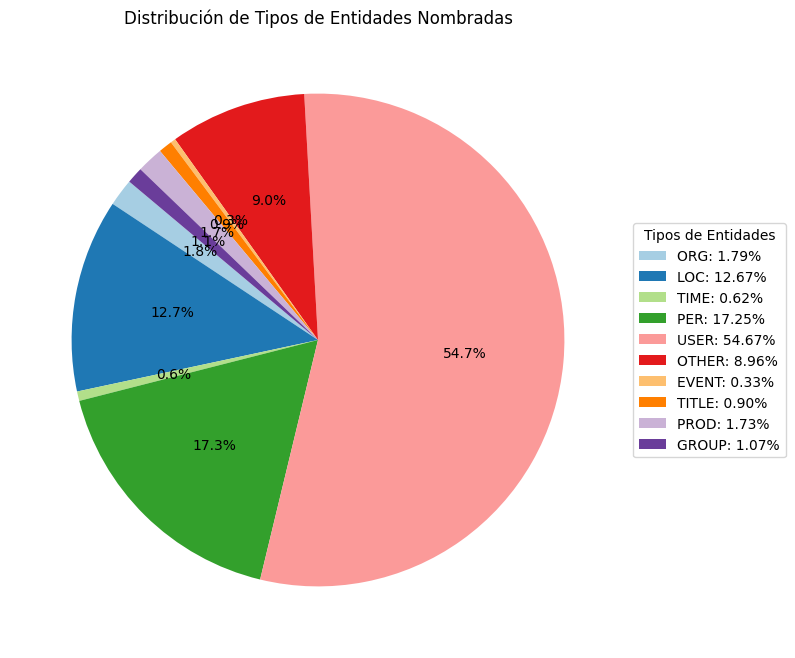

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

--------------------------------------------


-----------------------------------------------

### Tweets de hate_speech

-----------------------------------------------


In [48]:
# NER en tweets hate_speech
text_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 1]["text"].tolist()]
results_ner_hate_speech = [analyze_named_entities(text) for text in tqdm(text_hate_speech)]

  0%|          | 9/1833 [00:00<00:22, 79.38it/s]

Texto analizado: Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Entidades encontradas: [('easyjet', 'ORG')]
Texto analizado: El gobierno debe crear un control estricto de inmigración en las zonas fronterizas con Colombia por q después del 20-8querrán venir en masa
Entidades encontradas: [('colombia', 'LOC'), ('20-8querrán', 'TIME')]
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Entidades encontradas: [('@maiveperez', 'USER')]
Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Entidades encontradas: [('@mspn95', 'USER'), ('@sc_espn', 'USER')]
Texto analizado: @enkarny282 @irenejunquera No tienes ni puta idea.la melodia es mi novia es sevillista...una puta mas.
Entidades encontradas: [('@enkarny282', 'USER'), ('@irenejunquera', 'USER')]
Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Entidades encontradas: [('@elultimopeter', 'USER')]
Texto an

  1%|▏         | 27/1833 [00:00<00:21, 84.12it/s]

Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Entidades encontradas: [('@chechechacon', 'USER'), ('concha', 'PER')]
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Entidades encontradas: []
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Entidades encontradas: [('@agaxiolag', 'USER'), ('exatlonmx', 'TITLE')]
Texto analizado: Calmados no se amontonen!!!pinches nacos frijoleros pikense el culo 🖕🏽😑 https://t.co/tn7lEhUzsE
Entidades encontradas: []
Texto analizado: La moronegrada está hundiendo el país a base d ser cobradores netos d pensiones, teroristas, robar, violar, traficar, petar el sistema penitenciario,educativo,judicial y sanitario...pero lo q importa es 1 negro q dice ser ingeniero  #NosTomanPorImbéciles  https://t.co/2pR0YPtNCA
Entidad

  2%|▏         | 45/1833 [00:00<00:21, 81.80it/s]

Texto analizado: Se lo ha ganado a pulso, y ha sido muy comedido. Ese musulmono o se lo piensa la próxima vez. O le dan otra mayor. https://t.co/1NTIxMR11P
Entidades encontradas: []
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Entidades encontradas: [('@vibrium', 'USER'), ('instagram', 'PROD'), ('twitter', 'PROD'), ('facebook', 'PROD'), ('whatsapp', 'PROD')]
Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Entidades encontradas: [('@20', 'USER')]
Texto analizado: Antonio Adán: Mi novia es sevillista y es una puta mas | Sevilla 3 Real ... https://t.co/Pk1TYziPU8 vía @YouTube
Entidades encontradas: [('antonio adán', 'PER'), ('sevilla', 'GROUP'), ('real', 'GROUP'), ('@youtube', 'USER')]
Texto analizado: @anto07ro Siempre te hago el aguante callate, mña si perra
Entidades encontradas: [('@anto07ro', 'USER')]
Texto analizado: Bu

  3%|▎         | 63/1833 [00:00<00:21, 81.63it/s]

Texto analizado: -¿Aquí es la oficina de atención contra el racismo? -Claro que sí, pásele pinche indio prieto sarrapastrozo ahorita lo atendemos, primero que pase el güero.
Entidades encontradas: [('indio', 'PER')]
Texto analizado: @BoffeGoals CALLATE QUE MAÑANA NOS VEMOS PERRA
Entidades encontradas: [('@boffegoals', 'USER')]
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Entidades encontradas: [('agustina', 'PER')]
Texto analizado: ¿Esto podría explicar el brutismo caribeño y el subsahariano? ¿Habrá correlación?  Extreme heat linked with reduced cognitive performance among young adults in non-air-conditioned buildings: https://t.co/hRcb6n7jHQ
Entidades encontradas: []
Texto analizado: Porque las mujeres ven las peliculas porno enteras? -Porque se creen que al final se van a casar o algo.
Entidades encontradas: []
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas 

  4%|▍         | 81/1833 [00:00<00:20, 83.64it/s]

Texto analizado: No son subsaharianos, son Negros. Que yo sepa, Sudán y Níger están en el Sáhara. #FronterasSeguras
Entidades encontradas: [('subsaharianos', 'OTHER'), ('negros', 'OTHER'), ('sudán', 'LOC'), ('níger', 'LOC'), ('sáhara', 'LOC')]
Texto analizado: @lopezdoriga @dparamooficial Cállate zorra priista
Entidades encontradas: [('@lopezdoriga', 'USER'), ('@dparamooficial', 'USER')]
Texto analizado: Transparencia Venezuela Cuando un indocumentado pasa de reposero y chocador de autobuses del metro a "manejar" la política económica del país que hugo chávez ya había destruido, tenemos el resultado de la Vzla completamente destruida.
Entidades encontradas: [('venezuela', 'LOC'), ('hugo chávez', 'PER')]
Texto analizado: Ultra pendeja este ciudadano común, teatro le bajo pelotudis, esposelo y 6 horas al calabozo..   Vago indocumentado... https://t.co/MhD226N2rT
Entidades encontradas: []
Texto analizado: Reino Unido cero cristianos entre los 1,112 sirios "refugiados" reubicados en esd pa

  5%|▌         | 99/1833 [00:01<00:21, 81.59it/s]

Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Entidades encontradas: [('@maiiiraib', 'USER')]
Texto analizado: Uno de los refugiados del Aquarius: "Me obligaron a violar a menores y animales durante meses" (Al final los más racistas y esclavistas son otros africanos. Por eso hay que solucionar el problema un situ. Si no las mafias ganan)  https://t.co/IQLcfBOY7m vía @elmundoes
Entidades encontradas: [('aquarius', 'LOC'), ('@elmundoes', 'USER')]
Texto analizado: Hay racismo cuando no creen que soy su hermana porque soy güera @unpentagono @medicenlore https://t.co/9iHeSpHOIi
Entidades encontradas: [('@unpentagono', 'USER'), ('@medicenlore', 'USER')]
Texto analizado: Si lo que esta sosa busca es provocar lo consigue. Es muy zorra. https://t.co/OrRBTkNkcb
Entidades encontradas: []
Texto analizado: @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Cállate Perra mal parida de Juan y kim no hables😠😡😡
Entidades encontradas: [('@breendlp',

  6%|▋         | 117/1833 [00:01<00:21, 81.41it/s]

Texto analizado: Todos los pueblos! TODOS!! Tienen Dcho a la LIBREDETERMINACIÓN ! Que a estas alturas, tenga que aguantar a un Chileno indocumentado que,  viniendo de donde viene, pretende negarme mi legítimo Dcho a la LIBREDETERMINACIÓN, es el ACABOSE! El colonialismo de proximidad tb se acaba
Entidades encontradas: []
Texto analizado: @Victor_EstradaG señor presidente me robaron los tapones de mi auto. A las afueras de suburbano de lechería.  Llegué entre 9:30 pm y había combis y el indocumentado de labios prominentes. El cual ya he visto como roba autopartes y las patrullas no hacen nada. Hoy me tocó a mí
Entidades encontradas: [('@victor_estradag', 'USER'), ('suburbano', 'LOC'), ('lechería', 'LOC')]
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun sitio de tu cuerpo se tiene que acumular
Entidades encontradas: []
Texto analizado: #AñoNuevoEnCombate zorra c

  7%|▋         | 135/1833 [00:01<00:20, 83.62it/s]

Texto analizado: l #InformateEnHolaChile LOS RESEPONSABLES DEL INGRESO AL PAIS DE TANTOS INMIGRANTES DEBEN HACERSE CARGO DEL LOS PROBLEMAS DE SALUD DE ELLOS PORQUE ACTUALMENTE HAN VENIDO A AUMENTAR EL GRAVE PROBLEMA DE ATENCION MEDICA DE  CHILENOS ,OCUPANDO LAS POCAS HORAS DE ATENCION Y RECURSOS
Entidades encontradas: []
Texto analizado: Cuantos operarios hacen falta para limpiar una cocina? Ninguno, eso es cosa de mujeres. #CállateYfriega
Entidades encontradas: []
Texto analizado: @CandeCent Ute tranquila mí amiga me oio? Si querés que no te joda la vida te quedas callada perra hijaeputa y pásame el abon candesita! Cuale son tus cosquillas nene
Entidades encontradas: [('@candecent', 'USER')]
Texto analizado: #españaesuna #stopUE #stopLGTB Los inmigrantes en hostales, a pensión completa, y los españoles durmiendo en el coche https://t.co/rMtZA7ods9
Entidades encontradas: []
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Entidades encontradas: [('@diosayt', 'USER')

  8%|▊         | 154/1833 [00:01<00:19, 85.96it/s]

Texto analizado: ¿Sabes lo que va a pasar? Yo lo veo muy claro. Pagaremos el pato los de abajo. Como sardinas de lata en la seguridad social. Las ayudas y becas colapsadas. Los manteros competencia desleal. Ya no tendremos sitio ni para recoger en las basuras.  https://t.co/MhFFHLYOIU
Entidades encontradas: []
Texto analizado: A mí esto de que los ilegales subsaharianos se beban cubatas con mi dinero, no me acaba de convencer
Entidades encontradas: []
Texto analizado: La queja del hombre y de la mujer es universal y del mismo tipo, pero la de la mujer es más notable y se la tilda de puta resentida.
Entidades encontradas: []
Texto analizado: Falta que aparezca puta publicando 'feliz día de Reyes' y suba una foto enseñando el culo.
Entidades encontradas: []
Texto analizado: Por que las mujeres tienen cuatro labios: los dos de arriba para decir tonterias y los dos de abajo, para arreglarlas
Entidades encontradas: []
Texto analizado: @ikigaiguitar CÁLLATE PUTA YA VAS A VENIR POR MI CONOCIM

  9%|▉         | 172/1833 [00:02<00:19, 86.94it/s]

Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Entidades encontradas: []
Texto analizado: En verdad yo no se porque tu eres así... DE UNA PUTA ME ENAMORE
Entidades encontradas: []
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Entidades encontradas: [('@mangelrogel', 'USER')]
Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Entidades encontradas: []
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Entidades encontradas: []
Texto analizado: Un gringo me dijo que le gustaba mi vestido y mi papá me dijo "pinche güero puto" JAJAJAJAJAJJAJAJAA
Entidades encontradas: []
Texto analizado: esque zorra callate y no opines plis
Entidades encontradas: []
Texto analizado: @bevavera @pcbestt Callate puta hdp coño de tu madre maldita enchuf

 10%|█         | 190/1833 [00:02<00:19, 84.20it/s]

Texto analizado: 5 moros comprando reguladores de bombonas de butano, cinta, cuchillo y un hacha y a nadie de la tienda le saltó la alarma? Putos buenismos... #HechosReales
Entidades encontradas: []
Texto analizado: @MaviMartinezok Callate la boca perra desgraciada
Entidades encontradas: [('@mavimartinezok', 'USER')]
Texto analizado: -¿Que le falta a una Mujer para ser perfecta? -todo
Entidades encontradas: []
Texto analizado: “Nos vamos a convertir como Venezuela” decían, ahora hasta en los semáforos se habla chamo...Quiero ver al señor Duque y a los ministerios y cancillería que van hacer con tanto inmigrante chamozolano
Entidades encontradas: [('venezuela', 'LOC'), ('duque', 'PER')]
Texto analizado: me hartan ya las pinches viejas estas que l tiran mierda a Irina la puta madre callate malparida que pierdes tu puto tiempo
Entidades encontradas: [('irina', 'PER')]
Texto analizado: Cuando veais a los pobres muslims, acordaron que ademas de sangraros gracias a las ayudas y subvenciones 

 11%|█▏        | 209/1833 [00:02<00:19, 85.40it/s]

Texto analizado: @NataliPalmier ups cállate maldita perra, manchas mi reputación
Entidades encontradas: [('@natalipalmier', 'USER')]
Texto analizado: @EliBazzini @candelaberango CÁLLATE QUE NO VAS A SER ASÍ LA RE PUTA QUE TE PARIO TAS RE FLACA LOCA QUIERO TU CUERPO
Entidades encontradas: [('@elibazzini', 'USER'), ('@candelaberango', 'USER')]
Texto analizado: Muérete zorra que yo no puedo ver Monstruos S.A. — Cállate gilipollas https://t.co/bZA1mGUble
Entidades encontradas: []
Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Entidades encontradas: [('@santiagopovedam', 'USER')]
Texto analizado: Telediario de las 15 h: - alemanes siembran el pánico en metro de Valencia. - rumanas carteristas en metro de Barcelona. - árabes agreden a turistas en Barcelona. Racismo? NO
Entidades encontradas: [('alemanes', 'OTHER'), ('metro', 'ORG'), ('de', 'LOC'), ('valencia', 'LOC'), ('rumanas', 'OTHER'), ('metro', 'ORG'), ('de', 'LOC'), ('barcelona', 'LOC'), ('árabes', 'OTHER'), ('barcelona', 'LOC')]
T

 12%|█▏        | 227/1833 [00:02<00:18, 87.11it/s]

Texto analizado: Estos son los que nos están invadiendo y nosotros acogiendo como refugiados y regalandoles todos nuestros servicios sociales https://t.co/iRPOROgtwW
Entidades encontradas: []
Texto analizado: Wey, soñé que era güera again. ¡Qué perro asco!
Entidades encontradas: []
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Entidades encontradas: [('@tiafeminazi', 'USER')]
Texto analizado: No se puede jugar con sudacas niño, tienen el wifi enchufado a la bombilla
Entidades encontradas: []
Texto analizado: Me choca el niño güero hippie new age poliamoroso de la academia.
Entidades encontradas: []
Texto analizado: De mis punterías. Tu eres la puta mayor
Entidades encontradas: []
Texto analizado: @Albert_Rivera El gorrilla (aparcachoches) que es de toda la vida los multan y ahora viene un gorrilla subsahariano y no pasa nada
Entidades encontradas: [('@albert_rivera', 'USER')]
Texto analizado: SALES EN FOTO ENSEÑANDO PERO NO ME PASAS NUDE. SO PUT

 13%|█▎        | 245/1833 [00:02<00:18, 87.81it/s]

Texto analizado: @Vadushi @Phantanium_ cállate zorra estupida y no te metas en mis zorreos
Entidades encontradas: [('@vadushi', 'USER'), ('@phantanium', 'USER')]
Texto analizado: A mí querido Ex, ese que me puso el cuerno y embarazó una chola puta:  Felicidades por tu compromiso! Espero seas muy feliz con la prieta "güera" esa. Mis mejores deseos Babe!💜  - Besitos con cariño siempre 💋  #LEL #YouNeverLovedMe
Entidades encontradas: []
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Entidades encontradas: [('@nayra_mex', 'USER'), ('@blacknavi420', 'USER'), ('@escortsnat', 'USER'), ('@nayrazd1', 'USER')]
Texto analizado: #politivida Si no te gusta, puedes cambiarlo. DESTINO SUDACA   https://t.co/2tpPakccSk
Entidades encontradas: []
Texto analizado: @Rockefort100 Hahaha, me das risa. Mejor cállate y no te metas donde no te mencionan, perra llorona.
Entidades encontradas: [('@rockefort100', 'USER')]
Texto analizado: @LuciaAvelino3 pero cállate vos perra (hoy 

 14%|█▍        | 263/1833 [00:03<00:17, 87.79it/s]

Texto analizado: @lovinovak ERES EL AMOR DE MI VIDA TU ERES FOTOGÉNICA SIEMPRE PEAZO PUTA
Entidades encontradas: [('@lovinovak', 'USER')]
Texto analizado: Que Sudaca! Caparrós con lo que dijo de @cuervotinelli por eso este país es Inviable, con éstos pavos, que le  Cuesta contestar con educación? Y lo tratan de "intelectual" siglo xx. Cambalache.....🎶🎵🎼.. #LaCornisa
Entidades encontradas: [('caparrós', 'PER'), ('@cuervotinelli', 'USER')]
Texto analizado: Ojalá vengan más refugiados e inmigrantes subsaharianos, y ya verás como los maricas tienen que quedarse en el armario por mied... — Ahora dilo sin llorar https://t.co/KwI2bfI6nM
Entidades encontradas: []
Texto analizado: @mikaelamattio cállate zorra bien que bailas te al lado de este tincho anoche
Entidades encontradas: [('@mikaelamattio', 'USER')]
Texto analizado: Como siempre las subvenciones serán para inmigrantes. https://t.co/tPPIi60EgN
Entidades encontradas: []
Texto analizado: Mierda para aquellos que saltan la valla de Melilla

 15%|█▌        | 281/1833 [00:03<00:18, 83.70it/s]

Texto analizado: @BamAlondra ya cállate perra loca, no son los nervios. Sólo no se me da ser cursi. #perroanimal
Entidades encontradas: [('@bamalondra', 'USER')]
Texto analizado: los venezolanos llamamos..ladrones a los chinos que comprar bachaqueado o robado..no hacen facturas al cliente para evadir impuestos..igualmente a los arabes explotadores y vagos que no hacen nada..de resto..malagente,feos y vagos podemos ser unos cuantos venezolanos... https://t.co/IFZyJXua2G
Entidades encontradas: []
Texto analizado: Alguien ha calculado cuántos subsaharianos puede absorber el gremio de "gorrillas" y "manteros"?
Entidades encontradas: []
Texto analizado: ¡Eh! ¡Subsaharianos violentos! ¡Hablad de eso! #L6Nfranco
Entidades encontradas: [('subsaharianos', 'OTHER')]
Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Entidades encontradas: [('@flalau', 'USER'), ('@unjosehabla', 'USER')]
Texto analizado: Buah qué guarra eres por llevar escote unga unga qué puta unga unga llegaré a chuparme la pol

 16%|█▋        | 299/1833 [00:03<00:18, 84.57it/s]

Texto analizado: #Pendejos  Don't call me gringo You fuckin beaner Stay on your side Of that goddamn river Don't call me gringo You beaner  No me digas beaner Mr. puñetero Te sacaré un susto Por racista y culero No me llames frijolero Pinche gringo puñetero
Entidades encontradas: []
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Entidades encontradas: [('@gladisdiputada', 'USER'), ('@almagro_oea2015', 'USER'), ('@oea_oficial', 'USER')]
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Entidades encontradas: [('@candeelucero', 'USER'), ('@mlauttaro', 'USER')]
Texto analizado: @yasmicabaleiro Jajajajaja callate zorra vieja jajaja, ya aprobé una, demasiado jajajaja
Entidades encontradas: [('@yasmicabaleiro', 'USER')]
Texto analizado: @BeeluArzola Tu eres la pajera.. perra de mierda k lo unico k saces hacer es abrir tus piernas ..... xk putas las abres si no saves ser madre cojuda.
Entidades encontradas: [('@bee

 17%|█▋        | 308/1833 [00:03<00:19, 80.19it/s]

Texto analizado: Los supermercados de Argentina,son una burla y una afrenta,por mas sudaca,q sea su público,la calidad de los productos,es ofensiva,y los precios de esa basura,es como cachetear a la gente.Entrenamiento para la Venezuela pos Macri?Hablo de los super que en Peronia, consideran top.
Entidades encontradas: [('argentina', 'LOC'), ('venezuela', 'LOC'), ('macri?hablo', 'PER'), ('peronia', 'LOC')]
Texto analizado: @CineJavi Toda la puta vida las tetas fueron y serán tendencia, y si buscan excusa para enseñarlas, mejor, que coño tanta tonteria.
Entidades encontradas: [('@cinejavi', 'USER')]
Texto analizado: @elisacarrio Callate hija de puta gorda falopera
Entidades encontradas: [('@elisacarrio', 'USER')]
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Entidades encontradas: [('@facundov', 'USER'), ('@imsitx', 'USER')]
Texto analizado: @showproblemaC9 YO CREO KE LA MUJER ES UNA ALTA ZORRA....!!!!
Entidades encontradas: [('@showproblemac9', 'USER')]
Texto

 18%|█▊        | 327/1833 [00:03<00:17, 84.45it/s]

Texto analizado: AY YA CÁLLATE HIJA DE TODA TU PUTA MADRE. APARTE DE PUTA, ARGUENDERA
Entidades encontradas: []
Texto analizado: @RosselynGonzal2 Marico eso era lo único que merecía la puta esa, me paso la tesis con 10 webon y me iba a raspar solo que Elio metió la mano por mi (la tesis no estaba mala, solo estaba esperando la tesis para hacerme sufrir todo lo que yo la hice sufrir
Entidades encontradas: [('@rosselyngonzal2', 'USER'), ('elio', 'PER')]
Texto analizado: Mientras los manteros atacan a turistas y hay reyertas en el Raval, Ada Colau ha visitado el pueblo italiano de Riace, repoblado dando casas a inmigrantes y refugiados, un "ejemplo de acogida, integración y lucha contra la xenofobia". Pues que se quede allí. Indefinidamente.
Entidades encontradas: [('raval', 'LOC'), ('ada colau', 'PER'), ('italiano', 'OTHER'), ('riace', 'LOC')]
Texto analizado: Gorda chaconda.. tu eres por mi polla la mujer perfecta.. quiero ver todo el tuyo cuerpo da BBW mueverse sobra de mi.. 😍@SamyBBW


 19%|█▉        | 345/1833 [00:04<00:17, 84.44it/s]

Texto analizado: Con la Sanidad abierta a todo el mundo y cobrando del paro con pocos requisitos, yo si fuera inmigrante me venia de cabeza, menudo chollo.
Entidades encontradas: []
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Entidades encontradas: []
Texto analizado: @ClaudiaRocaL Pero si tú eres la primera en poner peros cuando te digo para salir, PERRA
Entidades encontradas: [('@claudiarocal', 'USER')]
Texto analizado: @McctaraStefy Callate que nos amas perra en celos
Entidades encontradas: [('@mcctarastefy', 'USER')]
Texto analizado: @kiarafloor callate puta de mierda lo dijiste por mi pelotuda olor a culo cara de culo culo en los pies culo con cara concha de culo olor a culo te llama tu mama la culo sabes culo
Entidades encontradas: [('@kiarafloor', 'USER')]
Texto analizado: @EmiiiMorenoo Callate zorra, bueno ahora si me voy a dormir
Entidades encontradas: [('@emiiimorenoo', 'USER'

 20%|█▉        | 363/1833 [00:04<00:17, 82.94it/s]

Texto analizado: @AlanGarciaPeru Los otros se venden. Ja. Tú eres la puta política mayor. Eres la Madame ! Vergüenza ajena das. Pobres tus hijos. Habrán aprendido de tu cinismo?
Entidades encontradas: [('@alangarciaperu', 'USER')]
Texto analizado: @xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 @LizMontoyapan30 @El_SuperRaton @changodepravado Cállate puta!!
Entidades encontradas: [('@xarita327', 'USER'), ('@trikyhumor', 'USER'), ('@yonier2012', 'USER'), ('@casta1326', 'USER'), ('@lizmontoyapan30', 'USER'), ('@el_superraton', 'USER'), ('@changodepravado', 'USER')]
Texto analizado: En que se parece una mujer a un cientifico? En que al cientifico le pasan cosas por la cabeza, y a la mujer le pasan cabezas por la cosa
Entidades encontradas: []
Texto analizado: @CarmeBarcelo @3gerardpique Una polla de 30 cm te hace falta para estar ocupada y no decir tonterias
Entidades encontradas: [('@carmebarcelo', 'USER'), ('@3gerardpique', 'USER')]
Texto analizado: @boshe30 Callate puta cerda xao t odio 

 21%|██        | 381/1833 [00:04<00:17, 84.54it/s]

Texto analizado: @Hdeftz @SPAINonymous @DieAntfood @Lionconk Sería para partirse la polla si ahora yo pongo que todas las mujeres son basura.
Entidades encontradas: [('@hdeftz', 'USER'), ('@spainonymous', 'USER'), ('@dieantfood', 'USER'), ('@lionconk', 'USER')]
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si naciste en la CDMX deseguro
Entidades encontradas: [('@xxxairol', 'USER'), ('@healp', 'USER'), ('@xxxeyeless', 'USER'), ('cdmx', 'LOC')]
Texto analizado: A LOS INMIGRANTES ILEGALES HAY QUE DEPORTARLOS A SU PAIS DE ORIGEN ¡¡YA!! - El Gobierno creará un mando único policial para combatir la inmigración ilegal https://t.co/8drls5owWB vía @Elperiodico
Entidades encontradas: [('@elperiodico', 'USER')]
Texto analizado: Aborto de ardilla — Jaja callate aborto de perra sarnosa https://t.co/tHql0k8kpc
Entidades encontradas: []
Texto analizado: PFFFFFFFT. Ya wish, güera.
Entidades encontradas: []
T

 22%|██▏       | 399/1833 [00:04<00:16, 84.70it/s]

Texto analizado: Alemania. Chulo inmigrante musulmán ya sabe que es el fuerte en un país que ha claudicado. Pronto levantarán a tu madre, a tu abuela, a tu hija del autobús que han pagado. ¿Por qué no tenemos sangre, ya? Despierta, España! Wake up, Europe! #stopislam #stopinvasion #banislam https://t.co/p7jSwuavqi
Entidades encontradas: [('alemania', 'LOC'), ('musulmán', 'OTHER'), ('españa', 'LOC'), ('europe', 'LOC')]
Texto analizado: Así como a muchos les encabrona que les digan negros a mi tambien me encabrona y doble que me digan güera, para mí no es un alago ni mucho menos superioridad
Entidades encontradas: []
Texto analizado: tu vete a la verga, puto sudaca
Entidades encontradas: []
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Entidades encontradas: []
Texto analizado: Si somos sudacas que no se note (?) https://t.co/XD4UoApwoL
Entidades

 23%|██▎       | 417/1833 [00:04<00:16, 84.26it/s]

Texto analizado: Europa ni se ha enterado ni se quiere enterar de la inmigración masiva ni de la colonización musulmana, hasta que sea demasiado tarde... En cuanto a Marruecos un pais chantajista y lo estamos viendo despues de haber violado nuestras fronteras esta horda de subsaharianos...
Entidades encontradas: [('europa', 'LOC'), ('marruecos', 'LOC')]
Texto analizado: @Ghxst_Whisperer @BloodSubaru @xRoseGirl_ {Lilinette es una puta. Pero tú eres un amor <3}
Entidades encontradas: [('@ghxst_whisperer', 'USER'), ('@bloodsubaru', 'USER'), ('@xrosegirl', 'USER'), ('lilinette', 'PER')]
Texto analizado: Ojala recibamos mas inmigrantes como tu y no putos negratas,no soy racista,yo respeto mucho a los latinos — gilipollas https://t.co/6t48llaVXg
Entidades encontradas: []
Texto analizado: @_Sofiasosa_ Callate si ni me mandas zorra
Entidades encontradas: [('@_sofiasosa', 'USER')]
Texto analizado: me follo a los negratas
Entidades encontradas: []
Texto analizado: @_E_Villalva Jajajajajajajajaja

 24%|██▎       | 435/1833 [00:05<00:16, 83.40it/s]

Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Entidades encontradas: [('@lynavallejosfan', 'USER'), ('lyna', 'PER')]
Texto analizado: Que pelotudos son los religiosos. Los árabes pueden ser judíos, cristianos, musulmanes. Lástima que los judíos se creen ‘una raza superior’. https://t.co/VqM8MvLJ5R
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @MohikanoLoco @JustTonight_97 Sé mi putita. Llámame guarra MUERDEME LOS PEZONES ayyyys ve a buscar al niño al cole.
Entidades encontradas: [('@mohikanoloco', 'USER'), ('@justtonight_97', 'USER')]
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Entidades encontradas: []
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Entidades encontradas: [('@la_gr0sera', 'USER')]
Texto analizado: @Hxrry_again CÁLLATE PERRA
Entidades encontradas: [('@hxrry_again', 'USE

 25%|██▍       | 453/1833 [00:05<00:17, 80.87it/s]

Texto analizado: Perro @amarchesin1 ponte a leer sudaca https://t.co/ERwBeNGsdg
Entidades encontradas: [('@amarchesin1', 'USER')]
Texto analizado: Acabas en los calabozos t desahucian d tu casa y si t atreves a protestar, t denuncian por ser una sin papeles y t mandan d vuelta a tu pais de origen por ilegal.Vamos lo mismo que si entras en España ilegalmente. Ahhh no q aquí t dan papeles y una paga. Seran Fachas en España. https://t.co/VsAnkVIKIY
Entidades encontradas: []
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Entidades encontradas: [('@cualquiercositv', 'USER'), ('@elonmusk', 'USER')]
Texto analizado: PA Q TU ME RECLAMAS, HAY MILES DE MUJERES Q DICEN Q ME AMAN PERO TU ERES LA PUTA Q SIEMPRE YO MONTO EN EN LA CAMA
Entidades encontradas: []
Texto analizado: ESAS COSAS Y OTRAS PUEDEN PASAR POR MANTENER A LA INMIGRACION ILEGAL EN ESPAÑA Y NO EXPULSARLOS ¿NO? - La agresión de los manteros a un turista pone a Colau en un aprieto https://t.co/C7mZW

 26%|██▌       | 471/1833 [00:05<00:16, 85.08it/s]

Texto analizado: Todo es ji ji y ja ja con los chistes sobre árabes y bombas hasta que te toca con uno de ellos en un vuelo
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Entidades encontradas: [('@angiedeviluke', 'USER')]
Texto analizado: CÁLLATE PUTA ZORRA BORRACHA DROGADICTA https://t.co/60lgyRsEfk
Entidades encontradas: []
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Entidades encontradas: []
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Entidades encontradas: [('sofi', 'PER')]
Texto analizado: NADA COLAU @AdaColau⁩ la protectora de moromierdas delincuentes y violadores tapa otra reyerta de #Manteros en #Barcelona https://t.co/VUhdoAYmIy  Compartido desde tu tablón de Google
Entidades encontr

 27%|██▋       | 489/1833 [00:05<00:15, 86.50it/s]

Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Entidades encontradas: [('@beleen0', 'USER')]
Texto analizado: Los comunistas, han pasado de disparar a los que huyendo saltaban el muro en Berlín, a si eres subsahariano darte paguita @iunida
Entidades encontradas: [('berlín', 'LOC'), ('subsahariano', 'OTHER'), ('@iunida', 'USER')]
Texto analizado: @TowandaRebels Soy puta y sois las mujeres más repugnantes que espero nunca tirarme a la cara nadie nos obliga y NO ME VIOLAN
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: @YolandaRuizRCN @elespectador Se puede llamar acoso cuando algunas mujeres usan minifaldas, escotes, descaderados, transparencias etc, para provocarnos ?
Entidades encontradas: [('@yolandaruizrcn', 'USER'), ('@elespectador', 'USER')]
Texto analizado: @AixaGimenez18 Callate puta y anda a dormir
Entidades encontradas: [('@aixagimenez18', 'USER')]
Texto analizado: @mj_vasquezv Jajajaja callate zorra
Entidades encontra

 28%|██▊       | 507/1833 [00:06<00:15, 86.51it/s]

Texto analizado: esq una polla, las mujeres son to celosas callaros ya https://t.co/eJHAx4vYC7
Entidades encontradas: []
Texto analizado: Pasan las horas y @ahorapodemos aún no ha convocado ninguna manifa en apoyo a esta menor.   Ninguna femiNAZI se solidariza con ella. Parece que si los violadores son inmigrantes, es menos delito que si lo hace un Español  https://t.co/GTE5kBufJ7
Entidades encontradas: [('@ahorapodemos', 'USER')]
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Entidades encontradas: [('@cergamer', 'USER'), ('@dewcesuhc', 'USER')]
Texto analizado: niña de 25 años de edad, atacada hace días en la estación de Milán, fue rescatada de una violación con spray de pimienta. Arrestaron al violador hoy. P.d. no puedo decirte que es un nigeriano inmigrante, clandestino y con antecedentes criminales, de lo contrario me acusan de. https://t.co/zaDbI9bnfw
Entidades encontradas: [('milán', 'LOC'), ('nigeriano', 'OTHER')]
Texto analizado: Le tuve que enseñar mi 

 29%|██▊       | 525/1833 [00:06<00:15, 85.78it/s]

Texto analizado: sara puta con mi pingo se ahoga — callate deja a mi hija https://t.co/OREF75ZpxZ
Entidades encontradas: [('sara', 'PER')]
Texto analizado: @jcastle1995 mejor cállate perra lmao
Entidades encontradas: [('@jcastle1995', 'USER')]
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Entidades encontradas: [('@ladivinadiva', 'USER')]
Texto analizado: @DeboraGarrido15 Cállate perra del infierno 😭
Entidades encontradas: [('@deboragarrido15', 'USER')]
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty Rails ‘conmigo’ 🤨
Entidades encontradas: [('@alemans', 'USER')]
Texto analizado: ⚫ Aquí @pablocasado_ saludando efusivamente y dando la bienvenida a los invasores que han saltado de manera ilegal y violenta la valla de #Ceuta agrediendo a la Guardia Civil. https://t.co/NbuAnxstvx
Entidades encontradas: [('@pablocasado', 'USER'), ('ceuta', 'LOC')]
Texto an

 30%|██▉       | 543/1833 [00:06<00:15, 83.07it/s]

Texto analizado: Me tiene podrida.. los cuadernos los bolsos los jueces corruptos los K los justificadores seriales de cualquier mala maniobra del gobierno la idiosincrasia sudaca.
Entidades encontradas: []
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Entidades encontradas: [('@claudiabavel', 'USER'), ('@amarnamiller', 'USER')]
Texto analizado: @juantaverash El acoso en la mujer es tan solo cuando el hombre no le gusta, si el hombre le gustara, no fuera acoso!!!
Entidades encontradas: [('@juantaverash', 'USER')]
Texto analizado: @Darkeph Ella es más bonita, tú eres más perra.
Entidades encontradas: [('@darkeph', 'USER')]
Texto analizado: @YVONNEDELATORRE @irenegaro @EPN @t2xmx @lopezdoriga Ya callate puta que no te hartas de escribir estupideces? Prostituta del sistema, viejita de mierda.
Entidades encontradas: [('@yvonnedelatorre', 'USER'), ('@irenegaro', 'USER'), ('@epn', 'USER'), ('@t

 31%|███       | 561/1833 [00:06<00:15, 84.05it/s]

Texto analizado: Gracias a ⁦@AdaColau⁩ nos están, LES ESTÁN más bien poniendo finos en la prensa internacional y en concreto estadounidense. 👉 “Un moromierda ilegal ha tratado de matar un turista americano cortándole la femoral con la hebilla de un cinturón”. OLE!!  https://t.co/jvIP49ce4c
Entidades encontradas: [('moromierda', 'OTHER')]
Texto analizado: perra cállate la boca y continúa tu desafío 😘 https://t.co/jKWSPZvQED
Entidades encontradas: []
Texto analizado: Mi novia sevillista y es una puta más.... tu eres tonto y en tu casa no lo sabes @AntonioAdan13
Entidades encontradas: [('@antonioadan13', 'USER')]
Texto analizado: Enseñan al pueblo Español a amedrentarse frente a un enemigo, yo enseño a mis hijos a saber defenderse, sea mantero, presidente del gobierno o saltador negro de la valla de Melilla!!
Entidades encontradas: [('melilla', 'LOC')]
Texto analizado: Nadie se queja de los inmigrantes currantes, sino de los que vienen a vivir de la sopa boba, y esos, casi todos, llegan s

 32%|███▏      | 579/1833 [00:06<00:14, 86.40it/s]

Texto analizado: @bbongiov Ay pero si sos la mas perra callate
Entidades encontradas: [('@bbongiov', 'USER')]
Texto analizado: @ever_ferreyra Jajajaja callate perra incada
Entidades encontradas: [('@ever_ferreyra', 'USER')]
Texto analizado: @Shrlttw Callate puta sidosa de mierda
Entidades encontradas: [('@shrlttw', 'USER')]
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas que tienes perra rica
Entidades encontradas: [('@mraubreygrey', 'USER'), ('@sweetskipp', 'USER')]
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: @AngieDeviluke Te mereces toda mi verga por puta hermosa y para festejar año nuevo como la zorra come semen que eres hermosa
Entidades encontradas: [('@angiedeviluke', 'USER')]
Texto analizado: Coño, pero son indocumentados. Que esperaban? Que les dieran helado gratis y les tomaran una foto y ya? S

 33%|███▎      | 597/1833 [00:07<00:14, 83.99it/s]

Texto analizado: Supongo que te mereces mi polla, zorra viciosa https://t.co/dVmqxExb5O
Entidades encontradas: []
Texto analizado: @alan15537141 Callate que después me andas abrazando puta loca jajaja
Entidades encontradas: [('@alan15537141', 'USER')]
Texto analizado: Igual me quedo sin trabajo pero la zorra de la encargada se pensaba que me iba a quedar callada y hoy no he aguantado más, caliente hija de puta que he salido llorando y todo del trabajo :___
Entidades encontradas: []
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Entidades encontradas: []
Texto analizado: @SoyPutoImbecil @AngiieNinja HAHAHAHAHAHAHAA, con olerlo se pone to siega la tia sabes, los viernes que me da no son normales la zorra
Entidades encontradas: [('@soyputoimbecil', 'USER'), ('@angiieninja', 'USER')]
Texto analizado: A ver si te enteras @sanchezcastejon que el árabe y la cultura marroquí nos importa más o menos lo mismo que tú, una mierda!.

 33%|███▎      | 606/1833 [00:07<00:14, 82.41it/s]

Texto analizado: Definitivamente tu eres una perra 😍😍😍🔥🔥🔥🔥👑 https://t.co/KKoYbYASQJ
Entidades encontradas: []
Texto analizado: Como que me siguieron un montón de árabes juntos .. me siento invadido jajaja que pasó
Entidades encontradas: []
Texto analizado: A nuestro país llegan ya no solamente los migrantes “tradicionales” desde la fachada noroccidental africana. Ahora proceden de toda África y de Asia. Somos la plataforma europea "ideal" para refugiados e inmigrantes de cualquier parte del mundo. https://t.co/rc0k9POXEJ https://t.co/kxWmzFPXMK
Entidades encontradas: [('áfrica', 'LOC'), ('asia', 'LOC')]
Texto analizado: @Argitxu7 @charimorales68 @antoniabustaso1 Buenos días chicas, feliz semana, a protegerse del calor, de los inmigrantes... porque esto va a peor, hoy he oído por radio que había problemas en los centros de menores de Ceuta, Melilla, Andalucía y Bilbao, esto es inconcebible!!!!
Entidades encontradas: [('@argitxu7', 'USER'), ('@charimorales68', 'USER'), ('@antoniabustaso1

 34%|███▍      | 624/1833 [00:07<00:14, 82.47it/s]

Texto analizado: MALDITOS INMIGRANTES,  SOLO VIENEN A ROBAR, dijo un inmigrante indignado. https://t.co/BLSXAmbZeo
Entidades encontradas: []
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Entidades encontradas: []
Texto analizado: Ojalá haber grabado a todas las señoras que me han mirado mal en el bus y me han hecho pasar momentos incómodos. Sobre todo a esa señora que todo el camino vino diciendo en voz alta: "Las sudacas consiguen lo que quieren en España a cambio de sexo", claramente refiriéndose a mi. https://t.co/dsWOStfuB3
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @Cynntuu @Pipo_gabriela @AlejandroPicart @Antonellapicart Callate que a vos no te llego ni a los talones. Puta
Entidades encontradas: [('@cynntuu', 'USER'), ('@pipo_gabriela', 'USER'), ('@alejandropicart', 'USER'), ('@antonellapicart', 'USER')]
Texto analizado: En las últimas 24h varias peleas callejeras en ceuta por parte de los últimos en saltar violentame

 35%|███▌      | 642/1833 [00:07<00:14, 84.59it/s]

Texto analizado: Cuando había algo escrito en árabe entre los trending topic y pensábamos que nos iba a atacar el ISIS x dios https://t.co/hovaaBwmCk
Entidades encontradas: [('árabe', 'OTHER'), ('isis', 'OTHER')]
Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Entidades encontradas: [('@shachuasg', 'USER'), ('@katyperry', 'USER')]
Texto analizado: Si alguna vez te trate como una princesa perdoname, no te lo merecías sos una puta.
Entidades encontradas: []
Texto analizado: Suriel hace años en Venezuela vivimos eso mismo, la entrada incontrolable de indocumentados de los paises vecinos llevo todo tipo de personas al país. Que los metan presos o que los deporten. Y extremar medidas para que no entre este tipo de gente @suriel https://t.co/vaSL1LRd0Y
Entidades encontradas: [('suriel', 'PER'), ('venezuela', 'LOC'), ('@suriel', 'USER')]
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías es

 36%|███▌      | 659/1833 [00:07<00:17, 68.45it/s]

Texto analizado: Segui comiendo chipa y revocando paredes, negro indocumentado, ojala te rompas todos los cruzados https://t.co/oUlBNcKVs8
Entidades encontradas: []
Texto analizado: Felices 15 a la mas puta💗 espero que la estes pasando re lindo porque te lo re mereces, te amo un monnnnton !!! @XimeGatter https://t.co/onlbzJO13K
Entidades encontradas: [('@ximegatter', 'USER')]
Texto analizado: La chica de diamons me dice 'ay si tenes una cintura re chiquita' hija de puta no ves que estoy gorda, t voy a comprar igual pero cállate
Entidades encontradas: [('diamons', 'LOC')]
Texto analizado: @gaticolonx CALLATE PUTA
Entidades encontradas: [('@gaticolonx', 'USER')]
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Entidades encontradas: [('@salvameoficial', 'USER')]
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Entidades encon

 36%|███▋      | 667/1833 [00:08<00:17, 66.04it/s]

Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Entidades encontradas: [('@pacodelmazo', 'USER')]
Texto analizado: Cuando en un país la población autóctona no tiene derechos y si los tienen los inmigrantes indocumentados y muchos de ellos violentos...malo, vamos a acabar mal https://t.co/J17npSwDZ2
Entidades encontradas: []
Texto analizado: @montcavazos tu eres mi hermana perra
Entidades encontradas: [('@montcavazos', 'USER')]
Texto analizado: @Nazaariverplate me va a durar todo lo que yo quiera, callate zorra
Entidades encontradas: [('@nazaariverplate', 'USER')]
Texto analizado: La culpa de la INVASIÖN de NEGRATAS es como ha dicho Marlasca de @marianorajoy  !!! … lo de "son los más valientes", lo de "papeles para todos", lo de "bienvenidos refugiados" etc etc es culpa de @marianorajoy !!! TODO es culpa de @marianorajoy !!!
Entidades encontradas: [('negratas', 'OTHER'), ('marlasca', '

 37%|███▋      | 681/1833 [00:08<00:17, 64.64it/s]

Texto analizado: #ElCascabel01A Se que voy tarde pero dedicado a la idiota rubia que está en la tertulia  Estoy fuera de España, en una ciudad del sur, esto está lleno de subsaharianos y no digo nada de lo que parece..... A los 4k de inmigrantes lo llevaba a su barrio y después hablamos
Entidades encontradas: [('elcascabel01a', 'TITLE'), ('españa', 'LOC'), ('subsaharianos', 'OTHER')]
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Entidades encontradas: [('@madeleine_ng14', 'USER'), ('@dagmarrmuniz', 'USER')]
Texto analizado: Atendían terroristas con todo. Al tiempo asesinaban niños palestinos menores d 15 años por docenas, a cientos d metros, con francotiradores, sobre seguro. ESE ES EL HUMANISMO DEL SIONISMO. Ahora quitan ciudadanía israelí a quien no sea Judio; Drusos-Árabes-palestinos - su idioma. https://t.co/6IEbmJjV6E
Entidades encontradas: [('israelí', 'OTHER')]
Texto analizado: Créeme, yo estudio Veterinaria y tu eres una perra.
Entidades encontradas: []


 38%|███▊      | 695/1833 [00:08<00:18, 62.48it/s]

Texto analizado: Los "socialistas" de mi familia: "putos moros"
Entidades encontradas: []
Texto analizado: ULTIMA HORA ., el ministro del interior Grande Marlaska ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro de wuassap, que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid
Entidades encontradas: [('grande marlaska', 'PER'), ('ceuta', 'LOC'), ('wuassap', 'PROD'), ('madrid', 'LOC')]
Texto analizado: Estos putos negratas noos van a robar toda la pasta Iñaqui, menos mal que yo la tengo en Panamá. https://t.co/I3qGJse5HH
Entidades encontradas: [('iñaqui', 'PER'), ('panamá', 'LOC')]
Texto analizado: Con un paro estructural de 15% no hay trabajo para NINGÚN inmigrante más y sobran muchos de los presentes. Los africanos que traen en patera o trabajan ilegalmente o hunden los salarios o viven de nuestros impuestos. Son un lastre. https://t.co/4wOXmZud9T
Entidades encontradas: []
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Enti

 39%|███▊      | 709/1833 [00:08<00:17, 64.57it/s]

Texto analizado: @lamambanegra17 @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Pinche estupida,pendeja y tu eres buena para ser puta😂😡
Entidades encontradas: [('@lamambanegra17', 'USER'), ('@breendlp', 'USER'), ('@chumeltorres', 'USER'), ('@juandedios_p', 'USER'), ('@kimberlyloaiza', 'USER')]
Texto analizado: Un tio de 26 años de Camerún (pais en guerra, espero que note la ironia). Con dos hijos que no puede mantener (como la mitad de los africanos). Que dice que se ha dedicado a violar menores y animales desde que salió de Camerún... inmigrante económico como él dice....
Entidades encontradas: [('camerún', 'LOC'), ('camerún', 'LOC')]
Texto analizado: Los árabes me dan asco
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: A este paso,  con Sánchez,  hasta la ablación a las hijas adolescentes de los inmigrantes subsaharianos será cubierta por la Seguridad Social
Entidades encontradas: [('sánchez', 'PER'), ('subsaharianos', 'OTHER')]
Texto analizado: A la señora que

 39%|███▉      | 723/1833 [00:08<00:17, 64.34it/s]

Texto analizado: no me importa, cállate zorra quita novias
Entidades encontradas: []
Texto analizado: @aguandradaa callate una vez q toy feliz lo quiero compartir china puta
Entidades encontradas: [('@aguandradaa', 'USER')]
Texto analizado: Cada quién se ofende de lo que quiere y por eso es absurdo sancionar el lenguaje ofensivo. A mí la neta me viene valiendo dos héctareas de...si me dicen “pinche güerito” pero que justifiquen que eso está bien porque otros güeros en otra época y lugar fueron unos OGTs pffffft! https://t.co/ab1W0rV8Uz
Entidades encontradas: []
Texto analizado: Lo bueno es que me dijo gracias y no callate puta como siempre 😰
Entidades encontradas: []
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Entidades encontradas: [('@error14501', 'USER'), ('@bizarroman09', 'USER')]
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Entidades encontradas: [('@rsaladb94', 'USER'), ('castill

 40%|███▉      | 730/1833 [00:09<00:18, 60.58it/s]

Texto analizado: el indocumentado marica donde está? https://t.co/2lvCsBucAw
Entidades encontradas: []
Texto analizado: Permuto 256 millones de dolares por 21.000 bolivianos indocumentados que pululan por las calles argentinas, haciendo piquetes, manteros, narcos y planeros. https://t.co/wSxqdNNNgf
Entidades encontradas: []
Texto analizado: @AyleenDuarte Callate vos que me mandaste al frente zorra jajajajajajajja
Entidades encontradas: [('@ayleenduarte', 'USER')]
Texto analizado: Es acojonante ver en la tele y en la prensa al supuesto representante del "Sindicato de manteros". O sea, unos indocumentados ilegales, con su orden de expulsión y tal... que no pagan impuestos, que joder a los comerciantes legales... Y tienen hasta un sindicato? #FelizLunes
Entidades encontradas: []
Texto analizado: No estas mal solo por mi, otras cosas también te tienen mal' 'viste, te digo que te calles y seguis' 'gran puta, estas loca vos' jajajajajaja basta https://t.co/Bft6X7ZQpe
Entidades encontradas: [

 41%|████      | 744/1833 [00:09<00:19, 54.95it/s]

Texto analizado: Nas ganas de andar en modo arabé para hacerlos volar a todos
Entidades encontradas: []
Texto analizado: Crece a 1.402 la entrada de inmigrantes a Ceuta, la mitad de ellos al asalto, en lo que va de 2018 https://t.co/BmesKkIS6b
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Entidades encontradas: [('@mausagus', 'USER')]
Texto analizado: Putos moros y negros que vienen a invadir España!!! https://t.co/01Ol8Te5cK
Entidades encontradas: []
Texto analizado: Hay q luchar contra la inmigración ilegal y enseñar los dientes a este gobierno q nos quiere urdir en la miseria , como siempre . Soy sonifobo , pues no ! Pero empiezo a pensar en ello .
Entidades encontradas: []
Texto analizado: @mignonescabio zorra hija de puta no mereces bibir!
Entidades encontradas: [('@mignonescabio', 'USER')]
Texto analizado: @Coni_Donnetta Callate pedazo de puta yo se que me extrañas, no te hagas la dura
Entidades encontradas: [('@coni_donnetta', 'USE

 41%|████      | 756/1833 [00:09<00:19, 54.04it/s]

Texto analizado: @sexbrake Eso no vale, dice una virgen y tu eres una puta barata que lo se yo eh, no me engañes. Si eso pilla a Pablo que además te agredecerá el sacrificio (?)
Entidades encontradas: [('@sexbrake', 'USER'), ('pablo', 'PER')]
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Entidades encontradas: []
Texto analizado: Si mi abuelo aún siguiera vivo, su mejor comentario para mí sería "Pinche Güera"
Entidades encontradas: []
Texto analizado: @VPaolacci Jajaj cállate puta anda a depilarte
Entidades encontradas: [('@vpaolacci', 'USER')]
Texto analizado: Dice mi mejor amiga que te calles puta
Entidades encontradas: []
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Entidades encontradas: [('@tnfamosos', 'USER'), ('maju', 'PER')]
Texto analizado: @pnique Inmigrante motorizado,eres una rata de cloaca.
Entidades encontradas: [('@pnique', 'USER')]


 42%|████▏     | 771/1833 [00:09<00:16, 63.29it/s]

Texto analizado: Por eso todos nos odian. Nos vamos a ganar una fama de choros así como los árabes de terroristas jhajasja t.t
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @sadnesscox Cállate un rato zorra quema
Entidades encontradas: [('@sadnesscox', 'USER')]
Texto analizado: El mensaje de Carmena q animaba a asaltar la valla de Melilla como fuera  Los Cuerpos de Seguridad están desbordados. Y la asistencia colapsada. Los asaltos violentos a la valla de Ceuta y Melilla son un gran problema,pero hay políticos q animan a hacerlos https://t.co/dhGckkkdiO
Entidades encontradas: [('carmena', 'PER'), ('melilla', 'LOC'), ('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Entidades encontradas: []
Texto analizado: Son "cacahuates" dichos sobre inmigrantes: @realDonaldTrump dijo que sus comentarios en campaña son nada comparados con la realidad https://t.co/MdYZLsX3SY
Entidades encontradas: [('@realdonaldtrump', 'USER'

 43%|████▎     | 789/1833 [00:10<00:13, 74.71it/s]

Texto analizado: Que sabrán esos Yankis....si #GrandeMarlaska dice que no haay colapso en los centros de acogida de inmigrantes, adelante con ellos.  La inteligencia norteamericana advierte de una invasión inminente de 100.000 subsaharianos - Rambla Libre https://t.co/Gfmjnhr7MY
Entidades encontradas: [('yankis', 'OTHER'), ('grandemarlaska', 'PER'), ('subsaharianos', 'OTHER')]
Texto analizado: @electindiana320 Es mierda licuada de perro, por que tu eres una perra no puede ser tuya. Si waaaa?
Entidades encontradas: [('@electindiana320', 'USER')]
Texto analizado: Atención por que ⁦@sanchezcastejon⁩ no solo quiere acoger a los moromierdas que entran ilegalmente, ahora se quiere traer a toda la familia. La casita, paguita, sanidad, etc, lo vamos a pagar Vd, yo, todos los que lean esto y los que no. #ASCO  https://t.co/7x6TTQq0M8
Entidades encontradas: []
Texto analizado: @pepecardozo249 no te deseaba ningún mal pero necio con los pendejos de @AZaldivar_  @eduardochof19. Entonces que te cor

 44%|████▍     | 807/1833 [00:10<00:12, 80.10it/s]

Texto analizado: Lo peor que puede hacer un país es darle carta abierta a los inmigrantes. Perú se la puso fácil a muchos delincuentes, sin tanto trámite, visas para todos. Más control, más respeto y aceptación para todos.
Entidades encontradas: [('perú', 'LOC')]
Texto analizado: Aquí podemos ver a un subsahariano (negro) azotando a un turista con la hebilla del cinturón. ¿Que dirían los medios de comunicación si hubiera sido al revés.  https://t.co/hWbdXKgrHn
Entidades encontradas: []
Texto analizado: Esta chica es más puta' mi mama 😂😂😂
Entidades encontradas: []
Texto analizado: JAJAJAJA te lo mereces, perra https://t.co/c8Eo4ctpWw
Entidades encontradas: []
Texto analizado: A esta guarra le gusta enseñar el coño: #morenas #porn #sexooral https://t.co/3hZlUMKkcv
Entidades encontradas: []
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Entidades encontradas: [('@victtoriabianca', 'USER')]
Texto analizado: Menudo ostión que se lleva el moromierda. 😂😂 h

 45%|████▌     | 825/1833 [00:10<00:12, 79.37it/s]

Texto analizado: Y mientras a los que somos españoles trabajamos y cotizamos nos eternizamos esperando k nos operen y nos kitan medicinas ¡manda cojones! Sánchez da Sanidad gratis a los sin papeles... pero no a los inmigrantes legales  https://t.co/uxwwOPwc50  Enviado desde @updayESP
Entidades encontradas: [('sánchez', 'PER'), ('@updayesp', 'USER')]
Texto analizado: @PilarBenitoG Cállate perra tú no estuviste ahí
Entidades encontradas: [('@pilarbenitog', 'USER')]
Texto analizado: @maitezamora4 Callate zorra si a vos te gusta estar con todos
Entidades encontradas: [('@maitezamora4', 'USER')]
Texto analizado: Estos son los niveles de maldad de un malandro venezolano. Por esa razón apoyo las protestas en contra de la inmigración masiva de venezolanos. Se requiere un control. https://t.co/8X4M7o7y65
Entidades encontradas: []
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas

 46%|████▌     | 843/1833 [00:10<00:11, 82.65it/s]

Texto analizado: @pimpiruleta cállate, puta herniosa que estás chocheando ya con la ciática jajjaa te jode? ME ALEGRO jajaj jódete jajajajaja JÓDETE me oyes? JÓDETE JAJAJAJAJAJAJAJA este es mi regalo de Santa jajajajaj jódete jajajajaj te duele? malegro, debería dolerte m
Entidades encontradas: [('@pimpiruleta', 'USER'), ('santa', 'TIME')]
Texto analizado: Con todo lo que esta entrando por la valla de Ceuta y Melilla, le recuerdo NO llaman a la puerta ni piden por favor entrar. Vienen a invadir e intentar destruirnos y aniquilar nuestra sociedad ayudado por los pijos progres #DimisionInutilMarlaska https://t.co/ywwaPoZ2pw
Entidades encontradas: [('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: Lo primero que tendría que hacer Pdr Snchz cuando vuelva de vacaciones  es una sesión de fotos practicando footing en la Moncloa rodeado de  negros. Perdón, subsaharianos. Con eso lo arreglábamos todo. Hasta podríamos usar a Obama de extra
Entidades encontradas: [('pdr snchz', 'PER'), ('sub

 47%|████▋     | 861/1833 [00:10<00:11, 85.71it/s]

Texto analizado: Hay una gran cantidad que no  son refugiados los cuales entran con otros intereses. https://t.co/zYNIUJGOZy
Entidades encontradas: []
Texto analizado: Tu peloteo es ridiculo, para ti un latinoamericano siempre será un sudaca o panchito, nunca lo trataras h consideraras de tu nivel https://t.co/fw3JVB9Do1
Entidades encontradas: []
Texto analizado: @booty_celli zorra CALLATE te mato
Entidades encontradas: [('@booty_celli', 'USER')]
Texto analizado: Ya pinché puta cállate!
Entidades encontradas: []
Texto analizado: Muy brava,te rompen tu madre y te escondes en la falda de tu madre, pero para andar de zorra si muy grandecita ¿no? Pobre chiquilla pendeja !
Entidades encontradas: []
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Entidades encontradas: [('@natjiusshka', 'USER'), ('@vacomotrompada', 'USER'), ('@centrojas', 'USER')]
Texto analizado: ES AGUACATE MALDITOS SUDACAS
Entidades encontradas: []
Texto analizado: Lo más que me gu

 48%|████▊     | 879/1833 [00:11<00:11, 86.31it/s]

Texto analizado: Alqatie significa "la manada" en árabe. Es lo que en La Tribuna de Cartagena hemos denominado como "La manada de Alá". Y es que en España, que repetimos es refugio de mucha escoria dada la justicia tan patética que tenemos, hay manadas árabes. A continuación se las detallamos:
Entidades encontradas: [('alqatie', 'OTHER'), ('la manada', 'GROUP'), ('árabe', 'OTHER'), ('tribuna de', 'LOC'), ('cartagena', 'LOC'), ('manada', 'GROUP'), ('de', 'TITLE'), ('alá', 'OTHER'), ('españa', 'LOC'), ('árabes', 'OTHER')]
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Entidades encontradas: [('@robertfelixrodz', 'USER'), ('@agria', 'USER'), ('@mellowshyt', 'USER')]
Texto analizado: @Maayymartinez vos sos la zorra callate mayra n te banco
Entidades encontradas: [('@maayymartinez', 'USER'), ('mayra', 'PER')]
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Entidades encontradas: [('@danibalmac

 49%|████▉     | 897/1833 [00:11<00:10, 86.31it/s]

Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Entidades encontradas: [('@ppatriciamh', 'USER'), ('@sukoicriollo', 'USER')]
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzádoos caca y haciendo pis en vuestra cara y me río mucho.
Entidades encontradas: []
Texto analizado: Las migraciones no deben coordinarse, deben RECHAZARSE. Europa no necesita inmigración, necesita que todos los inmigrantes, sus hijos y nietos nacidos aquí, se LARGUEN. No son bienvenidos.
Entidades encontradas: [('europa', 'LOC')]
Texto analizado: Me quieren seguir en ig un montón de árabes/turcos/israelíes,creo que tengo cara de terrorista y no me di cuenta
Entidades encontradas: [('árabes', 'OTHER'), ('turcos', 'OTHER'), ('israelíes', 'OTHER')]
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/OCAXJm4UH2
Entidades encontradas: []
Texto analizado: @An

 49%|████▉     | 906/1833 [00:11<00:11, 80.82it/s]

Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y secuentros?? jajajaja lo mismo que 
Entidades encontradas: [('@marisaglave', 'USER'), ('villaran', 'PER'), ('heredia', 'PER'), ('veronika mendoza', 'PER')]
Texto analizado: Me caga la pinche gente que por ser güeros, se creen un chingo ¿O ustedes que opinan, ponches prietos?
Entidades encontradas: []
Texto analizado: @xiuvoice CÁLLATE ZORRA
Entidades encontradas: [('@xiuvoice', 'USER')]
Texto analizado: Menudo chiste. Sin papeles, sin dirección conocida... Puede estar en cualquier parte ya. Y aunque lo pillen dará igual, lo defenderá open arms y todas las instituciones https://t.co/kKgIAY6sBK
Entidades encontradas: [('open arms', 'ORG')]
Texto analizado: Negros y árabes aquí en UK, son una desgracia https://t.co/xM35d5JDxp
Entidades encontradas: [('árab

 50%|█████     | 924/1833 [00:11<00:10, 84.93it/s]

Texto analizado: Indocumentados sin salarios sin horarios vuelven los chicos del barrio
Entidades encontradas: []
Texto analizado: @manuel70m @elhijod50580766 Qué pasó Manolo! Ya Dile al sudaca ese que mande unos kilos
Entidades encontradas: [('@manuel70', 'USER'), ('@elhijod50580766', 'USER'), ('manolo', 'PER'), ('sudaca', 'OTHER')]
Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybug
Entidades encontradas: []
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Entidades encontradas: [('@brotherdroiid', 'USER'), ('@snowknight9', 'USER')]
Texto analizado: Le Pen pide a España que expulse a todos los inmigrantes ilegales: Debe actuar como Italia o Australia"" https://t.co/1H68z6mPVJ"
Entidades encontradas: [('le pen', 'PER'), ('españa', 'LOC'), ('italia', 'LOC'), ('australia', 'LOC')]
Texto analizado: #YuriIsOverPar

 51%|█████▏    | 942/1833 [00:11<00:10, 85.21it/s]

Texto analizado: @LaMananaTVE ¡Se quejan de los manteros, ¿Como se va a solucionar? :los autónomos asfixiados, los vecinos en plan de guerra, suciedad, mala imagen y esto no es de ahora, mucho bla, bla bla, pero sin soluciones¿Los refugiados los sueltan despues de X días? Para seguir aumentado
Entidades encontradas: [('@lamananatve', 'USER')]
Texto analizado: -En que se parece una mujer a una foca ? -En que una es gorda, tiene bigote y huele a pescado y la otra vive en el mar
Entidades encontradas: []
Texto analizado: @AdvyStyles Callate maldita zorra descerebrada puta come pollas chupa pollas insecto mierdata regenerada maldita hija de mil putas mierdas gay infierno caca espantoso cara podrida cabello de mierda maricona de mierda pedaso de puta estupido carajo mierda 
Entidades encontradas: [('@advystyles', 'USER')]
Texto analizado: Hoy me encontré a una persona que es de origen mexicano que no habla español (hasta aquí todo bien) pero ¿QUE NO HAYA NACIDO AQUÍ? ¿QUE SE HAYA VENIDO DE 

 52%|█████▏    | 960/1833 [00:12<00:10, 85.90it/s]

Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Entidades encontradas: [('@laufer4', 'USER'), ('mica', 'PER')]
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Entidades encontradas: [('@oficialyuri', 'USER')]
Texto analizado: Un sirio-libanés narco-terrorista y un cretino colombiano indocumentado títere de Cuba... Este par de malditas piltrafas gobiernan en Venezuela... https://t.co/KMU1rscH5C
Entidades encontradas: [('sirio-libanés', 'OTHER'), ('colombiano', 'OTHER'), ('cuba', 'LOC'), ('venezuela', 'LOC')]
Texto analizado: @yaniimansilla14 No seas puta y deja de enseñarle eso a la chica 😂😂
Entidades encontradas: [('@yaniimansilla14', 'USER')]
Texto analizado: ¡Ay esos inmigrantes vienen aquí a vivir de lo público, cobrando y robando, además con títulos universitarios falsos!
Entidades encontradas: []
Text

 53%|█████▎    | 978/1833 [00:12<00:10, 79.77it/s]

Texto analizado: Ya te dije que te calles puta prra sucia de panocha apestosa.
Entidades encontradas: []
Texto analizado: mi novia es una puta merienda😍🤯😛💦
Entidades encontradas: []
Texto analizado: @EvelynAlcaldesa Alcaldesa los extranjeros que estan vendiendo en las calles los fiscalizan si estan legal en el País por que no los deportan si estan indocumentados muy bien su trabajo las calles de Providencia parecian interminables ferias
Entidades encontradas: [('@evelynalcaldesa', 'USER'), ('providencia', 'LOC')]
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue intentándolo https://t.co/A8pnVpXQhT
Entidades encontradas: []
Texto analizado: Acá me ven y ya me hablan español, más sudaca no conseguís.
Entidades encontradas: []
Texto analizado: @AlexaCamejo Cállate puta, si te encanta verme
Entidades encontradas: [('@alexacamejo', 'USER')]
Texto analizado: Negratas con 6 

 54%|█████▍    | 995/1833 [00:12<00:10, 78.96it/s]

Texto analizado: Qué asco y repulsa me levantan los jefes árabes, sus pajas mentales y su machismo rancio..  Arabia Saudita condena a una mujer a dos años de cárcel por abrazar a un cantante https://t.co/FMRBEiajJz
Entidades encontradas: [('árabes', 'OTHER'), ('arabia', 'LOC'), ('saudita', 'GROUP')]
Texto analizado: Tipico : si una chica no le cae otra chica es por que para la otra es una PUTA 😂 pero solo por que no le cae bien
Entidades encontradas: []
Texto analizado: @Sketchshanice Que te calles puta sadboy de los cojones
Entidades encontradas: [('@sketchshanice', 'USER')]
Texto analizado: Sos una malparida no mereces ser feliz puta puta puta
Entidades encontradas: []
Texto analizado: @AgosBlanco13 Te cabe, no te lo mereces por zorra
Entidades encontradas: [('@agosblanco13', 'USER')]
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porque te encanta l

 55%|█████▌    | 1013/1833 [00:12<00:09, 83.34it/s]

Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Entidades encontradas: []
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Entidades encontradas: [('@skeletomh', 'USER')]
Texto analizado: Mis tios diciendo que ines arrimadas es una zorra, a ver callate la boca
Entidades encontradas: [('ines arrimadas', 'PER')]
Texto analizado: @Maritza05484697 TÚ eres la super RE QUE IDIOTA ¡¡DIOS TE MALDIGA Y TE DESTRUYA ERES GRAN MIERDA PENDEJA PUTA JODIDA DEL RE PUTO MIERDA GOBIERNO, DIOS MALDIGA Y MANDE AL INFIERNO A TODOS LOS QUE FIRMARON ESA PUTA LEY, DIOS TE LLENE EL CULO DE CÁNCER RE MI
Entidades encontradas: [('@maritza05484697', 'USER')]
Texto analizado: @zhorro4 tu no eres artista, tu eres una puta buscando e

 56%|█████▌    | 1031/1833 [00:12<00:09, 83.64it/s]

Texto analizado: Si un español agrede a un GC, echándole cal viva, excrementos, etc,le caen 5 años de cárcel, si lo hace un subsahariano e inmigrante, le damos cobijo,comida,etc algunos partidos políticos lo aplauden,si piensas como yo,algunos gilipollas te llaman,racista,franquista y fascista.
Entidades encontradas: []
Texto analizado: Les destrozas la vida a siete menores y te premian con solo 7 meses de cárcel. ¿ ¿Cuál es el secreto de tanta magnanimidad con un violador compulsivo? No hay secreto, es un 'pobrecito inmigrante'. Angela Merkel, se puede decir que es una cooperadora necesaria en esas violaciones. https://t.co/VFB5aD82ww
Entidades encontradas: [('angela merkel', 'PER')]
Texto analizado: @lopezdoriga Cállate puta! https://t.co/RO41NM4OQm
Entidades encontradas: [('@lopezdoriga', 'USER')]
Texto analizado: Retratao el roomba sudaca. https://t.co/4KA6aCyNDb
Entidades encontradas: []
Texto analizado: Aquí podemos ver un grupo de simpáticos moromierdas, basura de la que a @sanc

 57%|█████▋    | 1049/1833 [00:13<00:09, 84.78it/s]

Texto analizado: @CeleRoldan11 @LucasSpadafora CALLATE YO ME LO DESCARGE YEGUA HIJA DE PUTA EN EL GRUPO HACES LO MISMO y de paso te dejo a moria https://t.co/jDGsabrHfW
Entidades encontradas: [('@celeroldan11', 'USER'), ('@lucasspadafora', 'USER'), ('moria', 'PER')]
Texto analizado: @eugenidors  Huyen de una guerra... de dónde sacas tu eso? Por eso Suiza y Bélgica han retirado la condición de refugiados a más de 400 personas que volvían de vacaciones de sus países, en los que los perseguían?. Es todo un cuento y un negocio de las ONGs. Sino, por qué van a ..
Entidades encontradas: [('@eugenidors', 'USER'), ('suiza', 'LOC'), ('bélgica', 'LOC')]
Texto analizado: Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Entidades encontradas: []
Texto analizado: Tráiganme al puto árabe 🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la 

 58%|█████▊    | 1067/1833 [00:13<00:09, 81.97it/s]

Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Entidades encontradas: []
Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Entidades encontradas: [('@buflot', 'USER')]
Texto analizado: Métete en tu vida negro indocumentado JAJAJAJAJJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJJAJAJAJAJAAJAJAJAJAJAJAJAJAJAJAJAJJA 😂😂😂👋
Entidades encontradas: []
Texto analizado: Más de 700 moromierdas han asaltado la valla de Ceuta, han echado cal viva y ácido sobre la guardia civil, 22 agentes con quemaduras y abrasiones. Que el imbecil y mentiroso compulsivo @sanchezcastejon no os engañe, NO ES UNA CRISIS HUMANITARIA, ES UNA INVASION!!
Entidades encontradas: [('ceuta', 'LOC'), ('@sanchezcastejon', 'USER')]
Texto analizado: Baby, por qué eres así? Tú eres puta
Entidades encontradas: []
Texto analizado: La chica es una zorra y una cabrona y el chico un gilipollas que se aclaren los dos porque el uno que se revela y la otra le toca los güebos #Pap399
Entidades 

 59%|█████▉    | 1085/1833 [00:13<00:09, 81.99it/s]

Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “puta” o “trola”🤷🏼‍♀️🤦🏻‍♀️
Entidades encontradas: []
Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Entidades encontradas: [('@emjuarez7', 'USER')]
Texto analizado: Marico soy tan celoso que entro en el Facebook para felicitar a mi bae y hay un maldito cabrón que le puso "Feliz aniversario amor" y le puso un gif de un corazón diciendo "te quiero mi amor", y luego entro a su perfil y es un maldito arabe que había traducido todo en español.
Entidades encontradas: [('facebook', 'PROD')]
Texto analizado: Esto empieza a irse de madre... o se ponen medidas serías, o sufriremos más ataques de subsaharianos que esperan en un monte próximo en Marruecos. Ahora más agresivos y violentos. #MedidasYa https://t.co/5a8Bphh612
Entidades encontradas: [('subsaharianos', 'OTHER'), ('marruecos', 'LOC')]
Texto analizado: ESTA MUJER ES UNA ZORRA 💖💖💖💖🔝
Entidades encontradas: []
Texto analizado: @rioroma16 @magoskyper Tu ca

 60%|██████    | 1103/1833 [00:13<00:08, 84.97it/s]

Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Entidades encontradas: [('@casftsamu', 'USER')]
Texto analizado: Vía TuAutoCorrector: RT DeboRecordarQue: Mi novia es una perra (Pluto)
Entidades encontradas: []
Texto analizado: Lo que más me sorprende cuando se matan unos weyes por culpa de una mujer es que existan pendejos que se quieran matar por una puta.
Entidades encontradas: []
Texto analizado: si te llamo puta es porque tu eres mi puta pero habrá problemas si alguien más te llama puta
Entidades encontradas: []
Texto analizado: Los polideportivos que financiamos todos los andaluces para que puedan hacer deporte nuestros jóvenes, están siendo inutilizados e invadidos por subsaharianos y musulmanes
Entidades encontradas: []
Texto analizado: INMIGRACION ILEGAL DEPORTACION ¡YAA! Y ENTRE OTRAS COSAS MENOS RIESGO DE TERRORISTAS INFILTRADOS ¿NO? - Un mando único policial para combatir inmigración ilegal https://t.co/UxYyEMH8T3. vía @EPExtremadura
Entidades encontradas: [('@epextremadura'

 61%|██████    | 1121/1833 [00:13<00:08, 85.44it/s]

Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Entidades encontradas: [('@andreeaa_05', 'USER')]
Texto analizado: #estefinde  costo DNI Y PASAPORTE, q sorete me importa cuanto cuesta en otros paises sudacas. Lobo das VERGUENZA CN LAS COMPARACIONES. ASCO
Entidades encontradas: [('lobo', 'PER')]
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Entidades encontradas: [('@cafetalero1705', 'USER'), ('@criptografo', 'USER')]
Texto analizado: Pues la India de Gandhi Ese país tan espiritual... Son razas dominadas..como los árabes, dominados por un libro...Tendencia a retroceder ante lo nuevo,desprecio por la mujer, por lo inferior según el criterio de estas simple minds; los animales,las mujeres,las niñas los pobres.. https://t.co/H7hV6nCHyj
Entidades encontradas: [('india', 'LOC'), ('gandhi', 'LOC'), ('árabes', 'OTHER')]
Texto analizado: Los Venezolanos llamamos por años: Ladrones a los Chinos Tacaños a los Árabes Mala gente

 62%|██████▏   | 1139/1833 [00:14<00:08, 85.36it/s]

Texto analizado: Perdòn @CeciliaAF1  agregaría para esto al sr pdte @sebastianpinera  Dar un telefono de DENUNCIA para inmigrantes indocumentados Gracias! https://t.co/DUAIZabS5O
Entidades encontradas: [('@ceciliaaf1', 'USER'), ('@sebastianpinera', 'USER')]
Texto analizado: @adanariabigail TU ERES ESA AMIGA PUTA JAJAJAJ
Entidades encontradas: [('@adanariabigail', 'USER')]
Texto analizado: @HoranFlynn Y tú eres la puta? Ah perdón pensé que hablábamos de las verdades perdón
Entidades encontradas: [('@horanflynn', 'USER')]
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Entidades encontradas: [('@monique_1714', 'USER'), ('@adriasolebabi', 'USER')]
Texto analizado: @PeyejitoStyle @Zeildoux y tu eres un hijo de la gran puta y tu novia una guarra jajaja
Entidades encontradas: [('@peyejitostyle', 'USER'), ('@zeildoux', 'USER')]
Texto analizado: Xdios odio a estos arabes q se extingan
Entidades encontradas: []
Texto analizado: @marfilag Tú eres una zorra con pecado o

 63%|██████▎   | 1157/1833 [00:14<00:07, 84.95it/s]

Texto analizado: @lortegadiaz Perra maldita tú eres la primera en la@hoguera por crímenes de lesa humanidad perra maldita
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: Celos tuiteros: ¿Cómo que le diste seguir a la güera oxigenada esa? Va a resultar hombre, yo sé lo que te digo, nalga pronta.
Entidades encontradas: []
Texto analizado: Algo se pudre en el Perú,  Es el caos organizado ,surrealista ,subsahariano nuestra realidad. https://t.co/3hMs5Jyx7V
Entidades encontradas: [('perú', 'LOC')]
Texto analizado: Oye #güero q se siente haber contribuido al desmadre q se nos avecina en el Pais? NUNCA me caíste bien, hoy menos’ #escuanto https://t.co/xHf4s4LJde
Entidades encontradas: []
Texto analizado: Indios hijos de puta. Soltad al gabacho😂
Entidades encontradas: []
Texto analizado: @MarialeOficial Ya cállate puta caballo hija de tu perra madre
Entidades encontradas: [('@marialeoficial', 'USER')]
Texto analizado: que asco le tengo a esta mina la puta que la parió POR QU

 64%|██████▍   | 1176/1833 [00:14<00:07, 85.84it/s]

Texto analizado: Los Coscu Army  @HasvikMC  dice algo de sudacas :v https://t.co/OwKRpaRCBn
Entidades encontradas: [('coscu army', 'GROUP'), ('@hasvikmc', 'USER'), ('sudacas', 'OTHER')]
Texto analizado: - ¿Cuál es tu problema? - Mi novia es tremenda perra !!! https://t.co/2urGCRqisC
Entidades encontradas: []
Texto analizado: @jessuscp @Dainy_D Cállate zorra, es la verdad
Entidades encontradas: [('@jessuscp', 'USER'), ('@dainy_d', 'USER')]
Texto analizado: Cuando la sirvienta que tienes es una zorra te provocará hasta que te la folles y trates como una zorra https://t.co/dsc8ftD7YO
Entidades encontradas: []
Texto analizado: Le dije a mi vieja que era rompe pija y me dice ' callate puta'AJJAJAJA la odio
Entidades encontradas: []
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Entidades encontradas: [('miriam', 'PER')]
Texto analizado: A SUS CASAITAS CON SU PUEBLO YA  LOS REFUGIADOS VENGA YA!! FUERA

 65%|██████▌   | 1195/1833 [00:14<00:07, 88.13it/s]

Texto analizado: @cesaran86321265 Callate porque tengo evidencia para destruirte perra sucia y traidora
Entidades encontradas: [('@cesaran86321265', 'USER')]
Texto analizado: Son moromierdas, o musulmonos, entonces no pasa nada, ni los molestéis y de fotos nada, y de protestas por las guarras Femimarxistas, ni están ni se las espera. https://t.co/mXwR8Ii8gn
Entidades encontradas: []
Texto analizado: @Afrit0_ @luisanalamejorx tu callate puta.
Entidades encontradas: [('@afrit0', 'USER'), ('@luisanalamejorx', 'USER')]
Texto analizado: -Un corte en la garganta y se dejaba de dramas. Pero como es una zorra dramática... 🙄🙄🙄🙄- https://t.co/YiqS05R5c8
Entidades encontradas: []
Texto analizado: @SenoraletiLeti @pollaprecoz1 Callate y aprieta esas naglotas tuyas perra blanca~
Entidades encontradas: [('@senoraletileti', 'USER'), ('@pollaprecoz1', 'USER')]
Texto analizado: Los sin papeles te roban el trabajo. https://t.co/nBRl74eW8B https://t.co/Rxpx8kPrhK
Entidades encontradas: []
Texto analizado

 66%|██████▌   | 1213/1833 [00:15<00:07, 85.53it/s]

Texto analizado: Tu no eres amiguera tu eres puta🤫
Entidades encontradas: []
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Entidades encontradas: [('@inanimadabarra', 'USER')]
Texto analizado: Y en toda Europa se estan matando y violando a millones y millones de blancos, pero eso ni lo mencionas. Tampoco mencionas que esos negros y arabes causan problemas. https://t.co/jmxZmnY6Qw
Entidades encontradas: [('europa', 'LOC')]
Texto analizado: que estres con los arabes la puta madre
Entidades encontradas: []
Texto analizado: Alemania  Tras acosos y violencia, puesto en libertad, 1 semana más tarde fakefugee de Gambia viola a mujer. 80% de subsaharianos tiene SIDA  Cuándo protestarán por fin los europeos contra el #ExperimentoHistorico del Mounk Lerner Spectre Soros UN club? https://t.co/IC3QliQsNK
Entidades encontradas: [('alemania', 'LOC'), ('gambia', 'LOC'), ('subsaharianos', 'OTH

 67%|██████▋   | 1231/1833 [00:15<00:07, 85.74it/s]

Texto analizado: ALERTA ROJA: Un millón de inmigrantes, la mayoría subsaharianos islamicos y ex soldados  se dirigen hacia Marruecos para entrar en España... Ministroooooooooo
Entidades encontradas: [('marruecos', 'LOC'), ('españa', 'LOC')]
Texto analizado: Un ilegal de Nigeria decapita en el metro de Hamburgo a su ex novia alemana y a su hija de un año… y la prensa trata de ocultarlo (video) https://t.co/fjX0b42UQX
Entidades encontradas: [('nigeria', 'LOC'), ('metro de', 'LOC'), ('hamburgo', 'LOC'), ('alemana', 'OTHER')]
Texto analizado: Haced una encuesta, a ver qué pensamos los españoles de los inmigrantes? Seguro que el resultado no os gusta.Estamos saturados, hay calles dónde ya te sientes tú  el extranjero. Esto se ha ido de las manos, y con las ayudas que reciben más van a venir. #PdV06A
Entidades encontradas: [('pdv06a', 'ORG')]
Texto analizado: @AgostinaArand10 @Makiman131 Agostina Aranda cállate puta lo de makiman es peor
Entidades encontradas: [('@agostinaarand10', 'USER'), 

 68%|██████▊   | 1250/1833 [00:15<00:06, 85.37it/s]

Texto analizado: El que viene en yate de lujo no viene a pedir, si acaso a negociar. El que viene en patera no viene a dar, viene a consumir los recursos sociales de los españoles. Si cada uno de los 4.000.000 de populistas que los quiere, se llevara un sólo inmigrante a su casa, asunto resuelto. https://t.co/iN5bBll9gI
Entidades encontradas: []
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Entidades encontradas: [('@lud_army', 'USER'), ('@teamvchile', 'USER'), ('@kca_2018', 'USER'), ('@cncomusic', 'USER'), ('@bts_twt', 'USER')]
Texto analizado: Es paraguayo indocumentado asqueroso de Gómez se hace el crack y lo único bueno que tiene es su representante
Entidades encontradas: [('gómez', 'PER')]
Texto analizado: #Espana , el lugar dónde gente que ha entrado #ilegalmente en el pais, a veces utilizando la fuerza, y que realizan actividades de venta ilegal, sin licencias, sin papele

 69%|██████▉   | 1269/1833 [00:15<00:06, 85.69it/s]

Texto analizado: -Africanos saltan la Valla de Ceuta armados y hieren a 22 Guardias civiles. -Manteros que no pagan impuestos y arruinan a los comercios, toman el control de Barcelona, su Alcaldesa lo permiten. -Turista defiende a una mujer, los manteros le pegan una paliza. El feminismo calla. https://t.co/lVbA33OGk0
Entidades encontradas: [('ceuta', 'LOC'), ('barcelona', 'LOC')]
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Entidades encontradas: []
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Entidades encontradas: []
Texto analizado: Leo que es muy complicado expulsar a los inmigrantes ilegales porque es imposible conocer su procedencia, sin embargo, todos tienen teléfonos móviles ¿tan difícil es averiguar a qué países hacen sus llamadas?
Entidades encontradas: []
Texto analizado: @magihenriquez_ pero voy como a las 12:30 por ahi, puta zorra no te mereces que te lle

 70%|███████   | 1287/1833 [00:15<00:06, 85.81it/s]

Texto analizado: DE NUESTRAS GUERRAS, LOS ASESINOS NOS TAEN SUS GUERRAS EN NUESTRAS TIERRAS Y NUESTRA ES CON LA DICTADURA FRANQUISTA..... YA HABLAREMOS COMO SOLUCIONAR DEL TODO EL MUNDO AYUDA A LOS ÁRABES , TODA ÁFRICA, ESTO EEUU RUSIA, EUROPA, ETC... PERO SOLUCIÓN PORQUE VUELVAN A SUS TIERRAS https://t.co/odKgyCdSpr
Entidades encontradas: [('árabes', 'OTHER'), ('áfrica', 'LOC'), ('eeuu', 'LOC'), ('rusia', 'LOC'), ('europa', 'LOC')]
Texto analizado: @salvameoficial Cerda,envidiosa,que te vaya muy mal tu puta vida no te mereces ni el agua que bebes https://t.co/yS3Og0w3tx
Entidades encontradas: [('@salvameoficial', 'USER')]
Texto analizado: NO QUEREMOS MÁS REFUGEES EN  ESPAÑA. . PONGAN AL PUTO EJÉRCITO  EN  LA  VALLA DE MELILLA. . NOS ESTÁN INVADIENDO. . EL DÍA  QUE  DEJEMOS DE  TRAGAR OS  VAIS  A ENTERAR. . WMSTEOORAAFFWC!  DEFEND EVROPE
Entidades encontradas: [('españa', 'LOC'), ('de', 'LOC'), ('melilla', 'LOC'), ('evrope', 'PER')]
Texto analizado: .@NicolasMaduro @dcabellor @Drodrigu

 71%|███████   | 1305/1833 [00:16<00:06, 85.73it/s]

Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente como tu y al error histórico a la grabación del complot es que Abdala Bucaram ha puesto u
Entidades encontradas: [('@smercedesfranco', 'USER'), ('@bscmask007', 'USER'), ('@flynn_and_clu', 'USER'), ('@abdalabucaram', 'USER'), ('@daloes10', 'USER'), ('@lassoguillermo', 'USER'), ('abdala bucaram', 'PER')]
Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Entidades encontradas: []
Texto analizado: @Alexaladyekt Q perra tan cojible eres puta yo ya m eh culeado a varias putas d elektra pero se nota q tu eres especial seria rico chiquitearte y darte a beber mis Miados y mis mocos
Entidades encontradas: [('@alexaladyekt', 'USER')]
Texto analizado: @croftarpiaa Cállate y deja a Lola en paz perra 🐕
Entidades encontradas: 

 72%|███████▏  | 1314/1833 [00:16<00:06, 84.79it/s]

Texto analizado: @Sonia_Cameselle Esta mujer es una perra.
Entidades encontradas: [('@sonia_cameselle', 'USER')]
Texto analizado: Sigan haciendo experimentos con sudacas https://t.co/GWNBYSS8fC
Entidades encontradas: []
Texto analizado: Ultima hora: El ministro del interior, Grande Marlaska, ha dicho a los guardias civiles de Ceuta que cuando salte la valla el negro del whatsapp que lo detengan y lo trasladen inmediatamente a su domicilio en Madrid.
Entidades encontradas: [('grande marlaska', 'PER'), ('ceuta', 'LOC'), ('whatsapp', 'PROD'), ('madrid', 'LOC')]
Texto analizado: No me llames frijolero pinche gringo puñetero
Entidades encontradas: []
Texto analizado: @prssrx desnudas provocais al igual que un hombre, simplemente porque es un instinto humano.
Entidades encontradas: [('@prssrx', 'USER')]
Texto analizado: Los inmigrantes vienen a quitarnos el trabajo a los españoles https://t.co/DNlA7pYb5E
Entidades encontradas: []
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando

 73%|███████▎  | 1332/1833 [00:16<00:05, 83.90it/s]

Texto analizado: @viccgonzalezz Cállate que vos sos más zorra que yo
Entidades encontradas: [('@viccgonzalezz', 'USER')]
Texto analizado: Los musulmanes y la religión musulmana no deberían existir sobre la faz de la tierra. Seres que se comportan como monos salvajes, con 1500 años de atraso, analfabetos funcionales, jetas, machistas, racistas, violadores, sucios... #Moromierdas https://t.co/OaeLLCfme0
Entidades encontradas: []
Texto analizado: ¿A dónde vamos a migrar cuando Europa sea islámica y EEUU latina? #inmigración
Entidades encontradas: [('europa', 'LOC'), ('eeuu', 'LOC')]
Texto analizado: @cohanxmcbride QUE LA RE PUTA MADRE QUE MICAELA LA CONCHA DE SU MADRE NO PUEDO CREERLO AY TE LO MERECES PENDEJA LA PUTA QUE ME PARIO VES LOCA POR ESO SOS TAN CRACK TE AMO TE IDOLATRO TE COJbueno eso no iba
Entidades encontradas: [('@cohanxmcbride', 'USER'), ('micaela', 'PER')]
Texto analizado: Una joven sufre seis fracturas tras ser arrollada por un grupo de manteros moromierdas ilegales en la

 74%|███████▎  | 1350/1833 [00:16<00:06, 77.16it/s]

Texto analizado: Asi que tu eres la ex arrancar numero 3 eh?... eres una sucia puta traidora te dare lo que te mereces! https://t.co/z8hgYmsk3c
Entidades encontradas: []
Texto analizado: Todo aquel que quiere ver en esta invasion por el sur un problema migratorio se equivoca. En los que han asaltado la valla de Ceuta solo veo hombres muy jóvenes, fuertes, valientes y desvergonzados dispuestos a poner a España contra las cuerdas. https://t.co/CmSEqd1K25
Entidades encontradas: [('ceuta', 'LOC'), ('españa', 'LOC')]
Texto analizado: Se llenarán las naves espaciales 🚀 de Venezolanos 🇻🇪 Q Gracias a @NicolasMaduro ya han aprendido a sobrevivir solo comiendo mierd@ cubana 🇨🇺 La @NASA puede ayudar a los millones de inmigrantes Q ya huyen de el pais 🇻🇪 porque no hay mierd@ pa’ Tanta gente !.! https://t.co/kaC9JVE2Wx
Entidades encontradas: [('venezolanos', 'OTHER'), ('venezuela', 'LOC'), ('@nicolasmaduro', 'USER'), ('cuba', 'LOC'), ('@nasa', 'USER'), ('venezuela', 'LOC')]
Texto analizado: @OrainG

 75%|███████▍  | 1368/1833 [00:16<00:05, 81.60it/s]

Texto analizado: Hasta cuando debemos aguantar el abuso d inmigrantes q no respetan  leyes y están ilegales en 🇨🇱menos a nuestros @BomberosdeChile estos 🇨🇴 Deben ser expulsados y jamás regresar @sebastianpinera @GobiernodeChile @min_interior @Sub_Interior @PDI_CHILE https://t.co/mZKfxgI3pg
Entidades encontradas: [('chile', 'LOC'), ('@bomberosdechile', 'USER'), ('colombia', 'LOC'), ('@sebastianpinera', 'USER'), ('@gobiernodechile', 'USER'), ('@min_interior', 'USER'), ('@sub_interior', 'USER'), ('@pdi_chile', 'USER')]
Texto analizado: Más de 600 inmigrantes entran en Ceuta tras saltar la valla:22 guardias civiles heridos, varios por cal viva. ESTA SALVAJADA ES UN ATENTADO CONTRA LA AUTORIDAD Y LAS FUERZAS DEL ORDEN ¿Y SE VA A PERMITIR QUE SALGAN DE ROSITAS PORQUE SON ONMIGRANTES ILEGALES? ¡¡DEPORTACION YAAAA!!
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: @ileeerc Callate vos zorra
Entidades encontradas: [('@ileeerc', 'USER')]
Texto analizado: @JuliSale1 Callate si igual no 

 76%|███████▌  | 1386/1833 [00:17<00:05, 83.43it/s]

Texto analizado: Mucho welcome  refugies, y a los turistas q vienen a nuestro País, dejamos q los apaleen unos sin papeles en Barcelona?? Q aún no han sido ni detenidos// https://t.co/Jn93LUIpEf
Entidades encontradas: [('barcelona', 'LOC')]
Texto analizado: @ansecas CÁLLATE LESBIANA HIJA DE PUTA QUE ESTÁ AHÍ TÚ HIJO BORT
Entidades encontradas: [('@ansecas', 'USER')]
Texto analizado: @BeeluArzola Hija de re mil puta mereces un Tiro en la concha puta de mierda!!!!!
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto analizado: Digo A y mi hermana ya esta 'Callate zorra' JAJAJSJAAJA
Entidades encontradas: []
Texto analizado: En ese vídeo falta de fondo la canción de; mi novia es más puta que la tuya 🎶
Entidades encontradas: []
Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Entidades encontradas: []
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Entidades encontradas: []
Texto analizado: @g23_o Cállate perra de Twitter
Entidades encontradas: [

 77%|███████▋  | 1404/1833 [00:17<00:05, 81.75it/s]

Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Entidades encontradas: [('@jamieferreira10', 'USER')]
Texto analizado: Ahí está la basura q viene a Europa! Los #migrants q asaltan la valla d Ceuta y agreden a los Guardias Civiles,  los d las pateras, los #WelcomeRefugees  Estos son los pobres negritos d las ayudas, subvenciones y sanidad universal. Esta es la mierda q agrede a nuestras mujeres. https://t.co/vAOVKW3PV9
Entidades encontradas: [('europa', 'LOC'), ('ceuta', 'LOC')]
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Entidades encontradas: [('@yuki_prostituta', 'USER')]
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Entidades encontradas: []
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Entidades encontradas: []
Text

 78%|███████▊  | 1422/1833 [00:17<00:05, 81.19it/s]

Texto analizado: @vayakuadro pero tú eres un poco zorra
Entidades encontradas: [('@vayakuadro', 'USER')]
Texto analizado: La única misión de la izquierda europea Socialdemócrata es la DESTRUCCION de Europa por colapso económico por el gasto que suponen los FAKE REFUGEES! A España, le costará 20 millones d € al año los 800 negros q SALTARON la VALLA Ceuta, + 4 millones€ en gasto sanitario x VIRUS https://t.co/TlTKf68Ml8
Entidades encontradas: [('europea', 'OTHER'), ('europa', 'LOC'), ('españa', 'LOC'), ('ceuta', 'LOC')]
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Entidades encontradas: [('@mishelleha00', 'USER')]
Texto analizado: Hay algo perturbador cuando un científico, y detrás todo un colectivo, recurre al empirismo para demostrar que la inmigración ilegal es buena. Veremos los resultados del experimento a corto plazo. Siguiente parada, reparto de menas a CCA

 79%|███████▊  | 1440/1833 [00:17<00:04, 83.78it/s]

Texto analizado: en eeuu pusieron a los nenes inmigrantes en una jaula, en venezuela a unos pibitos los pusieron a hacer el censo automotor, en argentina te romantizan que un pibito hace la tarea mientras vende cosas en la calle. https://t.co/1vnQGvszBQ
Entidades encontradas: [('eeuu', 'LOC'), ('venezuela', 'LOC'), ('argentina', 'LOC')]
Texto analizado: Las mujeres son muy simples, sólo quieren que las trates bien, les digas un te amo, tengas detalles bonitos y les leas la puta mente.
Entidades encontradas: []
Texto analizado: En México te puedes reír de los pobres, ricos, fresas, prietos, güeros, pelones, negros, nacos, ancianos y homosexuales...ah pero no se te ocurra reírte de un gordo, porque se te va el 98% de la población encima. Es un crimen ofender a un gordo, en un país de gordos.
Entidades encontradas: [('méxico', 'LOC')]
Texto analizado: @_ElAguijon los Chinos tienen las mafias de los abastos y contrabandistas de mercancías, los rusos drogas y trata de mujeres, los africanos

 80%|███████▉  | 1458/1833 [00:18<00:04, 84.22it/s]

Texto analizado: Esperamos que se devuelvan  a sus paises de origen a estos dictadores inadaptados, árabes,  musulmanes, esperando tb., vuelvan a ser felices en sus paises de origen, con sus fiestas, religiones, etc, sin... https://t.co/C3pODDIRn4
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Entidades encontradas: [('@29valerdz', 'USER'), ('teresa', 'PER')]
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Entidades encontradas: [('@varela_nat', 'USER')]
Texto analizado: @PuTitaTrevi Eres una perra muy puta mereces que te viole aquí tengo lo que necesitas puta
Entidades encontradas: [('@putitatrevi', 'USER')]
Texto analizado: @SR_haru_L Sería un honor enseñarle a mi hija como ser una buena zorra💖
Entidades encontradas: [('@sr_haru_l', 'USER')]
Texto analizado: Yoles iba a dar lo que piden, pero en plomo, y con ellos, a los asesinos yanquis

 81%|████████  | 1476/1833 [00:18<00:04, 84.10it/s]

Texto analizado: @joe_trouble Tu novia es bien puta ......pero te lo digo en buen pedo 👌
Entidades encontradas: [('@joe_trouble', 'USER')]
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Entidades encontradas: [('@ikana_kami', 'USER'), ('@franco_esca', 'USER'), ('navidad', 'TIME'), ('año nuevo', 'TIME'), ('reyes', 'TIME')]
Texto analizado: Que bueno que no fui güerita, si prieta soy mamona, no quiero ni imaginarme güera jajjajaa
Entidades encontradas: []
Texto analizado: Te voy a enseñar lo que es una perra, PERRA.
Entidades encontradas: []
Texto analizado: 📣🗡️#Barcelona, ciudad de #okupas, inmigrantes ilegales #manteros, #turismofobia y #narcopisos en el Raval. Magrebíes atacan a un filipino en ese barrio. @AdaColau desaparecida y sin dar la cara. https://t.co/pSzcNIZCCl
Entidades encontradas: [('barcelona', 'LOC'), ('raval', 'LOC'), ('magrebíes', 'OTHER'), ('filipino', 'OTHER'), ('@adacolau', 'US

 82%|████████▏ | 1494/1833 [00:18<00:04, 83.90it/s]

Texto analizado: Las aceras son para el tránsito de personas no para que gente sin papeles venda falsificaciones de manera ilegal bajo el paraguas del Ayuntamiento. https://t.co/foPILmcwV7
Entidades encontradas: []
Texto analizado: @xVolkovaVera Que guarra. Búscate ya un mozo.
Entidades encontradas: [('@xvolkovavera', 'USER')]
Texto analizado: Puto sudaca de mierda — 😘 https://t.co/FwFRovNuHk
Entidades encontradas: []
Texto analizado: @lortegadiaz Hay vieja loca rana platanera zorra de medio pelo cállate que así te ves mas bonita
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: Acostumbremonos a esto, será muy normal, aunque yo pido su no nos acostumbremonos y actuemos. Los irregulares fuera del país, no por racismo sino por justicia. Su nombre lo dice irregulares o sin papeles. No pueden estar. #LaSilenciosaCAT  #ESP🇪🇸 https://t.co/HKniXG9Xjk
Entidades encontradas: []
Texto analizado: @arisool__ JAJAJA QUE HIJA DE PUTA, canto hermoso callate
Entidades encontradas: [(

 82%|████████▏ | 1512/1833 [00:18<00:03, 83.70it/s]

Texto analizado: https://t.co/Wnap07YAFR Un programa de "acogida humanitaria" aloja en hostales a inmigrantes con nuestro dinero. Pero que miles de jóvenes españoles, aún trabajando,no puedan siquiera alquilar una vivienda no merece una acción humanitaria. #FelizLunes
Entidades encontradas: []
Texto analizado: Pero: -Todas son unas guarras. -Todas son unas putas. -Las mujeres a la cocina jaj -Las mujeres son el sexo débil Vete a llorar a tu jodida casa, trozomierda. https://t.co/OQrW0Pa7NQ
Entidades encontradas: []
Texto analizado: @fxCTYSp4mRRVvVV @felipedemicheli @CarlaPastorizzo La mujer: acoso, abuso, violación, violación seguida de muerte, golpes, fuego, maltrato psicológico, femicidio, condena social, le paso por puta, provocadora, desigualdad laboral, igualdad de responsabili
Entidades encontradas: [('@fxctysp4mrrvvv', 'USER'), ('@felipedemicheli', 'USER'), ('@carlapastorizzo', 'USER')]
Texto analizado: menuda guarra, te parece normal enseñar las tetas por twitter? luego pedis r

 83%|████████▎ | 1530/1833 [00:18<00:03, 85.56it/s]

Texto analizado: Que tiene que venir un sudaca de Miami a decir en Telecirco que, Pedro Sanchez están convirtiendo este país en el tercer mundo, porque le han agredido una mafia de manteros. Gracias PSOE, gracias al socialismo. Que buena imagen estamos dando.
Entidades encontradas: [('sudaca', 'OTHER'), ('miami', 'LOC'), ('telecirco', 'ORG'), ('pedro sanchez', 'PER'), ('psoe', 'GROUP')]
Texto analizado: Si van a andar enseñando culo en las redes sociales como lo puta que son al menos lávense las patas!!! 👊 https://t.co/vjM9BktN87
Entidades encontradas: []
Texto analizado: @Lu_Correa07 @piaborjas Cállate zorra villers
Entidades encontradas: [('@lu_correa07', 'USER'), ('@piaborjas', 'USER')]
Texto analizado: @MartinBonandini @giulispag02 Cállate puta
Entidades encontradas: [('@martinbonandini', 'USER'), ('@giulispag02', 'USER')]
Texto analizado: @AranzaOrtizMt Cállate perra, yo fui una pionera en ver GG
Entidades encontradas: [('@aranzaortizmt', 'USER')]
Texto analizado: Allá que vayan l

 84%|████████▍ | 1548/1833 [00:19<00:03, 85.17it/s]

Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Entidades encontradas: [('@dosek14', 'USER')]
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Entidades encontradas: [('@mrtceb', 'USER'), ('@benjiscola55', 'USER')]
Texto analizado: En que se parecen las mujeres a los semaforos. -que despues de las 12 nadie las respeta.
Entidades encontradas: []
Texto analizado: 🤣🤣Su tierra tiene un 60 % aprx , de árabes , argentinos  y demás emigrantes , ........mas los españoles que estamos a la par con ellos , que rondamos el 20 % La RAZA BLANCA EN EXTINCIÓN Y LOS PAYASOS DE COTILLÓN ya Mismo  veréis a vuestros hijos haciendo el RAMA DAN   CATALÁN https://t.co/lWvHmZpI8d
Entidades encontradas: [('aprx', 'OTHER'), ('árabes', 'OTHER'), ('argentinos', 'OTHER'), ('españoles', 'OTHER'), ('blanca', 'OTHER')]
Texto anal

 85%|████████▌ | 1566/1833 [00:19<00:03, 83.92it/s]

Texto analizado: Sin la Reconquista, no habría España  sino Al Ándalus, de lengua árabe, religión musulmana, poligamia, mujeres con burka, enorme analfabetismo, sharia…Los efectos de la Reconquista son plenamente actuales. ¿Entienden por qué es indispensable conocerla? https://t.co/QEqqdxkA5i
Entidades encontradas: [('españa', 'LOC'), ('ándalus', 'LOC'), ('árabe', 'OTHER')]
Texto analizado: Aquí un imbécil de 1er grado. Con el inglés y el español vas a casi todo el mundo. Y eso lo saben bien aquí, en USA. A ver dónde cojones vas con el catalufo. https://t.co/AGE3UZkkhF
Entidades encontradas: [('inglés', 'OTHER'), ('español', 'OTHER'), ('usa', 'LOC'), ('catalufo', 'OTHER')]
Texto analizado: #HoyLeDoyUnfollow a los Nazis Sudacas!!!
Entidades encontradas: [('sudacas', 'OTHER')]
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Entidades encontradas: [('@justin_ori42', 'USER')]
Texto analizado: 

 86%|████████▋ | 1584/1833 [00:19<00:02, 83.43it/s]

Texto analizado: No escucho por nadie que condenen al nutrido grupo de emigrantes indocumentados africanospor su martato a una turista en Varselona Espana y la gorpisa que le propinaron al cubanoamericano que fue a defenderla ni he visto ni escuchado a nadie condenando este actocriminal
Entidades encontradas: [('africanospor', 'OTHER'), ('varselona', 'LOC'), ('espana', 'LOC'), ('cubanoamericano', 'OTHER')]
Texto analizado: EnTwitter: Muérete maldita puta me destruiste no mereces la vida púdrete en el peor de los infiernos Ex: y eso? Me: es una canción jaja
Entidades encontradas: [('entwitter', 'PER')]
Texto analizado: momento del día: vero y yo cogidos de la mano mientras me dice ''es que tú eres muy zorra''
Entidades encontradas: [('vero', 'PER')]
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Entidades encontradas: []
Texto analizado: @mentallycamila Mira Sara mejor cállate puta. Si la gente que trabaja en aeropuerto tiene un trabajo que hacer y si no lo

 87%|████████▋ | 1593/1833 [00:19<00:02, 81.44it/s]

Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Entidades encontradas: [('@poderfeminazi', 'USER')]
Texto analizado: @EdiiXI @lidiahdlgo Cállate tu !! Perra
Entidades encontradas: [('@ediixi', 'USER'), ('@lidiahdlgo', 'USER')]
Texto analizado: Cuando Franco vivía ningún inmigrante se hubiera atrevido a tocar a la guardia civil, a cruzar la frontera o a ser un ilegal en Barcelona. Cuando Franco éramos España.
Entidades encontradas: [('franco', 'PER'), ('barcelona', 'LOC'), ('franco', 'PER'), ('españa', 'LOC')]
Texto analizado: @Paola5Navarro @susanag80268937 @ho_elvy @UniNoticias Mejor tu cállate zorra que tú pides likes a tus fotos horribles en Facebook y está bien fea jajajaja 🤣🤣🤦🏻‍♂️
Entidades encontradas: [('@paola5navarro', 'USER'), ('@susanag80268937', 'USER'), ('@ho_elvy', 'USER'), ('@uninoticias', 'USER'), ('facebook', 'PROD')]
Texto analizado: @palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia
Entidades encontradas: [('@palopascalee', 'USER

 88%|████████▊ | 1610/1833 [00:19<00:03, 69.37it/s]

Texto analizado: Maldita perra desalmada, el sufrimiento te lo merecías tú 😡😡
Entidades encontradas: []
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Entidades encontradas: []
Texto analizado: Campaña para que ley Rapa Nui se extienda a todo el país y así frenar la inmigración
Entidades encontradas: [('rapa nui', 'PROD')]
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Entidades encontradas: [('@sadrach', 'USER')]
Texto analizado: El Madrid dando pena con el moromierda argelino delincuente de Florentino de capitán, ya puede estar feliz el dictador y sus oficialistas... Mucha mierda por comer con ese pedazo de mierda con el 9 a la espalda...
Entidades encontradas: [('el', 'GROUP'), ('madrid', 'GROUP'), ('moromierda', 'OTHER'), ('florentino', 'PER')]
Texto analizado: #SabiasQue el cerebro de la mujer esta conectado al culo? Porque cada vez que piensan la cagan
Entidades encontradas: []
Texto analizado: ¿Por qué las modelos ti

 88%|████████▊ | 1618/1833 [00:20<00:03, 64.54it/s]

Texto analizado: Trabajan por la mitad del sueldo, no pagan impuestos, no generan renta, sacan la plata del país, y no aportan un culo. Hablo del venezolano que votó por Chávez, que está indocumentado, y que es un parásito.
Entidades encontradas: [('chávez', 'PER')]
Texto analizado: Un árabe ofende a una mujer y escupe frente a ella, ¡PERO viene el eco del lado inesperado! https://t.co/d4MTlgsBnS
Entidades encontradas: []
Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Entidades encontradas: [('@enamorandonostv', 'USER'), ('carmen', 'PER')]
Texto analizado: @xAnna_Evans Se clava en tu culo y empieza a follarte rápido. [No! -gruño angustiado] me remuevo angustiado y me dan con una cuerda en la espalda mientras el tío te folla el culo, rodeada de vomito, sangre y dolor.
Entidades encontradas: [('@xanna_evans', 'USER')]
Texto analizado: A quien le dices zorra pendeja, tu eres el juguete nuevo pues dejate de jode

 89%|████████▉ | 1632/1833 [00:20<00:03, 62.46it/s]

Texto analizado: La izquierdona ha encontrado su mina de oro. Votará a su favor todo inmigrante que esté aquí unas cuantas semanas y votará a quienes les han traído aquí, les mantienen aquí, les adoctrinan  y les dan beneficios a costa de tu  dinero y el mío. Pedro El Grande es un genio. https://t.co/r6BNau7nn0
Entidades encontradas: [('pedro el', 'PER')]
Texto analizado: 1.-Los va a mantener Ud., porque desde su Palacio de Doñana,?se vé todo muy bonito. Es que no hay manera de que comprendan, PSOE y PODEMOS que no hay presupuesto para esta avalancha? Que somos la mofa Europea? Que todos los camellos de Lavapiés, MADRID, son inmigrantes ilegales? https://t.co/t1yeNXJnGH
Entidades encontradas: [('doñana,?se', 'LOC'), ('psoe', 'GROUP'), ('podemos', 'GROUP'), ('lavapiés', 'LOC'), ('madrid', 'LOC')]
Texto analizado: Pobrecitos, los pobres negratas se han asustado de ver una cosa de hierro que anda sin ayuda de ñus. https://t.co/s1E893VWOo
Entidades encontradas: []
Texto analizado: @silvest

 90%|████████▉ | 1646/1833 [00:20<00:02, 62.91it/s]

Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Entidades encontradas: [('@beleeennn', 'USER')]
Texto analizado: @Dana__51 Que te calles puta parguela xd
Entidades encontradas: [('@dana__51', 'USER')]
Texto analizado: @JJRENDON No todos somos morenistas ZORRA, ubicate, nadie te quiere, no opines por mi, ademas si eres 'profesional político' no estarías lamiendo huevos pero eres una ZORRA y despotricas contra quien te pagan para hablar mal PERRA, lárgate a tu país aquí 
Entidades encontradas: [('@jjrendon', 'USER')]
Texto analizado: El nefasto ministro de ⁦@interiorgob⁩ Marlaska acude a #Algeciras para ver si los moromierdas son tratados correctamente y no para interesarse por los ⁦@guardiacivil⁩ quemados https://t.co/e8ZZmLRWiT
Entidades encontradas: [('marlaska', 'PER'), ('algeciras', 'LOC'), ('moromierdas', 'OTHER')]
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Entidades enc

 91%|█████████ | 1660/1833 [00:20<00:02, 62.73it/s]

Texto analizado: Es repugnante el ejemplo de los inmigrantes frente a la mujer. Violadas en varios casos, maltratadas, tratadas como escoria, la misma que existe en su país de origen. Si es más fácil: un día,ocurrirá otra desgracia de violación por parte de esa gentuza.El Pueblo responderá.Piense https://t.co/xhcaWpW53i
Entidades encontradas: []
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Entidades encontradas: [('@hezmick', 'USER'), ('@pegaso6038', 'USER')]
Texto analizado: Si alguien ve al idiota que dio las declaraciones de que la joven murió por fumar hookah, díganle que:  Los árabes deberían estar muertos todos...
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @MinInteriorRD @MDefensaRD ¿Cómo diablos un indocumentado Haitiano tiene cinco fichas y no lo deportan después que cumple prisión? VÍDEO: Haitiano apresado por asaltar y violar joven dijo que no supo lo que hizo; “estaba borracho”.  https://t.co/nCG4G

 91%|█████████▏| 1674/1833 [00:20<00:02, 62.13it/s]

Texto analizado: El enojo de una mujer es como la luz de 'Check Engine'... no tienes ni puta idea qué está pasando y es mejor esperar a que se apague solo...
Entidades encontradas: []
Texto analizado: Hay una amiga de mi vieja en mi casa, onda vino a pasar el día y se queda a dormir Y VE TODAS LAS UTS NOVELAS QUE DAN EN LA TELE MIRA HOY DAN EL MSRGINAL Y ME CAGO EN TUS NOVELAS DEL ORTO ARABES Y TODA ESA MIERDA YO MANDO ES MI CASA
Entidades encontradas: [('arabes', 'OTHER')]
Texto analizado: Hay algunos güeros por los que dejaría muy de lado mi amor por los negros.
Entidades encontradas: []
Texto analizado: Y yo y @MkRDtH699 porque es sudaca tonto. https://t.co/3WVHUycA3R
Entidades encontradas: [('@mkrdth699', 'USER')]
Texto analizado: Alooo, pero tu eres perra, obvio se iba a convertir en perro para que le gustaras duh https://t.co/HmpTDHYkWN
Entidades encontradas: []
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Entidades encontradas: [(

 92%|█████████▏| 1687/1833 [00:21<00:02, 58.19it/s]

Texto analizado: Bajo a sacar a mi perra al paseo y pasa un africano y se sienta enfrente de mí a mirarme fijamente desnudandome mentalmente pq aquí a 40° voy con un mono de playa y no debe estar acostumbrado. Me he tenido q levantar e irme pero no puedo denunciar por acoso porque es inmigrante.
Entidades encontradas: []
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Entidades encontradas: [('@caropapaleo', 'USER')]
Texto analizado: Los huracanes con nombre de mujer son más letales' https://t.co/Wql6F2Em2U
Entidades encontradas: []
Texto analizado: Estamos en 2018 y una mujer es llamada puta, zorra, trola por tener muchos amigos
Entidades encontradas: []
Texto analizado: Reflexión de lunes: a los inmigrantes que se rescatan en la mar, se les trae a nuestras costas. ¿Por qué no se les devuelve a las suyas?. De donde vienen y pertenecen, de donde son ciudadanos
Entidades encontradas: []
Texto analizado: @roxyprepago29 Roxy, tú eres la Diosa del se

 93%|█████████▎| 1699/1833 [00:21<00:02, 55.60it/s]

Texto analizado: Tú crees que eres cool y no eres una zorra y droga — y tu eres mi fan que tan pendiente a mi vida estas ... https://t.co/rNQvEMXCTH
Entidades encontradas: []
Texto analizado: @solci_cordoba15 @CandeAcunia Callate sol puta, cande no se dio cuenta por q sabe que estudió
Entidades encontradas: [('@solci_cordoba15', 'USER'), ('@candeacunia', 'USER'), ('cande', 'PER')]
Texto analizado: Mientras el común de los mortales padecemos una oleada violenta de musulmanes subsaharianos y una ola de calor 🔥 subsahariano abrasante, los proletarios @sanchezcastejon y sus adlateres de vacaciones de millonario. Que bien viven los proletarios de hoy en día. #SanchezDimisión https://t.co/hZrNNVSg9i
Entidades encontradas: [('musulmanes', 'OTHER'), ('subsaharianos', 'OTHER'), ('subsahariano', 'OTHER'), ('@sanchezcastejon', 'USER'), ('sanchezdimisión', 'PER')]
Texto analizado: @EtheriousVagry Tu eres mi perra no te dare unfo
Entidades encontradas: [('@etheriousvagry', 'USER')]
Texto analizado:

 93%|█████████▎| 1711/1833 [00:21<00:02, 53.12it/s]

Texto analizado: Se acaba de reir jijiji CALLATE PERRA ME ESTRESAS
Entidades encontradas: []
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Entidades encontradas: [('@yaksiisidro', 'USER')]
Texto analizado: @Ashton5SOS ASHTOB CALLATE ME ESTAS ASUSATANDO PUTA
Entidades encontradas: [('@ashton5sos', 'USER'), ('ashtob', 'PER')]
Texto analizado: Muy bien que el Presidente Piñera se mantenga firme en expulsar a inmigrantes ilegales. quien quiera venir, que lo haga como corresponde.
Entidades encontradas: [('piñera', 'PER')]
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE ZOOLÓGICO QUE NOMBRE, PORQUE LOS ANIMALES SON ESO, Y TÚ Y TU GENTE MIERDA PURA! https://t.co/WrQaGXHAIf
Entidades encontradas: []
Texto analizado: Callate, que casi te pones a bailar cuando lo escuchaste zorra. https://t.co/hWZlm

 94%|█████████▎| 1717/1833 [00:21<00:02, 50.18it/s]

Texto analizado: A fregar guarra @Barbijaputa
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habría casado. #Humor
Entidades encontradas: []
Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Entidades encontradas: []
Texto analizado: esta mujer es de las pocas q levantan mi atencion y mi polla https://t.co/DZFBowWwjA
Entidades encontradas: []
Texto analizado: Para vos gallina puta callate es idolo de todos Dieguito https://t.co/6vW74CJhzJ
Entidades encontradas: [('dieguito', 'PER')]
Texto analizado: Lo de Maduro salió mal. Lástima. Era un drone sudaca. Un drone-bomba americano no fallaba.   🤗
Entidades encontradas: [('maduro', 'PER'), ('sudaca', 'OTHER'), ('americano', 'OTHER')]
Texto analizado: @XxOrlandoPvPxX1 @TuPapiUHC @SrBrecker callate puta, qué te hago caca y se más qué tu
Entidades encontra

 95%|█████████▍| 1735/1833 [00:22<00:01, 66.84it/s]

Texto analizado: Qué rico vivir en un país donde las cosas no son así, y nos dicen sudacas... https://t.co/pu7XA9o6pm
Entidades encontradas: []
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Entidades encontradas: [('panamá', 'LOC')]
Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Entidades encontradas: [('@garayceci', 'USER')]
Texto analizado: @Marialupe__ Si me pasó. La perra de la ex de mi novio hacia lo mismo lo chistoso es que el sabe que pongo & que no. Todas ridículas.
Entidades encontradas: [('@marialupe', 'USER')]
Texto analizado: somos lo que comemos, tu eres lo que bailas, eres una puta guarra
Entidades encontradas: []
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Entidades encontradas: [('@soicrystyan', 'USER')]
Texto analizado: Típico de minitas, si una chabona sube una foto con poca ropa o en bikini es una trola,puta y que quiere provocar pero si lo hace ella está todo bien jajaja ni dos dedos 

 96%|█████████▌| 1753/1833 [00:22<00:01, 75.38it/s]

Texto analizado: Y tu eres perra ? Ladrame hau hau hau ... QUE PERRRRRRA MI AMIGAAAAAAAAAA
Entidades encontradas: []
Texto analizado: Yo no soy racista , pero es una excusa para que la izquierda introduzca en España una cultura radical y violenta mientras elimina la religión https://t.co/xKQc53pnLg https://t.co/NHi1Tl8teu
Entidades encontradas: []
Texto analizado: @pajaritaUNO Que rica panochota de Puta perra hambrienta lastima que estamos lejos yo te aria mi Puta te usaría como te mereces
Entidades encontradas: [('@pajaritauno', 'USER')]
Texto analizado: @vikidonda Cállate GUARRA!!!
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: Este es el tipo de inmigración que deja muy mal parado al resto de los venezolanos. Desgraciados! https://t.co/aCv9hiHXmd
Entidades encontradas: []
Texto analizado: https://t.co/U1z05BiWHN problema de la inmigración africana. No dejen de verlo, menudo asco, aunque luego cobren justos por pecadores.
Entidades encontradas: []
Texto analizado: N

 97%|█████████▋| 1770/1833 [00:22<00:00, 78.20it/s]

Texto analizado: @Slow_Dancer_ No te lo mereces perra
Entidades encontradas: [('@slow_dancer', 'USER')]
Texto analizado: Oye puta @perrenkes callate ya por favor
Entidades encontradas: [('@perrenkes', 'USER')]
Texto analizado: dicen que los animales son los más fieles, pero si tú eres una perra, qué pasó?!!!
Entidades encontradas: []
Texto analizado: La inmigracion de personas de cultura similar o dispuestos a adaptarse y respetar nuestra cultura es beneficiosa. Cientos de miles de indocumentados violentos, ignorantes y fanatizados por la religión que vienen a vivir de ayudas es una invasión.  #DeNada https://t.co/l9wUEiQ4mh
Entidades encontradas: []
Texto analizado: A ver. Si quieres enseñar, lo haces, ¡pero bien! No cómo puta, nada más picando para conseguir follows 😡😡 https://t.co/bhftyv5zxm
Entidades encontradas: []
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Entidades encontradas: []
Texto analizado: @Faventinaa Tú eres perra s

 98%|█████████▊| 1788/1833 [00:22<00:00, 80.95it/s]

Texto analizado: @azucenau @navarreteprida @MarcelaGuerraNL @mileniotv ¿ Esas mujeres son las que se quejan del acoso...? ¿Sí habrá quien las acose...?
Entidades encontradas: [('@azucenau', 'USER'), ('@navarreteprida', 'USER'), ('@marcelaguerranl', 'USER'), ('@mileniotv', 'USER')]
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL COÑO ZORRA
Entidades encontradas: [('@_raindancer2', 'USER')]
Texto analizado: #españaesuna #stopUE #stopOTAN #stopLGTB #stopglobalizacion D_Nacional Los españoles, lo primero. D_Nacional: RT D_Nacional: Alarma por los más de 50.000 subsaharianos que esperan en Marruecos para cruzar a España LA INMIGRACIÓN MASIVA VA A DESTRUIR ESPA… https://t.co/MpyJFspCsK
Entidades encontradas: [('españaesuna', 'LOC'), ('marruecos', 'LOC'), ('españa', 'LOC')]
Texto analizado: Maestros de la manipulación y borregos que lo difunden. Miedo racista al inmigrante pobre!!! Preguntale al turista americano quien le ha colado el miedo. https://t.co/d

 99%|█████████▊| 1806/1833 [00:22<00:00, 80.48it/s]

Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Entidades encontradas: []
Texto analizado: Todos los árabes son terroristas. Todos los colombianos son traficantes. Todos los haitianos son brujos y malos. Todos los portugueses huelen mal. Todos los franceses son racistas. Todos los venezolanos son malandros.  Así es tw, la vida de los hater. Los unicos que sirven pues.
Entidades encontradas: [('árabes', 'OTHER'), ('colombianos', 'OTHER'), ('haitianos', 'OTHER'), ('portugueses', 'OTHER'), ('franceses', 'OTHER'), ('tw', 'PROD')]
Texto analizado: ¡Menudo cachondeo! Los refugiados se van de vacaciones a sus "peligrosos" países con las ayudas públicas que reciben https://t.co/4bEL8F5ttF
Entidades encontradas: []
Texto analizado: Indocumentados, salen más caros detenidos que trabajando https://t.co/nUM92RxCg4 via @e_municipios
Entidades encontradas: [('@e_municipios', 'USER')]
Texto analizado: @vntiat Maldita la puta que la parió, que es esta as

100%|█████████▉| 1824/1833 [00:23<00:00, 83.03it/s]

Texto analizado: Otro inmigrante que no quiere pagar el tren y agrede al hombre de seguridad y solo una española le ayuda. Esto es lo que invade España https://t.co/BD83gT1IOd
Entidades encontradas: []
Texto analizado: @lortegadiaz Callate zorra corrupta que tu tienes las manos llenas de mucha sangre, sinvergüenza, vagabunda, pagarás como los otros.
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: @ximenaputisima por puta y golfa eso te merecías y hasta mas
Entidades encontradas: [('@ximenaputisima', 'USER')]
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cállate zorra narcotraficante colombiana q pide likes en su página cómo debes d estar d la mente ponte a trabajar xq se ve te falta dinero
Entidades encontradas: [('@paola5navarro', 'USER'), ('@unipolitica', 'USER'), ('@uninoticias', 'USER'), ('@telemundonews', 'USER')]
Texto analizado: miespana1 puta. zorra. guarra. falsa. hijueputa. feo. nazi. putón. furcia. imbécil. zopenco. gilipollas. s

100%|██████████| 1833/1833 [00:23<00:00, 78.96it/s]

Texto analizado: @miriaan_ac @Linaveso_2105 @HumildesSquad_ CÁLLATEEEE ZORRA AHRE #CNCO #BestBoyBand #iHeartAwards
Entidades encontradas: [('@miriaan_ac', 'USER'), ('@linaveso_2105', 'USER'), ('@humildessquad', 'USER'), ('cnco', 'GROUP'), ('iheartawards', 'EVENT')]
Texto analizado: @IvanDuque presidente en Cúcuta , tenemos problemas con venezolanos que se disputan territorios como si estuvieran en Su país !!! No se como indocumentados pueden estar acá  cerremos la frontera y saquemos  aquellos que delinquen y hacen cada día más daños a nuestros ciudadanos
Entidades encontradas: [('@ivanduque', 'USER'), ('cúcuta', 'LOC')]
Texto analizado: -¿porque los hombres se casan con las mujeres? -porque las cabras no saben fregar los platos.
Entidades encontradas: []


In [49]:
total_entity_type_percentages_hate_speech = Counter()
most_referenced_entities_hate_speech = {}
examples_per_entity_type_hate_speech = defaultdict(list)

In [50]:
for result in tqdm(results_ner_hate_speech):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages_hate_speech.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities_hate_speech[most_referenced_entity] = most_referenced_entities_hate_speech.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type_hate_speech[entity_type]) < 100:
            examples_per_entity_type_hate_speech[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo


100%|██████████| 1833/1833 [00:00<00:00, 218537.78it/s]


In [51]:
total_entities_across_texts_hate_speech = sum(total_entity_type_percentages_hate_speech.values())
overall_entity_type_percentages_hate_speech= {ent_type: (count / total_entities_across_texts_hate_speech) * 100 for ent_type, count in total_entity_type_percentages_hate_speech.items()}

In [52]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets de hate_speech:")
for ent_type, percentage in overall_entity_type_percentages_hate_speech.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets de hate_speech:
ORG: 1.03%
LOC: 13.29%
TIME: 0.22%
USER: 61.81%
OTHER: 9.53%
PER: 11.59%
TITLE: 0.29%
PROD: 1.47%
GROUP: 0.58%
EVENT: 0.19%


In [53]:
print("\nEjemplos de cada tipo de entidad encontrada en tweets de hate_speech:")
for ent_type, example in examples_per_entity_type_hate_speech.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad encontrada en tweets de hate_speech:
ORG: ['easyjet', 'onu', 'union europea', 'vaticano', 'mierditerráneo digital', 'metro', 'metro', 'kuwait', 'onu', 'unicef', 'unesco', 'open arms', 'ebay', 'vtv', 'telesur', 'foro de', 'metro', 'open arms', 'telecinco', 'soros', 'tv azteca', 'primark', 'pdv06a', 'imperivm', 'spotify', 'asiacentral', 'ue', 'open arms', 'psoe', 'telecirco', 'ccffss']
LOC: ['colombia', 'margarita', 'ceuta', 'barcelona', 'alemania', 'cartagena', 'sudán', 'níger', 'sáhara', 'venezuela', 'reino unido', 'áfrica', 'aquarius', 'ceuta', 'españa', 'españa', 'españa', 'suburbano', 'lechería', 'marruecos', 'españa', 'monclovita,', 'moncloa', 'venezuela', 'barcelona', 'africa', 'europa', 'españa', 'italia', 'milán', 'siria', 'venezuela', 'venezuela', 'argentina', 'el', 'prado', 'españa', 'de', 'valencia', 'de', 'barcelona', 'barcelona', 'marruecos', 'españa', 'castellon', 'occidente', 'mexico', 'catalunya', 'canarias', 'barcelona', 'lanzarote', 's

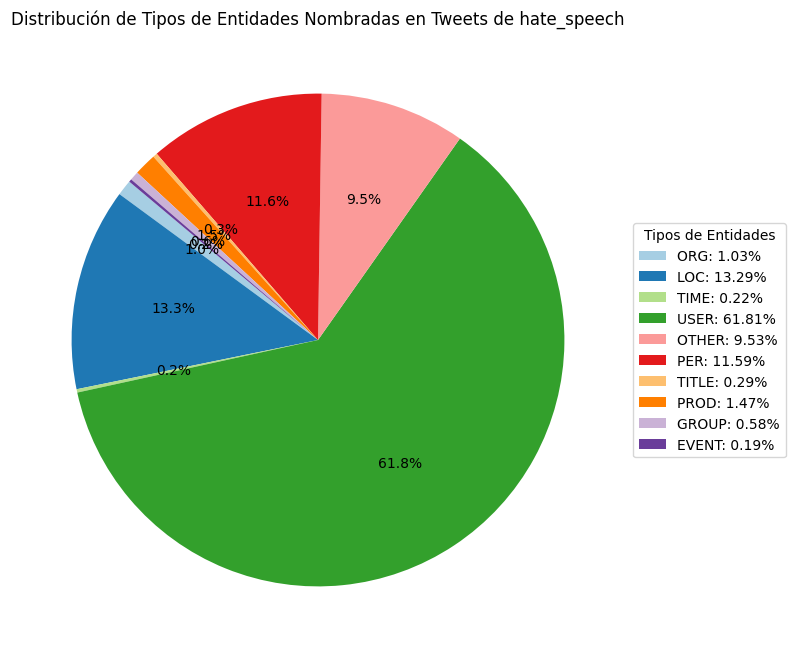

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas en Tweets de hate_speech")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


-----------------------------------------------

### Tweets no hate_speech

-----------------------------------------------


In [55]:
# NER en tweets no hate_speech
text_not_hate_speech = [text for text in df_semeval_train[df_semeval_train["hate_speech"] == 0]["text"].tolist()]
results_ner_not_hate_speech = [analyze_named_entities(text) for text in tqdm(text_not_hate_speech)]

  0%|          | 9/2617 [00:00<00:31, 82.05it/s]

Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Entidades encontradas: []
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?
Entidades encontradas: []
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Entidades encontradas: [('antonio caballero', 'PER')]
Texto analizado: @Zurine3 Cuánto hijo de puta sobra en el mundo...
Entidades encontradas: [('@zurine3', 'USER')]
Texto analizado: Pablo Casado debería estudiar un máster en inmigración https://t.co/Pcz6GPJ6dG
Entidades encontradas: [('pablo casado', 'PER')]


  1%|          | 27/2617 [00:00<00:31, 81.09it/s]

Texto analizado: @PepeGonzalezRP @EsmeSese Diappoler* jajaja cállate Pepe niño polla Si me han llenado de notificaciónes jajajajaja
Entidades encontradas: [('@pepegonzalezrp', 'USER'), ('@esmesese', 'USER'), ('pepe', 'PER')]
Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Entidades encontradas: []
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la violación y el acoso. Por lo tanto, pierden las víctimas de las mierdas que se dedican a violar y/o acosar.
Entidades encontradas: []
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia es una zorra... si mal no recuerdo tambien te habias metido con uno CON novia, no hay que hacer lo que no nos gusta que nos hagan🙆🙆🙅
Entidades encontradas: []
Texto analizado: Odio los viejos que se creen que se merecen todo, hijo de puta tú lo que te mereces es una tumba.
Entidades encontradas: []
Texto analizado: @Manu_Sainz @elchiringu

  2%|▏         | 45/2617 [00:00<00:30, 84.14it/s]

Texto analizado: Inmigrantes intentan fugarse de Ceuta escondidos en un ferry https://t.co/PzsYXikVuh vía
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Entidades encontradas: [('@proctologo', 'USER')]
Texto analizado: - El tiempo no existe. La división espacio-temporal es una invención del hombre, por lo tanto,.. - Cállate, hijo(a) de puta.
Entidades encontradas: []
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Entidades encontradas: [('@policia', 'USER')]
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Entidades encontradas: [('@gliclazida', 'USER'), ('@dotfanny', 'USER'), ('@el_pais', 'USER')]
Texto analizado: La Conferencia Sectorial de Inmigración y Emigració

  2%|▏         | 63/2617 [00:00<00:30, 84.70it/s]

Texto analizado: no entiendo eso de enseñarle la polla a cualquiera de verdad, no le encuentro el sentido
Entidades encontradas: []
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 https://t.co/8SHYnivgXa
Entidades encontradas: []
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Entidades encontradas: [('@darkgraphics_yt', 'USER'), ('@istekogfx', 'USER'), ('@kanouraa', 'USER')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Entidades encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER')]
Texto analizado: @Zabayar Lo peor de todo es que tú eres parte de la culpa de la destrucción de Venezuela hijo de la grandísima PUTA, y encima sigues siendo chavista MALPARIDO. ahora no se valen arrepentimientos tienen 18 años llevando PALO y pasando roncha y es ahorita e
Entidades en

  3%|▎         | 81/2617 [00:00<00:30, 83.47it/s]

Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Entidades encontradas: [('@lauty489', 'USER')]
Texto analizado: Los procesos administrativos tienen que ser rápidos para menores inmigrantes refugiades, ya que el futuro de eses menores está en juego. El día de mañana si quieren trabajar, seguirán sin esos papeles, los hombres terminarán en trabajos irregulares y las mujeres en prostitución.
Entidades encontradas: []
Texto analizado: Mirna, para algunas feministas celebrarle un vestido a una mujer es acoso, ojo ahí #pautab @adnradiochile @mirnaschindler
Entidades encontradas: [('mirna', 'PER'), ('pautab', 'ORG'), ('@adnradiochile', 'USER'), ('@mirnaschindler', 'USER')]
Texto analizado: @alejitacoll ... habemos muchos hombres en contra del acoso; eso sí, no todos lo expresamos desde el prejuicio sexista. Su respuesta se ganará aplausos y likes de los bienpensantes 'pero en ciertos pasajes no representa más que el extremo opuesto de la desastrosa columna de Caballe

  4%|▍         | 99/2617 [00:01<00:29, 85.21it/s]

Texto analizado: 600 manteros saltaron la valla en Ceuta el otro día. https://t.co/VErAmkEW5b
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: Pedimos picada árabe? 3 palabras, 1 corazón feliz
Entidades encontradas: []
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Entidades encontradas: [('@jordiwild', 'USER')]
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Entidades encontradas: [('@lucasspadafora', 'USER'), ('lucas', 'PER')]
Texto analizado: Cómo me atraen las güeras 🤤
Entidades encontradas: []
Texto analizado: @edward18jgm @PunishedLivinx Tu eres el gilipollas que no has tocado un libro de historia en tu puta vida y vas de listo sin saber de lo que hablas
Entidades encontradas: [('@edward18jgm', 'USER'), ('@punishedlivinx', 'USER')]
Texto analizado: Me encantaria darte unas nalgadas ricas ❤ — A mí me encantaría pegarte una hostia en la cara ht

  4%|▍         | 117/2617 [00:01<00:29, 83.44it/s]

Texto analizado: @letra_escarlata @Pepe_Tron_B_M @anaisbernal @20m Y estos son los hijos de puta que van a luchar contra la violencia que ejercen contra las mujeres. Es que no me troncho porque NO TIENE NI PUTA GRACIA 😡😡😡
Entidades encontradas: [('@letra_escarlata', 'USER'), ('@pepe_tron_b_m', 'USER'), ('@anaisbernal', 'USER'), ('@20', 'USER')]
Texto analizado: @spitfireXxX77 Si yo soy nazi, tu eres un hijo de puta
Entidades encontradas: [('@spitfirexxx77', 'USER')]
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico, violación o coacción son un delito… PERO!!! El coqueteo insistente o torpe no lo es, ni es la caballerosidad una agresión machista… Pero la exageración sensacionalista es lo de hoy ¿no?
Entidades encontradas: []
Texto analizado: ICE le da gran prioridad a la lucha contra la inmigración ilegal, incluyendo la búsqueda de extranjeros #indocumentados con antecedentes penales que presentan una amenaza para la seguridad pública h

  5%|▌         | 135/2617 [00:01<00:29, 85.33it/s]

Texto analizado: Muchas personas creen q una mujer es abusada o acosada por ir muy descubierta, pero yo he visto acoso a mujeres por lo contrario también, mujeres cuya religión o creencias son otras y son acosadas por eso. Eso demuestra q hay un standard tácito d mujer, y q se espera sea cubierto
Entidades encontradas: []
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Entidades encontradas: [('jackie', 'PER'), ('hyde', 'PER')]
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Entidades encontradas: [('@ark_antos', 'USER')]
Texto analizado: Del árbol del silencio pende el fruto de la seguridad-Proverbio Árabe
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: El acoso sexual empieza a destaparse en la industria musical: podero

  6%|▌         | 154/2617 [00:01<00:28, 86.92it/s]

Texto analizado: I liked a @YouTube video https://t.co/s4HGvbL6SV Francisco Tárrega - Capricho árabe
Entidades encontradas: [('@youtube', 'USER'), ('francisco tárrega', 'PER'), ('capricho árabe', 'TITLE')]
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Entidades encontradas: []
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ERES UN COBARDE Y UNA MIERDA DE TIO,Que decepcion...mas vale quedarte
Entidades encontradas: [('@telecincoes', 'USER'), ('@gusgonzalves', 'USER')]
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Entidades encontradas: []
Texto analizado: Que lindo es poder escuchar música árabe con

  7%|▋         | 172/2617 [00:02<00:28, 85.21it/s]

Texto analizado: Os habéis dado cuenta de que podríais pintarle una polla en la cara a un vampiro dormido y se pasaría meses con ella?
Entidades encontradas: []
Texto analizado: Tengo muy claro q el Perú es un país benevolente y apacible. Sabemos q aceptamos y de buena gana ayudar. Sabemos solidarizarnos. También tengo claro, q somos un país en pañales, q no estamos preparados para recibir a más inmigrantes q huyen sin sustento por haber votado mal.
Entidades encontradas: [('perú', 'LOC')]
Texto analizado: Juez reafirma orden a Trump de reactivar el programa DACA para jóvenes indocumentados. #AgendaPública https://t.co/YIvr3P9jMq https://t.co/xKCrNdyxgh
Entidades encontradas: [('trump', 'PER'), ('daca', 'ORG')]
Texto analizado: ALLANARON la oficina de Thomas (ex de EBY) en la propia Central! A nuestra CGR, nunca dejaron entrar porque es bilateral. #YacyretaSeEntregó sin ver papeles y ahora se destapó escándalo de corrupción. Van a seguir igual con este FATO FEROZ @Horacio_Cartes y @Mar

  7%|▋         | 190/2617 [00:02<00:28, 86.57it/s]

Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Entidades encontradas: [('@juanitosay', 'USER')]
Texto analizado: Las #niñas #niños y #adolescentes pueden ser #refugiados. Las cifras de @unhcr muestran la enorme vulnerabilidad de NNA al desplazamiento forzado https://t.co/MpyWfweTt4
Entidades encontradas: [('@unhcr', 'USER')]
Texto analizado: Acá es como que vas al club a tomar algo y si o si tenes que cruzar a sudaca para qué tal está 🤷🏻‍♀️
Entidades encontradas: [('sudaca', 'LOC')]
Texto analizado: arabe es un temaiken amigos no veo la hora de q lo pasen en blv
Entidades encontradas: [('arabe', 'TITLE'), ('blv', 'LOC')]
Texto analizado: @diegovftbau REENCUENTRO LA PUTA MADRE, DISFRUTALO MUCHO, LO RE MERECES AMIGA
Entidades encontradas: [('@diegovftbau', 'USER')]
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces

  8%|▊         | 208/2617 [00:02<00:28, 84.75it/s]

Texto analizado: ESTA TERRIBLE ARABE DE ECKO AMIGO QUE CHABON CON FLOW
Entidades encontradas: [('ecko', 'PER')]
Texto analizado: Hay gente miserable en el mundo Luego está esta señora, que parece que no tiene ningún escrúpulo que buscar  Bufete de Nuria Vandenberghe: Una abogada proisraelí, antimusulmana y fan de Trump denuncia a 602 inmigrantes que saltaron la valla de Ceuta   https://t.co/kp5zMKui5l
Entidades encontradas: [('nuria vandenberghe', 'PER'), ('trump', 'PER'), ('ceuta', 'LOC')]
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Entidades encontradas: [('@huxgenerai', 'USER')]
Texto analizado: Independiente se lo merecía, @Flamengo son cagones, son putos y si son unos brasileros hijos de puta
Entidades encontradas: [('independiente', 'GROUP'), ('@flamengo', 'USER')]
Texto analizado: Btw, si aún

  9%|▊         | 226/2617 [00:02<00:27, 85.84it/s]

Texto analizado: @gerardotc Y tu eres un racista de mierda que ahora es progre, revienta hijo de puta
Entidades encontradas: [('@gerardotc', 'USER')]
Texto analizado: Detienen a tres #jugadores de la #Arandina por presuntos #abusossexuales a una #menor https://t.co/vgkgFox4a5 #movimientojupsin #gentejupsin NO al #acoso
Entidades encontradas: [('la', 'GROUP'), ('arandina', 'GROUP'), ('movimientojupsin', 'GROUP')]
Texto analizado: yo: hol- todas vosotras: blanca puta gilipollas hueles mal vaya pozos tu bias es hy*kjae eres una rata sucia callate ya
Entidades encontradas: [('hy*kjae', 'PER')]
Texto analizado: Refugiados na UNICAMP!!! https://t.co/XmNzRWenx4 via @YouTube
Entidades encontradas: [('unicamp', 'LOC'), ('@youtube', 'USER')]
Texto analizado: Más de 600 inmigrantes de origen subsahariano accedieron a territorio español a primera hora de la mañana del jueves cruzando la valla en Ceuta https://t.co/1V3ku8Nf2V
Entidades encontradas: [('subsahariano', 'OTHER'), ('jueves', 'TIME'), ('

  9%|▉         | 244/2617 [00:02<00:28, 84.20it/s]

Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Entidades encontradas: [('@csanchezberzain', 'USER'), ('@dlasamericas', 'USER'), ('quintana', 'PER')]
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la violencia. Hay que acabar con el machismo desde la política y la educación y, empoderar a las mujeres para que estén en política
Entidades encontradas: [('@cxwww', 'USER'), ('@anaisbernal', 'USER')]
Texto analizado: Por eso si no están al nivel los criticaré, en ésta cuenta no estamos para comerle la polla a nadie sin que lo merezca
Entidades encontradas: []
Texto analizado: @alpiNo_10 Comemela yonki. A ver si jugamos al player
Entidades encontradas: [('@alpino_10', 'USER'), ('yonki', 'PER')]
Texto analizado: No se por que me empezaron a seguir tantas cuentas árabes pero gracias porque sub

 10%|█         | 262/2617 [00:03<00:27, 85.84it/s]

Texto analizado: @IhyAlex_ @xxxeyeless Hasmelo a mi el es mi perra le estoy enseñando apenas pvp
Entidades encontradas: [('@ihyalex', 'USER'), ('@xxxeyeless', 'USER')]
Texto analizado: Pero que coño le pasa esta puta noche a la naranjo!!??? Eres consciente de las tonterías que has soltado hoy por tu boca!??
Entidades encontradas: [('naranjo', 'PER')]
Texto analizado: mi mama esta escuchando el nuevo tema de ecko jajajaj esta en modo arabe la loca
Entidades encontradas: [('ecko', 'PER'), ('arabe', 'OTHER')]
Texto analizado: ATENCIÓN #España ofrece salud gratuita a #inmigrantes indocumentados   https://t.co/tOKF1o7y5A https://t.co/W6OQ0MLSnn
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Marlaska la caga...#Dimisionya Cn el asalto valla d Ceuta se abre una crisis Cn el show dl Aquarius s activo efecto llamada y las mafias hacen su agosto. Trato favor acercar políticos presos catalanes Indignación de Policía y G.Civil Dejar sin fondos a la UCO Cesa al Crnel  UCO https://t.co/

 11%|█         | 280/2617 [00:03<00:27, 85.13it/s]

Texto analizado: Es imposible escuchar Arabe de ecko sin bailarlo.
Entidades encontradas: [('arabe', 'TITLE'), ('ecko', 'PER')]
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Entidades encontradas: [('@anadargallo', 'USER'), ('@imma0142', 'USER'), ('@hermo46572739', 'USER'), ('@m_brokenleg', 'USER'), ('@omnium', 'USER'), ('@ppopular', 'USER')]
Texto analizado: inventarse espías de amlo para montarte todo un show de acoso y persecusión q acaba de guardanalgas por los celos de un afiliado blandengue mocho es pretexto p pedir 💰a la sectayunquera o al partido
Entidades encontradas: [('amlo', 'PER')]
Texto analizado: @AldoGarFer Tu eres mi perra en beer pong
Entidades encontradas: [('@aldogarfer', 'USER')]
Texto analizado: Horrible el tema arabe.
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: mi papá es un hijo de puta, mi mamá no se merecía una mierda así tantos años y el día que se separen m

 11%|█▏        | 298/2617 [00:03<00:27, 85.29it/s]

Texto analizado: COMO LE VAN A ENSEÑAR A UNA BEBE DE 2/ 3 AÑOS QUR CANTE UNA CANCIÓN QUE DICE 'PUTA BOLUDA, ZORRA', ENCIMA LA CANCIÓN LS TOMAN A CHISTE Y ES HORRIBLE TE DAS CUENTA A LO QUE LLEGAN LOS CELOS? HAY GENTE ESTÚPIDA
Entidades encontradas: []
Texto analizado: Nose si me está afectando el alcohol pero INUYASHIKI NO SE MERECÍA MORIR HIJOS DE PUTA
Entidades encontradas: [('inuyashiki', 'PER')]
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Entidades encontradas: [('@torakitoj', 'USER')]
Texto analizado: Te odio Lidia, no te mereces a Francisco, #perra #LasChicasDelCable2
Entidades encontradas: [('lidia', 'PER'), ('francisco', 'PER')]
Texto analizado: @XxkirtsxX @keepingaIex callate la puta boca pesado
Entidades encontradas: [('@xxkirtsxx', 'USER'), ('@keepingaiex', 'USER')]
Texto analizado: Lugares indocumentados EE.UU corren riesgo ser arrestados https://t.co/4KrT6n6TqI https://t.co/2LbhPisVrB
Entidades encontradas: [(

 12%|█▏        | 316/2617 [00:03<00:26, 86.60it/s]

Texto analizado: Y mis primas calladas pq saben que aquí la perra de la familia soy yo y que con un mensaje les arruino la vida perfecta que aparentan, a parte las dos me caen bien 🙄
Entidades encontradas: []
Texto analizado: Os voy a enseñar una foto muy guarra mia
Entidades encontradas: []
Texto analizado: Si yo llego a España en patera y lo primero que me encuentro es a Casado y a Rivera... O me piro sin mirar atràs o, ya que estoy, le preguto a Casado sin en la URJC también se pueden comprar papeles.Siempre déjate asesorar por profesionales.
Entidades encontradas: [('españa', 'LOC'), ('casado', 'PER'), ('rivera', 'PER'), ('casado', 'PER'), ('urjc', 'ORG')]
Texto analizado: @OficialYuri güera eres increíble una gran noche cantando y bailando contigo https://t.co/7moCV7o9Rw
Entidades encontradas: [('@oficialyuri', 'USER')]
Texto analizado: les arabes https://t.co/93F49DMfQe
Entidades encontradas: []
Texto analizado: Una perra, se llama Laika ahre TE MERECES TODO KEVSHO https://t.co/l

 13%|█▎        | 334/2617 [00:03<00:26, 84.96it/s]

Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Entidades encontradas: [('papá noel', 'PER')]
Texto analizado: @Viejastirpe 'Profe al final no te puedo enseñar mi polla salterina pero te puedo mostrar un testiculo que grita.Apruébame anda'
Entidades encontradas: [('@viejastirpe', 'USER')]
Texto analizado: Se sale en modo arabe? Jajajaj 😂
Entidades encontradas: []
Texto analizado: @clarii_alderete @Mapazbelen Entonces, si seguimos esa lógica, el acoso sexual contra la mujer es más grave que el acoso sexual contra el hombre sólo porque registra más casos? Me sorprende dicha interpretación viniendo de vos, Clara.
Entidades encontradas: [('@clarii_alderete', 'USER'), ('@mapazbelen', 'USER'), ('clara', 'PER')]
Texto analizado: @Guayabeirho @Uber_MEX tendría que ser responsable en el caso que se les acusa a sus choferes de violación y acoso.
Entidades encontradas: [('@guayabeirho', 'USER'), ('@uber_mex', 'USER')]
Texto analizado: si 

 13%|█▎        | 352/2617 [00:04<00:26, 86.21it/s]

Texto analizado: Ya me joderia demostrar que soy racista, etnocentrista, machito y frivolizar con el acoso y la violacion en 4 lineas. Que miedo da perder privilegios eh https://t.co/jdrs9wOsZn
Entidades encontradas: []
Texto analizado: @diegocruzva @SiletiumNaturae De hombre a hombre: Cállate de una puta vez que no tienes ni puta idea
Entidades encontradas: [('@diegocruzva', 'USER'), ('@siletiumnaturae', 'USER')]
Texto analizado: @daanii202 la puta madre ojalá todos pudieran tener alguien como vos en sus vidas, te mereces todo lo bueno que te pase y más amiga!!! aaaaa sos tan hermosa q lloro, te amo con todo mi ❤ y para siempre!
Entidades encontradas: [('@daanii202', 'USER')]
Texto analizado: ríete tú de la valla de Melilla y el muro de Trump. El ayto de Madrid ya hizo sus pinitos con fosos para aislar gitanos https://t.co/AAzZaKxcO2 #madrid
Entidades encontradas: [('melilla', 'LOC'), ('trump', 'PER'), ('madrid', 'LOC'), ('madrid', 'LOC')]
Texto analizado: Toma independencia,Africa se

 14%|█▍        | 370/2617 [00:04<00:25, 86.53it/s]

Texto analizado: La administración federal había asegurado que dio opciones a todos los inmigrantes expulsados https://t.co/bTwn63SdlM
Entidades encontradas: []
Texto analizado: @KRLS TU ERES UN PUTO GILIPOLLAS!!! Muy poca vergüenza utilizar a víctimas de terrorismo para hacer campaña!!! Puta escoria!!!
Entidades encontradas: [('@krls', 'USER')]
Texto analizado: me compré un libro de alemán en la que pueda me las tomo como buen sudaka aspiracional
Entidades encontradas: [('alemán', 'OTHER'), ('sudaka', 'OTHER')]
Texto analizado: Estoy un poco hasta la polla de que chaval nuevo que viene, chaval al que tengo que enseñar. Para que luego haga lo que quiera y pase de lo que le he dicho.
Entidades encontradas: []
Texto analizado: Cuando un tío te pide una foto guarra y tus amigas te aconsejan que le envíes una caca y se meten a google a buscar la caca más realista @maaariams_13 #nopuedoreirmás
Entidades encontradas: [('google', 'PROD'), ('@maaariams_13', 'USER')]
Texto analizado: Artistas f

 15%|█▍        | 388/2617 [00:04<00:26, 85.46it/s]

Texto analizado: El acoso sexual a una mujer es indignante el hombre q lo haga es un canalla un enfermo y si tiene esposa e hijos peor por q padece de aberraciones este mal debemos combatirlo y acabarlo estás personas se deben sacar de las empresas y q paren a una xarcel
Entidades encontradas: []
Texto analizado: @Vale_Landeyra @letianabadiannn Cállate no me hagas hablar la puta madre
Entidades encontradas: [('@vale_landeyra', 'USER'), ('@letianabadiannn', 'USER')]
Texto analizado: @todonoticias @jorgejorge68 Callate hijo de puta golpista.!!!
Entidades encontradas: [('@todonoticias', 'USER'), ('@jorgejorge68', 'USER')]
Texto analizado: Si no os gusta la película de La 1 podéis ver este cortometraje sobre el posado de "Refugiados ahogándose" #FakeNews https://t.co/dmc17w1erv
Entidades encontradas: []
Texto analizado: Encore les arabes😂🤣😂🤣 https://t.co/FKF8Uk7lMh
Entidades encontradas: []
Texto analizado: ¿Ta malito? Nombre ¡ta' rebueno!  Apúntale güero, aprende a preparar unos tamalitos

 16%|█▌        | 407/2617 [00:04<00:25, 87.27it/s]

Texto analizado: Del contrato sin firma del Triplex a los cuadernos quemados del chófer (a.k.a. 🕵️👮)... Qué flojita de papeles (y direccionada) viene la cosa #Lawfare
Entidades encontradas: [('triplex', 'ORG')]
Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Entidades encontradas: []
Texto analizado: La güera ya ‘’sabe’’ decir su nombre y dice que se llama Pami ✨❤️
Entidades encontradas: [('pami', 'PER')]
Texto analizado: Bruselas dice que teme que la inmigración en España desate el populismo. Igual deberían preocuparse de que en parte de Europa gobierne el fascismo directamente.
Entidades encontradas: [('bruselas', 'ORG'), ('españa', 'LOC'), ('europa', 'LOC')]
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Entidades encontradas: [('@hectorbecerrilr', 'USER'), ('chiclayo', 'LOC')]
Texto analizado: @_Nakoi tú eres guapísimo h

 16%|█▌        | 416/2617 [00:04<00:25, 84.99it/s]

Texto analizado: Ejemplo perfecto de cómo NO hay que diseñar un cuestionario, me lo guardo xa mis alumnos #periodismo #opinionpublica :/ :/ @UCMccinf #encuestas #metodologia #ccss #inmigracion https://t.co/cpkuQeMDfr
Entidades encontradas: [('@ucmccinf', 'USER')]
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: que si el lenguaje, que si es acoso, que si es lío de faldas.
Entidades encontradas: []
Texto analizado: @Daniela__Valdiv dani no alcancé a escuchar porque te habían revisado en los Emiratos Arabes, son también estrictos? Queremos viajar para allá y me gustaría saber 🙏🏻
Entidades encontradas: [('@daniela__valdiv', 'USER'), ('dani', 'PER'), ('emiratos arabes', 'LOC')]
Texto analizado: Os habéis pasado décadas llamando 'guarra' a Maribel Verdú por enseñar cacho. O a Victoria Abril. Tampoco vamos a pedirle peras al

 17%|█▋        | 434/2617 [00:05<00:25, 84.09it/s]

Texto analizado: @salvameoficial Esto es lo que os merecéis en la puta boca los de salvame? https://t.co/DbYLJIkwhz
Entidades encontradas: [('@salvameoficial', 'USER')]
Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa14
Entidades encontradas: []
Texto analizado: qué temazo arabe de ecko ahre
Entidades encontradas: [('arabe', 'TITLE'), ('ecko', 'PER')]
Texto analizado: @MarcSuRI @jg_dominguez Calláte tú,fascista catalán de mierda,escoria humana,deshecho de tienta,rata de cloaca....y deja a tu madre en paz, la pobre....
Entidades encontradas: [('@marcsuri', 'USER'), ('@jg_dominguez', 'USER')]
Texto analizado: A cms. de atropellarme  un tipo, es INMIGRANTE, mientras, cruzaba la calle con luz verde. Le indiqué había luz verde, pero me hizo una señal como queriendo decir:"Qué me importa perro!!!" le iba a tomar una foto a la patente del vehículo, pero se fugó. Esta es la mierda, https://t.co/06C98w5Jm6
Entidades encontradas: []
Texto analizado: Tendrí

 17%|█▋        | 452/2617 [00:05<00:25, 85.92it/s]

Texto analizado: Periodistas árabes afirman que Israel utiliza las fuerzas de la naturaleza en la guerra contra el Islam  Señores la naturaleza no existe , es la accion de DI-S. en este mudo, segundo asegundo
Entidades encontradas: [('árabes', 'OTHER'), ('israel', 'LOC'), ('islam', 'OTHER'), ('di-s', 'ORG')]
Texto analizado: @SweetStab Que bueno, que sigues siendo escoria y no mereces más mi tiempo
Entidades encontradas: [('@sweetstab', 'USER')]
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Entidades encontradas: [('@eugravano', 'USER')]
Texto analizado: VOX: "Nuestros refugiados son nuestros jóvenes que se han tenido que marchar forzosamente fuera de España a trabajar. Para VOX ellos son los primeros." 👏👏 https://t.co/WG5RBjZUnu
Entidades encontradas: [('vox', 'PER'), ('españa', 'LOC')]
Texto analizado: @ddm_oficial #Bremer=Brancatelli sos un hijo de mil puta.... y cállate la boca se te no

 18%|█▊        | 470/2617 [00:05<00:25, 85.23it/s]

Texto analizado: @_kayligonzales_ Puta men ya callate
Entidades encontradas: [('@_kayligonzales', 'USER')]
Texto analizado: Q ministra d "Lo Que Falta y Lo Que Sobra" (Trabajo y Migraciones),diga q ve n Casado y Rivera tendencias "racistas y xenófobas" x visitar Ceuta es como si yo digo q Sánchez e Iglesias lo son x no tener inmigrantes dentro d la valla d Moncloa o d La Navata https://t.co/VCITOyMvuT
Entidades encontradas: [('casado', 'PER'), ('rivera', 'PER'), ('ceuta', 'LOC'), ('sánchez', 'PER'), ('iglesias', 'PER')]
Texto analizado: @abc_es Una puta mierda!!!! Luego hablan de democracia y de tonterías!!!! Se lo montan bien!!! Eso tendría que estar prohibido!!! Y mientras españoles jubilados muriéndose d hambre
Entidades encontradas: [('@abc_es', 'USER')]
Texto analizado: Podían poner los taxis bloqueando el paso en la valla de Ceuta.
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: Toni Albà, de exhibirse desnudo frente a menores a llamar 'mala puta' a Inés Arrimadas. ¿Qu

 19%|█▊        | 488/2617 [00:05<00:25, 84.33it/s]

Texto analizado: que estan haciendo los dos han enseñado la polla en la cara y me la deje asi
Entidades encontradas: []
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Entidades encontradas: []
Texto analizado: Que si uno es puta, que si uno es lo otro, mij@ cállate la boca y vive y deja vivir al final la qk no es de ninguno de los que habla mierda
Entidades encontradas: []
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Entidades encontradas: [('@erreleny', 'USER'), ('@fel_blan', 'USER')]
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/ciShALtJBr - ¿Por qué tanta inmigracion hacia Chile?).
Entidades encontradas: [('@youtube', 'USER'), ('chile', 'LOC')]
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Pu

 19%|█▉        | 506/2617 [00:05<00:25, 81.93it/s]

Texto analizado: @DeluxeSabado @gusgonzalves Un imbécil que dice ahora el payaso este la zarigueña y gema de las infidelidades de Kiko Rivera eh sois escoria
Entidades encontradas: [('@deluxesabado', 'USER'), ('@gusgonzalves', 'USER'), ('zarigueña', 'PER'), ('kiko rivera', 'PER')]
Texto analizado: @sr_hater_ Guarra es la persona que no se lava, no una chica libre de enseñar lo que quiera y como quiera :)
Entidades encontradas: [('@sr_hater', 'USER')]
Texto analizado: La derecha ya ha marcado su línea de disputa y discurso. Los medios tenemos, hoy, una gran responsabilidad en cómo contamos esta situación. Los inmigrantes llegados este año a España sólo llenarían un cuarto del Estadio Santiago Bernabeu. https://t.co/flJvG39ba7
Entidades encontradas: [('españa', 'LOC'), ('estadio santiago bernabeu', 'LOC')]
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Entidades encontradas: [('raoul', 'PER'), ('cepeda', 'PER')

 20%|█▉        | 515/2617 [00:06<00:37, 55.59it/s]

Texto analizado: Adán canta “mi novia es sevillista y una puta más”...enhorabuena por la victoria. La prima, podrías usarla para que te enseñen valores, respeto y comprarte algún libro de autoayuda para semejante idiotez.
Entidades encontradas: [('adán', 'PER'), ('sevillista', 'OTHER')]
Texto analizado: Eso, y que la existencia de Internet también ha motivado a muchos imbéciles a extender su acoso. No es tan simple como «apagar la computadora». https://t.co/cyQgveuDSV
Entidades encontradas: []
Texto analizado: No es idéntica, pero se parece en q gana el mejor; también se parece en q aunque tu rival sea escoria, si tu eres mas escoria q el pierdes. https://t.co/9xge9ViyH5
Entidades encontradas: []
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Entidades encontradas: [('@troyanovichd', 'USER')]
Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Entidades encontradas: []
Texto analizado: @HangryLesbian Pero en temas de Filos

 20%|██        | 528/2617 [00:06<00:49, 42.24it/s]

Texto analizado: Me re estresa ser tan hija de puta pero a ver viejo de mierda cállate que quiero dormir
Entidades encontradas: []
Texto analizado: Trump arremete contra las mujeres que lo acusan de acoso sexual; asegura que las denuncias de las 16 mujeres son 'historias inventadas' https://t.co/5A4r7PPtYt https://t.co/UePk8310gP
Entidades encontradas: [('trump', 'PER')]
Texto analizado: Mueren 11 inmigrantes en Italia en accidente de camión con trabajadores agrícolas - https://t.co/UEmuxExgid https://t.co/OEPT93Q5S6
Entidades encontradas: [('italia', 'LOC')]
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Entidades encontradas: []
Texto analizado: A todos que critican la llegada de inmigrantes y crean que nos quitan trabajo, les dan demasiadas ayudas y demás, que se miren el programa de hoy de AR a partir de las 10. Y que se queden con eso que han dicho: "Vienen a hacer el trabajo que LOS E

 21%|██        | 545/2617 [00:06<00:36, 56.66it/s]

Texto analizado: #LoMásLeído La inmigración ilegal en Melilla ofrece datos preocupantes: un 40% más en 2018 https://t.co/pVqDaUf7L7 https://t.co/eZ7EFuLXLW
Entidades encontradas: [('melilla', 'LOC')]
Texto analizado: El reggaeton árabe de los anuncios de Youtube no juega carro.
Entidades encontradas: [('árabe', 'OTHER'), ('youtube', 'PROD')]
Texto analizado: #NOME?
Entidades encontradas: []
Texto analizado: @GetawayCar78 Hierba mala nunca muere, dicen. Es un pedazo de imbecil que ojala le cerraran el canal. Es el Logan/Jake paul español. Escoria
Entidades encontradas: [('@getawaycar78', 'USER'), ('logan', 'PER'), ('jake paul', 'PER'), ('español', 'OTHER')]
Texto analizado: @joohexnlee // QUE NO TE PEGO UNA PEGATINA EN LA CARA NO MÁS
Entidades encontradas: [('@joohexnlee', 'USER')]
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Entidades encontradas: [('victoria donda', 'PER')]
Texto analizado: @elultrafunk @adelarosa_espn t

 22%|██▏       | 563/2617 [00:07<00:29, 68.98it/s]

Texto analizado: Antojada de dulces árabes. .. Baklava te pienso... https://t.co/sSKAhDBzRd
Entidades encontradas: [('árabes', 'OTHER'), ('baklava', 'LOC')]
Texto analizado: @LTGarlic Nos turnamos para enseñarle la polla a Granados en el comedor.
Entidades encontradas: [('@ltgarlic', 'USER')]
Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https://t.co/RnvqHQ59zE
Entidades encontradas: []
Texto analizado: Como no lo cago a palos un abuelo o abuela .se lo merecía el hijo de puta . #AnimalesSueltos @fantinofantino espero que le hagas preguntas al hueso sl pelotudo de MACRI .habla del lavado de MACRI forro https://t.co/EcJwJCVlec
Entidades encontradas: [('@fantinofantino', 'USER'), ('macri', 'PER'), ('macri', 'PER')]
Texto analizado: @hermanntertsch Basta! Poned pie en pared a tanta provocación y cortad la humillación de estos cuatro hijos de perra,
Entidades encontradas: [('@hermanntertsch', 'USER')]
Texto analizado: La Opinión: ¿Por qué la in

 22%|██▏       | 581/2617 [00:07<00:26, 75.92it/s]

Texto analizado: Caricachupas 👏🏼👏🏼 Presenta 👏🏼👏🏼 Nombres de 👏🏼👏🏼 Taquerías chidas👏🏼👏🏼 Por ejemplo 👏🏼👏🏼 De cochinada 👏🏼👏🏻 Los cocuyos👏🏼👏🏻 Güeros Boturini👏🏼👏🏻 Abanicos👏🏼👏🏻 Ramiro Tepito👏🏼👏🏻 De milanesa 👏🏼👏🏻 El Papi 👏🏼👏🏻 El paisa👏🏼👏🏻 Cuñaó 👏🏻👏🏻
Entidades encontradas: []
Texto analizado: @IU_Madrid Que panda de hijos de puta estáis hechos. El único sitio en el que merecía estar es entre rejas.
Entidades encontradas: [('@iu_madrid', 'USER')]
Texto analizado: Puta escoria es quien te hace sentir así de mal porque no te mereces sentirte así de mal. https://t.co/hQrn2h0fIA
Entidades encontradas: []
Texto analizado: @HeraldOfNight En tu culo. Es mi polla.
Entidades encontradas: [('@heraldofnight', 'USER')]
Texto analizado: Las nuevas 'autoridades' de inmigración se lo dicen claro a @matthewbennett : "Gibraltar no es una puerta de entrada a España… con el tema Brexit, el Reino Unido va a dejar de formar parte de la Unión Europa. La inmensa... https://t.co/p7ofTM0HJN
Entidades encontradas: [('@ma

 23%|██▎       | 599/2617 [00:07<00:25, 79.07it/s]

Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Entidades encontradas: []
Texto analizado: Eres la puta ama — Por eso soy tú esposa, porqué tu eres el puto amo. https://t.co/Cr2RVekPUO
Entidades encontradas: []
Texto analizado: Y me pongo árabe cuando tomooo
Entidades encontradas: []
Texto analizado: FRASES ÁRABES MAS BELLAS DEL MUNDO – Proverbios Árabes  https://t.co/GyS5njiyoo
Entidades encontradas: []
Texto analizado: Por qué se desea feliz navidad? Es un puta semana de mierda, ya está bien de tonterías.
Entidades encontradas: []
Texto analizado: El sábado en modo árabe como dijo David
Entidades encontradas: [('sábado', 'TIME'), ('árabe', 'OTHER'), ('david', 'PER')]
Texto analizado: mi novia es una guarra no se ducha desde el año pasado 😂😂😂👏👏👌👌
Entidades encontradas: []
Texto analizado: @Jackvatore Es que sinceramente ni puta gracia me haces, y si me insultas menos, así que callate la puta boca, gracias.
Entidades enc

 24%|██▎       | 617/2617 [00:07<00:24, 82.56it/s]

Texto analizado: De todos los países árabes, es Marruecos que se ajuste a la fantasía de Sherezade y mil y una noches del más cercanos. Es una ciudad de calles subterráneas, la arquitectura antigua y secreta jardines amurallados que dicen mucho acerca de una historia que era real y ...
Entidades encontradas: [('árabes', 'OTHER'), ('marruecos', 'LOC'), ('sherezade', 'LOC')]
Texto analizado: @LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se lo escriben a un tío en la polla 😒😒
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Entidades encontradas: [('leo', 'PER')]
Texto analizado: Pobre niño jesús... porque si le llevan lo que tu eres le va a caer tremendo comunista hijo de puta encima! desde venezuela con cariño... argentino sinvergüenza https://t.co/se8FdeYwKq
Entidades encontradas: [('jesús', 'PER'), ('venezuela', 

 24%|██▍       | 635/2617 [00:07<00:24, 82.29it/s]

Texto analizado: @orland_71 @UltimaHoracom Si hay diferencia, si es tu conocida y sabés que no le va a molestar no es acoso. Cualquier cosa fuera de eso es acoso. Fin.
Entidades encontradas: [('@orland_71', 'USER'), ('@ultimahoracom', 'USER')]
Texto analizado: @hectorbecerrilr Hola Héctor, con todo el respeto que te mereces, que profesión tienes hijo de puta?
Entidades encontradas: [('@hectorbecerrilr', 'USER'), ('héctor', 'PER')]
Texto analizado: Su eres nazi mereces que un hijo de puta más hijo de puta que tú te mate. Y así construiremos un futuro alucinante. Me voy con Trump o con Putin. Esto no es para mí. https://t.co/UYxHxqpIuL
Entidades encontradas: [('trump', 'PER'), ('putin', 'PER')]
Texto analizado: Marlaska ha nombrado jefe de la UCO a quien hasta ahora estaba al frente de los GRS, el grupo de la @guardiacivil que atendía las "avalanchas" de inmigrantes en la valla de Ceuta https://t.co/JIpVHUlU7W vía @voz_populi
Entidades encontradas: [('marlaska', 'PER'), ('uco', 'ORG'), (

 25%|██▍       | 654/2617 [00:08<00:23, 85.34it/s]

Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/aUa4gDQJqf - CAILLOU ENTRA EN LA MATRIX (Episodio 5) Español sudaca HD).
Entidades encontradas: [('@youtube', 'USER'), ('caillou', 'PER'), ('la matrix', 'TITLE'), ('español', 'OTHER'), ('sudaca', 'OTHER')]
Texto analizado: @nayibha @proxydelKremlin @francesc112233 Tú apoyas a la escoria terrorista del estado español puto imbécil
Entidades encontradas: [('@nayibha', 'USER'), ('@proxydelkremlin', 'USER'), ('@francesc112233', 'USER')]
Texto analizado: De repente me siguieron 3 cuentas verificadas arabes, help no quiero morir
Entidades encontradas: []
Texto analizado: @As_TomasRoncero @elchiringuitotv Cállate la boca gordo hijo de puta
Entidades encontradas: [('@as_tomasroncero', 'USER'), ('@elchiringuitotv', 'USER')]
Texto analizado: Lo de Salou solo es el principio. Ya están saliendo muchos autocares rumbo a Cataluña llenos de subsaharianos, porque dicen que allí Colau lis trata de lujo
Entidades encontradas: [('salou', 'L

 25%|██▌       | 663/2617 [00:08<00:23, 84.75it/s]

Texto analizado: Laredo Texas: Aseguran a 25 indocumentados 14 viajaban escondidos en cajas de carton https://t.co/xvKn8B8a42
Entidades encontradas: [('laredo texas', 'LOC')]
Texto analizado: @fabiopFlamengo @Matias10amil @TyCSports Callate vos chupa pija te comiste 7 de alemania cornudo hijo de puta
Entidades encontradas: [('@fabiopflamengo', 'USER'), ('@matias10amil', 'USER'), ('@tycsports', 'USER'), ('alemania', 'LOC')]
Texto analizado: Denuncian abuso sexual en refugio de niños inmigrantes de Arizona | Diario Noticias Web https://t.co/HqA8wgNWPr
Entidades encontradas: [('arizona', 'LOC')]
Texto analizado: @sr_hater_ Claro, por subir la foto que le dé la puta gana a su Twitter es una guarra. Asocias enseñar carne con ser guarra. Espero que seas de los que lleva jersey de cuello alto en pleno verano.
Entidades encontradas: [('@sr_hater', 'USER'), ('twitter', 'PROD')]
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasa

 26%|██▌       | 680/2617 [00:08<00:29, 66.14it/s]

Texto analizado: Nuestra directora ejecutiva Alexandra Sossa estará hablando en la radio sobre problemas que uno confronta en el trabajo. Sintonice para mas información!  “El show de la Güera” Lunes 20 de... https://t.co/iKonkQR1gl
Entidades encontradas: [('alexandra sossa', 'PER'), ('el show de la güera', 'TITLE'), ('lunes', 'TIME')]
Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Entidades encontradas: []
Texto analizado: Lo mejor que le paso a Florida fue que hubiera competencia de Sudaca , porque ahora todos meten buenas ofertas 😏
Entidades encontradas: [('florida', 'LOC'), ('sudaca', 'OTHER')]
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Entidades encontradas: []
Texto analizado: Siento que mi güera @_elan_ vino a rompernos el estereotipo de la tía que se 

 26%|██▋       | 687/2617 [00:08<00:29, 65.52it/s]

Texto analizado: El master de Casado no ha sido gratis. Lo van a pagar los inmigrantes. https://t.co/qkL0KCJDIQ
Entidades encontradas: [('casado', 'PER')]
Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Entidades encontradas: []
Texto analizado: a VER SI ES VERDAD Y, dejando de ser un bulo, se impone un poco de cordura en Europa . https://t.co/J3MmINOPzj
Entidades encontradas: [('europa', 'LOC')]
Texto analizado: @CamiIa_CabeIIof Me olvidé un millón de cosas, pero bueno, tu novia es muy doris. TE AMO MUCHO, ZORRA. ME ENCANTAS DEMASIADO.
Entidades encontradas: [('@camiia_cabeiiof', 'USER'), ('doris', 'PER')]
Texto analizado: Ufff cuando suena árabe en le lac se me para el pene
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Entidades encontradas: [('@tetashd', 'USER')]
Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
E

 27%|██▋       | 701/2617 [00:08<00:30, 62.50it/s]

Texto analizado: Cuando no tienen a ETA, o a Catalunya o los inmigrantes o todos a la vez, la cuestión es hablar de algo, con lo que supuestamente les gusta el dinero ajeno podian hablar alguna vez de corrupcción. https://t.co/yuuD5kpTEF
Entidades encontradas: [('eta', 'PER'), ('catalunya', 'LOC')]
Texto analizado: Si nunca has sido víctima de acoso, abuso o violación es complicadísimo que entiendas el dolor, miedo e impotencia que te invaden. Y no, callarse no es la solución.
Entidades encontradas: []
Texto analizado: @IrantzuVarela @redequomujeres Eso es no tener ni puta idea de gestión ni dos dedos de frente, al margen de lo patriarcal.
Entidades encontradas: [('@irantzuvarela', 'USER'), ('@redequomujeres', 'USER')]
Texto analizado: M.Rajoy en los papeles de Barcenas, NO es Mariano Rajoy  Pablo Casado aprueba el master sin ir a clase, sin hacer exámenes y convalidando 18 de 22 asignaturas  2 casos que millones de ciudadanos vemos claro pero los jueces NO  #CasadoDimision #MasterCasa

 27%|██▋       | 715/2617 [00:09<00:30, 61.93it/s]

Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Entidades encontradas: [('@diarioas', 'USER')]
Texto analizado: El Partido Popular considera contradictorio el anuncio del PSOE de que retirará las concertinas de Ceuta y Melilla porque "las pusieron ellos"  https://t.co/EDk8c8AKgb
Entidades encontradas: [('partido', 'ORG'), ('popular', 'GROUP'), ('psoe', 'ORG'), ('ceuta', 'LOC'), ('melilla', 'LOC')]
Texto analizado: La feminidad busca igualdad, el feminismo sólo el poder' https://t.co/qVgvNGne1H
Entidades encontradas: []
Texto analizado: @Jaime_Parejo Has visto a Adán decir 'mi novia es sevillista y es una puta más' en un vídeo colgado por el Betis en su cuenta de Twitter?
Entidades encontradas: [('@jaime_parejo', 'USER'), ('adán', 'PER'), ('betis', 'GROUP'), ('twitter', 'PROD')]
Texto analizado: Que vicio, todo el tiempo escuchando arabe
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Talvez la inmigración es también algo muy arraigado entre los nicas

 28%|██▊       | 729/2617 [00:09<00:29, 63.86it/s]

Texto analizado: Un día me dieron un consejo muy bueno: si no vas a decir nada inteligente, CÁLLATE LA PUTA BOCA. Aplicároslo porfa.
Entidades encontradas: []
Texto analizado: Hay dos sitios dónde hay que ir sin prisas: a echar unos papeles y al peluquero.
Entidades encontradas: []
Texto analizado: @SergioMassa Callate hijo de puta! Mi madre murió esperando que le pagues el juicio que ganó cuando vos estabas en el ANSES. No tenés moral. Caradura!!!!
Entidades encontradas: [('@sergiomassa', 'USER'), ('anses', 'ORG')]
Texto analizado: @TuestyGam3r @HappyLittleToad QUE APRENDAS A ESCRIBIR HIJO DE LA GRAN PUTA CÁLLATE YA COÑO
Entidades encontradas: [('@tuestygam3r', 'USER'), ('@happylittletoad', 'USER')]
Texto analizado: Demasiadas manos para mover la batuta al @PSOE https://t.co/neXxzVyTGX @PPopular @pablocasado_ @mdcospedal @AlfonsoRojoPD @periodistadigit @AmorNacional23 @ManhattanManOne @desamparadosb @GeneralArmada @MCarmenRiv74 @CdV_Sevilla @Chemaremax @Claraazulita @jesusropa @genera

 28%|██▊       | 743/2617 [00:09<00:31, 59.47it/s]

Texto analizado: Puro cuento este #oportunista #vendido al narco régimen #SOS #DDHH #CRISISHUMANITARIA #Venezuela #InjerenciaHumanitariaYa #VenezuelaNoTieneTiempo #VenezuelaNoAguantaMas #FueraTiranía #CARCEL al #DICTADOR #Genocida #Corrupto #INDOCUMENTADO y SUS #COMPLICES #JusticiaYa https://t.co/eoz8cO6nkH
Entidades encontradas: [('venezuela', 'LOC')]
Texto analizado: @Guetillo Para nada, están hasta la polla de tonterías y se les nota
Entidades encontradas: [('@guetillo', 'USER')]
Texto analizado: DEJUS CENTER apoya a los inmigrantes a través de talleres educativos y asesoramiento en Brentwood y Hempstead https://t.co/HJcZDnPebg
Entidades encontradas: [('dejus center', 'ORG'), ('inmigrantes', 'OTHER'), ('brentwood', 'LOC'), ('hempstead', 'ORG')]
Texto analizado: Violencia machista, acoso escolar, violación de derechos humanos, privación de libertades, homofobia, racismo, precariedad, corrupción ... Que en 2018 avancemos para terminar con todo esto. Salud y felicidad 😘❤️
Entidades enc

 29%|██▉       | 755/2617 [00:09<00:33, 56.17it/s]

Texto analizado: Teeeeneeesss que ser de toooodos https://t.co/UdvHjWAeJM
Entidades encontradas: []
Texto analizado: @Ale_rocking Tu eres el Ale que dice que me quiere y tal de vez en cuando no?? Vaya ataque más gratuito perra
Entidades encontradas: [('@ale_rocking', 'USER')]
Texto analizado: Echenle un ojo a este especial que armé para @PlayCamCine   ¿Hubiera sido bueno respetar el look güero de #Aquaman o esta bien el look Tritón motociclista? https://t.co/TkQGtDWE1Z
Entidades encontradas: [('@playcamcine', 'USER'), ('aquaman', 'TITLE')]
Texto analizado: @EPN @PNH_oficial @JuanOrlandoH Hijo de puta callate la jeta .de la jente asesinadas por el ejercito de honduras nadie dice nada son mas de 30 muertes.el unico delito que cometemos esque no queremos un corructo como tu en nuestro pais
Entidades encontradas: [('@epn', 'USER'), ('@pnh_oficial', 'USER'), ('@juanorlandoh', 'USER'), ('honduras', 'LOC')]
Texto analizado: Acusaciones de acoso reviven caso de Trump y revelan epidemia: Tres d

 29%|██▉       | 761/2617 [00:10<00:34, 54.47it/s]

Texto analizado: Lógica de izquierdas? Suprimen religión e imponen árabe y cultura marroquí en las escuelas públicas... según el acuerdo firmado en 2012 por el PP!!! Y todavía los hay que dudan... #VOX https://t.co/hjBoGCN5VB
Entidades encontradas: [('árabe', 'OTHER'), ('marroquí', 'OTHER')]
Texto analizado: Que lindo levantarse un domingo sin resaca, sin problemas ni peleas y como si no fuese suficiente bueno mi papi me espera con comida árabe 🤤🤤🤤🤤
Entidades encontradas: []
Texto analizado: ¡Pedimos a la ONU descolonizar el #SaharaOccidental! Más de 200.000 #saharauis viven desde hace más de 40 años en campamentos de refugiados #ActualidadSaharaui https://t.co/eXvjtYZUvC
Entidades encontradas: [('onu', 'ORG'), ('saharaoccidental', 'LOC'), ('saharauis', 'OTHER')]
Texto analizado: QUE HIJOS DE PUTA LOCO, SE LO SÚPER MERECÍA FLORENCIA ENVÍA BAILA FLOR AL 13013
Entidades encontradas: [('florencia', 'PER'), ('baila', 'TITLE'), ('flor', 'PER'), ('13013', 'TITLE')]
Texto analizado: Vos brasi

 30%|██▉       | 773/2617 [00:10<00:34, 53.81it/s]

Texto analizado: @IgnCaceres87 @andresocanacope @eldesmarque_rbb Llamar 'puta' a una mujer es algo más que desafortunado pero allá vosotros...
Entidades encontradas: [('@igncaceres87', 'USER'), ('@andresocanacope', 'USER'), ('@eldesmarque_rbb', 'USER')]
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Entidades encontradas: []
Texto analizado: @FunesCartagena Cállate serote vos ya no sos de aqui podrías en ese país hijo de puta
Entidades encontradas: [('@funescartagena', 'USER')]
Texto analizado: El río Guadarrama y sus Puentes #Madrid https://t.co/R9h9M70rCu Madrid y Castilla se comunican por el cauce del río Guadarrama desde época romana; árabes, castellanos, Felipe II, Carlos III... dejaron su huella Publica gratis tu anuncio: https://t.co/4XuzB7eWqq https://t.co/24OdYUr2jj
Entidades encontradas: [('río guadarrama', 'LOC'), ('madrid', 'LOC'), ('madrid', 'LOC'), ('castilla', 'LOC'), ('guadarrama', 'LOC'), ('romana', 'OTH

 30%|███       | 788/2617 [00:10<00:29, 62.13it/s]

Texto analizado: 200 de Magna güero y las llantas a 32 https://t.co/SV7utovhwS
Entidades encontradas: []
Texto analizado: @diegobossio @diputadospj Cállate gordo hijo de puta. Vos tampoco te vas a poder ni siquiera subir al helicóptero...
Entidades encontradas: [('@diegobossio', 'USER'), ('@diputadospj', 'USER')]
Texto analizado: 8 de la mañana y Gus escuchando Arabe jajaja manija desde temprano
Entidades encontradas: [('gus', 'PER'), ('arabe', 'OTHER')]
Texto analizado: @cobaiabaia Al menos en 13rsw, creo que no idealizan el suicidio ni el acoso o la violación y dan un mensaje, sin embargo en esta serie me da la sensación de que pintan como super guay ser un psicópata.
Entidades encontradas: [('@cobaiabaia', 'USER')]
Texto analizado: Este es un buen tema llamado “Arabe” https://t.co/Te9zAW53YP
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Los enemigos de la inmigración en la Unión Europea  Líderes de Europa se han puesto como objetivo frenar el flujo de migrantes indocu

 31%|███       | 806/2617 [00:10<00:24, 72.85it/s]

Texto analizado: Que enriquecimiento para España..https://t.co/92GM5p7ZD9
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Santos firma un decreto que regulará a 400.000 venezolanos indocumentados su situación en Colombia https://t.co/DKDPtbjynt via @notimerica
Entidades encontradas: [('santos', 'PER'), ('colombia', 'LOC'), ('@notimerica', 'USER')]
Texto analizado: Le dije a una chica que tengo rasgos arabes por la familia de mi papá y está fangirleando a full y no entiendo por qué
Entidades encontradas: []
Texto analizado: Antena 3 saca de seguido noticias de manteros peleando, el vídeo los terroristas de Cambrils y el flujo de inmigración. ¿Nos querrán dar algo a entender? 🤔 #Antena3noticias
Entidades encontradas: [('antena 3', 'ORG'), ('cambrils', 'LOC'), ('antena3noticias', 'ORG')]
Texto analizado: @ArabelMarcelo Callate hijo de mil puta anda a la plaza a hacer quilombo raro que no estas ahi con todos tus amiguitos
Entidades encontradas: [('@arabelmarcelo', 'USER')]
Text

 31%|███▏      | 823/2617 [00:10<00:23, 76.51it/s]

Texto analizado: #Seguridad #SLP |  *Graves, integrantes de una familia tras chocar su camioneta con un tráiler. https://t.co/k4mpe0CACG *Aparatoso accidente en el Periférico deja un muerto. https://t.co/8BaoeCYHZs *Inmigrante muere al caer del tren. https://t.co/CaMQZnOLv2 https://t.co/tfhGrARzuR
Entidades encontradas: [('slp', 'LOC')]
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un poco más con el concepto y no es que la defienda pero quitense esa puta mentalidad de que por tomarse una foto así ya es una 'P
Entidades encontradas: [('@xalexjuegajuego', 'USER')]
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Entidades encontradas: [('@rodotailhade', 'USER')]
Texto analizado: @zieglersengel Es que he leído cosas como: ¿Y el próximo álbum? HOLA?? CÁLLATE LA PUTA BOCA SI TIENES UN MÍNIMO DE RESPETO POR TU IDOL

 32%|███▏      | 841/2617 [00:11<00:22, 80.40it/s]

Texto analizado: @LuzValdes18 @papaATMof Callate hijo de puta, usted crees cierto Fabian hacer eso con su mejor amigo, imbecil.
Entidades encontradas: [('@luzvaldes18', 'USER'), ('@papaatmof', 'USER'), ('fabian', 'PER')]
Texto analizado: La rompe arabe de papichamp y ecko
Entidades encontradas: [('arabe', 'TITLE'), ('papichamp', 'PER'), ('ecko', 'PER')]
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Entidades encontradas: [('@mzavalagc', 'USER'), ('@felipecalderon', 'USER')]
Texto analizado: WhatsApp: la nueva "herramienta" de los polleros https://t.co/siY90aIvLW
Entidades encontradas: [('whatsapp', 'PROD')]
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo,

 33%|███▎      | 859/2617 [00:11<00:21, 82.70it/s]

Texto analizado: Las señoras artistas y drags van a ir vestidas de animalicos y cosas monis sin enseñar polla ni chocho. Otra decepción para las fantasías enfermizas del PP y C’s.
Entidades encontradas: []
Texto analizado: Si no tienes ni puta idea, callate, y si sabes algo, trata de discutirlo con esa persona, llevo desde los 7 años tocando hardware y me toca la moral la gente que se cree mejor que tú y en su vida ha leido una página, cuando yo he estado ayudando en una
Entidades encontradas: []
Texto analizado: @Silvanapeix @theladyshae @Barbijaputa Claro, y loca del coño también se refiere a un estado mental. Consejos vendo, que para mi no tengo.
Entidades encontradas: [('@silvanapeix', 'USER'), ('@theladyshae', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: UG LA PUTA MADRE MEREDITH MERECIA VIVIR CON EL AMOR DE SU VIDA DEREK CHRISTOPHER SHEPHERD Y MORIR CUANDO TUVIERAN 110 AÑOS LPM https://t.co/L0CT3b9rc0
Entidades encontradas: [('meredith', 'PER'), ('derek christopher shepher

 34%|███▎      | 877/2617 [00:11<00:20, 84.38it/s]

Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Entidades encontradas: [('@bebevitareal', 'USER'), ('@bebemiloyt', 'USER')]
Texto analizado: #BarrioPatronato #Hoy #descuentos del 50,60 % además juegos para l@s niñ@s #Ropa d #Novias #Fiesta #Graduación #Accesorios #Carteras #Zapatos #RopaInterior #Peluquerías #Comida #Árabe #Chilena #Japonesa #Coreana #Peruana #Shawarma #Transfer #EstampadosYBordados #Veterinarias https://t.co/BX0CIAgMWm
Entidades encontradas: [('árabe', 'OTHER'), ('japonesa', 'OTHER'), ('coreana', 'OTHER'), ('peruana', 'OTHER')]
Texto analizado: Toros agredidos, mujeres abusadas, inmigrantes abandonados, viandantes atropellados....víctimas a ojos de demagogos populistas únicamente en función de su utilidad circunstancial para atacar al Estado y alentar la secesión. https://t.co/IEfymWKoCM
Entidades encontradas: []
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan

 34%|███▍      | 895/2617 [00:11<00:20, 82.18it/s]

Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee laputa bocaaaaa
Entidades encontradas: []
Texto analizado: Amo a mi güero 😍🤷🏻‍♀️ https://t.co/u9vMh0Pv9K
Entidades encontradas: []
Texto analizado: Qué bueno que vives lejos por qué tengo ganas de pegarte en la cara por marik😡😡
Entidades encontradas: []
Texto analizado: Sánchez: -"Hemos aprobado una Ley contra la violencia de género"  -"Las previsiones apuntan a un crecimiento del 2,7%"  -anuncia la creación de un mando único para la inmigración.  -"La inversión ha crecido un 5%"  - "Mejoraremos las pensiones de jubilados y de viudedad"
Entidades encontradas: [('sánchez', 'PER')]
Texto analizado: El dolor de perder a quien amas es menos si piensas que el hijo de puta no merecía tu amor.
Entidades encontradas: []
Texto analizado: Por que me caen verga las dictaduras sudacas? Porque oprimen a la juventud idealista. En lugar de darles guerra al narcotrafico, delincuencia organizada y común.
Entidades encontra

 35%|███▍      | 913/2617 [00:11<00:20, 83.17it/s]

Texto analizado: @F1REGG @Miawrta tu eres un hijo de puta porque vives al lado mío, si me quieres ver vienes a mi puta casa dejate de mariconadas
Entidades encontradas: [('@f1regg', 'USER'), ('@miawrta', 'USER')]
Texto analizado: Uy que malo fue el muro de Berlin, el comunismo siempre haciendo de las suyas... Pero oye que no abran la valla de Ceuta que se cuela to dios.
Entidades encontradas: [('berlin', 'LOC'), ('ceuta', 'LOC')]
Texto analizado: @Julia55445365 Julia vos tambien sos hermosa la puta madre callate
Entidades encontradas: [('@julia55445365', 'USER'), ('julia', 'PER')]
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Entidades encontradas: []
Texto analizado: Datos de @MigracionCol muestran que los departamentos del Norte de Santander y La Guajira son quienes más reciben migrantes venezolanos. Ellos son vulnerables a la violencia y reclutamiento de grupos armados ilegales. De

 36%|███▌      | 932/2617 [00:12<00:19, 85.46it/s]

Texto analizado: Los refugiados no dañan la economía del país receptor en términos macroeconómicos según este estudio https://t.co/52uIslrUdO
Entidades encontradas: []
Texto analizado: Forzando la puta puerta y diciendo 'NONO! ES MIO ES MIO NONO! NO TE LO VOY A ENSEÑAR ES MIO!' Asi por la puta cara... De verdad que necesidad tendra la señora de coger un puto movil cuando te hemos visto ostia... Roba una tienda no robes moviles a unos jovenes que no tienen culpa
Entidades encontradas: []
Texto analizado: Rezo para que tengas un fin de semana INCREÍBLE y lleno de bendiciones 🙏🏻🙏🏻🙏🏻 . . . . . . . . #ABOGADO #immigration #immigrants #inmigrantes #inmigracion #inmigración #jorgerivera #abogadodeinmigracion #casosdeinmigración #indocumentados #daca #t… https://t.co/jlD1buPlDh https://t.co/rMGiiLyG3J
Entidades encontradas: [('jorgerivera', 'PER')]
Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Entidades encontradas: [('@soy_elena_sin_h', 'USER'), ('@leticiad

 36%|███▋      | 950/2617 [00:12<00:19, 86.32it/s]

Texto analizado: Es empoderamiento, más de miles de mujeres le prohíben mostrar su cuerpo, por más de que acá no pase (como por ejemplo en los países arabes) hay casos de celos extremos en los cuales la pareja hombre obliga a taparse a la mujer en cualquier caso, o son criticadas por mostrarse https://t.co/tOmjOYgqxr
Entidades encontradas: []
Texto analizado: @oscargeek @Relatofeminista jajajaja 👍 muy buena esa. Ya no hablo en serio,xq estoy hasta el coño dl tema
Entidades encontradas: [('@oscargeek', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Entidades encontradas: [('benzema', 'PER'), ('zidane', 'PER')]
Texto analizado: Como cuando te dicen que tu hijo va a nacer con ojos güeros 🤦🏼‍♂️#nosemamen
Entidades encontradas: []
Texto analizado: Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Entidades encontradas: [('noemí', 'PER')]
Texto ana

 37%|███▋      | 968/2617 [00:12<00:19, 85.04it/s]

Texto analizado: Dos #refugiados que llegaron en el #Aquarius relatan desde #Mallorca los horrores vividos en #Libia y porqué salieron de sus países, #Sudán y #Camerún.   https://t.co/RCoP7nJJRH
Entidades encontradas: [('aquarius', 'LOC'), ('mallorca', 'LOC'), ('libia', 'LOC'), ('sudán', 'LOC'), ('camerún', 'LOC')]
Texto analizado: Con lo bien que le quedaba "Lucas" y no solo se pone "Hernández" sino que además lo deja sin tilde en homenaje a los analfabetos gabachos que no se la pusieron en el Mundial. https://t.co/fpuiTPhuyT
Entidades encontradas: [('lucas', 'PER'), ('hernández', 'PER'), ('mundial', 'EVENT')]
Texto analizado: Me encanta que la gente piense que soy árabe
Entidades encontradas: []
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Entidades encontradas: [('@fukensito', 'USER'), ('miriam', 'PER'), ('mireya', 'PER'), ('ana', 'PER')]
Texto analizado: [15/12 14:38] Mili La Zorra: no 

 38%|███▊      | 986/2617 [00:12<00:19, 82.40it/s]

Texto analizado: ¿Desde cuando una chica es zorra por el simple hecho de tener amistades con pene? Las mujeres podemos tener amigos hombres sin necesidad de que haya algo más que una simple amistad, que triste que ella no pueda tener amigos famosos sin que la tachen de zorra y robafama https://t.co/arYrEY8Lhy
Entidades encontradas: []
Texto analizado: @BettyGrela Jajajajaj se re paso el hijo de puta , se merecia igual unas bardeadas 😂
Entidades encontradas: [('@bettygrela', 'USER')]
Texto analizado: El Gobierno socialista ha hecho entrar en vigor un acuerdo con Marruecos para que el árabe y la cultura marroquí tenga prioridad en España. ¿Qué sentido tiene? Tal y como defiende @vox_es hay que evitar la islamización de España. https://t.co/wqHr96MLnd
Entidades encontradas: [('marruecos', 'LOC'), ('árabe', 'OTHER'), ('marroquí', 'OTHER'), ('españa', 'LOC'), ('@vox_es', 'USER'), ('españa', 'LOC')]
Texto analizado: @Flowypanda Pero Flow, las mujeres son seres de luz! Gracias, lo peor de tod

 38%|███▊      | 1004/2617 [00:13<00:19, 83.12it/s]

Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Entidades encontradas: []
Texto analizado: @ertenembaum Cállate hijo de tres mil puta .vos sos también responsable de lo que pasa,vos tenes micrófono y defendes esto..
Entidades encontradas: [('@ertenembaum', 'USER')]
Texto analizado: Vamos que el PP les ha llevado en autobús desde Senegal, Mauritania Argelia, los ha dejado en Marruecos y ale a saltar o a la patera, RUINES  Valerio pide "colaboración" pero culpa al PP de la avalancha de inmigrantes: "No hizo los deberes" https://t.co/6voOMcLJ87
Entidades encontradas: [('senegal', 'LOC'), ('mauritania', 'LOC'), ('marruecos', 'LOC'), ('valerio', 'PER')]
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha tenido al país en la miseria por décadas , lo único bueno es que ya estás viejo y estás más cerca del infierno que nunca
Entidades encontradas: [('@faustocobom3', 'USER'), ('@e

 39%|███▉      | 1022/2617 [00:13<00:18, 84.47it/s]

Texto analizado: Hoy mi platica con 2 Jeques Arabes: — ¿De que zona de México es la FNSM? — De Aguascalientes. — ¿Y las chaskas? — Aguascalientes también. —¿Y las bombas, la gente buena y el Necaxa? — Todo de Aguascalientes. ¿Entonces que hacen lo demás del país? — Sinceramente, no lo se. https://t.co/VbVXSEO4zq
Entidades encontradas: [('jeques', 'OTHER'), ('arabes', 'OTHER'), ('méxico', 'LOC'), ('fnsm', 'EVENT'), ('aguascalientes', 'LOC'), ('chaskas', 'PROD'), ('aguascalientes', 'LOC'), ('necaxa', 'GROUP'), ('aguascalientes', 'LOC')]
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/WwDPX6yAGs - ASALTO A LA VALLA DE CEUTA: 22 Guardias Civiles heridos. Y el gobierno
Entidades encontradas: [('@youtube', 'USER'), ('ceuta', 'LOC')]
Texto analizado: Dos contrataciones que no pueden jugar Sudaca, están dando a entender que la PRIORIDAD es la liga, ojo busquen el significado de PRIORIDAD, eso no quiere decir que vayan a olvidar las otras, si se dan los resultados aun prioriza

 40%|███▉      | 1040/2617 [00:13<00:18, 85.03it/s]

Texto analizado: que los mismos árabes me digan que tengo facciones árabes
Entidades encontradas: []
Texto analizado: La vecina gritándole a su madre 'guarra guarra guarra guarra que no haces nada guarra, imbécil, imbécil, si te estoy diciendo que te esperes, te esperas, gilipollas ¿me oyes? gilipollas, guarra, guarra' tengo una Dakota de vecina. Enfin
Entidades encontradas: [('dakota', 'PER')]
Texto analizado: El PP ha vuelto: Casado siembra vientos y recoge... Un vicepresidente de la Diputación de Alicante (PP) aboga por "deportaciones masivas" de inmigrantes, a quienes acusa de una "invasión silenciosa" https://t.co/33Gl1eYoy0 vía @eldiariocv
Entidades encontradas: [('pp', 'ORG'), ('casado', 'PER'), ('diputación', 'LOC'), ('alicante', 'LOC'), ('pp', 'ORG'), ('@eldiariocv', 'USER')]
Texto analizado: La mayoría de la población de Estados Unidos es inmigrante. Si se unieran por sus derechos, la situación podría ser diferente. https://t.co/Oa0XFPZnw8
Entidades encontradas: [('estados un

 40%|████      | 1058/2617 [00:13<00:19, 81.34it/s]

Texto analizado: cuando camila le grita callate a la perra me estallo
Entidades encontradas: [('camila', 'PER')]
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Entidades encontradas: [('camkla', 'PER')]
Texto analizado: El acoso callejero está a la orden del día Quizá no todos acaben con un asesinato, una violación o acoso sexual Pero muchos sí, y eso basta para que nos entre miedo y rabia cada vez que un imbécil nos dice algo por la calle
Entidades encontradas: []
Texto analizado: Tire un estado re largo indignada y lo borre a la verga PORQUE ME ENOJE DE SOLO VOLVER A LEERLO
Entidades encontradas: []
Texto analizado: Esto de ser Mexicano indocumentado no es divertido
Entidades encontradas: []
Texto analizado: Es que es de puta risa, os tendría que enseñar todas las transcripciones de los chats al soporte de Amazon, da para pelicula.
Entidades encontradas: [('amazon', 'ORG')]
Texto analizado: @judithperez2468 @ErrJavii @elgranJL_ Te mereces que te hackeen,

 41%|████      | 1067/2617 [00:13<00:18, 82.06it/s]

Texto analizado: Arabe la va a re romper este verano🔥
Entidades encontradas: [('arabe', 'PER'), ('verano', 'TIME')]
Texto analizado: Me encantan las empanadas árabes 😍😍😍😍😍😍😍😍
Entidades encontradas: []
Texto analizado: Princesa tu puta madre, trae a mi conejita, no te mereces mis mimos ni mis besos. https://t.co/Qtz6vvTqWo
Entidades encontradas: []
Texto analizado: @anaisbernal @elperiodico Sin lugar a dudas a ti por analizar de forma tan exquisita realidades que no todos logran ver.
Entidades encontradas: [('@anaisbernal', 'USER'), ('@elperiodico', 'USER')]
Texto analizado: Jesus le mete ideas en la cabeza a Gabe la puta madre que lo parió cállate hombre
Entidades encontradas: [('jesus', 'PER'), ('gabe', 'PER')]
Texto analizado: Ahhh pero vaya y uno callada les acepte las cortesías sin ánimos de darles sexo que cuando se estrellen, de 'perra oportunista' no te bajan.
Entidades encontradas: []
Texto analizado: @forestal_1967 Callate facho #PSLP acosador y la conchetumare si no queí q ti

 41%|████▏     | 1085/2617 [00:14<00:18, 81.06it/s]

Texto analizado: Qué es lo más turbio que vieron alguna vez por la calle?    Yo a dos árabes vestidos así de blanco e igualitos a Bin Laden cagándose a trompadas en frente al Hospital Fernández, uno de ellos con una cadena en la mano
Entidades encontradas: [('árabes', 'OTHER'), ('bin laden', 'PER'), ('hospital fernández', 'LOC')]
Texto analizado: jajajaja la portada de depor con flores, ramos y carrillo como jeques árabes
Entidades encontradas: [('depor', 'ORG'), ('flores', 'PER'), ('ramos', 'PER'), ('carrillo', 'PER'), ('jeques', 'GROUP'), ('árabes', 'OTHER')]
Texto analizado: No son migrantes, no son sin papeles, no son ilegales: ¡¡SON PERSONAS!! https://t.co/MVSBTNiPl6
Entidades encontradas: []
Texto analizado: Juez de EEUU reafirma fallo de que debe reanudarse el DACA https://t.co/4tAA9XlhFD https://t.co/MhGb22ZxwE
Entidades encontradas: [('eeuu', 'LOC'), ('daca', 'ORG')]
Texto analizado: Dice la güera que Sayra se me queda viendo y sonríe mucho. Pero pues cómo no, si soy la única 

 42%|████▏     | 1103/2617 [00:14<00:18, 83.79it/s]

Texto analizado: Status : silenciando árabes 🙃
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Entidades encontradas: [('@vico_volkov', 'USER')]
Texto analizado: @DiarioSUR Que los manden a su puta tierra haber si allí son capaces de rechistar,ya está bien de tantas tonterías coño!
Entidades encontradas: [('@diariosur', 'USER')]
Texto analizado: Miguel por favor cállate de una puta vez
Entidades encontradas: [('miguel', 'PER')]
Texto analizado: TANIA FECHA DE NACIMIENTO APROXIMADA: JULIO 2016 FECHA DE APERTURA DE ÁLBUM: 05/01/2018 SEXO: HEMBRA PESO: 6'5 KILOS ALTURA A LA CRUZ: 31 CM POSITIVA EN LEISHMANIA 16/01/2018 PADRINOS: DAVID Y LIDIA  CARACTER:... https://t.co/4YXOnafNOk
Entidades encontradas: [('tania', 'PER'), ('julio 2016', 'TIME'), ('05/01/2018', 'TIME'), ('16/01/2018', 'TIME'), ('david', 'PER'), ('lidia', 'PER')]
Texto analizado: @salvameoficial @socialitet5 Sois tan sumamente escoria, para provocar a las p

 43%|████▎     | 1121/2617 [00:14<00:17, 84.98it/s]

Texto analizado: [29/10 14:01] Kundogan: Yo no estoy hablando contigo cállate la puta emoción
Entidades encontradas: [('kundogan', 'PER')]
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Entidades encontradas: []
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Entidades encontradas: [('miriam', 'PER')]
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!! Impresionante 🎼🎵🎶 #MireyaSeQueda #OT @17OTriunfo
Entidades encontradas: [('cepeda', 'PER'), ('mireya', 'PER'), ('mireyasequeda', 'PER'), ('@17otriunfo', 'USER')]
Texto analizado: Policía tramita en Algeciras 400 expedientes al día de inmigrantes indocumentados – Radio La Primerísima (Comunicado de prensa) (blog) https://t.co/uba

 44%|████▎     | 1139/2617 [00:14<00:17, 83.62it/s]

Texto analizado: Nombre a buena perra hora se le ocurre a mi hermano mayor enseñarle a manejar a mi otro hermano:( adiós mundo cruel
Entidades encontradas: []
Texto analizado: @aaronscoot @Laura99CM @NiDarrak Es que aunque no lo creas responder eso suena a 'no llevas razón cállate la puta boca porque no quiero escuchar una verdad', aunque no sea lo que quieras expresar.
Entidades encontradas: [('@aaronscoot', 'USER'), ('@laura99', 'USER'), ('@nidarrak', 'USER')]
Texto analizado: Raoul no se merece estar nominado, se merecia estarlo la semana pasada y hoy en la puta calle, gracias. #OTgala7 #OTDirecto11D
Entidades encontradas: [('raoul', 'PER')]
Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar las pollas, comiendosela, chupa la verga, comiendome la polla, chupa, gargantas, chicas https://t.co/t3mPuTiQDs
Entidades encontradas: []
Texto analizado: Nuestra compañera Christine trabaja en El Cairo, Egipto, atendiendo a migrantes y re

 44%|████▍     | 1157/2617 [00:14<00:18, 80.54it/s]

Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Entidades encontradas: []
Texto analizado: Cuando le decís a un inmigrante que se vaya a su país él/ella piensa "ojalá pudiera volver a mi país".
Entidades encontradas: []
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Entidades encontradas: [('@rafaelvazquez21', 'USER')]
Texto analizado: LOS ARABES DE AMÉRICA.  La FEF necesitará  $ 5.200.000 (cinco millones doscientos mil dolares) para el pago del Cuerpo Técnico comandado por Hernán Darío Gómez que llega mañana y será presentado a las 11h00. Los cuatro años de contrato hoy se convierten en un grave albur.
Entidades encontradas: [('los arabes', 'GROUP'), ('américa', 'LOC'), ('fef', 'ORG'), ('hernán darío gómez', 'PER')]
Texto analizado: (3) la #charla de #Muhammad,se #distingue por el #estilo de los #diálogos, de las #explicaciones, de #aprendizaje, de #discursos en diferentes

 45%|████▍     | 1175/2617 [00:15<00:17, 81.95it/s]

Texto analizado: Aseguran al “Güero” y a sus cómplices por robo en un establecimiento https://t.co/izJCUv7YWv
Entidades encontradas: []
Texto analizado: Video: discriminaron a una niña "sudaca" en el metro de Madrid https://t.co/7fXL71tWfW
Entidades encontradas: [('metro de', 'ORG'), ('madrid', 'LOC')]
Texto analizado: Miki nadal callate la puta ducha de los cojones del papa
Entidades encontradas: [('miki nadal', 'PER')]
Texto analizado: QUÉ HACESSSSS COMO QUE VETE IMBECIL QUE TE PEGO
Entidades encontradas: []
Texto analizado: @As_TomasRoncero @Mateo_Kova23 Comemela perro pa que hables de otros equipo payaso
Entidades encontradas: [('@as_tomasroncero', 'USER'), ('@mateo_kova23', 'USER')]
Texto analizado: @Luis050876 @EspanaTovio @CeDemocratico mmmmm ese es el argumento cínico que usan algunos para justificar una violación o acoso
Entidades encontradas: [('@luis050876', 'USER'), ('@espanatovio', 'USER'), ('@cedemocratico', 'USER')]
Texto analizado: Cada vez me gusta más mi cuerpo, que p

 45%|████▌     | 1184/2617 [00:15<00:19, 75.09it/s]

Texto analizado: @laragarcia3 CALLATE QUE LO ÚNICO QUE NO TE HAGO ES LA TAREA PERRA DESPUÉS SOY UN A M O R
Entidades encontradas: [('@laragarcia3', 'USER')]
Texto analizado: @prssrx +Si te molesta que te miren raro, es culpa de tus complejos y la unica opcion es adelgazar. Y si no te molesta seguiras con tu vida.
Entidades encontradas: [('@prssrx', 'USER')]
Texto analizado: - ¿Te sabe a fanta? - ¿El qué? - Mi polla en tu garganta. — claro y antes la metes en una naranja por qué no https://t.co/Z3WQ0uOnqH
Entidades encontradas: []
Texto analizado: Estoy de Cataluña y de los catalanes hasta la polla por culpa de los independentistas, dicho esto: ICETA PRESIDENT
Entidades encontradas: [('cataluña', 'LOC'), ('catalanes', 'OTHER'), ('iceta', 'PER')]
Texto analizado: Ni perra , ni puta, ni zorra nada de esa mierda LA MUJER ES MUJER Y SE RESPETA ASI TENGA MIL NOVIOS Y SE DIVIERTA CON ELLOS COMO SE LE DE LA HPTA GANA :) (Y)
Entidades encontradas: []
Texto analizado: Las ridículas de mi TL que 

 46%|████▌     | 1192/2617 [00:15<00:28, 50.82it/s]

Texto analizado: Cc tu novio es güero y le hablan en inglés 😂❤️
Entidades encontradas: []
Texto analizado: @ladelatienda24 Dan ganas como de tirarle con todo el patriarcado encima a ver si reaccionan, y el man un imbécil y la vieja escoria,
Entidades encontradas: [('@ladelatienda24', 'USER')]
Texto analizado: @Ethan_Ash62 Mira Ethan voy a putear a quien merezca ser puteado sea k, M o x y, pero estos hijos de puta avala el roban pero algo hacen eso nos transforma en un país de mierda y no por el país sino por la gente, y estos enfermos de mierda avalan todo
Entidades encontradas: [('@ethan_ash62', 'USER'), ('ethan', 'PER')]
Texto analizado: PERO CALLATE HIJO DE PUTA. A VOS TE TENIAN QUE CAGAR A PIEDRASOS AYER, NO A UNOS PPBRES POLICIAS QUE NO TENIAN NADA QUE VER #HablaMacri #GatoDeMierda #Billetero
Entidades encontradas: []
Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Entidades encontradas: []


 46%|████▌     | 1199/2617 [00:15<00:36, 38.66it/s]

Texto analizado: Este hijo de puta me despabiló. Callate Iglesias, impresentable
Entidades encontradas: [('iglesias', 'PER')]
Texto analizado: @NTN24ve @PedroKonduktaz Cobarde hijo de tu puta y gorda madre, quisiera tenerte a frente para enseñarrte a ser hombre , eres tan cabron y marica como tu novio muerto chavez y tu gordo maduró basura condón usado, tu madre te parió por el culo y tu papa fu
Entidades encontradas: [('@ntn24ve', 'USER'), ('@pedrokonduktaz', 'USER'), ('chavez', 'PER')]
Texto analizado: Siempre seré fan de los taquitos sudados del güero
Entidades encontradas: []
Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Entidades encontradas: [('arana', 'PER')]
Texto analizado: hoy, en el curro, le he montado un pollo interesante a un niñato al que le estoy enseñando... soy un hijo de puta a veces, sip
Entidades encontradas: []
Texto analizado: @MaestroChuli A mi ponme la polla en la

 46%|████▋     | 1216/2617 [00:16<00:26, 53.71it/s]

Texto analizado: Cádiz acoge el primer "campo de refugiados temporal" en ES  Disponen de camas, duchas y aseos por un máximo de 72 horas,  de 400 migrantes  cada 24 horas  Sería el primero de los “centros de desembarco cerrados” para inmigrantes   #LaSilenciosaCat https://t.co/Vb5zvCambM
Entidades encontradas: [('cádiz', 'LOC')]
Texto analizado: @CaraotaDigital Hijos de puta,te mereces lo peor del mundo junto con los desgraciados que te rodean,ladrones,malandros
Entidades encontradas: [('@caraotadigital', 'USER')]
Texto analizado: Esto es algo de lo que quiero hablar porque sinceramente me da mucha rabia que penséis que una mujer es una guarra por ir vestida de “x” manera o por hablar de tal otra
Entidades encontradas: []
Texto analizado: @quintinLLP dejá de provocar hijo de puta porque cuando se de vuelta la tortilla te vas a arrodillar llorando pidiendo clemencia y la presidencia del Bazofi
Entidades encontradas: [('@quintinllp', 'USER')]
Texto analizado: @matarataspls Como tú eres e

 47%|████▋     | 1234/2617 [00:16<00:20, 66.66it/s]

Texto analizado: La sutileza de @A3Noticias poniendo noticias sobre #inmigracion tras otra sobre terrorismo es vomitiva pero nada sorprendente...
Entidades encontradas: [('@a3noticias', 'USER')]
Texto analizado: @IvannaLaliter NO TENGO AUTOESTIMA LA RE PUTA MADRE CALLATE
Entidades encontradas: [('@ivannalaliter', 'USER')]
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Entidades encontradas: [('@pablohiriart', 'USER')]
Texto analizado: @NoticiasUno Hay que ser uno un Hijo de Puta @Defensagob para inventarse esas mentiras. La incompetencia del Payaso Bebe en el Ministerio de Defensa no se tapa con mentiras y menos con el dolor ajeno.
Entidades encontradas: [('@noticiasuno', 'USER'), ('@defensagob', 'USER')]
Texto analizado: @gabicerru Anda a la puta q te pario. Quien te pensas q sos para enseñar a la militancia? Te la das de sobradora encima jaja . En breve terminas como sanguchito Bossio.
Entidades encontradas: [('@gabicerru', 'USER'), ('sanguchito bossio', 'PER')]
Texto

 47%|████▋     | 1242/2617 [00:16<00:27, 49.35it/s]

Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Entidades encontradas: [('@nexussep', 'USER'), ('@ximicomics', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Entidades encontradas: []
Texto analizado: @mili_Brujita Puta madre que desgracia del paiz un terruco probado asesino indultado enseñando en la primera univers del paiz que dicen ahira caraji los rabanos de M
Entidades encontradas: [('@mili_brujita', 'USER')]
Texto analizado: Acabo de recordar que anoche soñé con mi futuro jefe, porque el gabacho se despidió.
Entidades encontradas: []


 48%|████▊     | 1249/2617 [00:16<00:38, 35.80it/s]

Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Entidades encontradas: []
Texto analizado: Miguel Amante - Aumentan rescates de inmigrantes indocumentados https://t.co/7gFAIAGKPL via @YouTube
Entidades encontradas: [('miguel amante', 'PER'), ('@youtube', 'USER')]
Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Entidades encontradas: [('@solanopo', 'USER')]
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Entidades encontradas: []
Texto analizado: Preferían enfrentar los peligros de regresar a su hogar antes que ser encarcelados en estas condiciones señaló la organización que también demandó a la policía migratoria ICE. https://t.co/654ufpp28n
Entidades encontradas: [('ice', 'ORG')]
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Entidades encontradas: [('@duune', 'USER'), ('@juan3256426', 'USER'), ('@emoc

 48%|████▊     | 1265/2617 [00:17<00:27, 49.78it/s]

Texto analizado: @GustavoBruzone Callate viejo pelotudo culo roto cheto de cuarta hijo de puta cipayo!!! Aguante el pueblo la concha puta de tu jermu, hermana, tia, abuela e hija la puta que te pario
Entidades encontradas: [('@gustavobruzone', 'USER')]
Texto analizado: NUESTRA HERENCIA CULTURAL. RT en Español ha compartido un vídeo. 40 min ·  Una cultura andina construía islas artificiales siglos antes que lo hicieran en los Emiratos Árabes Unidos https://t.co/N5wWPBjveE
Entidades encontradas: [('español', 'OTHER'), ('emiratos árabes unidos', 'LOC')]
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Entidades encontradas: [('@parejamadrid31', 'USER')]
Texto analizado: @pabloiria @focusings Pablo callate de una puta vez. Te has ganado otro strike.
Entidades encontradas: [('@pabloiria', 'USER'), ('@focusings', 'USER'), ('pablo', 'PER')]
Texto analizado: @anaisbernal Estos personajes consiguen sacarme las pasiones más bajas. Me encantaría 

 49%|████▉     | 1283/2617 [00:17<00:21, 62.69it/s]

Texto analizado: 💁‍♀️💁🏻‍♀️💁🏼‍♀️💁🏽‍♀️💁🏾‍♀️💁🏿‍♀️necesitó una monita prieta con cabello güero
Entidades encontradas: []
Texto analizado: @GonzalezRafi @LeticiaDolera Hijo de puta tu puta madre! Aprende a leer y luego lee mi comentario de nuevo....y entonces me dices donde digo yo que está justificado. He dicho que eso explica que algunos se vuelvan locos..Que no es lo mismo. En cuanto al f
Entidades encontradas: [('@gonzalezrafi', 'USER'), ('@leticiadolera', 'USER')]
Texto analizado: El guapísimo arabe quiere que le enseñe español 😏 HAHA
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Entidades encontradas: []
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Entidades encontradas: []
Texto analizado: @NorenebergNacho la puta, cállate nomas
Entidades encontradas: [('@norenebergnacho', 'USER')]
Texto analizado: PANAMÁ🇵🇦 | El central Johnatan Mosquera 🇨🇴 jugó partido completo en 

 50%|████▉     | 1300/2617 [00:17<00:18, 71.08it/s]

Texto analizado: @xLittleBlue Callate que una esta ahora en el pueblo acompañada de un pajaro y una perra
Entidades encontradas: [('@xlittleblue', 'USER')]
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Entidades encontradas: []
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Entidades encontradas: [('@zeus197711', 'USER')]
Texto analizado: @SolGarcete1 Tanto que quería la puta cita doble y vos yendo a cualquier lado. Te odio callate.
Entidades encontradas: [('@solgarcete1', 'USER')]
Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Entidades encontradas: [('@guillelobo', 'USER'), ('doña rosa', 'PER')]
Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cállate puta y digo tu padre desgraciado. Lo que no me pase a mi..😆
Entidades encontradas: [('@pelusasaez1', 'USER')]
Texto analizado: Soy español, 

 50%|█████     | 1317/2617 [00:17<00:17, 75.49it/s]

Texto analizado: Cristina Pedroche explota: &quot;Si me pongo escote soy una guarra; si voy más tapada, es que no soy. https://t.co/PMskxIREe5
Entidades encontradas: [('cristina pedroche', 'PER')]
Texto analizado: Hasta ahora me vi el capítulo de #TWD y solo tengo que decir que Eugene es un hijo de puta que merecía morir en lugar de Carl. Ah y qué adoro a Maggie obviamente no más que a Carol.
Entidades encontradas: [('twd', 'TITLE'), ('eugene', 'PER'), ('carl', 'PER'), ('maggie', 'PER'), ('carol', 'PER')]
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Entidades encontradas: [('@arandinacf', 'USER'), ('arandina', 'LOC')]
Texto analizado: @metaldoc86 @TemporaAeterna No saben tener su puta polla de muerda metida en el calzoncillo y necesitar ir enseñándola.
Entidades encontradas: [('@metaldoc86', 'USER'), ('@temporaaeterna', 'USER')]
Texto analizado: @Culossexys un RT para SEMEN, Movimient

 51%|█████     | 1334/2617 [00:17<00:16, 75.90it/s]

Texto analizado: Que hijos de puta como estos estén en la calle solo pueden provocar este tipo d cosas. El detenido por el crimen de Víctor Laínez ya cumplió condena por dejar tetrapléjico a un policía en Barcelona https://t.co/3hwGtBPxTj
Entidades encontradas: [('víctor laínez', 'PER'), ('barcelona', 'LOC')]
Texto analizado: deja de gastar dinero en tonterías gilipollas de la polla
Entidades encontradas: []
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Entidades encontradas: [('inés arrimadas', 'PER')]
Texto analizado: Cuando la Güera se siente triste y queremos subirle el ánimo. https://t.co/gLGdst8QUh
Entidades encontradas: []
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Entidades encontradas: []
Texto analizado: Ahora resulta que la mujer es una bruja que lo trataba fatal y la otra es una guarra, feminismo marca Patiño and Cia.... #masqueamigus
Entida

 52%|█████▏    | 1351/2617 [00:18<00:15, 79.59it/s]

Texto analizado: Por una vez estoy de acuerdo. Me preocupa el giro hacia la derecha que está tomando la política Israelí.   Ciudadanía cívica y no étnica. Preservación de la cultura palestina e igualdad de derechos para árabes. Esto es lo que quisiera ver en Israel/Palestina. https://t.co/lDe7tw2IaM
Entidades encontradas: [('israelí', 'OTHER'), ('palestina', 'OTHER'), ('árabes', 'OTHER'), ('israel', 'LOC'), ('palestina', 'LOC')]
Texto analizado: Que verga que critiquen "ÁRABE" xq el finde la bailan todos..
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Entidades encontradas: []
Texto analizado: La moda de los negratas ponen un nombre falso con una mujer blanca, y luego sua fotos de ellos. A quien quieren engañar. https://t.co/NpG3lq1yrA
Entidades encontradas: []
Texto analizado: @juncosCataa Ninguna mujer es puta y el qu

 52%|█████▏    | 1369/2617 [00:18<00:15, 81.19it/s]

Texto analizado: Lo mismo que sintió Miare y muchas chicas más que sufrieron tu acoso y tus mentiras. Imbécil. Puto asco https://t.co/o7DO7euRsp
Entidades encontradas: [('miare', 'PER')]
Texto analizado: Te pego con un Fierro en la cara y lo Doblas todo culia imagínate lo dura que la tenes
Entidades encontradas: []
Texto analizado: #ESPAÑAcontrolfronteras Un Gobierno que antepone a los migrantes subsaharianos a nuestras Fuerzas del Orden-GUARDIA CIVIL - ... es un Gobierno MISERABLE. https://t.co/rL3g2KtTrI
Entidades encontradas: [('subsaharianos', 'OTHER'), ('civil', 'ORG')]
Texto analizado: @anaisbernal Todo muy logico, que escoria de gente...
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @_anapastor_ Haz una búsqueda en Twitter con el filtro 'Ana Pastor guarra' y verás cuántos perfiles hay de okupas. Un ejemplo: 👇 https://t.co/SzZ9EdZamr
Entidades encontradas: [('@_anapastor', 'USER'), ('twitter', 'PROD'), ('ana pastor', 'PER')]
Texto analizado: El tema "ÁRABE " 

 53%|█████▎    | 1387/2617 [00:18<00:15, 79.74it/s]

Texto analizado: Si ven a una señora güera vestida como tenista en una Plaza, seguro tiene machín dineros.
Entidades encontradas: []
Texto analizado: @bolaporno @BelGris dejá de escribir burradas... usá tus imbéciles manitos para cascártela pensando en la polla de @BelGris
Entidades encontradas: [('@bolaporno', 'USER'), ('@belgris', 'USER'), ('@belgris', 'USER')]
Texto analizado: Gracias al #MasterCasado hoy no hablaremos de #inmigracion ilegal ni de traiciones #independentistas ni de #terroristas que celebran su puesta en libertad 1000 años antes de tiempo. Me voy a comer. Avísenme si hay algo interesante
Entidades encontradas: []
Texto analizado: @ZonAzulSatelite Disfruta tu evento!! Nosotros te lo organizamos, banquetes, menú a tiempos, flautas, taquizas, tacos árabes, pastas, bar de ensalada, waffles bar, etc, con gusto te atendemos 5554383714 https://t.co/v6jZMMWEe1
Entidades encontradas: [('@zonazulsatelite', 'USER')]
Texto analizado: El PP exige al Gobierno "una solución urgente

 53%|█████▎    | 1396/2617 [00:18<00:15, 79.67it/s]

Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Entidades encontradas: [('@marta04104594', 'USER')]
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Entidades encontradas: []
Texto analizado: Las necesarias y temporales subidas de impuestos del Gabinete Rajoy acabarán con las manipulaciones de los inmigrantes   #generandoconfianza
Entidades encontradas: [('rajoy', 'PER')]
Texto analizado: Tu cierra la puta boca, que con las manos manchadas de sangre no se habla o no te lo enseñaron tu padres? https://t.co/dCHef9mmQ6
Entidades encontradas: []
Texto analizado: @ohmxrvel Si lo merecía, estar en la piel de alguien que sufrió acoso no es fácil. Hay que darle oportunidad a nuevas actrices
Entidades encontradas: [('@ohmxrvel', 'USER')]
Texto analizado: España crea su primer 'campo de refugiados' en la bahía de Algeciras. INMIGRANTES ILEGALES   https://t.co/sc3HCEu7wB SANCHEZ DIMISIÓN ELE

 54%|█████▍    | 1413/2617 [00:18<00:15, 78.18it/s]

Texto analizado: @todonoticias Callate hijo de puta mentiroso son pelotudo que seguis mintiendo ladron andate de la Argentina
Entidades encontradas: [('@todonoticias', 'USER'), ('argentina', 'LOC')]
Texto analizado: @patricionavia @ferperezc Cállate weon vendió. Cómo si no trabajáramos hijo de la gran puta!
Entidades encontradas: [('@patricionavia', 'USER'), ('@ferperezc', 'USER')]
Texto analizado: Tengo el Twitter de Celeste en mi celular y yo no puedo creer que con poner 'Milton callate' se llene de favs, la puta madre
Entidades encontradas: [('twitter', 'PROD'), ('celeste', 'PER'), ('milton', 'PER')]
Texto analizado: @PoderFeminazi Eso es! Cojones!
Entidades encontradas: [('@poderfeminazi', 'USER')]
Texto analizado: Emiratos Árabes y el Dubai International Financial Centre quieren crear el primer sistema de resolución de disputas basado en blockchain e integrado en un sistema judicial https://t.co/uMWbdFPRnw
Entidades encontradas: [('emiratos árabes', 'LOC'), ('dubai international f

 54%|█████▍    | 1421/2617 [00:19<00:17, 68.45it/s]

Texto analizado: Claro pero luego el rap, los chavales q improvisan y rapean 'lo único q saben decir es tu novia es una zorra, tu madre es una puta', seguro q sí... no tenéis ni idea. @SmoothArkano eres ENORME. https://t.co/fSKLbVFxKS
Entidades encontradas: [('@smootharkano', 'USER')]
Texto analizado: @Anilinda007 Callate bot hijo de puta
Entidades encontradas: [('@anilinda007', 'USER')]
Texto analizado: El director de la empresa Impsa, Francisco Rubén Valentifue detenido esta tarde. El hombre, con domicilio en Mendoza, había viajado hacia los Emiratos Árabes 48 hs antes de que el juez Bonadio, a cargo de la causa por los cuadernos de las coimas , ordenara su detención. La Nación
Entidades encontradas: [('empresa impsa', 'ORG'), ('francisco rubén valentifue', 'PER'), ('mendoza', 'LOC'), ('emiratos árabes', 'LOC'), ('bonadio', 'PER')]
Texto analizado: @kahlofx Y ME PONGO ÁRABE, ÁRABE CUANDO TOMO JARABE, JARABE. #ModoArabe AHRE. https://t.co/SlW392K91x
Entidades encontradas: [('@kahlofx'

 55%|█████▍    | 1429/2617 [00:19<00:30, 39.46it/s]

Texto analizado: Nada mal la LPF ante los equipos extranjeros en la Liga Concacaf. ●Árabe Unido 🇵🇦3-0 Arnett Gardens. ●Diriangén FC 0-4 CD Universitario🇵🇦. ●Tauro FC 🇵🇦1-0 Real España. https://t.co/rSJyW8r0C2
Entidades encontradas: [('lpf', 'GROUP'), ('extranjeros', 'OTHER'), ('liga', 'EVENT'), ('concacaf', 'ORG'), ('árabe unido', 'GROUP'), ('panamá', 'GROUP'), ('arnett gardens', 'GROUP'), ('diriangén fc', 'GROUP'), ('cd universitario', 'GROUP'), ('panamá', 'LOC'), ('tauro fc', 'GROUP'), ('panamá', 'GROUP'), ('real españa', 'GROUP')]
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinvergüenzas' se puede enseñar? 😂
Entidades encontradas: [('@basketzaragoza', 'USER')]
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
Entidades encontradas: []
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombr

 55%|█████▌    | 1441/2617 [00:19<00:26, 44.73it/s]

Texto analizado: @kalitres @DarthVallekas callate fascista nazi franquista cerdo andaluz vago hijo de puta cuñao viva el RESPETO y la DEMOCRACIA LIBERTAD A LOS PRESOS POLITICOS
Entidades encontradas: [('@kalitres', 'USER'), ('@darthvallekas', 'USER')]
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Entidades encontradas: [('@netflixes', 'USER')]
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Entidades encontradas: []
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Entidades encontradas: [('@vanessagirona', 'USER'), ('@krls', 'USER'), ('@mossos', 'USER'), ('españa', 'LOC'), ('franco', 'P

 55%|█████▌    | 1447/2617 [00:19<00:25, 46.52it/s]

Texto analizado: Menos aspavientos y más hechos: los #GuardiaCiviles demandan una verdadera protección legal en el ejercicio de sus funciones. Comenzando por las agresiones y lesiones producidas en la valla de Ceuta. https://t.co/QGRhFIVRkt
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: Hoy, en mi intento de que los tíos del güero coman cosas ricas en su último día de vacaciones, he engordado como 4 kilitos creo.
Entidades encontradas: []
Texto analizado: #LoNuevo ¿Poesía feminista árabe? Acá una muestra https://t.co/aQX8TKPlwb  https://t.co/W1cyXRe3sa
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: A la #pasante en el taller de zapatero remendón le cobraron de más, le pidieron anticipo.  A la #señoradirectora no le pasa eso  Racismo a la inversa?  Problema de güeras
Entidades encontradas: [('zapatero', 'PER')]
Texto analizado: Siria crea un comité gubernamental para el retorno de los refugiados https://t.co/U1xz7jrwDq
Entidades encontradas: [('siria', 'LOC')]


 56%|█████▌    | 1460/2617 [00:20<00:22, 51.58it/s]

Texto analizado: @yonhy_lescano Tu eres el traidor hijo de puta... ubieras botado a favor de la vacancia..traidor.
Entidades encontradas: [('@yonhy_lescano', 'USER')]
Texto analizado: QUE ORGULLOSA ESTOY DE MI HERMANO LA PUTA MADREEEE❤ Te mereces esto y mas @Panchi04 ❤ felicitaciones también @santicarlos421 unos genios👏👏👏
Entidades encontradas: [('@panchi04', 'USER'), ('@santicarlos421', 'USER')]
Texto analizado: ¿España puede (y debe) duplicar su población inmigrante? Yo creo que la pregunta sería que impacto tiene esa inmigración? Y qué vamos hacer para que se adapten a nuestra cultura. No pueden haber colegios con tasas altísimos de fracaso esc https://t.co/FSmWFpg3zr vía @indpcom
Entidades encontradas: [('españa', 'LOC'), ('@indpcom', 'USER')]
Texto analizado: @Barbijaputa bloquea a usuarios que le llaman PUTA. Él puede llamar puta a su madre pero nadie puede llamarle puta a él. https://t.co/GK5924mOnz
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: Bufete de Nur

 56%|█████▋    | 1474/2617 [00:20<00:20, 55.08it/s]

Texto analizado: @Barbijaputa @alberbustos Esto es una puta mierda q da un asco insuperable. No me lo puedo creer, pero q clase de jueces y fiscales tenemos porque esto no va de partidos políticos, va de mentalidades y es insoportable
Entidades encontradas: [('@barbijaputa', 'USER'), ('@alberbustos', 'USER')]
Texto analizado: RAOUL OLE TU COÑO, TU POLLA, WATHEVER. HIJO MIO QUE BIEN LO HAS HECHO Se va a mear en Cepeda el Lunes al igual que los demás expulsados hicieron contra Cepeda. #OTDirecto14D https://t.co/oNEO29je6W
Entidades encontradas: [('raoul', 'PER'), ('wathever', 'PER'), ('cepeda', 'PER'), ('lunes', 'TIME'), ('cepeda', 'PER')]
Texto analizado: Les arabes ❤️😭 https://t.co/YVoUG1SXHU
Entidades encontradas: [('arabes', 'OTHER')]
Texto analizado: Que temazo arabe dios mio
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Mi mama encontró fotos mías de cuando bailaba árabe.. Ojala mis hijos nunca las vean 😂
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: b

 57%|█████▋    | 1486/2617 [00:20<00:22, 50.58it/s]

Texto analizado: @lagarder81 Ya tengo claro q tu eres tonto y ya está ..eres como un loro todo lo que ves lo pones sin tener ni puta idea de lo q pones...es q otra explicación no le saco...tb te vas ahora con los vascos...por si los catalanes tb se sale rana.
Entidades encontradas: [('@lagarder81', 'USER')]
Texto analizado: TACOS ÁRABES | TOQUETOUR https://t.co/PWRzAHQeyj
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: La rompe árabe wacho
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Se murió un policía, pero claro se lo merecía, seguro era un hijo de puta, HAY PERSONAS QUE NO ENTIENDEN QUE HAY GENTE QUE LO HACE PORQUE NO LE QUEDA OTRA, PORQUE ES SU LABURO, PORQUE SI NO SE QUEDAN SIN TRABAJO, después andan por ahí pidiendo empatia para con los manifestantes
Entidades encontradas: []
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o tener que ver algo con una persona tan imbecil como tu, fuese o no un idol no quita que fuese una persona

 57%|█████▋    | 1498/2617 [00:20<00:21, 52.48it/s]

Texto analizado: Lo de la madre de Bin Laden parece una escena del “Carmina o revienta” árabe https://t.co/yi7wCsIjno
Entidades encontradas: [('bin laden', 'PER'), ('árabe', 'OTHER')]
Texto analizado: Quiero ir a sudaca sólo a tomar fernet
Entidades encontradas: [('sudaca', 'LOC'), ('fernet', 'PROD')]
Texto analizado: CUANDO VAN A ENTENDER QUE CON ESOS TEMAS NO SE BROMEAN SI TU HACES BROMAS SOBRE LA PEDOFILIA, VIOLACION O ACOSO SEXUAL ERES UNA MIERDA DE PERSONA
Entidades encontradas: []
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/zydY3XNreX
Entidades encontradas: []
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Entidades encontradas: [('@zurine3', 'USER'), ('@protestona1', 'USER')]
Texto analizado: Ya hay que ser hijo de puta para no darle a tu perro alimentos cárnicos sólo porque tú eres vegano hiper mega cool activist pro animal life
Entidades encontradas: []
Texto ana

 57%|█████▋    | 1504/2617 [00:20<00:21, 51.34it/s]

Texto analizado: @CastigadorY Es q esta escoria de rufián, hasta en la q él considera su tierra, le insultan. Es q es imbecil integral
Entidades encontradas: [('@castigadory', 'USER'), ('rufián', 'PER')]
Texto analizado: SEMANA DE LA JUVENTUD. TORNEO FUTBOL7  / FUTBOL 5 CATEGORIA CADETE EQUIPOS INSCRITOS: LOS YOGURINES LA ELITE RAYO DONBENITENSE LOS NEGRATAS FUENLABRADA MINATO DE KIEV LOS JOSEWIFAKERS VOOLKA... https://t.co/JQ3DiaXtbb
Entidades encontradas: [('futbol7', 'EVENT'), ('los', 'GROUP'), ('yogurines', 'GROUP'), ('la elite', 'GROUP'), ('rayo donbenitense', 'GROUP'), ('los', 'GROUP'), ('negratas', 'GROUP'), ('fuenlabrada minato', 'GROUP'), ('kiev', 'GROUP'), ('los', 'GROUP'), ('josewifakers', 'GROUP'), ('voolka', 'GROUP')]
Texto analizado: Libérate del odio, aunque muchos lo merezcan, si te lo guardas el que se llenará de Escoria eres tú.
Entidades encontradas: []
Texto analizado: Ana Rosa: -que es eso de karma?  -Eso es Carmen en catalan -ves como los catalufos tienen la culpa

 58%|█████▊    | 1515/2617 [00:21<00:23, 47.76it/s]

Texto analizado: hasta la polla que pongáis en las noticias PRESUNTA violacion os tiraba una piedra
Entidades encontradas: []
Texto analizado: Esto es el auténtico cáncer de la sociedad española. Esto y no la llegada de inmigrantes en pateras. Décadas en manos de mafiosos y corruptos mangoneando favores y dinero público. Lo normal en una #MonarquíaBananera https://t.co/QIvMmsv1dy
Entidades encontradas: []
Texto analizado: Guardia Nacional ayuda a detener a uno de cada 10 indocumentados – El Tiempo Las Vegas - https://t.co/yuOtfUuhVO https://t.co/TY2WRXSNF7
Entidades encontradas: [('el', 'ORG'), ('las vegas', 'LOC')]
Texto analizado: Gracias twitter por enseñarme tuits de hace 22h que no he vidto porque los quitaste de mi puta TL a la hora en la que fueron escritos :))))
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: *De ultimo minuto*  👇👀👇👀👇👀👇*Para conocimiento de todos, a "CARLOS PISTOLA"  traficante de indocumentados que fue  apresado transportando 17 ilegales haitiano

 58%|█████▊    | 1525/2617 [00:21<00:22, 47.67it/s]

Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Entidades encontradas: []
Texto analizado: @rouco64 @BauviJc @okdiario Esta lo hace para dar en la cara que sale con las sullas ....toda la escoria le viene bien
Entidades encontradas: [('@rouco64', 'USER'), ('@bauvijc', 'USER'), ('@okdiario', 'USER')]
Texto analizado: #TITULAESNACIONALES: Interpol captura a deportado salvadoreño que es acusado por los delitos de violación y acosos sexual
Entidades encontradas: [('interpol', 'ORG'), ('salvadoreño', 'OTHER')]
Texto analizado: @Gersoto88 @goguevar @gobierno Ya cállate de una puta vez Gerardo
Entidades encontradas: [('@gersoto88', 'USER'), ('@goguevar', 'USER'), ('@gobierno', 'USER'), ('gerardo', 'PER')]
Texto analizado: Cuando me detengan POR PARTIRLE LA PUTA CABEZA este video va a ser considerado prueba de que se lo merecía. Vais provocando odio, provocando violencia.. https://t.co/r2vmGRKxSD
Entidades encontradas: [

 59%|█████▊    | 1535/2617 [00:21<00:22, 47.30it/s]

Texto analizado: @paulitachaves Callate hija de puta si no servís para una mierda y te venís a hacer la que laburás gato mantenido por el zoquete que tenés de marido débil mental la concha de tu bisabuela en tanga
Entidades encontradas: [('@paulitachaves', 'USER')]
Texto analizado: Mireya te merecias quedarte tbh, no merecias la nominación lo hiciste de puta madre #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: Cogerte en brazos sin sacar mi polla de tu coño y llevarte sobre el mueble, duro contra la pared, clavándotela sin… https://t.co/5SgcBJg4Ez
Entidades encontradas: []
Texto analizado: el tema Arabe me hace mover el orto solo
Entidades encontradas: []
Texto analizado: No me gusta Árabe pero se me pegó.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul y despues callate hijo puta
Entidades encontradas: [('@auronplay', 'USER'), ('@esteban_alva', 'USER'), ('kion', 'P

 59%|█████▉    | 1547/2617 [00:21<00:23, 46.19it/s]

Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Entidades encontradas: []
Texto analizado: @todonoticias Callate la puta que te pario hijo de puta si vos no arreglaste nada pelotudo
Entidades encontradas: [('@todonoticias', 'USER')]
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co/vqFg6j4QKx
Entidades encontradas: []
Texto analizado: l'arabe arabé https://t.co/G5reP5dNKs
Entidades encontradas: []
Texto analizado: Me sigue Banda de estudios y pibas de arabe a mi página, no se pq pero venga
Entidades encontradas: []
Texto analizado: #ANALISIS 👉 Desde 1960 el porcentaje de población total desplazada apenas se ha movido del 3% y la proporción de refugiados continúa entre el 7 y el 10% Por José Luis Villacañas Berlanga para @ctxt_es  https://t.co/xfFYegvsPd
Entidades encontradas: [('josé luis villacañas berlanga', 'PER'), ('@ctxt_es'

 59%|█████▉    | 1552/2617 [00:21<00:24, 43.94it/s]

Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Entidades encontradas: []
Texto analizado: Tu no eres mala persona TU ERES ESCORIA @angeeles013
Entidades encontradas: [('@angeeles013', 'USER')]
Texto analizado: No le digan a sus hijos que 'puta' es una 'mala palabra', deberían enseñarle que NO es un insulto
Entidades encontradas: []
Texto analizado: Cuántos inmigrantes creemos que hay, y cuántos hay en realidad. Ciudadanos de un lugar llamado mundo... https://t.co/ngyCsVJjBp
Entidades encontradas: []
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Entidades encontradas: [('fonsi', 'PER'), ('demi', 'PER')]
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Entidades encontradas: [('@vozdelatierra', 'USER')]
Texto analizado: Un juez reafirma la orden a Trump de react

 60%|█████▉    | 1563/2617 [00:22<00:21, 48.30it/s]

Texto analizado: La Guardia Civil y la Policía Nacional mermadas de personal y medios + dedicación casi exclusiva a la inmigración ilegal. #SanchezDimision #EleccionesYa https://t.co/T0WCgwCJI8
Entidades encontradas: [('sanchezdimision', 'PER')]
Texto analizado: De verdad hay gente tan ruin y tan hija de puta capaz de inventarse que tiene cáncer y que se esta muriendo?, pero con que fin?, es que no logro entender que ganan diciendo eso... https://t.co/NtgnfdBZ9V
Entidades encontradas: []
Texto analizado: te mereces eso y más hijo de perra, no hiciste nada con mi Rebaño https://t.co/AU5hBorahK
Entidades encontradas: []
Texto analizado: El acoso, el abuso o la violacion como trofeo de la belleza. Mononeuronal https://t.co/G66EFZ1s7D
Entidades encontradas: []
Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Entidades encontradas: [('@jlozanoa', 'USER'), ('@alelagunes', 'USER')]
Texto analizado: Cada palabra que has dicho está mal' es el nuevo 'Tú cállate, que 

 60%|██████    | 1573/2617 [00:22<00:23, 44.55it/s]

Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, te mereces todo mijito rico 💖
Entidades encontradas: [('@michael5sos', 'USER'), ('@destinythegame', 'USER')]
Texto analizado: @Friedducha Coincido contigo en casi todo, hay muchas formas d violación y acoso sexual. La educación es mala, los medios masivos y todo esta sexualizado, 1 violador merece la muerte, pero x mirar, yo he visto tu perfil, en algunas fotos estas desnuda y n
Entidades encontradas: [('@friedducha', 'USER')]
Texto analizado: Picadita árabe,en lo de Matilde,  con las chicas de Santa Maria
Entidades encontradas: [('árabe', 'OTHER'), ('matilde', 'PER'), ('santa maria', 'LOC')]
Texto analizado: Tu Puta Madre @BisagraDelBrazo 10 ago, 2013 Vamos, os voy a enseñar un bicho grande y feo. ES MI POLLA — Me preocupa mucho que te hayas molestado en irte cuatro años y medio atrás buscando un tuit. De... https://t.co/YGCDWpStrL
Entidades encontradas: [('@bisagradelbrazo', 'USER'), ('ago', 'TIME')]
Texto analizado: 

 61%|██████    | 1587/2617 [00:22<00:18, 54.21it/s]

Texto analizado: Mónica Oltra reclamará al Gobierno recursos para la atención a migrantes - CRISIS INMIGRACIÓN València, 6 ago (EFE).- La vicepresidenta del Gobierno valenciano, Mónica Oltra, reclamará esta tarde que haya una coo...- https://t.co/d5R2BmPr50 https://t.co/LS3ZaYTTaH
Entidades encontradas: [('mónica oltra', 'PER'), ('inmigración', 'ORG'), ('valència', 'LOC'), ('6 ago', 'TIME'), ('valenciano', 'OTHER'), ('mónica oltra', 'PER')]
Texto analizado: @anaisbernal Si no tienes cuenta en Suiza...no mereces la pena😢😢
Entidades encontradas: [('@anaisbernal', 'USER'), ('suiza', 'LOC')]
Texto analizado: @CamilaArvayo Cállate todo te queda bien zorra te amo
Entidades encontradas: [('@camilaarvayo', 'USER')]
Texto analizado: Por qué viene aca a tratar de enseñarnos moralidad HIJOS DE LA VALIENTE PUTA enseñen eso a sus hijos sobrinos no a personas que ni conocen
Entidades encontradas: []
Texto analizado: El día ese que hablan de ataques violentos en la valla de Melilla, casualmente, casu

 61%|██████    | 1599/2617 [00:22<00:18, 53.58it/s]

Texto analizado: @bysTaXx Let's go with all the videos No se si escribi biennial no y the parces a yordi el ninio polla y no solo en la Cara 😏😏😏😏😏
Entidades encontradas: [('@bystaxx', 'USER'), ('yordi', 'PER')]
Texto analizado: Ojalá Ryan Gosling entrando por mi polla que esto es un Adeptus Mechanicus o imbecil, mas probable.
Entidades encontradas: [('ryan gosling', 'PER')]
Texto analizado: Lo de el Cis de @sanchezcastejon es de risa... Eso es que se han ido hacer las encuestas a la misma valla de Ceuta. 🤣 🤣 🤣 🤣
Entidades encontradas: [('el', 'ORG'), ('cis', 'ORG'), ('@sanchezcastejon', 'USER'), ('ceuta', 'LOC')]
Texto analizado: No tengo ninguna bronca sobre las actrices hablalndo del machismo, acoso y violación en Hollywood (como una manera de exponenciar la situación en otros ámbitos de trabajo) pero ¿Y las consecuencias a los perpetradradores? ¿Metieron a @WeinsteinFilms a la cárcel? #Accountability
Entidades encontradas: [('hollywood', 'LOC'), ('@weinsteinfilms', 'USER')]
Texto an

 62%|██████▏   | 1611/2617 [00:23<00:19, 52.77it/s]

Texto analizado: Nunca falta ese hijo de puta que dice -Se puso colorada!- cállate! Ya se dieron cuenta ! Haces que me de más verguenza!😣
Entidades encontradas: []
Texto analizado: @rodolfo_rincon CALLATE YAAAA GRAN MARICAA, sos una puta cacorra anda que te den por el culo viejo decrepito HIJO DE TRES MIL PUTAS
Entidades encontradas: [('@rodolfo_rincon', 'USER')]
Texto analizado: @andygomal ¡Hola güero!
Entidades encontradas: [('@andygomal', 'USER')]
Texto analizado: Sólo falta que diga que tiene un máster en derechos humanos.... Como esos que tiene su jefe... https://t.co/z53e5OK1rY
Entidades encontradas: []
Texto analizado: @cringesims @ewwsims Its to que te calles la puta boca
Entidades encontradas: [('@cringesims', 'USER'), ('@ewwsims', 'USER')]
Texto analizado: A los inmigrantes indocumentados sólo se les permite diálisis de emergencia una vez a la semana.                   La hemodiálisis solamente de la emergencia cuesta 3,7 veces más que diálisis https://t.co/V0vexmuMxE… estánd

 62%|██████▏   | 1623/2617 [00:23<00:19, 50.70it/s]

Texto analizado: Cenando con Cons y Merceditas (@ Taquería "Los Güeros" in Cuautitlán Izcalli, Me) https://t.co/NvupTmmgFW
Entidades encontradas: [('cons', 'PER'), ('merceditas', 'PER'), ('@', 'USER'), ('taquería', 'ORG'), ('los güeros', 'LOC'), ('cuautitlán izcalli', 'LOC')]
Texto analizado: Si me callo soy imbécil, si digo lo que pienso, soy una zorra. Ya me diréis que coño hago?
Entidades encontradas: []
Texto analizado: @5ANTYXD @JoaquinPutoAmo Según los medios dicen que te calles la puta boca
Entidades encontradas: [('@5antyxd', 'USER'), ('@joaquinputoamo', 'USER')]
Texto analizado: Dicen 'busca una mujer que sepa cocinar, que al sexo tú la puedes enseñar', qué opinas??? — Que yo cocino de puta madre así que enseñadme a follar porfa https://t.co/L180pf8i14
Entidades encontradas: []
Texto analizado: #RecetaFácil Si te gusta la comida árabe, aprende a preparar esta receta de falafel al horno... ¡Es deliciosa y cuida tu figu! https://t.co/rt5Le09ePn
Entidades encontradas: []
Texto an

 62%|██████▏   | 1629/2617 [00:23<00:20, 49.34it/s]

Texto analizado: Por fin salí del anonimato, y ahora no conozco a nadie 😂🤣 tengo a una fulana detail que no se quien es, amigos árabes, chinos, africanos y todo Menos A mis amigos de antes.... y todo por la desdicha de tener Asesinos... https://t.co/1rqBip1wRP
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: @EtriganQuill @goonielor TÚ ERES TONTO y interpretas solo lo que te sale de la polla.
Entidades encontradas: [('@etriganquill', 'USER'), ('@goonielor', 'USER')]
Texto analizado: Las ampliaciones de la valla de Melilla de los ayuntamientos del PP desplazan lentamente de los malnacidos de Manuela Carmena
Entidades encontradas: [('melilla', 'LOC'), ('manuela carmena', 'PER')]
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Entidades encontradas: []
Texto analizado: Sánchez quiere que puedan vitarle a él y sus familiares del resto del mundo, al más estilo Maduro España crea su primer 'campo de refugiados' en la 

 63%|██████▎   | 1644/2617 [00:23<00:16, 60.51it/s]

Texto analizado: COMISARIA DE VINCES.  DISTRITO:VINCES  Comisario y Policía del canton Vinces, en operativo de control antidelicuencial, no ingreso de menores e indocumentados en establecimientos regulados por el MDI ( categoría 1) siipne movil. Adjunto fotografías. https://t.co/3AeYq37lCB
Entidades encontradas: [('vinces', 'LOC'), ('canton vinces', 'LOC'), ('mdi', 'ORG'), ('siipne movil', 'ORG')]
Texto analizado: @cesarcstt JAJAJAJ CALLATE ALV NO ME HABLE NADIE PUTA VERGA GADAMADRE ALV ALV ALV
Entidades encontradas: [('@cesarcstt', 'USER')]
Texto analizado: malisimos los temas arabe de ecko y cuando te besé de paulo londra y becky g
Entidades encontradas: [('arabe', 'TITLE'), ('ecko', 'PER'), ('cuando te besé', 'TITLE'), ('paulo londra', 'PER'), ('becky g', 'PER')]
Texto analizado: Buen día, con mucho respeto Pres. @NicolasMaduro con asesoriías de  @DrodriguezVen @DCabelloR @WladimirPadrino @NestorReverol @GNBoficial @tareckWsaab Cierren esas Fronteras se debe controlar inmigración so

 63%|██████▎   | 1661/2617 [00:23<00:13, 70.49it/s]

Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Entidades encontradas: [('@cosecharoja', 'USER')]
Texto analizado: @elpais_espana De hecho, tanto, que puedo decir que con Franco eso no pasaba.
Entidades encontradas: [('@elpais_espana', 'USER'), ('franco', 'PER')]
Texto analizado: @CerristaFiel @SC_ESPN Pero callate un poco paraguayo de mierda hijo de puta negro villero. No te conoce ni tu mama gil
Entidades encontradas: [('@cerristafiel', 'USER'), ('@sc_espn', 'USER')]
Texto analizado: Casuso callate de una puta vez https://t.co/tWmjW1UFMM
Entidades encontradas: [('casuso', 'PER')]
Texto analizado: En El Mundo Están Todos Locos Ahora el Tema Es Acoso Sexual Gente Cuenta 20años Para Atrás Sera O No Todos Son Acosados Vamos. https://t.co/CDX2fueSxD
Entidades encontra

 64%|██████▍   | 1678/2617 [00:24<00:12, 74.46it/s]

Texto analizado: A mi me descuidas 2 minutos en una peda y ya estoy hablando Árabe.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Entidades encontradas: [('@stevelean4real', 'USER')]
Texto analizado: Ya que #Jaén es TT aprovecho para recomendar la visita a nuestra ciudad, y pongo como ejemplo nuestra Catedral, nuestro Castillo de Santa Catalina, nuestros baños árabes, o la iglesia parroquial de San Bartolomé, entre otras muchísimas cosas que ver. https://t.co/zEWrRfFIYU
Entidades encontradas: [('jaén', 'LOC'), ('catedral', 'LOC'), ('castillo', 'LOC'), ('santa catalina', 'LOC'), ('árabes', 'LOC'), ('iglesia parroquial', 'LOC'), ('san bartolomé', 'LOC')]
Texto analizado: Pablo Casado saludando a sus alumnos después de la masterclass de cómo vivir sin papeles. https://t.co/CGtg8l1yyY
Entidades encontradas: [('pablo casado', 'PER'

 65%|██████▍   | 1695/2617 [00:24<00:11, 79.58it/s]

Texto analizado: Ayer las señoras de @rebetk y @DeividVan me llevaron a conocer los suculentos platillos de “La Güera” y les puedo decir que son garantía 😂
Entidades encontradas: [('@rebetk', 'USER'), ('@deividvan', 'USER')]
Texto analizado: Ya le pegue lo gabacho a este niño😂😻 https://t.co/swGOploWwm
Entidades encontradas: []
Texto analizado: Amnistía para indocumentados en Estados Unidos #DerechosHumanos ▶ https://t.co/usDEh0hOPk https://t.co/1HgWDPGXA9
Entidades encontradas: [('estados unidos', 'LOC')]
Texto analizado: Argumentario PP, 31 de julio de 2018  Inmigración  Más de 600 inmigrantes entran en Ceuta tras saltar la valla: 22 guardias civiles heridos, varios por cal viva (todos los medios).  ¿Qué piensa el PP... https://t.co/6E21KVRrIf
Entidades encontradas: [('31 de julio de 2018', 'TIME'), ('ceuta', 'LOC')]
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Entidades encontradas: []
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazt

 65%|██████▌   | 1713/2617 [00:24<00:10, 82.90it/s]

Texto analizado: Toy feliz porque me voy a comer 12 empanadas árabes viendo naruto
Entidades encontradas: [('naruto', 'TITLE')]
Texto analizado: Propublica - Informes revelan supervisión “laxa,” actividad sexual en centros de acogida de niños inmigrantes en Chicago https://t.co/kR8eCePPZW
Entidades encontradas: [('propublica', 'ORG'), ('chicago', 'LOC')]
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Entidades encontradas: [('@schmidtpil', 'USER'), ('demi moore', 'PER')]
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Entidades encontradas: [('@kalipolis', 'USER'), ('@olabiagaok', 'USER')]
Texto analizado: que cagaso me pegué cuando empezó la canción árabe de papichamp jajajaja
Entidades encontradas: [('papichamp', 'PER')]
Texto analizado: no quier

 66%|██████▌   | 1731/2617 [00:24<00:10, 83.75it/s]

Texto analizado: feminismo forma de machismo'??? Pero, qué te pasa? No tienes ni puta idea. Mejor cállate. Lo equivalente al machismo es el HEMBRISMO, chaval.
Entidades encontradas: []
Texto analizado: Estos árabes le andan metiendo duro a la publicidad de sus canciones en YouTube.
Entidades encontradas: [('árabes', 'OTHER'), ('youtube', 'ORG')]
Texto analizado: Ah, bueno.... El super ministro. Callate hijo de mil puta. https://t.co/fKOcYm05mu
Entidades encontradas: []
Texto analizado: VAAAAAAMOOS FLORENCIA VIGNA LA PUTA MADREEEEEE! SOS UNA AMOR DE PERSONA Y TE LO MERECES MUCHO MUCHO💛💛💛💛💛💛
Entidades encontradas: [('florencia vigna', 'PER')]
Texto analizado: Limpiando me he encontrado estos pendientes que me regaló un tendero en Jerusalén por escribirle una frase en español. Aún me veo corriendo cuesta abajo por el Monte de los Olivos porque un imberbe árabe quería que le diera un beso. Vivencias. 😍 https://t.co/9w9bmWs4Ju
Entidades encontradas: [('jerusalén', 'LOC'), ('monte', 'LOC'), 

 67%|██████▋   | 1749/2617 [00:24<00:10, 83.47it/s]

Texto analizado: En Jaén hay que visitar el arco de san lorenzo que es una joya junto con la iglesia de la merced, los baños árabes mejores conservados, la iglesia de la magdalena, la pedazo de catedral de vandelvira y la arquitectura del arquitecto berges.
Entidades encontradas: [('jaén', 'LOC'), ('san lorenzo', 'LOC'), ('iglesia de la merced', 'LOC'), ('árabes', 'OTHER'), ('iglesia de la magdalena', 'LOC'), ('vandelvira', 'LOC'), ('berges', 'PER')]
Texto analizado: @ComicsGodfather Sos crack, ojalá tengas un 2018 de la puta madre. Te lo mereces.
Entidades encontradas: [('@comicsgodfather', 'USER')]
Texto analizado: Podemos preguntarnos si esta forma darwinista de arriesgar la vida en los mares y en los desiertos para llegar a Occidente no será la forma específica en que se logra regular el ritmo de la emigración; (...) la utopía de regulación al modo neoliberal. https://t.co/rDqqn8K5mp https://t.co/uPItHZScms
Entidades encontradas: []
Texto analizado: @PamSashaa JAJAJ hay pam enserio

 68%|██████▊   | 1767/2617 [00:25<00:10, 82.57it/s]

Texto analizado: El fin de semana que vaya chano a sudaca voy a dejar el auto guardadito, mejor prevenir que curar 😂🚗
Entidades encontradas: [('chano', 'PER'), ('sudaca', 'LOC')]
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Entidades encontradas: []
Texto analizado: @OwningCurtX13 @jamesvoltaire18 Jajajjaja callate hijo de puta niño de mami ese juego nosotros los latinos lo esperamos con ansias
Entidades encontradas: [('@owningcurtx13', 'USER'), ('@jamesvoltaire18', 'USER'), ('latinos', 'OTHER')]
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Entidades encontradas: [('@robleisiutu', 'USER')]
Texto analizado: La puta madre se lo merecían tanto https://t.co/PRM9Fv2lfp
Entidades encontradas: []
Texto analizado: @TowandaRebels #arandina #pozoblando 2 nuevos casos de abuso sexual. Va a ser que est

 68%|██████▊   | 1785/2617 [00:25<00:10, 82.26it/s]

Texto analizado: Como la rompe ecko en arabe
Entidades encontradas: [('ecko', 'PER'), ('arabe', 'OTHER')]
Texto analizado: ********Nuevo Video¡¡¡¡******* Muchos dicen que si sufres de acoso lo digas o hables, sin embargo no todos los acosadores tienen la misma reacción ante las consecuencias, unos simplemente nunca van a aprender y nunca van a entender a base de palabras. https://t.co/XsN21x9N3x
Entidades encontradas: []
Texto analizado: @SamuSG_ pues comemela
Entidades encontradas: [('@samusg', 'USER')]
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Entidades encontradas: [('@lniestismofcb', 'USER')]
Texto analizado: #Felizsábado La realidad contra la mala leche.  🤔🤔🤔🤔🤔🤔 https://t.co/keYpOql4ge
Entidades encontradas: []
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Entidades encontradas: [('@placedalia1', 'USER')]
Texto analizado: El #RENAPER detectó cerca de mil personas sin #DNI en distintos operativos en la provincia. #Indocumentados #Formosa https://t.c

 69%|██████▉   | 1803/2617 [00:25<00:10, 80.93it/s]

Texto analizado: Entendía la diferencia entre acoso, violación y coqueteo hasta que la nación del fuego atacó.
Entidades encontradas: []
Texto analizado: La palabra correcta es "refugiados", porque el término "exiliado" tiene connotaciones específicas https://t.co/PyT33xMg7y
Entidades encontradas: []
Texto analizado: Gobierno regional quiere imponer religión islámica en escuelas de España https://t.co/W4tYRkXXzp  “El gobierno izquierdista de la Comunidad Valenciana ha decidido emprender un proyecto para que el islam se enseñe en las escuelas de esta región española…”  Haz clic aquí!
Entidades encontradas: [('islámica', 'OTHER'), ('españa', 'LOC'), ('valenciana', 'LOC'), ('islam', 'OTHER'), ('española', 'LOC')]
Texto analizado: Pero cállate la puta existencia, becerro maldito. https://t.co/k4Wop89tEK
Entidades encontradas: []
Texto analizado: En 2017 Jonas Gutierrez jugó para DYJ la Sudaca, y no pudo hacerlo para CAI en la misma edición. Requena ni debió ser incluido en la lista, asi qu

 70%|██████▉   | 1820/2617 [00:25<00:10, 76.95it/s]

Texto analizado: Me puse a  stalkear y bueno descubrí que hay chicas que tienen 9000 seguidores  entre esos ,chinos, japoneses, árabes, que carajoooo!!! 😂
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: Tendrían que pegarte a ti la paliza y que te calles de una puta vez para siempre https://t.co/zncjv32WFn
Entidades encontradas: []
Texto analizado: @sanchezcastejon y el PSOE crean el primer campo de  concentración para refugiados en Algeciras.
Entidades encontradas: [('@sanchezcastejon', 'USER'), ('psoe', 'ORG'), ('algeciras', 'LOC')]
Texto analizado: el no merecía nada de esto la puta madre, todos merecen ser felices 😭
Entidades encontradas: []
Texto analizado: Lost en el Gabacho recomendado Gala Ropa By Karla Carrillo #boutique #tijuana #recomendacion #famosa https://t.co/GrCmxVMTQo
Entidades encontradas: [('karla carrillo', 'PER'), ('tijuana', 'LOC')]
Texto analizado: .@Publico_Es: Karla (nombre ficticio) no eligió marcharse de #Honduras. De hecho, nunca quiso marchars

 70%|███████   | 1837/2617 [00:26<00:09, 78.57it/s]

Texto analizado: @Pablo_Iglesias_ Tu eres el menos indicado para hablar de España como patria porque la Odias...largate de una Puta vez con tu Jefe Maduro Gilipollas!!
Entidades encontradas: [('@pablo_iglesias', 'USER'), ('españa', 'LOC'), ('maduro', 'PER')]
Texto analizado: Me mama que me digan güera jaja gracs la vdd suben mi ánimo
Entidades encontradas: []
Texto analizado: Estoy hasta la polla de aguantar a imbéciles diariamente de verdad eh.
Entidades encontradas: []
Texto analizado: Creo que "catalufo" es una buena palabra para referirse a los separatistas, no a los catalanes. Evita algo tan largo como "separatistas catalanes". https://t.co/fT0pkOc7co
Entidades encontradas: [('catalufo', 'OTHER')]
Texto analizado: ¡Unión La Calera Reparte Puntos Con Palestino!  Con goles de la visita Oliver Benitez (19'), Y Del local Carlos Nuñez (72') El cuadro cementero solo pudo rescatar un empate contra el cuadro arabe. https://t.co/mO3zuHCqgz
Entidades encontradas: [('unión la calera', 'GROUP

 71%|███████   | 1854/2617 [00:26<00:09, 80.36it/s]

Texto analizado: Pregunta ❓ como se dice en árabe, MUJERES AL VOLANTE? https://t.co/hXDVB2WCjF
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Esta chaqueta de @bunburyoficial ya puede ser tuya y además por una buena causa https://t.co/kP9srJQOCz @CatawikiES @sonoramaribera @CEARefugio #Musica #Solidaridad #Refugiados https://t.co/TFvBNhbNRi
Entidades encontradas: [('@bunburyoficial', 'USER'), ('@catawikies', 'USER'), ('@sonoramaribera', 'USER'), ('@cearefugio', 'USER')]
Texto analizado: @DJALEX_pr remixame Arabe!!!! Sino descargo de otros djs jajaja
Entidades encontradas: [('@djalex_pr', 'USER'), ('arabe', 'OTHER')]
Texto analizado: Ya estamos full en las delicias de isabella lomito árabe salsa para pizza empanada hamburguesa sándwich de lomito todo casero te espero en campo vía entre… https://t.co/tnGhCUblPb
Entidades encontradas: [('isabella lomito', 'LOC'), ('árabe', 'PROD')]
Texto analizado: Vamos vamos la puta madre lo dimos todos estoy tan feliz no pare de votar te 

 72%|███████▏  | 1872/2617 [00:26<00:09, 82.11it/s]

Texto analizado: Radio Habana Cuba | Restituye España salud gratuita a inmigrantes indocumentados: https://t.co/OsqUUNnVTE
Entidades encontradas: [('radio habana cuba', 'ORG'), ('españa', 'LOC')]
Texto analizado: que estallo que lloren por llevarse 2 o 3 materias una bronca, me lleno 9 hija d puta callate un poco
Entidades encontradas: []
Texto analizado: Cabron tú no eres patrón tú eres la puta de pina
Entidades encontradas: [('pina', 'PER')]
Texto analizado: Salma Hayek no parece una mujer que permita el acoso y permanecer callada... Yo lo hubiera hecho qué se arrastrara cómo un gusano!
Entidades encontradas: [('salma hayek', 'PER')]
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Entidades encontradas: [('liam allan', 'PER')]
Texto analizado: @DalasReview @Moodswings02 Para ridículo, tú. Ojalá te peguen un buen repaso en la cár

 72%|███████▏  | 1890/2617 [00:26<00:08, 84.27it/s]

Texto analizado: @okdiario Ni dios, ni ala, ni su puta madre!, el dia que nos olvidemos de tonterias todo sera mas facil de entender....
Entidades encontradas: [('@okdiario', 'USER')]
Texto analizado: la familia de mi novia es lo mejor qué hay la puta madre ❤️❤️❤️❤️❤️❤️
Entidades encontradas: []
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Entidades encontradas: []
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Entidades encontradas: []
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Entidades encontradas: [('@sarahernandezp', 'USER')]
Texto analizado: @jc_quijano Que te calles polla vieja o pirate de mi perfil, q eres más pedazo q un kilo de mierda.
Entidades encontradas: [('@jc_quijano', 'USER')]
Texto analizado: Esta chica va a ser la madre de mis hijos' 'me encanta, es que esta chica es la polla' Muriendo
Entidades encontradas: []
Texto analizado:

 73%|███████▎  | 1899/2617 [00:26<00:08, 82.07it/s]

Texto analizado: @kirneak @lhrivero75 Tu eres más de manifestarte con nazis sin reparos como el Vlaams Belang, hijo de una perra sarnosa y cien mil padres distintos, desconocidos y sifilíticos. Puto nazi. Escoria. Purria. Pedazo de mierda.
Entidades encontradas: [('@kirneak', 'USER'), ('@lhrivero75', 'USER'), ('vlaams belang', 'PER')]
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir cientos de nombres y tonterías al tuntún y que cuatro inocentes se las crean es ser un charlatán, no saber de fútbol.
Entidades encontradas: [('@johnny21es', 'USER')]
Texto analizado: #Mario_Testino y #Bruce_Weber acusados de acoso y violación a modelos masculinos, las más importantes revistas anuncian que nunca más serán contratados ... #NiUnoMenos
Entidades encontradas: [('mario_testino', 'PER'), ('bruce_weber', 'PER')]
Texto analizado: @XENlOH @damtehh Callate sapo conchetumare ijo la perra
Entidades encontradas: [('@xenloh', 'USER'), ('@damtehh', 'USER')]
Texto ana

 73%|███████▎  | 1917/2617 [00:27<00:08, 82.16it/s]

Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Entidades encontradas: [('flor', 'PER')]
Texto analizado: @iReeSet @iHarDwell94 @ItsLeakz_ @xBBruma_ @Guuuiller9 tu callate ya subnormal das mucha pena con 22 años que tienes eh ESCORIA
Entidades encontradas: [('@ireeset', 'USER'), ('@ihardwell94', 'USER'), ('@itsleakz', 'USER'), ('@xbbruma', 'USER'), ('@guuuiller9', 'USER')]
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Entidades encontradas: []
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Entidades encontradas: [('@ebichuh', 'USER'), ('@potipotiinlove', 'USER')]
Texto analizado: Partido amistoso ⚽ Hoy, desde las 13 (Hora Argentina) el Al-Ittihad de Ramón y Emiliano, se enfrenta a Fujairah FC

 74%|███████▍  | 1935/2617 [00:27<00:08, 81.29it/s]

Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee
Entidades encontradas: []
Texto analizado: Racista es voltear en el mercado cuando te dicen güera/güero y sabes que no lo eres
Entidades encontradas: []
Texto analizado: #AnteTodoSonNiños Yo ya he firmado el manifiesto de @unicef_es para proteger a los niños refugiados. Súmate. https://t.co/0ho0gHoO2U
Entidades encontradas: [('@unicef_es', 'USER')]
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Entidades encontradas: [('@vignaxnnayar', 'USER')]
Texto analizado: #CLM @GarciaPage reclama un pacto de Estado sobre inmigración y exige a Casado que sea más… @interiorgob @policia https://t.co/rAAj78Hoaj
Entidades encontradas: [('clm', 'LOC'), ('@garciapage', 'USER'), ('casado', 'PER'), ('@interiorgob', 'USER'), ('@policia', 'USER')]
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Entidades encont

 75%|███████▍  | 1953/2617 [00:27<00:07, 83.45it/s]

Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Entidades encontradas: []
Texto analizado: Hasta la super estrella mundialmente famosa #Rihana se para a comer sus elotes a la orilla de la carretera, y tu te freseas por que te invito a comer un esquite con la güera en el #ParqueDeLaMarimba. https://t.co/a2i0jgvpf1
Entidades encontradas: [('rihana', 'PER')]
Texto analizado: @donmariogomez borre ya vi la peli de MI6 fallout  mi pregunta es quien es la güera que sale de espia? Cuando veas la pelicula nos platicas ok. Saludos
Entidades encontradas: [('@donmariogomez', 'USER'), ('mi6 fallout', 'TITLE')]
Texto analizado: @RinconFortnite Me parece que si la foto gente ya es guarra usando los arbustos del mapa y no los de objetos ya con esto es el siguiente level para guarrear porque

 75%|███████▌  | 1971/2617 [00:27<00:07, 83.25it/s]

Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo mejor que todos vamos por el campeonato ahora la puta madre que felicidad gracias diosito Me calme @MicaViciconte @MoliniersReal @DelfiGEscudero https://t.co/FwoZu16Gvl
Entidades encontradas: [('mica', 'PER'), ('@micaviciconte', 'USER'), ('@moliniersreal', 'USER'), ('@delfigescudero', 'USER')]
Texto analizado: @PasivoSumiso9 mi polla en tu culo!
Entidades encontradas: [('@pasivosumiso9', 'USER')]
Texto analizado: Primero sacab de la convocatoria del 1er equipo a Duque y Ángelo.  Ahora ni a la Sub 20 van. Y del güero Díaz ni hablamos. 3 delanteros borrados en Atlas.  ¿Qué pasará sí Octavio Rivero no funciona? https://t.co/Ih6pY5FaxD
Entidades encontradas: [('duque', 'PER'), ('ángelo', 'PER'), ('güero díaz', 'PER'), ('atlas', 'GROUP'), ('octavio rivero', 'PER')]
Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Entidades encontradas: [('@ndemoniado', 'USER'

 76%|███████▌  | 1989/2617 [00:27<00:07, 82.78it/s]

Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Entidades encontradas: [('eeuu', 'LOC'), ('@menmagazinegay', 'USER')]
Texto analizado: En serio, puede ser ésto cierto?. Son capaces de estar asfaltando el camino hasta la valla de Ceuta. Los socialistas no saben como dilapidar nuestro dinero. 😞😞🇪🇸🇪🇸 #DefiendeEspaña https://t.co/SnWnQObOnU
Entidades encontradas: [('ceuta', 'LOC'), ('españa', 'LOC')]
Texto analizado: @AlvaritoMorales   para cenar en Toluca:  -Tacos Tony (Árabes) -Don Esteban (Suadero, Longaniza y Cabeza) -Rancheros del Sur (carnes y quesos)
Entidades encontradas: [('@alvaritomorales', 'USER'), ('toluca', 'LOC'), ('tony', 'PROD'), ('árabes', 'OTHER'), ('esteban', 'PER')]
Texto analizado: @RiglockGuitar @SayaKitsune Buah,se ve super lindo. De verdad se lo merecían de una puta vez <3
Entidades encontradas: [('@riglockguitar', 'USER'), ('@sayakitsune', 'USER')]
Texto ana

 77%|███████▋  | 2007/2617 [00:28<00:07, 80.45it/s]

Texto analizado: Viendo el posado me acuerdo de los de IU de Palma y demás catalufos, tipo Grosske, que llevan 20 años pidiendo que se retire la bandera española de La Almudaina. Os jodéis, no se puede. Es un cuartel militar.
Entidades encontradas: [('iu de', 'ORG'), ('palma', 'LOC'), ('catalufos', 'OTHER'), ('grosske', 'PER'), ('española', 'OTHER'), ('almudaina', 'LOC')]
Texto analizado: @Velherro @yolandacmorin @CristinaSegui_ @okdiario @eduardoinda @pacomarhuenda Que no sé si os habéis fijado...que el caso Pablito”el iluminao”, q no está archivado...ahora que hacemos, Venezuela o criminalizamos inmigrantes ?? Rápido q os pilla el toro!!
Entidades encontradas: [('@velherro', 'USER'), ('@yolandacmorin', 'USER'), ('@cristinasegui', 'USER'), ('@okdiario', 'USER'), ('@eduardoinda', 'USER'), ('@pacomarhuenda', 'USER'), ('pablito"el', 'PER'), ('iluminao', 'TITLE'), ('venezuela', 'LOC'), ('inmigrantes', 'OTHER')]
Texto analizado: Salvamento Marítimo ha rescatado esta mañana en el Estrecho d

 77%|███████▋  | 2025/2617 [00:28<00:07, 79.93it/s]

Texto analizado: claro y tu eres UN CERDO MARICO POCETA LA PUTA QUE TE CAGO TEN VERGUENZA BURROCERDO ERES UN POBRE GUEBON QUE HABLA SIN CONOCER EL SIGNIFICADO DE LAS PALABRAS PURO CALETRE LETRINA ERES TÚ https://t.co/aRQoaPEsbG
Entidades encontradas: []
Texto analizado: Porque meten los papeles del baño en una bolsa para después meter la bolsa a otra bolsa más grande? Pueden depositarlos en el escusado sin problema las plantas tratadoras y los químicos se encargan de deshacer el papel rapidísimo
Entidades encontradas: []
Texto analizado: La conmovedora historia de los niños de combatientes de Estado Islámico varados en un orfanato de Libia https://t.co/wwV32NvFlB Emiratos Árabes Unidos (EAU) bombardea a Libia https://t.co/BYKO9uQ1Y9
Entidades encontradas: [('libia', 'LOC'), ('emiratos árabes unidos', 'LOC'), ('eau', 'ORG'), ('libia', 'LOC')]
Texto analizado: Ah no podes ser tan hijo de re mil puta la re cajeta de tu madre pendejo del orto mereces ser torturado https://t.co/hktW1IMIC2
E

 78%|███████▊  | 2043/2617 [00:28<00:07, 80.95it/s]

Texto analizado: @BadDylXnRP Oh dios... Callate la puta boca... - susurro la pelirroja sin dejar de gemir en ningún momento -
Entidades encontradas: [('@baddylxnrp', 'USER')]
Texto analizado: Hoy, mi plática con 2 mexas:  —¿Las migas "La güera" de dónde son? —De Tepito —¿Y de dónde son los "Tacos Ramiro" y "Los de la suerte"?  —También de Tepito —¿Y Sonido Pancho? — Made in Tepito — ¿Entonces qué hace el resto del país? —Buena pregunta... sinceramente, no sé
Entidades encontradas: [('mexas', 'OTHER'), ('la', 'LOC'), ('güera', 'PROD'), ('tepito', 'LOC'), ('tacos ramiro', 'PROD'), ('tepito', 'LOC'), ('pancho', 'PER'), ('tepito', 'LOC')]
Texto analizado: @pietragallahora sos un hijo de remil puta, te mereces el peor cancer te pueda tocar, ya te va a llegar
Entidades encontradas: [('@pietragallahora', 'USER')]
Texto analizado: Me ha gustado un vídeo de @YouTube (https://t.co/eqKzSTNVy0 - La Güera Pachanguera).
Entidades encontradas: [('@youtube', 'USER')]
Texto analizado: Maradona neta es 

 79%|███████▉  | 2061/2617 [00:28<00:06, 80.75it/s]

Texto analizado: Les arabes 🤪🤪 https://t.co/L7esMJZmuz
Entidades encontradas: []
Texto analizado: Estos hombres, tienen cuerpo de atletas, no hay hambre en sus rostros, ni cansancio, estan bien. Si saben manejar como dañar.REFUGIADOS? Unos 400 migrantes subsaharianos acceden a Ceuta tras saltar su vallado fronterizo https://t.co/hrA7Zpu9WI
Entidades encontradas: [('subsaharianos', 'OTHER'), ('ceuta', 'LOC')]
Texto analizado: Me fumo 3 hoy y quedo en las  del machupichu jajaja
Entidades encontradas: []
Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora forro!!
Entidades encontradas: [('@nicolasdelcano', 'USER'), ('@aquisiclaudia', 'USER')]
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Entidades e

 79%|███████▉  | 2070/2617 [00:28<00:06, 80.81it/s]

Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JACKSON, ETERNO EL REY. ALFRED ERES GRANDE NENE #OTGala7
Entidades encontradas: [('alfred', 'PER'), ('michael jackson', 'PER'), ('alfred', 'PER')]
Texto analizado: @ramongrauserra @fmarcalvaro Y tú eres un hijo de puta catalán
Entidades encontradas: [('@ramongrauserra', 'USER'), ('@fmarcalvaro', 'USER')]
Texto analizado: podría estar durmiendo placidamente ahora pero tengo que ir a árabe, el amour.
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: @quintoemperador Si zoro es la polla no es culpa nuestra 😂⚔️🗡
Entidades encontradas: [('@quintoemperador', 'USER'), ('zoro', 'PER')]
Texto analizado: Mi madrecita me trajo unos tenis Adidas del gabacho y están no mames súper hermosos 😍
Entidades encontradas: [('adidas', 'PROD'), ('gabacho', 'ORG')]
Texto analizado: @DeVatso @pablocasado_ Ojalá mandemos a África cientos de barcos con esta gente y traigan indocumentados en su lugar.
Entidades encontradas: [

 80%|███████▉  | 2088/2617 [00:29<00:06, 80.99it/s]

Texto analizado: No le encuentro la puta gracia a los memes y videos con la canción de movimiento naranja, todos mecos compartiendo esas tonterías 🙄🤭
Entidades encontradas: []
Texto analizado: Faltas como la violación y el acoso deben castigarse, pero las acusaciones contra supuestos abusadores está llevan a la imposición de un nuevo moralismo https://t.co/W1Dg8Zotkg
Entidades encontradas: []
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Entidades encontradas: []
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Entidades encontradas: [('@ejutv', 'USER')]
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Entidades encontradas: [('@elchiringuitotv', 'USER')]
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados..

 80%|████████  | 2106/2617 [00:29<00:06, 79.30it/s]

Texto analizado: No será tan rápido. Cifras de inmigración buscando pega recién aparecen. https://t.co/hvSypYlhaV
Entidades encontradas: []
Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Entidades encontradas: [('@troi_2_tata', 'USER')]
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Entidades encontradas: [('@cr7fran4ever', 'USER'), ('camp nou', 'LOC'), ('supercopa', 'EVENT')]
Texto analizado: @KevSw10 JAJAJAJAJAJAJAJA HIJO DE TU PRECIOSA MADRE, YA CALLATE LA PERRA BOCA.
Entidades encontradas: [('@kevsw10', 'USER')]
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Entidades encontradas: []
Texto analizado: En un país donde 16 mujeres son agredidas sexualmente cada hora, banalizar las formas de acoso sexual resulta inac… https://t.co/wAYsMNd8Vq
Entidades encontradas: []
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Entidades encontradas: [('@tia

 81%|████████  | 2124/2617 [00:29<00:06, 81.88it/s]

Texto analizado: LOOOUUUU SOS UN AMOR LA PUTA MADRE, VOS TAMBIÉN TE MERECES EL MUNDO 💙✨💗 https://t.co/Hlj2oqpIzE
Entidades encontradas: []
Texto analizado: Voy a enseñarle a mi perra a hacer esto para que me las sujete. https://t.co/MU3htiMYRu
Entidades encontradas: []
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: Me fascina este tipo de discursos por parte de inmigrantes sobre la inmigración.  Ay, casi lo olvido. Cuando tienes pasta, eres un expat. https://t.co/GDxW6fVpMw
Entidades encontradas: []
Texto analizado: Eloy se durmió con la canción árabe de papichamp y ecko, ke mierda
Entidades encontradas: [('eloy', 'PER'), ('árabe', 'OTHER'), ('papichamp', 'PER'), ('ecko', 'PER')]
Texto analizado: Es bien naco decirle "gabacho" a los "yunaites"
Entidades encontradas: []
Texto analizado: Puta que le gusta pr

 82%|████████▏ | 2142/2617 [00:29<00:06, 79.00it/s]

Texto analizado: La mezquita del siglo XXI en Abu Dabi https://t.co/TuwNPpKAWy
Entidades encontradas: [('abu dabi', 'LOC')]
Texto analizado: #DIferenciasTierraMar Cuando los inmigrantes subsaharianos cruzan montes, llanuras y desierto sufren toda clase de vejaciones(leyes terrestres). En la mar,son rescatados y tratados como personas humanas(ley de la mar) ¡Estoy orgulloso de ser marino!
Entidades encontradas: []
Texto analizado: Dizque que no vaya a llegar un hijueputa al final porque te pego en la cara y no volvés a saber de mí JAJAJAJAJAJ el drama
Entidades encontradas: []
Texto analizado: LA CONCHA DE SUS MADRES LOCO AGUANTE FEDE Y LAURITA PROGRAMA DEL ORTO LA PUTA AUW TE PARIO MERECÍAN GANAR FORROS DEL ORTO LOS ODIO NO LOS VUELVO A MIRAR NUNCA MÁS EN MI VIDA NO PUEDE SER QUE SEAN TAN GILES PROGRAMA MÁS ARREGLADO QUE NO SE AGUANTE LAURITA FERNÁNDEZ LOCO
Entidades encontradas: [('fede', 'PER'), ('laurita', 'PER'), ('laurita fernández', 'PER')]
Texto analizado: 5 AÑOS DE SECUNDARIO Y

 82%|████████▏ | 2159/2617 [00:30<00:05, 79.93it/s]

Texto analizado: Me acaban de enseñar un examen de anatomía de otra universidad (no dire cuál🌚) es una puta broma JAJA
Entidades encontradas: []
Texto analizado: La Policía asegura que los niños apenas tenían agua, ropa y comida:  "Parecían refugiados de países del tercer mundo" https://t.co/Wg4jggs9P2
Entidades encontradas: []
Texto analizado: @Ke_Me_Da_Igual Lo de mandar fotos de la polla es para provocar lástima?????jajaja!!
Entidades encontradas: [('@ke_me_da_igual', 'USER')]
Texto analizado: El fondo de arabe ya https://t.co/hqjffYmu82
Entidades encontradas: []
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: Cepeda que te calles hostia puta que es que no puedo mas contigo!!!!
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: Ya está arriba de una mesa, moviéndose bcs no conoce la vergüenza. COYOTE UGLY nivel dios ¿   —Órale Güera sube— https://t.co/EWgU5vB

 83%|████████▎ | 2168/2617 [00:30<00:05, 80.10it/s]

Texto analizado: Una mujer es tildada de zorra, buscafama etc y automáticamente está mintiendo, se le falta el respeto y se le cree al hombre. Cualquier semejanza con lo que consumimos todas las noches, es pura casualidad.
Entidades encontradas: []
Texto analizado: @eldestapeweb VAGO HIJO DE PUTA. ALGUIEN SE TIENE QUE VENGAR DE VOS. TENES QUE PAGAR TODAS UNA POR UNA. MERECES LO PEOR
Entidades encontradas: [('@eldestapeweb', 'USER')]
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Entidades encontradas: [('@andreu_andre', 'USER'), ('@dakkumusic', 'USER')]
Texto analizado: Un par de hostias te mereces escoria https://t.co/5GJpN7E4jX
Entidades encontradas: []
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Entidades encontradas: []
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Entidades encontradas: []
Texto anal

 84%|████████▎ | 2186/2617 [00:30<00:05, 78.41it/s]

Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Entidades encontradas: [('@jonatanviale', 'USER'), ('@intratablestv', 'USER')]
Texto analizado: Me gustó un video de @YouTube https://t.co/DpEIX29Xev Cuando se funde la cultura arabe y la gitana flamenco 2017
Entidades encontradas: [('@youtube', 'USER'), ('arabe', 'OTHER'), ('gitana', 'OTHER'), ('flamenco', 'OTHER')]
Texto analizado: @AytoArroyoMad @PodemosCMadrid @Psoe @Ciudadanos Así se cuida el patrimonio en Arroyomolinos. Vestigio de la fortaleza árabe Calatalifa sin protección, señalización... Qué triste! https://t.co/mt3wJaLIz5
Entidades encontradas: [('@aytoarroyomad', 'USER'), ('@podemoscmadrid', 'USER'), ('@psoe', 'USER'), ('@ciudadanos', 'USER'), ('arroyomolinos', 'LOC'), ('árabe', 'OTHER'), ('calatalifa', 'OTHER')]
Texto analizado: Apartar tu tanga a un lado y frotar la punta de mi polla por tu coño mojándola con tus flujos calientes, resbalan y me ponen cachondo, un empujón m

 84%|████████▍ | 2203/2617 [00:30<00:05, 79.17it/s]

Texto analizado: Lavar los platos reduce el estrés' http://t.co/YXDqWsdx4Z Les vendrá bien después de pensar más de 10 min seguidos (Tampoco hará milagros)
Entidades encontradas: []
Texto analizado: @RAJICRES @Fourty35 @IrantzuVarela Si pero claro ese hijo de puta mandaba a ejecutar a los alemanes que violaban mujeres mientras los soviéticos y norteamericanos se cansaron de violar y degradar mujeres. Vitoria total 👏👏👏👏👏
Entidades encontradas: [('@rajicres', 'USER'), ('@fourty35', 'USER'), ('@irantzuvarela', 'USER'), ('alemanes', 'OTHER')]
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de violación y acoso sexual https://t.co/doN87MBQQZ
Entidades encontradas: [('russell simmons', 'PER')]
Texto analizado: Claro, este fallo es culpa de Podemos y psoe porque todos sabemos que Antena3 apoya muy fuerte a Podemos. Las cagadas de palomas son un problema de la izquierda, como la gripe y la ola de calor. Ha sido entrar el PSOE y calor subsahariano, casualid

 85%|████████▍ | 2220/2617 [00:30<00:05, 79.26it/s]

Texto analizado: Lo único bueno de este día son las empanadas árabes que está haciendo Cristina en este preciso instante.  Día del orto
Entidades encontradas: [('árabes', 'PROD'), ('cristina', 'PER')]
Texto analizado: Se estima que 800 #venezolanos llegan cada día a la ciudad de #BoaVista. Descubre las historias de estos inmigrantes con @lunaperalta https://t.co/MAKg52gPoB  https://t.co/LJrC7BlTdb
Entidades encontradas: [('boavista', 'LOC'), ('@lunaperalta', 'USER')]
Texto analizado: Vieron el nuevo tema Arabe? Temazo pal twerk
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: Mi perra: [rompe todo lo que hay a su alrededor] Yo: tu eres un desastre, un terrible desastre Mi perra: [se queda quieta y me mira] Yo: ay pero eres tan lindaaa, quien es la nena linda, ah? Quien es la nena linda?!
Entidades encontradas: []
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Entidades encontradas: [('mauro', 'PER')]
Texto analizado: T

 85%|████████▌ | 2237/2617 [00:31<00:04, 80.58it/s]

Texto analizado: espero que los que votasen que mimi se fuese de la escuela tenga un 2018 de puta pena porque os lo merecéis por este dolor que me creado sin warmi #otnavidad
Entidades encontradas: [('mimi', 'PER'), ('2018', 'TIME'), ('warmi', 'PER')]
Texto analizado: @PaolaruizR02 @mery_1502 Lo mereces pero quedando con nosotras perra mala
Entidades encontradas: [('@paolaruizr02', 'USER'), ('@mery_1502', 'USER')]
Texto analizado: O me convertí en vampiro y la luz solar está comenzando a provocar efectos terribles para mi salud, o esta goma está perra.
Entidades encontradas: []
Texto analizado: no puedo creer lo que ronca mi perra y encima cada vez más fuerte hijA CALLATE
Entidades encontradas: []
Texto analizado: @jovencito9797 Comemela a mi jejeje
Entidades encontradas: [('@jovencito9797', 'USER')]
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Entidades encontradas: [('@despeinaooo', 'USER'), ('@sndrthrrr', 'USER'), ('roger', 'PER')]
Tex

 86%|████████▌ | 2255/2617 [00:31<00:04, 81.98it/s]

Texto analizado: En el hormiguero están enseñando los filtros de snapchat como si fueran una novedad. Qué puta pena.
Entidades encontradas: [('snapchat', 'PROD')]
Texto analizado: #España: en las últimas 72 horas han muerto 3 personas debido a la ola de calor. Se trata de un hombre de 48 q trabajaba en las obras de una autovía; otro de 78 al realizar labores agrícolas, ambos en Murcia y un indocumentado que fue encontrado tendido en el suelo en Barcelona.
Entidades encontradas: [('españa', 'LOC'), ('murcia', 'LOC'), ('barcelona', 'LOC')]
Texto analizado: @chochos Tu eres de los culeros a los que les tengo que agradecer estos aumentos no? Hijo de tu puta madre, por culeros priistas como tu, es que nos imponen estos aumentos de mierda, gracias hijo de tu puta madre!
Entidades encontradas: [('@chochos', 'USER')]
Texto analizado: @ertenembaum callate infeliz hijo de puta, sos una mierda tenembaun, sos un hijo de puta y ahora te haces el solidario, andate a la puta que te pario mierda soret

 87%|████████▋ | 2272/2617 [00:31<00:04, 78.31it/s]

Texto analizado: Sobre la inmigracion haitiana en general y en nuestro caso, a Chile. Leerlo, por favor.@Meruanista  https://t.co/Wz2J1X2iZW
Entidades encontradas: [('haitiana', 'OTHER'), ('chile', 'LOC')]
Texto analizado: Te freseas güera 😢 https://t.co/9V3NSa6dd4
Entidades encontradas: []
Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Entidades encontradas: []
Texto analizado: @elmundoes Solo por cosas así mereces pena votar a @CiudadanosCs, sí molesta a la esa escoria algo bien están haciendo
Entidades encontradas: [('@elmundoes', 'USER'), ('@ciudadanoscs', 'USER')]
Texto analizado: Descanse en paz Federico "El Güero" Del Toro, perosonaje muy querido en #PuertoVallarta  y además padre del cineasta tapatío @RealGDT Guillermo Del Toro.  https://t.co/0W2gHG61Q8 https://t.co/giO1WmGNfk
Entidades encontradas: [('federico', 'PER'), ('el', 'PE

 87%|████████▋ | 2289/2617 [00:31<00:04, 79.52it/s]

Texto analizado: El profe diciendo que nada de apodos y que sólo hay que hablarnos por nuestro nombre y a los tres segundos: Güera pásele al frente
Entidades encontradas: []
Texto analizado: #Muebleria #Sama   ✔️Todo en amoblamiento para tu hogar , ideal para cada temporada de éste año..! ...ademas realizamos muebles y aberturas a medida con carpintería en calle el inmigrante de la zona industrial💺... https://t.co/AYT5ctMojF
Entidades encontradas: []
Texto analizado: Conductor que transportaba indocumentados es arrestado en Eureka via @DiarioDigitalUS https://t.co/zrxmliA3bY #Eureka #ICE #Migra #indocumetados
Entidades encontradas: [('eureka', 'LOC'), ('@diariodigitalus', 'USER'), ('eureka', 'LOC')]
Texto analizado: NUEVO VIDEO: En “Hablando de Inmigración” contestamos sus dudas sobre la importancia del recibo de la petición familiar, y cómo recuperarlo si lo pierde. *** ✅ El video completo esta disponible en mi canal de... https://t.co/rHgeOpbAiV
Entidades encontradas: []
Texto analiz

 88%|████████▊ | 2305/2617 [00:31<00:03, 78.75it/s]

Texto analizado: Luna vete a hacer un vídeo con el Niño Polla, imbécil.
Entidades encontradas: [('luna', 'PER')]
Texto analizado: Gabinete de los Emiratos Árabes Unidos aprueba la estructura de la junta de la Agencia Espacial de los EAU https://t.co/bODPj4vEMW #wamnews
Entidades encontradas: [('emiratos árabes unidos', 'GROUP'), ('espacial de', 'ORG'), ('eau', 'GROUP'), ('wamnews', 'ORG')]
Texto analizado: @ertenembaum Callate cínico hijo de puta. No tenés cara. Sos la crema de la hipocresía. Cagón cagón y mil veces cagón. Gran parte de esto es todo tuyo.
Entidades encontradas: [('@ertenembaum', 'USER')]
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Entidades encontradas: []
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Entidades encontradas: []
Texto analizado: @larroqueandres @DiputadosFPV_pj @UniCiudadanaAR Reverendos hijos de puta, dejen de provocar a la gente!!!
E

 89%|████████▊ | 2322/2617 [00:32<00:03, 79.46it/s]

Texto analizado: El secretario de Estado, José María Lasalle, recuerda que 'las mujeres son las mayores víctimas del acoso a través de las plataformas digitales' https://t.co/g3DrMt2MdR Vía @expansioncom
Entidades encontradas: [('josé maría lasalle', 'PER'), ('@expansioncom', 'USER')]
Texto analizado: Ahora entiendo a los países árabes. ES POR EL CALOR.
Entidades encontradas: [('árabes', 'OTHER')]
Texto analizado: Quiero ser igual de dedicada que el güero🙆
Entidades encontradas: []
Texto analizado: @carmencarbo Hola Carmen. Si lo considerais en sin complejos os cuento mi periplo de emigrante Español en Chile y las dificultades que me encuentro dia a dia ya que aquí eso de los papeles para todos no funciona. Todo lo contrario. A vuestra disposición.
Entidades encontradas: [('@carmencarbo', 'USER'), ('carmen', 'PER'), ('español', 'OTHER'), ('chile', 'LOC')]
Texto analizado: Agregué un video a una lista de reproducción de @YouTube https://t.co/k3kPDbO4nD Promo Curso de Arabe
Entidades enc

 89%|████████▉ | 2338/2617 [00:32<00:03, 75.55it/s]

Texto analizado: PSOE-A asegura que en materia de inmigración el Gobierno de Sánchez ha hecho "más en dos meses que Rajoy en siete años" https://t.co/icNBrotefs
Entidades encontradas: [('psoe-a', 'ORG'), ('sánchez', 'PER'), ('rajoy', 'PER')]
Texto analizado: Prisión preventiva contra jefe policial acusado de violación y acoso sexual - En audiencia inicial el juez de Paz de Guazapa, resolvió este día enviar a prisión preventiva al inspector de la Policía Nacional Civil, Pablo de la Cruz Díaz Bernabe, a qui... https://t.co/jK51nEYcXV
Entidades encontradas: [('guazapa', 'LOC'), ('pablo de la cruz díaz bernabe', 'PER')]
Texto analizado: @aurelionuno @lopezobrador_ @JoseAMeadeK Cállate hijo de puta no sabes ler para empezar pendejo de miarda
Entidades encontradas: [('@aurelionuno', 'USER'), ('@lopezobrador', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: 2018 y 'vas provocando 2018 y 'te violan por guarra que te lo buscas' 2018 y si te resistes te matan, y si no te violan pero eh 'habe

 90%|████████▉ | 2355/2617 [00:32<00:03, 78.39it/s]

Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Entidades encontradas: [('@matrisuu', 'USER'), ('@raccoonlover', 'USER'), ('@soniban_69', 'USER')]
Texto analizado: Primer país árabe en despenalizar la homosexualidad. #Libano  Tras largos debates, tribunal deja "sin efectos legales" el artículo 534 del Código Penal que condenaba el amor entre personas del mismo sexo con prisión https://t.co/9thMXV6zD0 https://t.co/pxd2Y0Zt9V
Entidades encontradas: [('árabe', 'OTHER'), ('libano', 'LOC')]
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Entidades encontradas: [('@cameeeh', 'USER'), ('camila', 'PER')]
Texto analizado: @Lucas_Castel Te amo la puta madre. Te mereces todo esto❤
Entidades encontradas: [('@lucas_castel', 'USER')]
Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Entidades encontradas: [('hollywood', 'LOC')]
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo.

 91%|█████████ | 2372/2617 [00:32<00:03, 80.37it/s]

Texto analizado: Si quieres enseñar a hacer algo a un perro enseñalo bien y con amor, no reventandolo a palos hijo de la gran puta, de vd los que maltratan a los animales merecen la peor de las muertes, asi lo digo
Entidades encontradas: []
Texto analizado: Cuando me visto de color blanco me veo más güera. How? O sea... ???
Entidades encontradas: []
Texto analizado: @____Knight____ @ZorraFeminazi @soccte @wirimone @BrojaMayTwit @KittensPs @IrantzuVarela No todos los privilegios son derechos. Ejemplo ocupar más espacio del necesario es propio de hombres y no es un derecho. Y no sería mejor que no hubiera género?
Entidades encontradas: [('@___knight', 'USER'), ('@zorrafeminazi', 'USER'), ('@soccte', 'USER'), ('@wirimone', 'USER'), ('@brojamaytwit', 'USER'), ('@kittensps', 'USER'), ('@irantzuvarela', 'USER')]
Texto analizado: @Weps_UNAS No se puede decir más gilipolleces y más tonterías juntas en tan poco espacio, no tienes ni puta idea de lo que estás diciendo
Entidades encontradas: [('@

 91%|█████████▏| 2390/2617 [00:32<00:02, 80.64it/s]

Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Entidades encontradas: [('@diegobossio', 'USER'), ('kretina', 'PER')]
Texto analizado: A la puta cama de puta cállate la boca anormal.
Entidades encontradas: []
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Entidades encontradas: [('catherine deneuve', 'PER'), ('hollywood', 'LOC')]
Texto analizado: Uno se cree el más machito hasta que entra al baño y se encuentra con 3 árabes gritando en su idioma.
Entidades encontradas: []
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 

 92%|█████████▏| 2408/2617 [00:33<00:02, 80.92it/s]

Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Entidades encontradas: [('natacha', 'PER')]
Texto analizado: Acoso, insultos… el separatismo vuelve a enseñar los colmillos tras el 'éxito' de Bruselas https://t.co/gKmYdb6vYo vía @libertaddigital
Entidades encontradas: [('bruselas', 'LOC'), ('@libertaddigital', 'USER')]
Texto analizado: Ancianos y pastores de la MACO refugiados en la Roca Cristo Jesús para cumplir la Gran Comisión de "hacer discípulos" #DiscipulAR #CRM #Mendoza https://t.co/oOIBu20A4a
Entidades encontradas: [('maco', 'ORG'), ('roca cristo jesús', 'LOC'), ('mendoza', 'LOC')]
Texto analizado: Los #juglares, #trovadores y #comediantes nos visitan en #Saldaña a través de la #magia, el #circo, el #teatro de calle y la ilusión en las tardes de #verano. Espectáculos de magia y #malabares, #concertinas,... https://t.co/QsYJZ

 93%|█████████▎| 2425/2617 [00:33<00:02, 76.93it/s]

Texto analizado: En esta visita a mi amada Puebla tuve la oportunidad de saborear unas gorditas, chalupas, arroz rojo, chile en nogada, tacos árabes, chanclas, enmoladas y voy a cerrar con un chile atole.
Entidades encontradas: [('puebla', 'LOC')]
Texto analizado: No tiene ni puta idea de lo que pasa en Argentina pero tiene que hablar el tonto de la polla para decir tonterías https://t.co/VcEv28LVlY
Entidades encontradas: [('argentina', 'LOC')]
Texto analizado: #LaEscoPPetaMafional Hoy Rivera, mañana Casado a la valla de Ceuta, a hacerse la foto y a competir a ver quien es mas facha de los dos. Pero, ¿acaso saben de que hablan?. https://t.co/AlqdMGChPF
Entidades encontradas: [('rivera', 'PER'), ('casado', 'PER'), ('ceuta', 'LOC')]
Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Entidades encontradas: [('@martinezludu', 'USER')]
Texto analizado: Casual estar en la feria de chelem y que digan en

 93%|█████████▎| 2433/2617 [00:33<00:02, 76.97it/s]

Texto analizado: Entrar a Twitter Ver las 2 publicaciones nuevas Salir de Twitter Volver a entrar a Twitter Ver las 2 publicaciones nuevas Salir de Twitter
Entidades encontradas: [('twitter', 'PROD'), ('twitter', 'PROD'), ('twitter', 'PROD'), ('twitter', 'PROD')]
Texto analizado: NICOLAS MADURO "ME LLEVE EL ORO DE VENEZUELA ANTES QUE TRUMP VENGA A INVADIRNOS Y QUIERA ROBAR NUESTRAS RIQUEZAS NUESTROS HERMANOS LOS ÁRABES LO CUIDARAN MEJOR " https://t.co/2uc0IHWJN9
Entidades encontradas: [('nicolas maduro', 'PER'), ('venezuela', 'LOC'), ('trump', 'PER'), ('árabes', 'OTHER')]
Texto analizado: Nadia me va a enseñar a ser una perra odia hombres, la amo💕
Entidades encontradas: [('nadia', 'PER')]
Texto analizado: Ulalala...Soy Arabe viernes de futbol en familia. #EstoyEnLasGradas https://t.co/XQjKGXeq3B
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: @AdrianMacam_ @A3Noticias @MonicaCarrillo Sois poco menos que escoria,! No merecéis gastar la mínima energía en explicar o conversar

 94%|█████████▎| 2449/2617 [00:33<00:02, 65.65it/s]

Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
Entidades encontradas: [('kliver', 'GROUP')]
Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Entidades encontradas: []
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Entidades encontradas: [('@benavidesgraa', 'USER')]
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Entidades encontradas: [('@huerguita5', 'USER'), ('@enluchamujeres', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Entidades encontradas: [('@miquelreyes23', 'USER'), ('miquel reyes', 'PER')]
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE MARCHA C

 94%|█████████▍| 2463/2617 [00:34<00:02, 60.40it/s]

Texto analizado: @miquelreyes23 que tú eres del 1999 hijo de puta
Entidades encontradas: [('@miquelreyes23', 'USER')]
Texto analizado: Suerte que te meten un delito de odio y no un tiro en la frente como os merecéis, escoria https://t.co/cRpnoDwp5W
Entidades encontradas: []
Texto analizado: A estos muchachos nunca les enseñaron que nunca se tienen que separar? Hijos de puta
Entidades encontradas: []
Texto analizado: Dante, cantale una canción de cuna en Árabe.
Entidades encontradas: [('dante', 'PER'), ('árabe', 'OTHER')]
Texto analizado: El inmigrante tiene muchos amigos y puede ganarse enemigos; por Tomás Castellano (@ViejoCaste) https://t.co/jl0MLy2CeQ
Entidades encontradas: [('tomás castellano', 'PER'), ('@viejocaste', 'USER')]
Texto analizado: @Delsoncarvalho2 @SilvioArnaudoOK @loricchio @Flamengo Brasil es la escoria del mundo! Callate negro hijo de puta! Vai engraxar zapato con sua cara!
Entidades encontradas: [('@delsoncarvalho2', 'USER'), ('@silvioarnaudook', 'USER'), ('@loricc

 95%|█████████▍| 2477/2617 [00:34<00:02, 61.85it/s]

Texto analizado: Que temon árabe amigo
Entidades encontradas: [('árabe', 'OTHER')]
Texto analizado: Puerta de Ingreso a Mercados Alternativos, con la participación de Cecilia Porras Eraso presidenta ejecutiva de la Cámara de Comercio Árabe Colombiana,  con experiencia destacada en mercados internacionales.@alcaldiapasto @CeciliaPorras  @Confecamaras https://t.co/9QTpMtZY8l
Entidades encontradas: [('cecilia porras eraso', 'PER'), ('árabe', 'OTHER'), ('colombiana', 'ORG'), ('@ceciliaporras', 'USER'), ('@confecamaras', 'USER')]
Texto analizado: @Vegan_GirlPower No hay que enseñar a los estafados por los bancos como no quedarse en la puta calle. Sus empleados deben saber practicar banca etica.
Entidades encontradas: [('@vegan_girlpower', 'USER')]
Texto analizado: Ohh chingaos, es chida esa sensación en la cuál sin esperar miras a ver un camión y dos gabachas con cel en mano te toman foto, te sonríen y te dicen adios, enamorado quedas huerci
Entidades encontradas: []
Texto analizado: No pue

 95%|█████████▍| 2484/2617 [00:34<00:02, 59.96it/s]

Texto analizado: Mi novia es sevillista y es una puta más'. Cómo calificáis eso @RealBetis? No es violencia verbal hacia la mujer? Y lo sacáis en el canal OFICIAL de TV del club... Después os llenáis la boca. Retratados, una vez más. Sois de vergüenza. https://t.co/TfY7WcaBTk
Entidades encontradas: [('@realbetis', 'USER')]
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: Jajajajaja le tengo que enseñar eso a mi perra😂 https://t.co/rlTRFU3Dx0
Entidades encontradas: []
Texto analizado: @UnaFernandezMas si, a ver para cuando #TodasPutas pe pe pepepepe
Entidades encontradas: [('@unafernandezmas', 'USER')]
Texto analizado: @sebastianpinera Que hará ahora. ¿Tendremos que fondearnos en nuestros hogares mientras estos inmigrantes protestan?. Bien malena su gobierno señor. Cuando llegu

 95%|█████████▌| 2498/2617 [00:34<00:01, 61.63it/s]

Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Entidades encontradas: []
Texto analizado: MIRA TODO LO QUE DESPERDICIASTE LA PUTA QUE TE PARIO NO TE MERECES VIVIR https://t.co/dorE3WkpCZ
Entidades encontradas: []
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Entidades encontradas: [('@albiol_xg', 'USER')]
Texto analizado: Miles de refugiados LGTB son víctimas de violencia sexual incluso en los países de acogida https://t.co/gP35HV63aM vía @cascara_amarga
Entidades encontradas: [('@cascara_amarga', 'USER')]
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientem

 96%|█████████▌| 2512/2617 [00:34<00:01, 58.83it/s]

Texto analizado: Como me caga de gusto Árabe de Ecko y Papichamp amigo, la rompe
Entidades encontradas: [('árabe', 'OTHER'), ('ecko', 'PER'), ('papichamp', 'PER')]
Texto analizado: @WalkingDead_AMC CÁLLATE HIJO DE PUTA
Entidades encontradas: [('@walkingdead_amc', 'USER')]
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Entidades encontradas: [('@newells_cami', 'USER'), ('@mellopez00', 'USER')]
Texto analizado: Soy rico, voto a la izquierda y soy gilipollas, pero tu eres pobre, votas a la derecha y eres un HIJO DE PUTA @_Queque_ @VidaModernaOML
Entidades encontradas: [('@_queque', 'USER'), ('@vidamodernaoml', 'USER')]
Texto analizado: quiero ponerme un icon de dua pero no puedo elegir porque esa mujer es tan hermosa la puta que me parió
Entidades encontradas: [('dua', 'PER')]
Texto analizado: AAAAAA QUE LOS HOMBRES SOMOS BUENIOSSS QUE YO NO VIOLO PERO QUÉ ZORRA ERES ENSEÑANDO EL CULO ESO NO ES MACHISMO ES QUE NO TIENES DIGNIDAD Y QUE SEPAS QUE LE CEDÍ EL A

 96%|█████████▋| 2524/2617 [00:35<00:01, 55.48it/s]

Texto analizado: Bueno a ver estoy hasta la polla de la gente de mi clase porque no para de hablar sobre tonterías y al final les digo que se callen de una puta vez
Entidades encontradas: []
Texto analizado: Hay 50.000 subsaharianos agolpados en el norte de Marruecos esperando para entrar en España en cualquier momento. Las cifras dan miedo. Las mafias les venden que España es "su paraíso". No sabemos cómo va ha acabar esto. #DefiendeEspaña  #DefiendeTusFronteras
Entidades encontradas: [('subsaharianos', 'OTHER'), ('marruecos', 'LOC'), ('españa', 'LOC'), ('españa', 'LOC')]
Texto analizado: @javosss @elcolombiano @JuanManSantos Mas asesino eres tu y tu perra madre malparido no mereces seguir viviendo en este país hdp se ve q apoyas asesinos y eres cómplice de crimines no sirves para un culo
Entidades encontradas: [('@javosss', 'USER'), ('@elcolombiano', 'USER'), ('@juanmansantos', 'USER')]
Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida c

 97%|█████████▋| 2536/2617 [00:35<00:01, 57.15it/s]

Texto analizado: @pixitaa Lo siguiente sera enseñar la puta polla a la gente borja
Entidades encontradas: [('@pixitaa', 'USER'), ('borja', 'PER')]
Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Entidades encontradas: []
Texto analizado: El personaje de Corbin es sencillamente enseñar el titulo que le han regalado y no esta haciendo una puta mierda con el a el primero que pase. Y no es broma. #WWEClash
Entidades encontradas: [('corbin', 'PER')]
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro quién manda!
Entidades encontradas: [('@poyuelox', 'USER'), ('@faunafeminazi', 'USER')]
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Entidades encontradas: [('@mykingdoblas', 'USER')]
Texto analizado: @Societatcc Que no se sabe lo de los tirantes copón q no se sabe q puta manía d utilizar a la gente para provocar crispación parecéis seres mezquinos co
Entidades encontradas: [('@so

 97%|█████████▋| 2542/2617 [00:35<00:01, 53.68it/s]

Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Entidades encontradas: [('@sheforstyles', 'USER')]
Texto analizado: Los asaltantes subsaharianos de la valla de ceuta estan bien entrenados militarmente. Acaso en las fotos ve a muchas mujeres y niños? Porque yo no veo esas familias huyendo de la guerra que nos intentan vender. https://t.co/guFoNs1WpV
Entidades encontradas: [('ceuta', 'LOC')]
Texto analizado: VENGO ENN MODO ARABE PARA QUE LAS PUSSY LA BAILEN DEL REVES QUIERO LAS BOTELLAS AL AIRE🎉🥂🎶 Papi champ saca un temón para romper tarima y dársela en la pera 3 días antes de venir a camelot, coincidencia? No lo creo  Queremos free? OBVIO😏🍷 https://t.co/jmKMFRsS0Z
Entidades encontradas: [('champ', 'PER'), ('camelot', 'LOC')]
Texto analizado: El banquero alemán de la Operación ‘Flight Money’ hizo gestiones para unos comerciantes árabes de Margarita | Por @Ewalds6 https://t.co/rx4mQtltOy http

 98%|█████████▊| 2554/2617 [00:35<00:01, 51.69it/s]

Texto analizado: Estoy tratando de enseñarle a mi hermano escribir su nombre, pero es duro duro. Como la hermana. La puta madre.
Entidades encontradas: []
Texto analizado: Otra puta injusticia.... Raoul grande Te mereces lo mejor #OTGala8
Entidades encontradas: [('raoul', 'PER')]
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Entidades encontradas: [('yang', 'PER')]
Texto analizado: La catarata de denuncias sobre acoso, abuso y/o violación es equitativamente paralela a la cantidad de años en los que todo eso se calló u ocultó. En lugar de indignarse, sobre todo las mujeres, preguntándose '¿Ahora se acuerdan? ¿Por qué no denunciaron en su momento?”, aplaudan.
Entidades encontradas: []
Texto analizado: Trump advierte a indocumentados consecuencias entrar a EU con o sin niños https://t.co/DvFi1PDrTx
Entidades encontradas: [('trump', 'PER'), ('eu', 'LOC')]
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres 

 98%|█████████▊| 2568/2617 [00:35<00:00, 59.72it/s]

Texto analizado: Ojala se rompan el arabe en las jodas
Entidades encontradas: [('arabe', 'OTHER')]
Texto analizado: 10 mejores libros del año, 10 mejores películas, 10 mejores que te calles de una puta vez.
Entidades encontradas: []
Texto analizado: @Pabloskis12FB @CRGoobZyeaH @PsycOz_ @F7Sammy Cállate ya subnormal que si te quitan de heretics te comerías una polla
Entidades encontradas: [('@pabloskis12fb', 'USER'), ('@crgoobzyeah', 'USER'), ('@psycoz', 'USER'), ('@f7sammy', 'USER'), ('heretics', 'OTHER')]
Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Entidades encontradas: [('@itzdebiddogg', 'USER')]
Texto analizado: Los miles de inmigrantes nacidos el 1 de enero | El Correo https://t.co/cIQ3MTFjVZ  Un magrebí que llegó con 17 años y un subsahariano que lo hizo en patera a la misma edad retratan el fenómeno de los menores migrantes. https://t.co/ec09odxSyu
Entidades encontradas: []
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las 

 99%|█████████▉| 2586/2617 [00:36<00:00, 71.72it/s]

Texto analizado: @hoseokswhxre tu eres putifandom porque quien no es puta no disfruta airw
Entidades encontradas: [('@hoseokswhxre', 'USER')]
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Entidades encontradas: [('@joseagemio13', 'USER'), ('@manuelpandolfo', 'USER'), ('@jose85hu', 'USER')]
Texto analizado: la mujer es una perla no una perra
Entidades encontradas: []
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Entidades encontradas: []
Texto analizado: Voy a saltar la valla de Melilla en chándal con un Seat Ibiza tuneado.
Entidades encontradas: [('melilla', 'LOC'), ('seat ibiza', 'PROD')]
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Entidades encontradas: [('@calvincandie69', 'USER')]


 99%|█████████▉| 2603/2617 [00:36<00:00, 75.83it/s]

Texto analizado: No veo OT, pero esta mujer es una puta estrella!!!😱😱😱😱😱 Buenos días. https://t.co/fziVG8TdJu
Entidades encontradas: []
Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, tú mereces mucho más que eso, ¿... — Porque soy un idiota, pero un idiota feliz por el momento. Siempre optimista, anónimo, siempre op... https://t.co/UPyYDQKEC4
Entidades encontradas: [('antonin', 'PER')]
Texto analizado: Mientras tanto el okupa de La Moncloa NO ELECTO piensa ya en sus vacaciones. Ya os lo aviso. Pronto estallará una auténtica guerra de guerrillas en España y un enfrentamiento civil muy duro. https://t.co/mULqhBooZH
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: Silenciando güeros.
Entidades encontradas: []
Texto analizado: @_Brix__ @LopezNahulo Lo unico que vas a tener en tu culo es mi polla
Entidades encontradas: [('@_brix', 'USER'), ('@lopeznahulo', 'USER')]
Texto analizado: @Goncroquetas Que te calles pedaz

100%|██████████| 2617/2617 [00:36<00:00, 71.62it/s]

Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer los descebrados globoludos.
Entidades encontradas: [('@republicana2018', 'USER')]
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra puta madre!!!
Entidades encontradas: [('@joancach', 'USER'), ('@dalefiera', 'USER'), ('@mauroboselli', 'USER'), ('toñito', 'PER')]
Texto analizado: Que pesadilla mi padre contandoles mi vida y enseñandoles fotos mías a toda la familia, callate la puta boca un poco chico
Entidades encontradas: []
Texto analizado: @nerayu3107 Cállate la puta boca que me muero de la risa again
Entidades encontradas: [('@nerayu3107', 'USER')]
Texto analizado: #LoMásLeído | El Gobierno refuerza con 323 plazas el sistema nacional de protección internacional y de acogida https://t.co/EqWIWWGOu2
Entidades encontradas: []
Texto analizado: Tengo una duda: Las mujeres arabes:

In [56]:
total_entity_type_percentages_not_hate_speech = Counter()
most_referenced_entities_not_hate_speech = {}
examples_per_entity_type_not_hate_speech = defaultdict(list)

In [57]:
for result in tqdm(results_ner_not_hate_speech):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages_not_hate_speech.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities_not_hate_speech[most_referenced_entity] = most_referenced_entities_not_hate_speech.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type_not_hate_speech[entity_type]) < 100:
            examples_per_entity_type_not_hate_speech[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo


100%|██████████| 2617/2617 [00:00<00:00, 372034.08it/s]


In [58]:
total_entities_across_texts_not_hate_speech = sum(total_entity_type_percentages_not_hate_speech.values())
overall_entity_type_percentages_not_hate_speech = {ent_type: (count / total_entities_across_texts_not_hate_speech) * 100 for ent_type, count in total_entity_type_percentages_not_hate_speech.items()}

In [59]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets no hate_speech:")
for ent_type, percentage in overall_entity_type_percentages_not_hate_speech.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets no hate_speech:
PER: 21.04%
USER: 49.88%
LOC: 12.26%
OTHER: 8.57%
EVENT: 0.43%
ORG: 2.31%
TITLE: 1.31%
PROD: 1.91%
TIME: 0.89%
GROUP: 1.40%


In [60]:
print("\nEjemplos de cada tipo de entidad en tweets no hate_speech:")
for ent_type, example in examples_per_entity_type_not_hate_speech.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad en tweets no hate_speech:
PER: ['antonio caballero', 'pablo casado', 'tomi', 'pepe', 'almagro', 'el güero bastidas', 'ivan el', 'bucaram', 'lasso', 'özil', 'roncero', 'marcos peña', 'alfredo', 'raoul', 'mirna', 'lupita dalessio', 'leona', 'felipe', 'lucas', 'baekhyun', 'diana quer', 'alves', 'neymar', 'dios', 'eva', 'rubén', 'jackie', 'hyde', 'nagore', 'nagore', 'elin ersson', 'hinata', 'tsukki', 'yamaguchi', 'britney spears', 'whitney beers', 'shitney shits', 'msdossary', 'stefano pinna', 'francisco tárrega', 'messi', 'netanyahu', 'netanyahu', 'anaya', 'trump', 'thomas', 'eby', 'yacyretaseentregó', 'franchute', 'moracrema', 'artur más', 'albiol', 'camila', 'papichamp', 'ecko', 'twerk', 'ronan', 'trump', 'rivera', 'casado', 'ecko', 'nuria vandenberghe', 'trump', 'aye', 'kirei', 'hy*kjae', 'carlos curbelo', 'quintana', 'yonki', 'ken', 'jordi', 'uribe', 'naranjo', 'ecko', 'marlaska', 'cara delevigne', 'martha lamas', 'ecko', 'amlo', 'meryl', 'meryl', 'jm

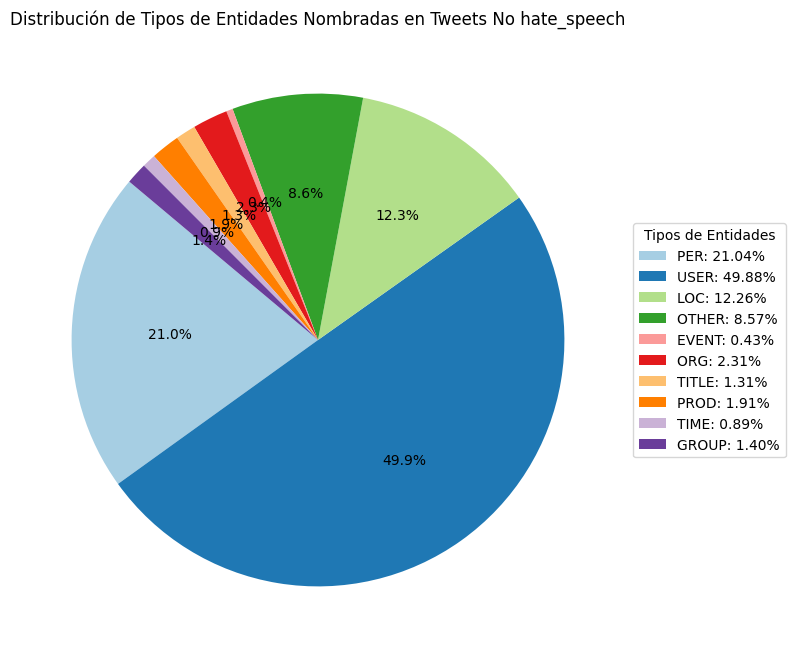

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages_not_hate_speech.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas en Tweets No hate_speech")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages_not_hate_speech.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

-----------------------------------------------

### Comparación entre tweets hate_speech y no hate_speech

-----------------------------------------------


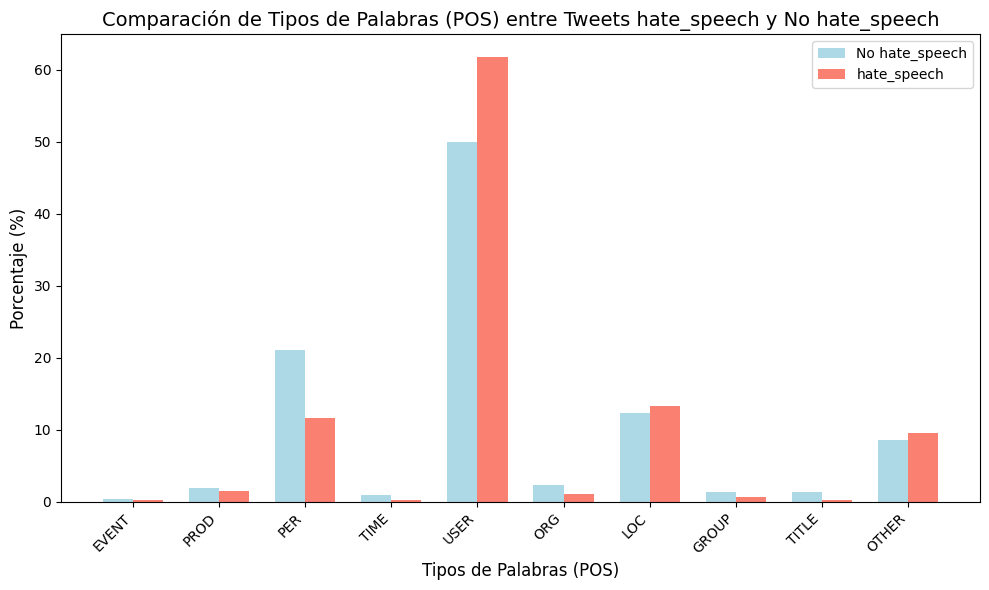

In [63]:
all_pos_tags = list(set(overall_entity_type_percentages_not_hate_speech.keys()).union(set(overall_entity_type_percentages_hate_speech.keys())))

not_hate_speech_percentages = [overall_entity_type_percentages_not_hate_speech.get(tag, 0) for tag in all_pos_tags]
hate_speech_percentages = [overall_entity_type_percentages_hate_speech.get(tag, 0) for tag in all_pos_tags]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_pos_tags))

bar1 = ax.bar(index - bar_width/2, not_hate_speech_percentages, bar_width, label='Not hate speech', color='lightblue')
bar2 = ax.bar(index + bar_width/2, hate_speech_percentages, bar_width, label='Hate speech', color='salmon')

for i, v in enumerate(not_hate_speech_percentages):
  ax.text(index[i] - bar_width/2, v + 0.75, f'{v:.1f}', ha='center', fontsize=11, color='black')
for i, v in enumerate(hate_speech_percentages):
  ax.text(index[i] + bar_width/2, v + 0.75, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Entity Types', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Named Entity Type Percentages (Hate speech vs Not hate speech)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_pos_tags, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()